## Exploratory Data Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_df = pd.read_csv('Data/train.csv')

In [111]:
for iter in range(10):
    text = train_df['full_text'][iter]
    print("Length : ", len(text))

Length :  1387
Length :  2635
Length :  1663
Length :  3973
Length :  1326
Length :  1858
Length :  2317
Length :  1990
Length :  3100
Length :  2098


In [5]:
train_df.shape

(3911, 8)

In [6]:
## Check for missing, NaN and zero values.
## Probably more efficient ways of doing missing and NaN.
train_missing_values = train_df.isna().sum()
train_null_values = train_df.isnull().sum()
print("No. of missing values is : \n", train_missing_values)
print("\n No. of null values is : \n", train_null_values)
#Rows where there are missing values
#print("\n", train_df[train_df.isna().any(axis = 1)])
#Rows where there are null values
#print("\n", train_df[train_df.isnull().any(axis = 1)])
train_zero_values = train_df.eq(0).any()
print("\n Columns with zero:", train_zero_values)

No. of missing values is : 
 text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

 No. of null values is : 
 text_id        0
full_text      0
cohesion       0
syntax         0
vocabulary     0
phraseology    0
grammar        0
conventions    0
dtype: int64

 Columns with zero: text_id        False
full_text      False
cohesion       False
syntax         False
vocabulary     False
phraseology    False
grammar        False
conventions    False
dtype: bool


In [7]:
# No missing or null values.
# Do this for numeric values.
## Way more efficient ways to do this.
def outlier_discoverer(col_name):
    column = train_df[col_name]
    print("\nColumn name : ", column.name)
    print("The median is :", column.describe().loc['50%'])
    print("The modes are : ", column.mode())
    std = column.std()
    print("The variance is : ", (std ** 2))
    q25 = column.describe(include = 'all').loc['25%']
    q75 = column.describe(include = 'all').loc['75%']
    print("25% :", q25)
    print("75% :", q75)
    IQR = q75 - q25
    Q1 = q25 - (1.5*IQR) #Anything lower than this
    Q3 = q75 + (1.5*IQR) #Anything higher than this
    print("The IQR is : ", IQR)
    outlier_sum = 0
    for iter in column :
        if ((iter <= Q1) | (iter >= Q3)):
            #print("{} is an outlier \n".format(iter))
            outlier_sum += 1
    print("The total number of outliers in this column is : {}".format(outlier_sum))
    plt.figure()
    print(sns.distplot(column)) #- if you want it!

In [8]:
# Numeric columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64'])
numeric_cols.head()

cohesion  syntax  vocabulary  phraseology  grammar  conventions
0       3.5     3.5         3.0          3.0      4.0          3.0
1       2.5     2.5         3.0          2.0      2.0          2.5
2       3.0     3.5         3.0          3.0      3.0          2.5
3       4.5     4.5         4.5          4.5      4.0          5.0
4       2.5     3.0         3.0          3.0      2.5          2.5


Column name :  cohesion
The median is : 3.0
The modes are :  0    3.0
Name: cohesion, dtype: float64
The variance is :  0.43896227507044827
25% : 2.5
75% : 3.5
The IQR is :  1.0
The total number of outliers in this column is : 36
AxesSubplot(0.125,0.11;0.775x0.77)

Column name :  syntax
The median is : 3.0
The modes are :  0    3.0
Name: syntax, dtype: float64
The variance is :  0.41525012081472323
25% : 2.5
75% : 3.5
The IQR is :  1.0
The total number of outliers in this column is : 28


/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)

Column name :  vocabulary
The median is : 3.0
The modes are :  0    3.0
Name: vocabulary, dtype: float64
The variance is :  0.34006209778831287
25% : 3.0
75% : 3.5
The IQR is :  0.5
The total number of outliers in this column is : 296
AxesSubplot(0.125,0.11;0.775x0.77)

Column name :  phraseology
The median is : 3.0
The modes are :  0    3.0
Name: phraseology, dtype: float64
The variance is :  0.43033237618862447
25% : 2.5
75% : 3.5
The IQR is :  1.0
The total number of outliers in this column is : 35


/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)

Column name :  grammar
The median is : 3.0
The modes are :  0    3.0
Name: grammar, dtype: float64
The variance is :  0.48977698157403476
25% : 2.5
75% : 3.5
The IQR is :  1.0
The total number of outliers in this column is : 37
AxesSubplot(0.125,0.11;0.775x0.77)

Column name :  conventions
The median is : 3.0
The modes are :  0    3.0
Name: conventions, dtype: float64
The variance is :  0.45084553959880047
25% : 2.5
75% : 3.5
The IQR is :  1.0
The total number of outliers in this column is : 40


/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.11;0.775x0.77)


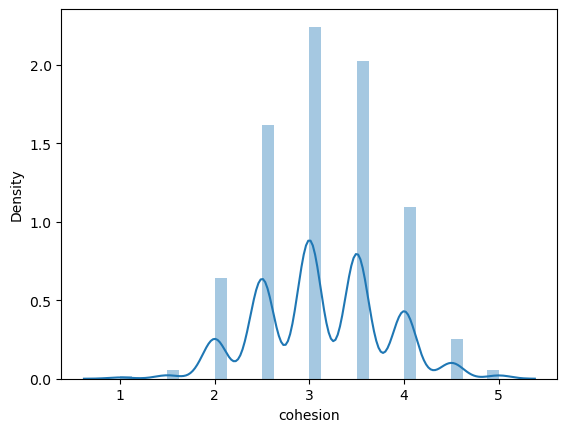

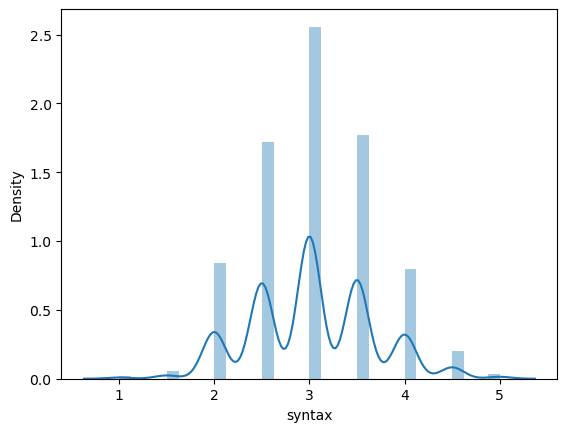

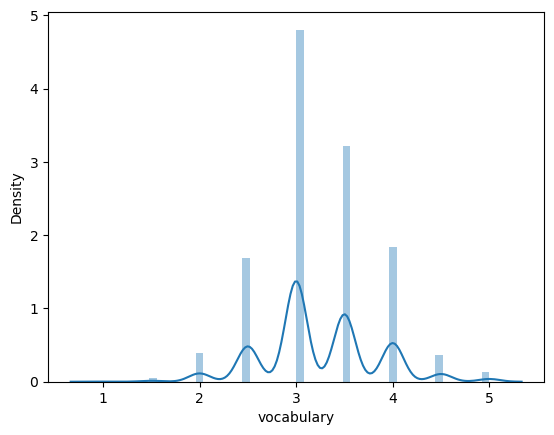

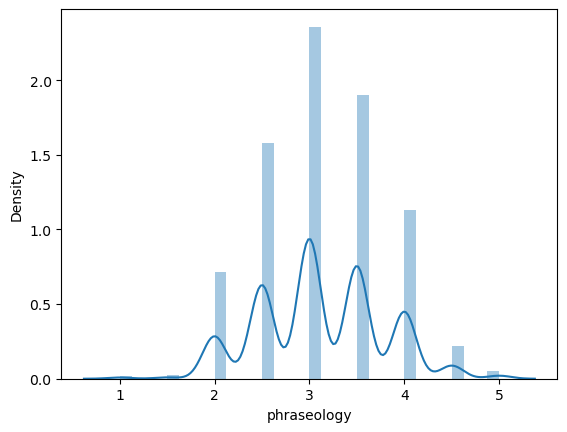

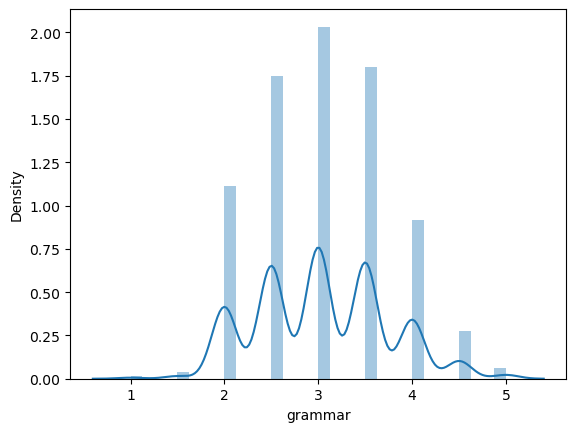

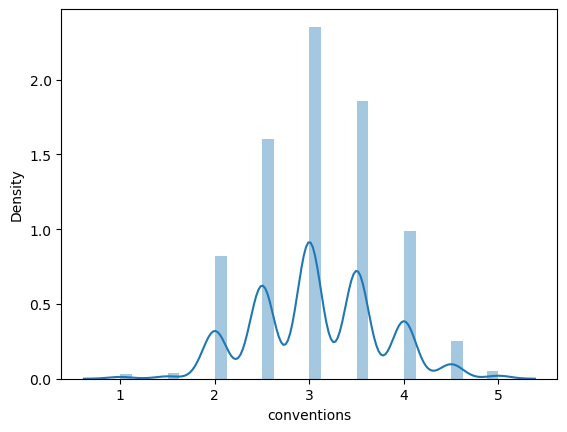

In [9]:
for col in numeric_cols.columns:
    outlier_discoverer(col)

<AxesSubplot:>

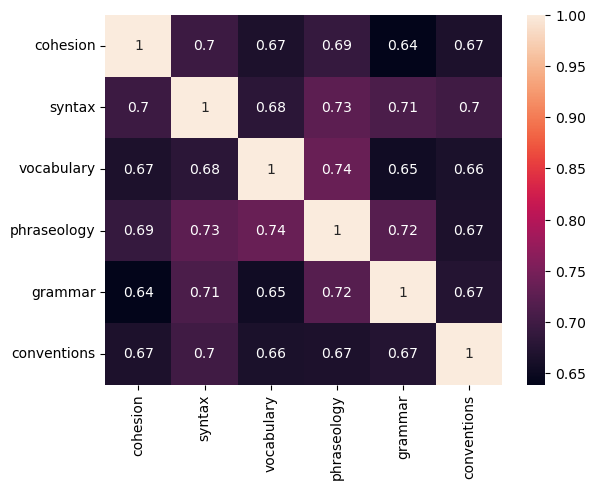

In [10]:
sns.heatmap(numeric_cols.corr(), annot = True)

In [17]:
import spacy
nlp = spacy.load("en_core_web_md")

In [12]:
import nltk

## Data Pre-processing 

In [18]:
pip install contractions

/bin/bash: /home/rkv/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import contractions

In [64]:
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators

In [101]:
nlp = spacy.load("en_core_web_md", disable=['senter','parser', 'ner'])
#nlp.enable("senter")
print(nlp.pipe_names)

pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    removers.remove_punctuation_token,
    replacers.replace_number_token,
    mutators.mutate_lemma_token,
)

/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['senter', 'parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


In [112]:
proc_text = pipeline.clean(train_df['full_text'], n_process = 12, batch_size = 48)
# batch size 12 - 94.3 it/s

Cleaning Progress: 100%|████████████████████████████████████████████████████████████| 3911/3911 [00:41<00:00, 94.31it/s]


In [116]:
cleaned_df = pd.DataFrame(data = proc_text, columns = ['text'])

In [117]:
cleaned_df.shape

(3911, 1)

In [60]:
def text_preprocess(text, lemma = True):
    # lowercase
    # remove stopwords
    # lemmatize
    # map contractions
    # punctuation
    # NER - replace with ['NAME']
    
    #change n_process to 2 if using Kaggle
    #docs = list(nlp.pipe(text, n_process = 4))
    #print("Docs : ", docs)
    
    # From RealPython. Better methods (with a pipe) might exist. Needs to be refactored anyway.
    # Calculate time savings to a NLTK/string methods  and show them.
    
    # Removes stop words and punctuations.
    def is_token(token):
        return bool(
            token
            and str(token).strip()
            and not token.is_stop
            and not token.is_punct
        )
    
    def token_process(token):
        #print("Token : ", token)
        if lemma:
            return token.lemma_.strip().lower()
        else:
            return token.strip().lower()
        
    text = '"' + text + '"'
    # Running the functions
    for doc in nlp.pipe(text, n_process = 4):
        print(doc)
        filtered_tokens = [
            token_process(ent)
            for ent in doc.ents
            if is_token(ent)
        ]
        #contractions.fix(filtered_tokens)
        print(filtered_tokens)
        proc_text.append(filtered_tokens)

In [1]:
text_preprocess(train_df['full_text'][1], lemma = True)

In [ ]:
def text_tokenize(text, seq_tag, tokenize):
    # tag start and end of sequences
    # tokenize text using SpaCy pipe for faster processing
    start_token = '[SOSTOK]'
    end_token = '[EOSTOK]'
    

## CNN Tuned small model 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators

In [2]:
train_df = pd.read_csv('Data/train.csv')

In [4]:
proc_text = [contractions.fix(text) for text in train_df['full_text']]

def more_processing(text):
    text = '<sostok> ' + text + ' <eostok>'
    text = text.lower()
    return text

proc_text_2 = [more_processing(text) for text in proc_text]

In [5]:
nlp = spacy.load("en_core_web_md", disable=['senter', 'parser', 'ner'])
#nlp.enable("senter")
print(nlp.pipe_names)

pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    removers.remove_punctuation_token,
    replacers.replace_number_token,
    mutators.mutate_lemma_token,
)

/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['senter', 'parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


In [6]:
proc_text_3 = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
# n_process = 4, batch size 12 - 105 it/s : 00:37

# n_process = 8, default batch size - takes forever to initialize
# n_process = 8, batch size 12 - 141 it/s : 00:27
# n_process = 8, batch size 48 - 130 it/s : 00:29

# n_process = 12, default batch size - takes forever to initialize
# n_process = 12, batch size 12 - 120.3 it/s : 00:29
# n_process = 12, batch size 48 - 89.5 it/s : 00:34


Cleaning Progress: 100%|███████████████████████████████████████████████████████████| 3911/3911 [00:31<00:00, 124.55it/s]


In [2]:
# Contractions mapped, lemmatized, stopwords and punctuations removed, numbers replaced.
proc_text_3[1]

In [8]:
# Also added start of seq and end of seq, lowercase
train_df['cleaned_text'] = proc_text_3

In [9]:
train_df.head()
train_df.to_csv('processed_data_no_sostok.csv')

## Load this

In [3]:
train_df = pd.read_csv('processed_data_sostok.csv')

In [5]:
# rare word analysis
def get_rare_word_percent(tokenizer, threshold):
    # threshold: if the word's occurrence is less than this then it's rare word

    count = 0
    total_count = 0
    frequency = 0
    total_frequency = 0
    rare_words = []

    for key, value in tokenizer.word_counts.items():
        total_count += 1
        total_frequency += value
        if value < threshold:
            rare_words.append({key, value})
            count += 1
            frequency += value
    print({
        'percent': round((count / total_count) * 100, 2),
        'total_coverage': round(frequency / total_frequency * 100, 2),
        'count': count,
        'total_count': total_count
        })

    return rare_words

In [6]:
# This is a different tokenizer to the one built into SpaCy
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(train_df['cleaned_text'])

rare_words = get_rare_word_percent(x_tokenizer, 4)
#print(rare_words)

{'percent': 71.5, 'total_coverage': 2.59, 'count': 12424, 'total_count': 17377}


In [7]:
org_tokenizer = Tokenizer()
org_tokenizer.fit_on_texts(train_df['full_text'])

rare_words_2 = get_rare_word_percent(org_tokenizer, 4)
#print(rare_words)

{'percent': 69.13, 'total_coverage': 1.24, 'count': 15325, 'total_count': 22169}


## y - multi output

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(train_df['cleaned_text']), np.array(train_df[['cohesion', 'syntax', 'vocabulary',
                                                                                  'phraseology', 'grammar', 'conventions']]), test_size = 0.05, random_state = 0, shuffle = True)

In [11]:
max_text_len = 450

## Embedding matrix for Neural Nets
#### P.S. Following is not needed for the normal classification models.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_text_len = 450
x_train_sequence = x_tokenizer.texts_to_sequences(x_train)
x_val_sequence = x_tokenizer.texts_to_sequences(x_val)

# padding upto max_text_len
x_train_padded = pad_sequences(x_train_sequence, maxlen=max_text_len, padding='pre')
x_val_padded = pad_sequences(x_val_sequence, maxlen=max_text_len, padding='pre')

x_vocab_size = len(x_tokenizer.word_index) + 1

print(x_vocab_size)

print(x_train_padded.shape)
print(y_train.shape)
print(x_val_padded.shape)
print(y_val.shape)

In [13]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            #print("Word, i : ", word, i)
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix

embedding_dim = 50
x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10090 words (7287 misses)


In [16]:
#root mean squared error
from keras import backend as K 
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)    

In [17]:
from tensorflow.keras import backend as backend
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, dot, Dropout, MaxPooling1D, GlobalAveragePooling1D, Conv1D
import tensorflow as tf
backend.clear_session()
input_dim = len(x_train_padded[0])
input_layer = Input(shape = (input_dim, ))
embedding_layer = Embedding(input_dim = x_vocab_size, 
                    output_dim = embedding_dim, 
                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                    input_length=max_text_len, trainable = False, mask_zero = True)(input_layer)
conv_1 = Conv1D(128, 2, activation = 'relu')(embedding_layer)
conv_2 = Conv1D(128, 2, activation = 'relu')(conv_1)

# Dropout
dropout = Dropout(0.2)(conv_2)

# Pooling
pooling_layer = GlobalAveragePooling1D()(dropout)

# Output
output_layer = Dense(6)(pooling_layer)

model = Model(inputs=input_layer, outputs=output_layer)
optimizer_obj = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
model.summary()

2023-08-04 12:55:38.300686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 12:55:38.309630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-04 12:55:38.310053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-04 12:55:38.310367: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 conv1d (Conv1D)             (None, 449, 128)          12928     
                                                                 
 conv1d_1 (Conv1D)           (None, 448, 128)          32896     
                                                                 
 dropout (Dropout)           (None, 448, 128)          0         
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                             

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss',
                  mode='min', verbose=1, patience=3, min_delta = 0.002),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001, verbose=1),
]

In [19]:
history = model.fit(x_train_padded, y_train, epochs=20, validation_data=(x_val_padded, y_val), batch_size = 64, callbacks = callbacks)

Epoch 1/20
Instructions for updating:
Use fn_output_signature instead


2023-08-04 12:57:37.564622: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


59/59 [==============================] - 99s 226ms/step - loss: 1.3661 - val_loss: 0.8068 - lr: 0.0010
Epoch 2/20
59/59 [==============================] - 11s 192ms/step - loss: 0.6796 - val_loss: 0.5757 - lr: 0.0010
Epoch 3/20
59/59 [==============================] - 12s 209ms/step - loss: 0.5751 - val_loss: 0.5621 - lr: 0.0010
Epoch 4/20
59/59 [==============================] - 11s 185ms/step - loss: 0.5659 - val_loss: 0.5591 - lr: 0.0010
Epoch 5/20
59/59 [==============================] - 12s 209ms/step - loss: 0.5573 - val_loss: 0.5573 - lr: 0.0010
Epoch 6/20
59/59 [==============================] - 12s 202ms/step - loss: 0.5502 - val_loss: 0.5480 - lr: 0.0010
Epoch 7/20
58/59 [============================>.] - ETA: 0s - loss: 0.5467
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
59/59 [==============================] - 12s 211ms/step - loss: 0.5468 - val_loss: 0.5497 - lr: 0.0010
Epoch 8/20
59/59 [==============================] - 12s 198ms/step - los

In [21]:
model_json = model.to_json()
with open('saved_models/CNN_Glove50_Sat.json', 'w') as f:
    f.write(model_json)

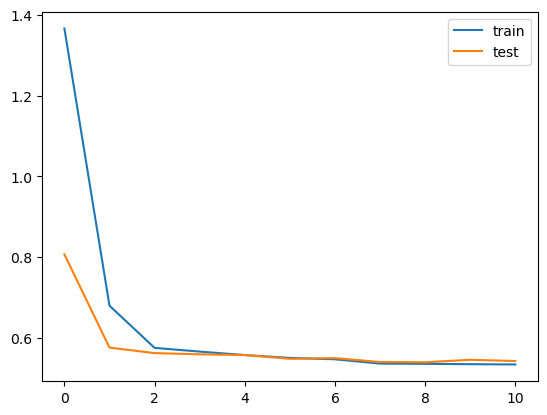

<Figure size 640x480 with 0 Axes>

In [22]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.savefig('CNN_Glove50_Sat.png')
model.save_weights('saved_models/CNN_Glove50_Sat.h5', save_format = 'h5')

In [24]:
from keras.models import model_from_json
with open('saved_models/CNN_Glove50_Sat.json', 'r') as f:
    loaded_json = f.read()
    f.close()
    loaded_model = model_from_json(loaded_json)
loaded_model.load_weights('saved_models/CNN_Glove50_Sat.h5')
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 conv1d (Conv1D)             (None, 449, 128)          12928     
                                                                 
 conv1d_1 (Conv1D)           (None, 448, 128)          32896     
                                                                 
 dropout (Dropout)           (None, 448, 128)          0         
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                             

In [25]:
loaded_model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
scores = loaded_model.evaluate(x_val_padded, y_val, verbose=0)
print("Validation loss: %.2f%%" % (scores*100))

Validation loss: 54.25%


In [26]:
test_scores = loaded_model.predict(x_val_padded)
print("Predicted results: ", test_scores[:10])
print("Actual results: ", y_val[:10])

7/7 [==============================] - 0s 4ms/step
Predicted results:  [[3.082069  2.9886487 3.152874  3.0802531 2.9425778 3.069481 ]
 [3.223032  3.1160214 3.2994628 3.2033086 3.135631  3.2026298]
 [3.2328272 3.0928998 3.2913105 3.1902242 3.0549312 3.2066588]
 [2.898138  2.8352401 2.966364  2.92279   2.9038944 2.9700441]
 [3.7613    3.604679  3.7821813 3.6743612 3.4390368 3.6801515]
 [4.5383267 4.3010116 4.551168  4.3641386 4.0059714 4.375587 ]
 [2.8764153 2.8164027 2.9408786 2.8739836 2.9255953 2.9304662]
 [3.0756464 2.9289844 3.1466877 3.0084543 2.9677072 3.0136945]
 [3.1280937 3.0348194 3.1268084 3.0808864 3.05122   3.118689 ]
 [3.366881  3.2198074 3.3921816 3.2878084 3.0851498 3.2999954]]
Actual results:  [[4.  3.5 3.5 3.5 3.  3.5]
 [3.  3.5 3.5 3.5 3.5 3. ]
 [4.  4.  4.  3.5 4.5 4.5]
 [2.5 3.  3.5 3.5 3.5 3. ]
 [3.  3.  4.  3.  4.  4. ]
 [4.  3.5 4.5 4.  3.5 4.5]
 [2.5 2.5 2.5 2.5 3.  3. ]
 [4.  3.5 3.5 4.  3.  4. ]
 [4.  4.5 4.  4.  4.5 5. ]
 [4.  3.  3.  3.5 4.  4. ]]


In [70]:
test_scores[1].shape

(6,)

In [27]:
results_df = pd.DataFrame(data = list(zip(test_scores, y_val)), columns = ['Pred_scores', 'Actual'])
results_df.to_csv("CNN_Glove50_Sat.csv")

In [28]:
analysis_df = results_df
analysis_df['error'] = results_df['Pred_scores'] - results_df['Actual']
analysis_df.to_csv("CNN_Glove50_Sat.csv")
analysis_df.to_pickle("CNN_Glove50_Sat.pkl")

In [29]:
analysis_df = pd.read_pickle("CNN_Glove50_Sat.pkl")

In [31]:
pred_lst = analysis_df.Pred_scores
actual_lst = analysis_df.Actual
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [32]:
# flat is faster than item
cohesion_pred_lst = [x.flat[0] for x in pred_lst]
cohesion_act_lst = [x.flat[0] for x in actual_lst]

syntax_pred_lst = [x.flat[1] for x in pred_lst]
syntax_act_lst = [x.flat[1] for x in actual_lst]

vocabulary_pred_lst = [x.flat[2] for x in pred_lst]
vocabulary_act_lst = [x.flat[2] for x in actual_lst]

phraseology_pred_lst = [x.flat[3] for x in pred_lst]
phraseology_act_lst = [x.flat[3] for x in actual_lst]

grammar_pred_lst = [x.flat[4] for x in pred_lst]
grammar_act_lst = [x.flat[4] for x in actual_lst]

conventions_pred_lst = [x.flat[5] for x in pred_lst]
conventions_act_lst = [x.flat[5] for x in actual_lst]

In [33]:
#pip install statsmodels

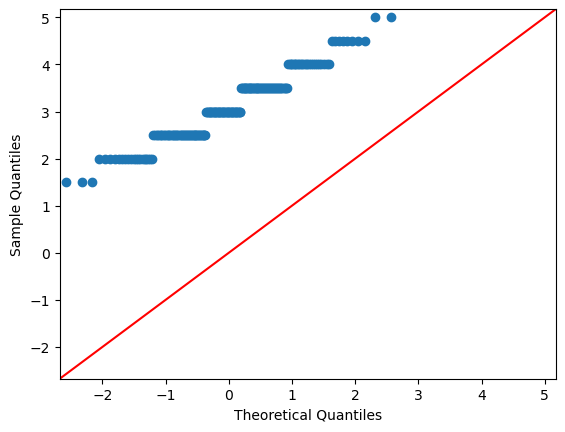

In [67]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(data = analysis_df['Actual'], line ='45')
py.show()

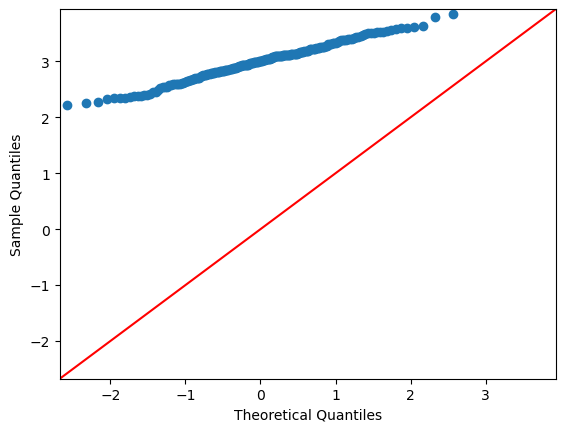

In [68]:
sm.qqplot(data = analysis_df['Pred_scores'], line ='45')
py.show()

In [69]:
# Predicted scores are not normally distributed. Model is learning something 
# other than the normal distribution. Good news!

In [34]:
iterations = x_val_padded.shape[0]
iterations

196

In [35]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(x_val_padded[num]))
#nonzero_count

In [ ]:
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [36]:
proof_df = analysis_df
proof_df['nonzero'] = nonzero_count

In [37]:
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])

[array([3.082069 , 2.9886487, 3.152874 , 3.0802531, 2.9425778, 3.069481 ],
       dtype=float32)
 array([3.223032 , 3.1160214, 3.2994628, 3.2033086, 3.135631 , 3.2026298],
       dtype=float32)
 array([3.2328272, 3.0928998, 3.2913105, 3.1902242, 3.0549312, 3.2066588],
       dtype=float32)
 array([2.898138 , 2.8352401, 2.966364 , 2.92279  , 2.9038944, 2.9700441],
       dtype=float32)
 array([3.7613   , 3.604679 , 3.7821813, 3.6743612, 3.4390368, 3.6801515],
       dtype=float32)                                                     ]


<AxesSubplot:>

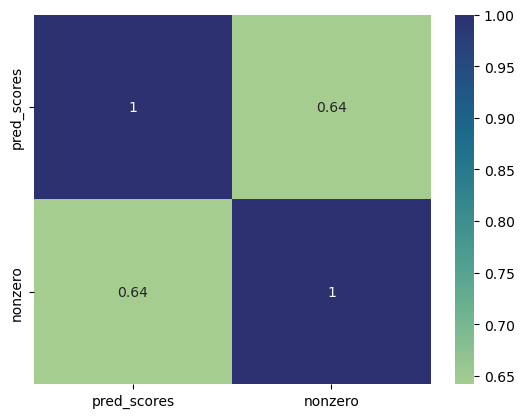

In [38]:
pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

import seaborn as sns
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

#### The CNN model finds a really strong correlation between the pred_score and text_length, and is overfitting to it as the actual correlation is less than half of this.
#### Actual correlation :

<AxesSubplot:>

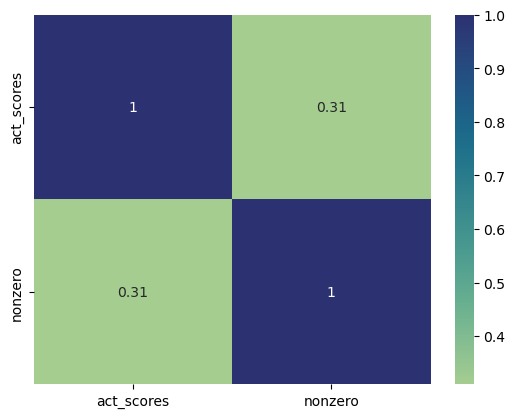

In [39]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

array([[<AxesSubplot:title={'center':'act_scores'}>]], dtype=object)

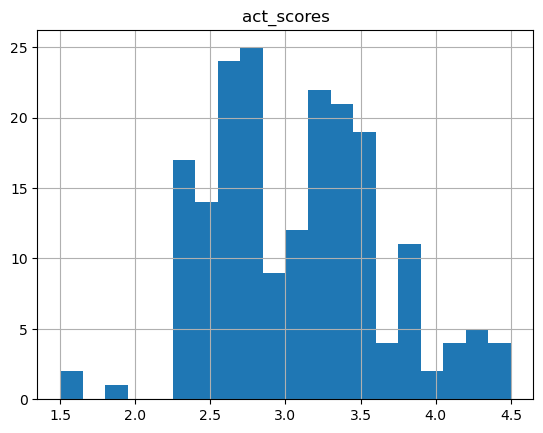

In [40]:
act_corr_df.hist(column = 'act_scores', bins = 20)

#### Plotting the mean of the actual and mean of the predicted scores.

array([[<AxesSubplot:title={'center':'pred_scores'}>]], dtype=object)

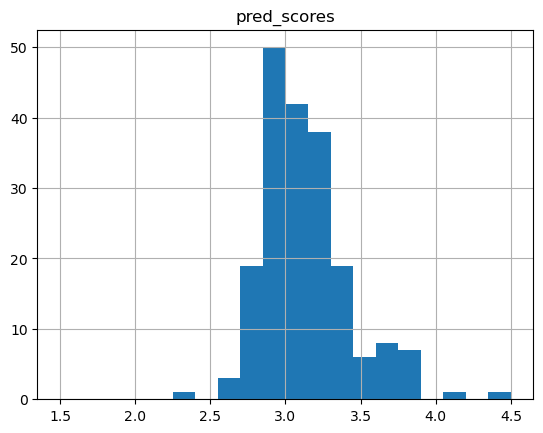

In [41]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [1.5, 4.5])

### Model's scores are fairly distributed, although the tails on both sides are missed.

In [43]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.085572
Actual median :  3.0


In [44]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

#print(pred_var_lst)

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.008240886
Actual mean variance :  0.12308673469387756


#### The variance of the model's output is too low.

### Does the model's predicted score roughly follow the actual scores?

In [45]:
corr_df_cohesion = pd.DataFrame({'pred_score' : cohesion_pred_lst, 'act_scores' : cohesion_act_lst})
corr_df_syntax = pd.DataFrame({'pred_score' : syntax_pred_lst, 'act_scores' : syntax_act_lst})
corr_df_vocabulary = pd.DataFrame({'pred_score' : vocabulary_pred_lst, 'act_scores' : vocabulary_act_lst})
corr_df_phraseology = pd.DataFrame({'pred_score' : phraseology_pred_lst, 'act_scores' : phraseology_act_lst})
corr_df_grammar = pd.DataFrame({'pred_score' : grammar_pred_lst, 'act_scores' : grammar_act_lst})
corr_df_conventions = pd.DataFrame({'pred_score' : conventions_pred_lst, 'act_scores' : conventions_act_lst})

Text(0.5, 1.0, 'Cohesion correlation')

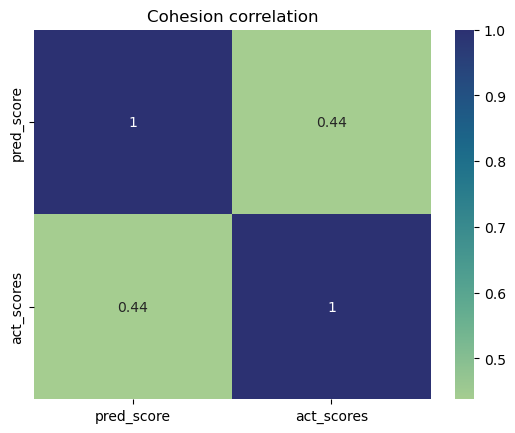

In [46]:
import seaborn as sns
sns.heatmap(corr_df_cohesion.corr(), annot = True, cmap = "crest").set_title("Cohesion correlation")

Text(0.5, 1.0, 'Syntax correlation')

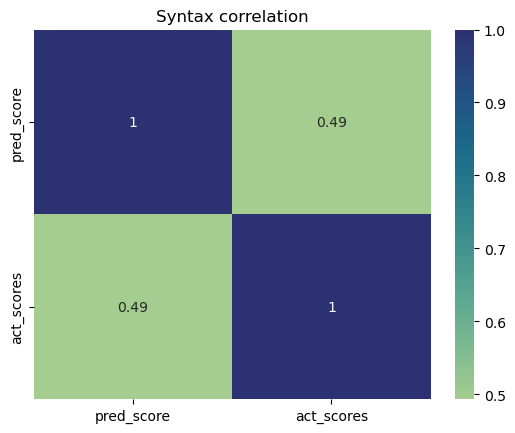

In [47]:
sns.heatmap(corr_df_syntax.corr(), annot = True, cmap = "crest").set_title("Syntax correlation")

Text(0.5, 1.0, 'Vocabulary correlation')

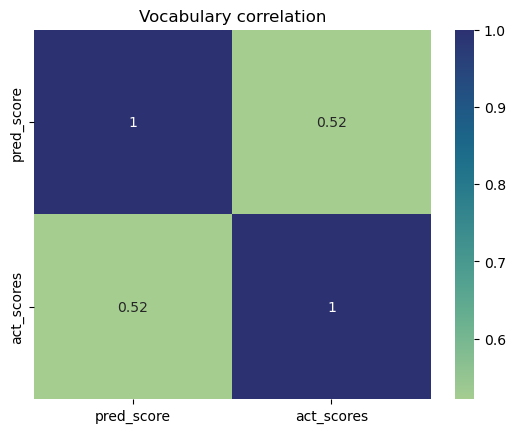

In [48]:
sns.heatmap(corr_df_vocabulary.corr(), annot = True, cmap = "crest").set_title("Vocabulary correlation")

Text(0.5, 1.0, 'Phraseology correlation')

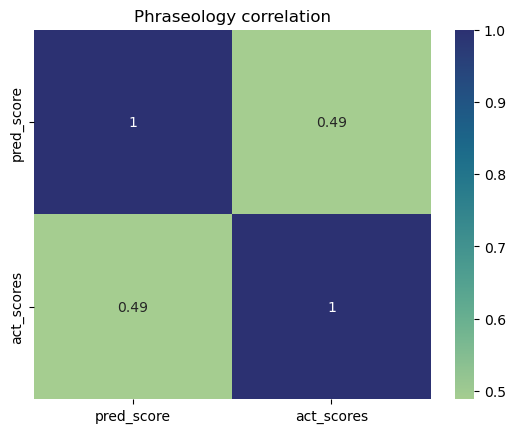

In [49]:
sns.heatmap(corr_df_phraseology.corr(), annot = True, cmap = "crest").set_title("Phraseology correlation")

Text(0.5, 1.0, 'Grammar correlation')

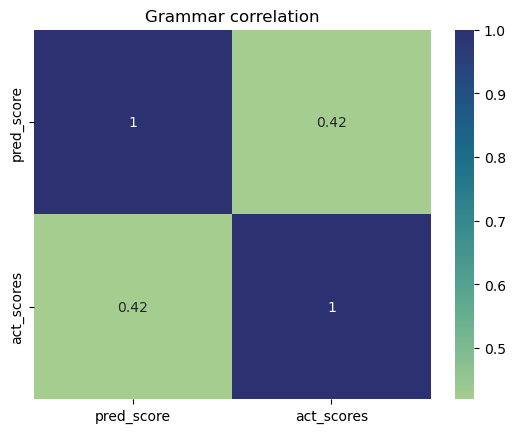

In [50]:
sns.heatmap(corr_df_grammar.corr(), annot = True, cmap = "crest").set_title("Grammar correlation")

Text(0.5, 1.0, 'Conventions correlation')

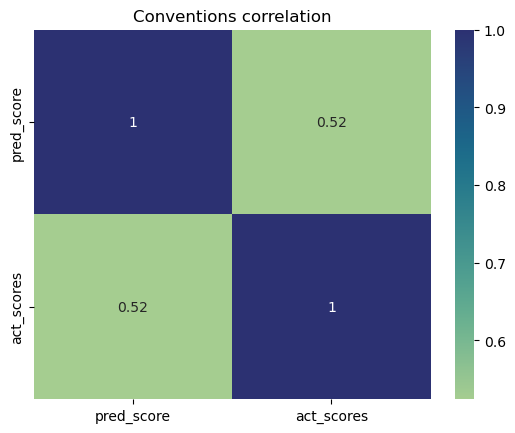

In [51]:
sns.heatmap(corr_df_conventions.corr(), annot = True, cmap = "crest").set_title("Conventions correlation")

#### Model is performing strongly on this metric, it learns conventions and vocabulary correlation really well!
#### Phraseology and syntax correlation is also really good.

#### Cohesion and grammar are slightly weaker, but this small CNN model still outperforms our LSTM and is comparable to our GRU models on this metric.

## CNN Baseline large model 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators

In [2]:
train_df = pd.read_csv('Data/train.csv')

In [4]:
proc_text = [contractions.fix(text) for text in train_df['full_text']]
def more_processing(text):
    text = text.lower()
    return text

proc_text_2 = [more_processing(text) for text in proc_text]

In [5]:
nlp = spacy.load("en_core_web_md", disable=['senter', 'parser', 'ner'])
#nlp.enable("senter")
print(nlp.pipe_names)

pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    removers.remove_punctuation_token,
    replacers.replace_number_token,
    mutators.mutate_lemma_token,
)

/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['senter', 'parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


In [6]:
proc_text_3 = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
# n_process = 4, batch size 12 - 105 it/s : 00:37

# n_process = 8, default batch size - takes forever to initialize
# n_process = 8, batch size 12 - 141 it/s : 00:27
# n_process = 8, batch size 48 - 130 it/s : 00:29

# n_process = 12, default batch size - takes forever to initialize
# n_process = 12, batch size 12 - 120.3 it/s : 00:29
# n_process = 12, batch size 48 - 89.5 it/s : 00:34


Cleaning Progress: 100%|███████████████████████████████████████████████████████████| 3911/3911 [00:31<00:00, 124.55it/s]


In [6]:
# Contractions mapped, lemmatized, stopwords and punctuations removed, numbers replaced.
proc_text_3[1]

In [8]:
# Also added start of seq and end of seq, lowercase
train_df['cleaned_text'] = proc_text_3

In [9]:
train_df.head()
train_df.to_csv('processed_data_no_sostok.csv')

## Load this

In [17]:
train_df = pd.read_csv('processed_data_sostok.csv')

In [19]:
# rare word analysis
def get_rare_word_percent(tokenizer, threshold):
    # threshold: if the word's occurrence is less than this then it's rare word

    count = 0
    total_count = 0
    frequency = 0
    total_frequency = 0
    rare_words = []

    for key, value in tokenizer.word_counts.items():
        total_count += 1
        total_frequency += value
        if value < threshold:
            rare_words.append({key, value})
            count += 1
            frequency += value
    print({
        'percent': round((count / total_count) * 100, 2),
        'total_coverage': round(frequency / total_frequency * 100, 2),
        'count': count,
        'total_count': total_count
        })

    return rare_words

In [20]:
# This is a different tokenizer to the one built into SpaCy
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(train_df['cleaned_text'])

rare_words = get_rare_word_percent(x_tokenizer, 4)
#print(rare_words)

{'percent': 71.5, 'total_coverage': 2.59, 'count': 12424, 'total_count': 17377}


In [21]:
org_tokenizer = Tokenizer()
org_tokenizer.fit_on_texts(train_df['full_text'])

rare_words_2 = get_rare_word_percent(org_tokenizer, 4)
#print(rare_words)

{'percent': 69.13, 'total_coverage': 1.24, 'count': 15325, 'total_count': 22169}


## y - multi output

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(train_df['cleaned_text']), np.array(train_df[['cohesion', 'syntax', 'vocabulary',
                                                                                  'phraseology', 'grammar', 'conventions']]), test_size = 0.05, random_state = 0, shuffle = True)

In [9]:
# To check how many rows in a column has length (of the text) <= limit
def get_word_percent(column, limit):
    count = 0
    for sentence in column:
        if len(sentence.split()) <= limit:
            count += 1

    return round(count / len(column), 2)


# Check how many % of headlines have 0-430 words
print(get_word_percent(train_df.cleaned_text, 430))

1.0


In [10]:
max_text_len = 450

## Embedding matrix for Neural Nets
#### P.S. Following is not needed for the normal classification models.

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_text_len = 450
x_train_sequence = x_tokenizer.texts_to_sequences(x_train)
x_val_sequence = x_tokenizer.texts_to_sequences(x_val)

# padding upto max_text_len
x_train_padded = pad_sequences(x_train_sequence, maxlen=max_text_len, padding='pre')
x_val_padded = pad_sequences(x_val_sequence, maxlen=max_text_len, padding='pre')

x_vocab_size = len(x_tokenizer.word_index) + 1

print(x_vocab_size)

print(x_train_padded.shape)
print(y_train.shape)
print(x_val_padded.shape)
print(y_val.shape)

17378
(3715, 450)
(3715, 6)
(196, 450)
(196, 6)


In [12]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            #print("Word, i : ", word, i)
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix

embedding_dim = 50
x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10090 words (7287 misses)


In [15]:
#root mean squared error
from keras import backend as K 
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)    

In [17]:
from tensorflow.keras import backend as backend
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, dot, Dropout, MaxPooling1D, GlobalAveragePooling1D, Conv1D
import tensorflow as tf
backend.clear_session()
input_dim = len(x_train_padded[0])
input_layer = Input(shape = (input_dim, ))
embedding_layer = Embedding(input_dim = x_vocab_size, 
                    output_dim = embedding_dim, 
                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                    input_length=max_text_len, trainable = False, mask_zero = True)(input_layer)
conv_1 = Conv1D(256, 2, activation = 'relu')(embedding_layer)
conv_2 = Conv1D(256, 2, activation = 'relu')(conv_1)

# Dropout
dropout_1 = Dropout(0.2)(conv_2)

conv_3 = Conv1D(256, 2, activation = 'relu')(dropout_1)
conv_4 = Conv1D(256, 2, activation = 'relu')(conv_3)

# Dropout
dropout_2 = Dropout(0.2)(conv_4)

# Pooling
pooling_layer = GlobalAveragePooling1D()(dropout_2)

# Output
output_layer = Dense(6)(pooling_layer)

model = Model(inputs=input_layer, outputs=output_layer)
optimizer_obj = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 conv1d (Conv1D)             (None, 449, 256)          25856     
                                                                 
 conv1d_1 (Conv1D)           (None, 448, 256)          131328    
                                                                 
 dropout (Dropout)           (None, 448, 256)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 447, 256)          131328    
                                                                 
 conv1d_3 (Conv1D)           (None, 446, 256)          131328

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss',
                  mode='min', verbose=1, patience=3, min_delta = 0.002),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001, verbose=1),
]

In [20]:
history = model.fit(x_train_padded, y_train, epochs=20, validation_data=(x_val_padded, y_val), batch_size = 64, callbacks = callbacks)

Epoch 1/20
Instructions for updating:
Use fn_output_signature instead


2023-08-04 10:45:50.772083: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


59/59 [==============================] - 27s 236ms/step - loss: 0.9665 - val_loss: 0.6026 - lr: 0.0010
Epoch 2/20
59/59 [==============================] - 14s 234ms/step - loss: 0.5738 - val_loss: 0.5764 - lr: 0.0010
Epoch 3/20
58/59 [============================>.] - ETA: 0s - loss: 0.5682
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
59/59 [==============================] - 14s 234ms/step - loss: 0.5681 - val_loss: 0.7203 - lr: 0.0010
Epoch 4/20
59/59 [==============================] - 14s 238ms/step - loss: 0.5546 - val_loss: 0.5476 - lr: 1.0000e-04
Epoch 5/20
59/59 [==============================] - 15s 246ms/step - loss: 0.5417 - val_loss: 0.5451 - lr: 1.0000e-04
Epoch 6/20
59/59 [==============================] - 14s 245ms/step - loss: 0.5405 - val_loss: 0.5440 - lr: 1.0000e-04
Epoch 7/20
58/59 [============================>.] - ETA: 0s - loss: 0.5394
Epoch 7: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
59/59 [===============

In [21]:
model_json = model.to_json()
with open('saved_models/CNN_Glove50_256_2.json', 'w') as f:
    f.write(model_json)

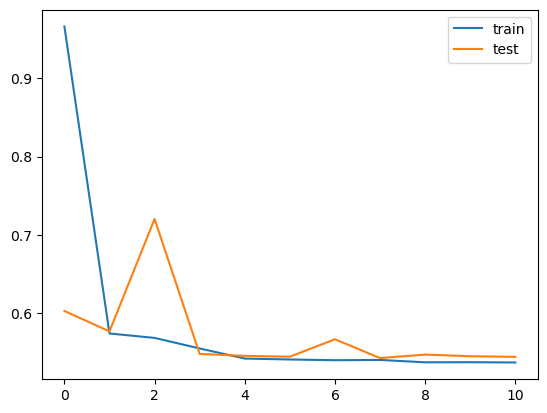

<Figure size 640x480 with 0 Axes>

In [22]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.savefig('CNN_Glove50_Sat_256_2.png')
model.save_weights('saved_models/CNN_Glove50_256_2.h5', save_format = 'h5')

In [19]:
#model.save('saved_models/LSTM_combined_dense_1')

In [23]:
from keras.models import model_from_json
with open('saved_models/CNN_Glove50_256_2.json', 'r') as f:
    loaded_json = f.read()
    f.close()
    loaded_model = model_from_json(loaded_json)
loaded_model.load_weights('saved_models/CNN_Glove50_256_2.h5')

In [24]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 conv1d (Conv1D)             (None, 449, 256)          25856     
                                                                 
 conv1d_1 (Conv1D)           (None, 448, 256)          131328    
                                                                 
 dropout (Dropout)           (None, 448, 256)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 447, 256)          131328    
                                                                 
 conv1d_3 (Conv1D)           (None, 446, 256)          131328

In [25]:
loaded_model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
scores = loaded_model.evaluate(x_val_padded, y_val, verbose=0)
print("Validation loss: %.2f%%" % (scores*100))

Validation loss: 54.39%


In [26]:
test_scores = loaded_model.predict(x_val_padded)
print("Predicted results: ", test_scores[:10])
print("Actual results: ", y_val[:10])

7/7 [==============================] - 2s 33ms/step
Predicted results:  [[3.0425732 2.9513175 3.1547291 3.042145  2.9431572 3.0044737]
 [3.1944773 3.1014495 3.3045025 3.18585   3.1150587 3.167328 ]
 [3.2340453 3.1437001 3.3460371 3.2303035 3.1469216 3.2124927]
 [2.8937304 2.8281398 3.0011828 2.9063306 2.9011683 2.9099495]
 [3.6527612 3.5139804 3.758638  3.607427  3.4242373 3.5622916]
 [4.461836  4.267578  4.5864105 4.394006  4.035867  4.2903805]
 [2.855284  2.7992265 2.9609945 2.8685315 2.9046712 2.8887722]
 [3.082683  2.988827  3.1844847 3.0668786 3.0160532 3.0528924]
 [3.0764582 2.997461  3.1741955 3.0717938 3.0286121 3.0648327]
 [3.272495  3.1569939 3.3734746 3.2444122 3.0863023 3.2056038]]
Actual results:  [[4.  3.5 3.5 3.5 3.  3.5]
 [3.  3.5 3.5 3.5 3.5 3. ]
 [4.  4.  4.  3.5 4.5 4.5]
 [2.5 3.  3.5 3.5 3.5 3. ]
 [3.  3.  4.  3.  4.  4. ]
 [4.  3.5 4.5 4.  3.5 4.5]
 [2.5 2.5 2.5 2.5 3.  3. ]
 [4.  3.5 3.5 4.  3.  4. ]
 [4.  4.5 4.  4.  4.5 5. ]
 [4.  3.  3.  3.5 4.  4. ]]


In [25]:
test_scores[1].shape

(6,)

In [26]:
results_df = pd.DataFrame(data = list(zip(test_scores, y_val)), columns = ['Pred_scores', 'Actual'])
results_df.to_csv("CNN_Glove50_Sat_2.csv")

In [28]:
analysis_df = results_df
analysis_df['error'] = results_df['Pred_scores'] - results_df['Actual']
analysis_df.to_csv("CNN_Glove50_Sat_2.csv")
analysis_df.to_pickle("CNN_Glove50_Sat_2.pkl")

In [7]:
analysis_df = pd.read_pickle("CNN_Glove50_Sat_2.pkl")

In [8]:
analysis_df.head()

Pred_scores  \
0  [3.0184188, 2.9209075, 3.1326654, 3.0120428, 2...   
1  [3.1647577, 3.0681705, 3.273096, 3.1538312, 3....   
2  [3.1638136, 3.0660582, 3.2856503, 3.170229, 3....   
3  [2.8626432, 2.798974, 2.9653714, 2.8707533, 2....   
4  [3.496345, 3.3461607, 3.6279893, 3.479465, 3.2...   

                           Actual  \
0  [4.0, 3.5, 3.5, 3.5, 3.0, 3.5]   
1  [3.0, 3.5, 3.5, 3.5, 3.5, 3.0]   
2  [4.0, 4.0, 4.0, 3.5, 4.5, 4.5]   
3  [2.5, 3.0, 3.5, 3.5, 3.5, 3.0]   
4  [3.0, 3.0, 4.0, 3.0, 4.0, 4.0]   

                                               error  
0  [-0.9815812110900879, -0.5790925025939941, -0....  
1  [0.16475772857666016, -0.43182945251464844, -0...  
2  [-0.836186408996582, -0.9339418411254883, -0.7...  
3  [0.3626432418823242, -0.20102596282958984, -0....  
4  [0.49634504318237305, 0.3461606502532959, -0.3...

In [9]:
pred_lst = analysis_df.Pred_scores
actual_lst = analysis_df.Actual
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [10]:
# flat is faster than item
cohesion_pred_lst = [x.flat[0] for x in pred_lst]
cohesion_act_lst = [x.flat[0] for x in actual_lst]

syntax_pred_lst = [x.flat[1] for x in pred_lst]
syntax_act_lst = [x.flat[1] for x in actual_lst]

vocabulary_pred_lst = [x.flat[2] for x in pred_lst]
vocabulary_act_lst = [x.flat[2] for x in actual_lst]

phraseology_pred_lst = [x.flat[3] for x in pred_lst]
phraseology_act_lst = [x.flat[3] for x in actual_lst]

grammar_pred_lst = [x.flat[4] for x in pred_lst]
grammar_act_lst = [x.flat[4] for x in actual_lst]

conventions_pred_lst = [x.flat[5] for x in pred_lst]
conventions_act_lst = [x.flat[5] for x in actual_lst]

In [69]:
# Predicted scores are not normally distributed. Model is learning something 
# other than the normal distribution. Good news!

In [15]:
#iterations = x_val_padded.shape[0]
iterations = 196

In [25]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(x_val_padded[num]))
#nonzero_count

In [ ]:
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [28]:
proof_df = analysis_df
proof_df['nonzero'] = nonzero_count

In [29]:
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])

[array([3.0184188, 2.9209075, 3.1326654, 3.0120428, 2.913237 , 2.9681456],
       dtype=float32)
 array([3.1647577, 3.0681705, 3.273096 , 3.1538312, 3.0699513, 3.1318638],
       dtype=float32)
 array([3.1638136, 3.0660582, 3.2856503, 3.170229 , 3.0862305, 3.145044 ],
       dtype=float32)
 array([2.8626432, 2.798974 , 2.9653714, 2.8707533, 2.8764868, 2.8785808],
       dtype=float32)
 array([3.496345 , 3.3461607, 3.6279893, 3.479465 , 3.2807539, 3.406965 ],
       dtype=float32)                                                     ]


<AxesSubplot:>

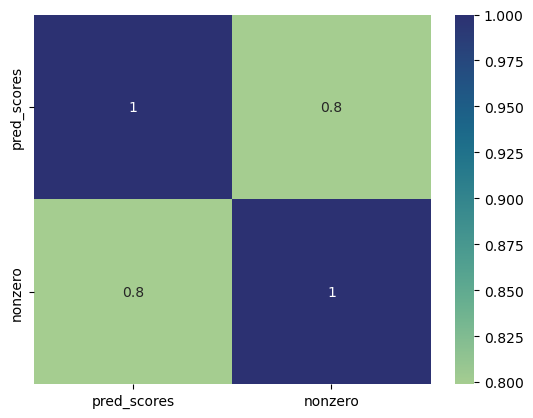

In [30]:
pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

import seaborn as sns
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

#### This dual convolution model overfit to this correlation by a massive amount.

<AxesSubplot:>

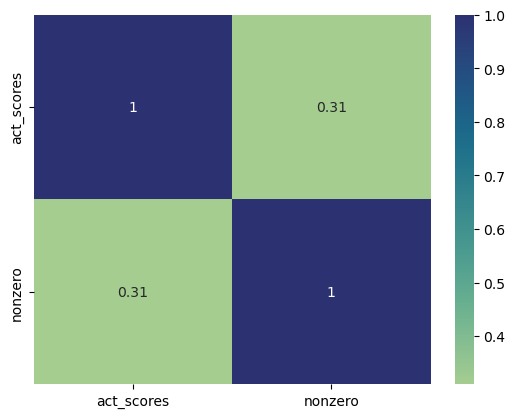

In [32]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

#### This is the actual correlation.

array([[<AxesSubplot:title={'center':'act_scores'}>]], dtype=object)

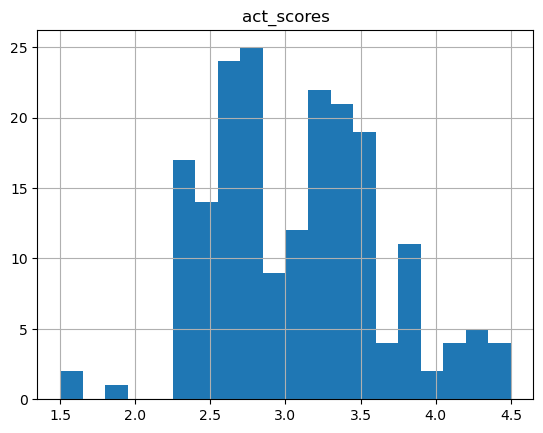

In [33]:
act_corr_df.hist(column = 'act_scores', bins = 20)

### Plotting the mean of the actual and mean of the predicted scores.

array([[<AxesSubplot:title={'center':'pred_scores'}>]], dtype=object)

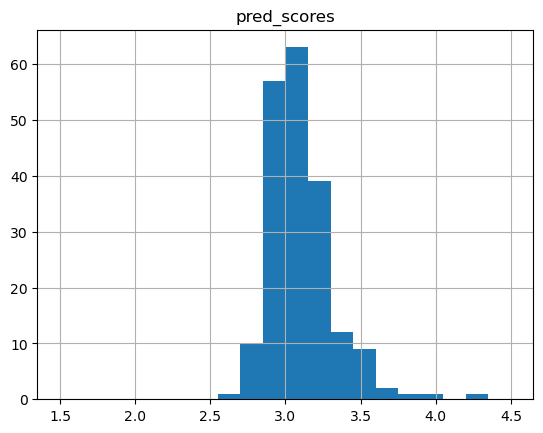

In [34]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [1.5, 4.5])

### The model's results are not evenly distributed at all.

In [36]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.0640113
Actual median :  3.0


In [37]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

#print(pred_var_lst)

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.0070277844
Actual mean variance :  0.12308673469387756


#### The variance is too low for the model's outputs.

### Does the model's predicted score roughly follow the actual scores?

In [39]:
corr_df_cohesion = pd.DataFrame({'pred_score' : cohesion_pred_lst, 'act_scores' : cohesion_act_lst})
corr_df_syntax = pd.DataFrame({'pred_score' : syntax_pred_lst, 'act_scores' : syntax_act_lst})
corr_df_vocabulary = pd.DataFrame({'pred_score' : vocabulary_pred_lst, 'act_scores' : vocabulary_act_lst})
corr_df_phraseology = pd.DataFrame({'pred_score' : phraseology_pred_lst, 'act_scores' : phraseology_act_lst})
corr_df_grammar = pd.DataFrame({'pred_score' : grammar_pred_lst, 'act_scores' : grammar_act_lst})
corr_df_conventions = pd.DataFrame({'pred_score' : conventions_pred_lst, 'act_scores' : conventions_act_lst})

Text(0.5, 1.0, 'Cohesion correlation')

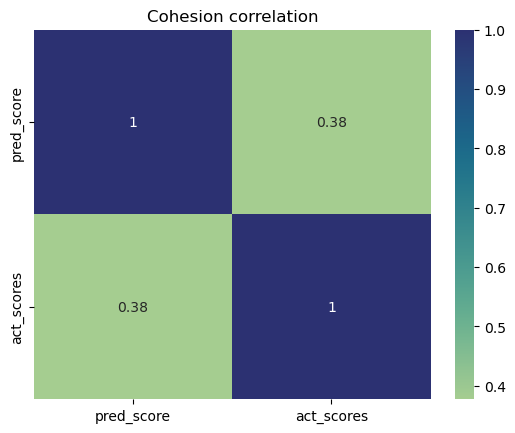

In [40]:
import seaborn as sns
sns.heatmap(corr_df_cohesion.corr(), annot = True, cmap = "crest").set_title("Cohesion correlation")

Text(0.5, 1.0, 'Syntax correlation')

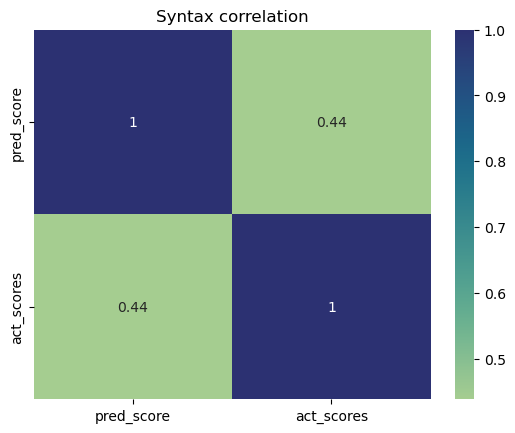

In [41]:
sns.heatmap(corr_df_syntax.corr(), annot = True, cmap = "crest").set_title("Syntax correlation")

Text(0.5, 1.0, 'Vocabulary correlation')

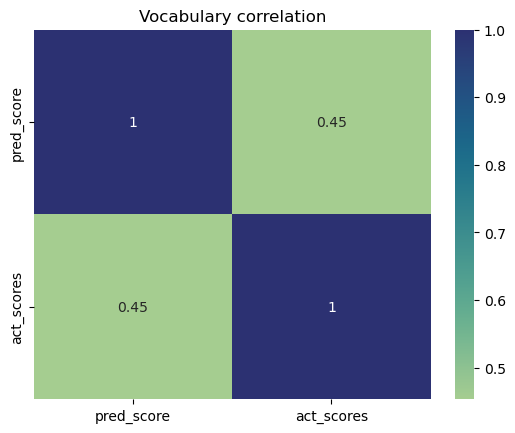

In [42]:
sns.heatmap(corr_df_vocabulary.corr(), annot = True, cmap = "crest").set_title("Vocabulary correlation")

Text(0.5, 1.0, 'Phraseology correlation')

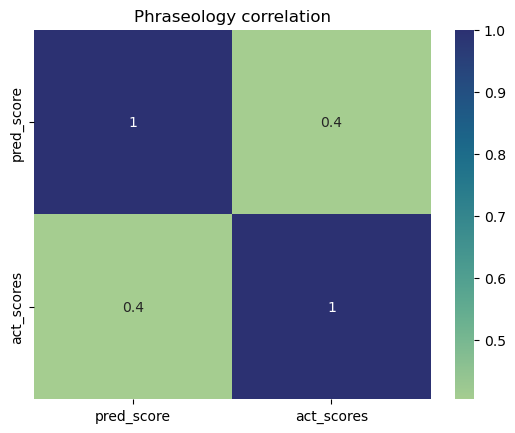

In [43]:
sns.heatmap(corr_df_phraseology.corr(), annot = True, cmap = "crest").set_title("Phraseology correlation")

Text(0.5, 1.0, 'Grammar correlation')

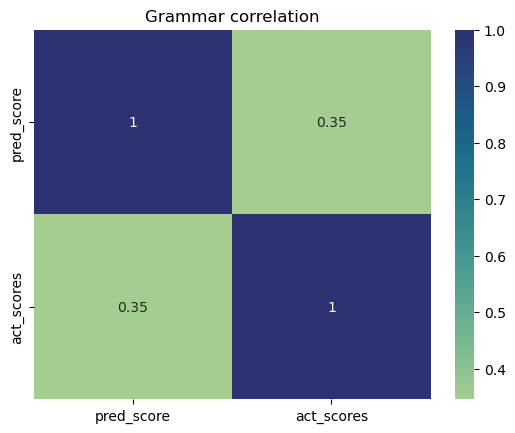

In [44]:
sns.heatmap(corr_df_grammar.corr(), annot = True, cmap = "crest").set_title("Grammar correlation")

Text(0.5, 1.0, 'Conventions correlation')

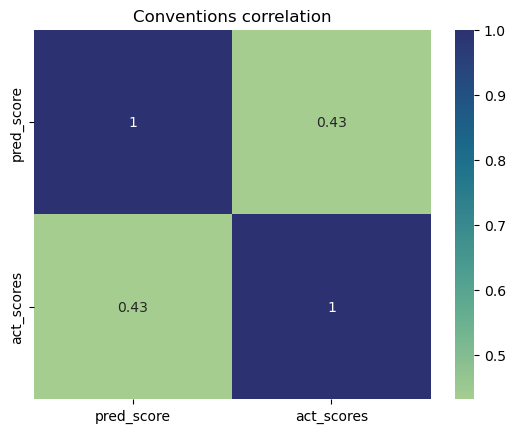

In [45]:
sns.heatmap(corr_df_conventions.corr(), annot = True, cmap = "crest").set_title("Conventions correlation")

#### The dual convolutions model seems to do strongly with syntax, vocabulary and conventions. It's weakest feature is grammar.

## CNN tuned with Augmentation 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators
from albumentations.core.transforms_interface import DualTransform, BasicTransform

In [2]:
train_df = pd.read_csv('Data/train.csv')

In [3]:
train_df.head()

text_id                                          full_text  cohesion  \
0  0016926B079C  I think that students would benefit from learn...       3.5   
1  0022683E9EA5  When a problem is a change you have to let it ...       2.5   
2  00299B378633  Dear, Principal\n\nIf u change the school poli...       3.0   
3  003885A45F42  The best time in life is when you become yours...       4.5   
4  0049B1DF5CCC  Small act of kindness can impact in other peop...       2.5   

   syntax  vocabulary  phraseology  grammar  conventions  
0     3.5         3.0          3.0      4.0          3.0  
1     2.5         3.0          2.0      2.0          2.5  
2     3.5         3.0          3.0      3.0          2.5  
3     4.5         4.5          4.5      4.0          5.0  
4     3.0         3.0          3.0      2.5          2.5

In [4]:
proc_text = [contractions.fix(text) for text in train_df['full_text']]
# Very fast! Measure time later
def more_processing(text):
    text = text.lower()
    return text

proc_text_2 = [more_processing(text) for text in proc_text]

In [5]:
nlp = spacy.load("en_core_web_md", disable=['senter', 'parser', 'ner'])
#nlp.enable("senter")
print(nlp.pipe_names)

pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    removers.remove_punctuation_token,
    replacers.replace_number_token,
    mutators.mutate_lemma_token,
)

/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['senter', 'parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


In [6]:
proc_text_3 = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
# n_process = 4, batch size 12 - 105 it/s : 00:37

# n_process = 8, default batch size - takes forever to initialize
# n_process = 8, batch size 12 - 141 it/s : 00:27
# n_process = 8, batch size 48 - 130 it/s : 00:29

# n_process = 12, default batch size - takes forever to initialize
# n_process = 12, batch size 12 - 120.3 it/s : 00:29
# n_process = 12, batch size 48 - 89.5 it/s : 00:34


Cleaning Progress: 100%|███████████████████████████████████████████████████████████| 3911/3911 [00:31<00:00, 124.55it/s]


In [4]:
# Contractions mapped, lemmatized, stopwords and punctuations removed, numbers replaced.
proc_text_3[1]

In [8]:
# Also added start of seq and end of seq, lowercase
train_df['cleaned_text'] = proc_text_3

In [9]:
train_df.head()
train_df.to_csv('processed_data_sostok.csv')

## Load this

In [7]:
train_df = pd.read_csv('processed_data_sostok.csv')

In [9]:
import random
from albumentations.core.transforms_interface import DualTransform, BasicTransform
from nltk import sent_tokenize
class NLPTransform(BasicTransform):
    """ Transform for nlp task."""
    LANGS = {
        'en': 'english',
        'it': 'italian', 
        'fr': 'french', 
        'es': 'spanish',
        'tr': 'turkish', 
        'ru': 'russian',
        'pt': 'portuguese'
    }

    @property
    def targets(self):
        return {"data": self.apply}
    
    def update_params(self, params, **kwargs):
        if hasattr(self, "interpolation"):
            params["interpolation"] = self.interpolation
        if hasattr(self, "fill_value"):
            params["fill_value"] = self.fill_value
        return params

    def get_sentences(self, text, lang='en'):
        return sent_tokenize(text, self.LANGS.get(lang, 'english'))

In [10]:
#trying basic data augmentation: 
class ShuffleSentencesTransform(NLPTransform):
    """ Do shuffle by sentence """
    def __init__(self, always_apply=False, p=0.5):
        super(ShuffleSentencesTransform, self).__init__(always_apply, p)

    def apply(self, data, **params):
        text, lang = data
        sentences = self.get_sentences(text, lang)
        random.shuffle(sentences)
        return ' '.join(sentences), lang
    
#https://www.kaggle.com/code/shonenkov/nlp-albumentations/notebook

In [11]:
transform = ShuffleSentencesTransform(p=1.0)
transformed_list = []

for iter in train_df['cleaned_text']:
    text = iter
    lang = 'en'
    temp_text = transform(data=(text, lang))['data'][0]
    transformed_list.append(temp_text)

In [12]:
transformed_list[1]

'< sostok > problem change let good matter happen change mind need wake look problem good way change want change time ago problem change different help understand ting wok different example remember come united states think go change think go change different country realist wrong problem change change way remember shy think change lot problem think thing life need different way let happen rue change want problem example think go change need shy anymore need start see different way mad need know go happen people different way know change good let body change way want change choice problem decide _LIKE_NUM_ help understand thing work instance mom lot problem faith people mom scare high scare high understand mos scare high scare high time mom airplane laugh scare funny different way like high understand hoe thing work people example think mom different understand like high need understand help understand thing work need start thing work person life problem change different help understan

In [13]:
train_df['cleaned_text'][1]

'< sostok > problem change let good matter happen change mind need wake look problem good way change want change time ago problem change different help understand ting wok different example remember come united states think go change think go change different country realist wrong problem change change way remember shy think change lot problem think thing life need different way let happen rue change want problem example think go change need shy anymore need start see different way mad need know go happen people different way know change good let body change way want change choice problem decide _LIKE_NUM_ help understand thing work instance mom lot problem faith people mom scare high scare high understand mos scare high scare high time mom airplane laugh scare funny different way like high understand hoe thing work people example think mom different understand like high need understand help understand thing work need start thing work person life problem change different help understan

#### Order has not changed

In [14]:
aug_df = train_df.copy()
aug_df['cleaned_text'] = transformed_list

In [15]:
extended_dataset = pd.concat([train_df, aug_df], keys = 'text_id', ignore_index = True)

In [16]:
extended_dataset.tail()

Unnamed: 0       text_id  \
7817        3906  FFD29828A873   
7818        3907  FFD9A83B0849   
7819        3908  FFDC4011AC9C   
7820        3909  FFE16D704B16   
7821        3910  FFED00D6E0BD   

                                              full_text  cohesion  syntax  \
7817  I believe using cellphones in class for educat...       2.5     3.0   
7818  Working alone, students do not have to argue w...       4.0     4.0   
7819  "A problem is a chance for you to do your best...       2.5     3.0   
7820  Many people disagree with Albert Schweitzer's ...       4.0     4.5   
7821  Do you think that failure is the main thing fo...       3.5     2.5   

      vocabulary  phraseology  grammar  conventions  \
7817         3.0          3.5      2.5          2.5   
7818         4.0          4.0      3.5          3.0   
7819         3.0          3.0      3.5          3.0   
7820         4.5          4.0      4.5          4.5   
7821         3.5          3.0      3.0          3.5   

                                           cleaned_text  
7817  < sostok > believe cellphone class education g...  
7818  < sostok > work student argue decission proyec...  
7819  < sostok > problem chance good think quote goo...  
7820  < sostok > people disagree albert schweitzer q...  
7821  < sostok > think failure main thing people con...

In [17]:
# rare word analysis
def get_rare_word_percent(tokenizer, threshold):
    # threshold: if the word's occurrence is less than this then it's rare word

    count = 0
    total_count = 0
    frequency = 0
    total_frequency = 0
    rare_words = []

    for key, value in tokenizer.word_counts.items():
        total_count += 1
        total_frequency += value
        if value < threshold:
            rare_words.append({key, value})
            count += 1
            frequency += value
    print({
        'percent': round((count / total_count) * 100, 2),
        'total_coverage': round(frequency / total_frequency * 100, 2),
        'count': count,
        'total_count': total_count
        })

    return rare_words

In [18]:
# This is a different tokenizer to the one built into SpaCy
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(extended_dataset['cleaned_text'])

rare_words = get_rare_word_percent(x_tokenizer, 4)
#print(rare_words)

{'percent': 52.11, 'total_coverage': 1.39, 'count': 9056, 'total_count': 17377}


In [16]:
#rare_words[:100]
#mostly typos in otherwise normal

In [19]:
org_tokenizer = Tokenizer()
org_tokenizer.fit_on_texts(extended_dataset['full_text'])

rare_words_2 = get_rare_word_percent(org_tokenizer, 4)
#print(rare_words)

{'percent': 49.91, 'total_coverage': 0.66, 'count': 11065, 'total_count': 22169}


## y - multi output

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(extended_dataset['cleaned_text']), np.array(extended_dataset[['cohesion', 'syntax', 'vocabulary',
                                                                                  'phraseology', 'grammar', 'conventions']]), test_size = 0.05, random_state = 0, shuffle = True)

In [22]:
# To check how many rows in a column has length (of the text) <= limit
def get_word_percent(column, limit):
    count = 0
    for sentence in column:
        if len(sentence.split()) <= limit:
            count += 1

    return round(count / len(column), 2)


# Check how many % of headlines have 0-430 words
print(get_word_percent(train_df.cleaned_text, 430))

1.0


## Embedding matrix for Neural Nets
#### P.S. Following is not needed for the normal classification models.

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_text_len = 450
x_train_sequence = x_tokenizer.texts_to_sequences(x_train)
x_val_sequence = x_tokenizer.texts_to_sequences(x_val)

# padding upto max_text_len
x_train_padded = pad_sequences(x_train_sequence, maxlen=max_text_len, padding='pre')
x_val_padded = pad_sequences(x_val_sequence, maxlen=max_text_len, padding='pre')

x_vocab_size = len(x_tokenizer.word_index) + 1

print(x_vocab_size)

print(x_train_padded.shape)
print(y_train.shape)
print(x_val_padded.shape)
print(y_val.shape)

17378
(7430, 450)
(7430, 6)
(392, 450)
(392, 6)


In [24]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            #print("Word, i : ", word, i)
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix

embedding_dim = 50
x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10090 words (7287 misses)


In [54]:
#root mean squared error
from keras import backend as K 
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)    

In [55]:
from tensorflow.keras import backend as backend
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, dot, Dropout, MaxPooling1D, GlobalAveragePooling1D, Conv1D
import tensorflow as tf
backend.clear_session()
input_dim = len(x_train_padded[0])
input_layer = Input(shape = (input_dim, ))
embedding_layer = Embedding(input_dim = x_vocab_size, 
                    output_dim = embedding_dim, 
                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                    input_length=max_text_len, trainable = False, mask_zero = True)(input_layer)
conv_1 = Conv1D(128, 2, activation = 'relu')(embedding_layer)
conv_2 = Conv1D(128, 2, activation = 'relu')(conv_1)

# Dropout
dropout_1 = Dropout(0.2)(conv_2)

#conv_3 = Conv1D(128, 2, activation = 'relu')(dropout_1)
#conv_4 = Conv1D(128, 2, activation = 'relu')(conv_3)

# Dropout
#dropout_2 = Dropout(0.2)(conv_4)

# Pooling
pooling_layer = GlobalAveragePooling1D()(dropout_1)

# Output
output_layer = Dense(6)(pooling_layer)

model = Model(inputs=input_layer, outputs=output_layer)
optimizer_obj = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
model.summary()

2023-08-03 20:56:13.720366: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 20:56:13.726006: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-03 20:56:13.726920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-03 20:56:13.727477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 conv1d (Conv1D)             (None, 449, 128)          12928     
                                                                 
 conv1d_1 (Conv1D)           (None, 448, 128)          32896     
                                                                 
 dropout (Dropout)           (None, 448, 128)          0         
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                             

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss',
                  mode='min', verbose=1, patience=3, min_delta = 0.002),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001, verbose=1),
]

In [58]:
history = model.fit(x_train_padded, y_train, epochs=20, validation_data=(x_val_padded, y_val), batch_size = 64, callbacks = callbacks)

Epoch 1/20
Instructions for updating:
Use fn_output_signature instead


2023-08-03 20:56:37.211429: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


117/117 [==============================] - 33s 208ms/step - loss: 1.0194 - val_loss: 0.5813 - lr: 0.0010
Epoch 2/20
117/117 [==============================] - 23s 197ms/step - loss: 0.5712 - val_loss: 0.5728 - lr: 0.0010
Epoch 3/20
117/117 [==============================] - 24s 202ms/step - loss: 0.5555 - val_loss: 0.5521 - lr: 0.0010
Epoch 4/20
117/117 [==============================] - 24s 202ms/step - loss: 0.5422 - val_loss: 0.5427 - lr: 0.0010
Epoch 5/20
117/117 [==============================] - 23s 198ms/step - loss: 0.5347 - val_loss: 0.5359 - lr: 0.0010
Epoch 6/20
117/117 [==============================] - 24s 207ms/step - loss: 0.5308 - val_loss: 0.5342 - lr: 0.0010
Epoch 7/20
117/117 [==============================] - 24s 204ms/step - loss: 0.5245 - val_loss: 0.5283 - lr: 0.0010
Epoch 8/20
116/117 [============================>.] - ETA: 0s - loss: 0.5225
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
117/117 [==============================] - 23

In [59]:
model_json = model.to_json()
with open('saved_models/CNN_Glove50_aug.json', 'w') as f:
    f.write(model_json)

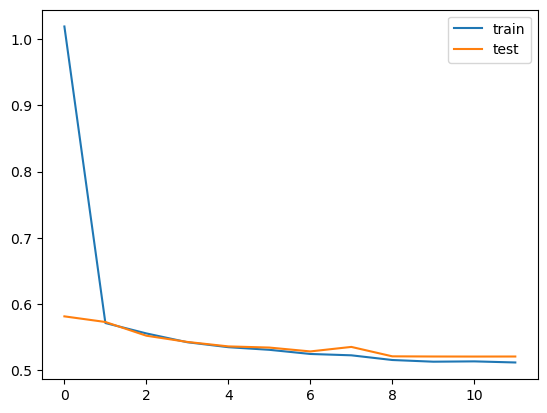

<Figure size 640x480 with 0 Axes>

In [60]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.savefig('CNN_Glove50_aug.png')
model.save_weights('saved_models/CNN_Glove50_aug.h5', save_format = 'h5')

In [19]:
#model.save('saved_models/LSTM_combined_dense_1')

In [61]:
from keras.models import model_from_json
with open('saved_models/CNN_Glove50_aug.json', 'r') as f:
    loaded_json = f.read()
    f.close()
    loaded_model = model_from_json(loaded_json)
loaded_model.load_weights('saved_models/CNN_Glove50_aug.h5')

In [62]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 conv1d (Conv1D)             (None, 449, 128)          12928     
                                                                 
 conv1d_1 (Conv1D)           (None, 448, 128)          32896     
                                                                 
 dropout (Dropout)           (None, 448, 128)          0         
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                             

In [63]:
loaded_model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
scores = loaded_model.evaluate(x_val_padded, y_val, verbose=0)
print("Validation loss: %.2f%%" % (scores*100))

Validation loss: 52.06%


In [64]:
test_scores = loaded_model.predict(x_val_padded)
print("Predicted results: ", test_scores[:10])
print("Actual results: ", y_val[:10])

13/13 [==============================] - 0s 8ms/step
Predicted results:  [[2.9791152 2.8154635 3.0687764 2.8959873 2.645903  2.839581 ]
 [3.139825  3.0315242 3.161587  3.0798905 3.102504  3.1530578]
 [2.8979676 2.7836363 2.980382  2.8388193 2.8295195 2.8044183]
 [2.6402657 2.4814456 2.8023703 2.6057131 2.3655522 2.353733 ]
 [3.007704  2.8908935 3.0137968 2.9445083 2.9685538 3.039684 ]
 [2.7979267 2.6844878 2.895976  2.7663105 2.7271552 2.7472677]
 [2.934377  2.8499887 3.0601065 2.9094417 2.8940878 2.8810172]
 [3.5538042 3.4303553 3.8726373 3.663131  3.2393408 3.465751 ]
 [3.0027506 2.940299  3.0749514 3.018273  3.0730824 3.0424633]
 [3.7440732 3.5808709 3.8382037 3.6695173 3.3504217 3.6476312]]
Actual results:  [[3.  3.  3.  3.  2.5 3. ]
 [3.  3.  3.5 2.  2.  3. ]
 [3.5 2.5 2.5 3.  3.5 2.5]
 [3.5 3.  3.5 4.  3.5 3. ]
 [3.5 3.  2.5 3.  3.  2.5]
 [2.5 2.  2.  2.  2.  2. ]
 [2.5 2.5 3.  3.  2.  2. ]
 [2.5 2.5 3.  2.5 2.  2.5]
 [3.  4.  3.5 3.5 3.  3.5]
 [3.  3.  3.5 3.  2.5 3. ]]


In [65]:
test_scores[1].shape

(6,)

In [66]:
results_df = pd.DataFrame(data = list(zip(test_scores, y_val)), columns = ['Pred_scores', 'Actual'])
results_df.to_csv("CNN_Glove50_aug.csv")

In [67]:
analysis_df = results_df
analysis_df['error'] = results_df['Pred_scores'] - results_df['Actual']
analysis_df.to_csv("CNN_Glove50_aug.csv")
analysis_df.to_pickle("CNN_Glove50_aug.pkl")

In [ ]:
#analysis_df = pd.read_csv("m1_a_m_pre_LSTM_combined_colwise.csv", converters = {'error': pd.eval})

In [27]:
analysis_df = pd.read_pickle("CNN_Glove50_aug.pkl")

In [28]:
analysis_df.head()

Pred_scores  \
0  [2.9791152, 2.8154635, 3.0687764, 2.8959873, 2...   
1  [3.139825, 3.0315242, 3.161587, 3.0798905, 3.1...   
2  [2.8979676, 2.7836363, 2.980382, 2.8388193, 2....   
3  [2.6402657, 2.4814456, 2.8023703, 2.6057131, 2...   
4  [3.007704, 2.8908935, 3.0137968, 2.9445083, 2....   

                           Actual  \
0  [3.0, 3.0, 3.0, 3.0, 2.5, 3.0]   
1  [3.0, 3.0, 3.5, 2.0, 2.0, 3.0]   
2  [3.5, 2.5, 2.5, 3.0, 3.5, 2.5]   
3  [3.5, 3.0, 3.5, 4.0, 3.5, 3.0]   
4  [3.5, 3.0, 2.5, 3.0, 3.0, 2.5]   

                                               error  
0  [-0.02088475227355957, -0.18453645706176758, 0...  
1  [0.13982510566711426, 0.0315241813659668, -0.3...  
2  [-0.6020324230194092, 0.28363633155822754, 0.4...  
3  [-0.859734296798706, -0.5185544490814209, -0.6...  
4  [-0.4922959804534912, -0.10910654067993164, 0....

In [31]:
pred_lst = analysis_df.Pred_scores
actual_lst = analysis_df.Actual
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [32]:
# flat is faster than item
cohesion_pred_lst = [x.flat[0] for x in pred_lst]
cohesion_act_lst = [x.flat[0] for x in actual_lst]

syntax_pred_lst = [x.flat[1] for x in pred_lst]
syntax_act_lst = [x.flat[1] for x in actual_lst]

vocabulary_pred_lst = [x.flat[2] for x in pred_lst]
vocabulary_act_lst = [x.flat[2] for x in actual_lst]

phraseology_pred_lst = [x.flat[3] for x in pred_lst]
phraseology_act_lst = [x.flat[3] for x in actual_lst]

grammar_pred_lst = [x.flat[4] for x in pred_lst]
grammar_act_lst = [x.flat[4] for x in actual_lst]

conventions_pred_lst = [x.flat[5] for x in pred_lst]
conventions_act_lst = [x.flat[5] for x in actual_lst]

In [69]:
# Predicted scores are not normally distributed. Model is learning something 
# other than the normal distribution. Good news!

In [33]:
iterations = x_val_padded.shape[0]
iterations

392

In [34]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(x_val_padded[num]))
#nonzero_count

In [ ]:
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [37]:
proof_df = analysis_df
proof_df['nonzero'] = nonzero_count

In [38]:
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])

[array([2.9791152, 2.8154635, 3.0687764, 2.8959873, 2.645903 , 2.839581 ],
       dtype=float32)
 array([3.139825 , 3.0315242, 3.161587 , 3.0798905, 3.102504 , 3.1530578],
       dtype=float32)
 array([2.8979676, 2.7836363, 2.980382 , 2.8388193, 2.8295195, 2.8044183],
       dtype=float32)
 array([2.6402657, 2.4814456, 2.8023703, 2.6057131, 2.3655522, 2.353733 ],
       dtype=float32)
 array([3.007704 , 2.8908935, 3.0137968, 2.9445083, 2.9685538, 3.039684 ],
       dtype=float32)                                                     ]


<AxesSubplot:>

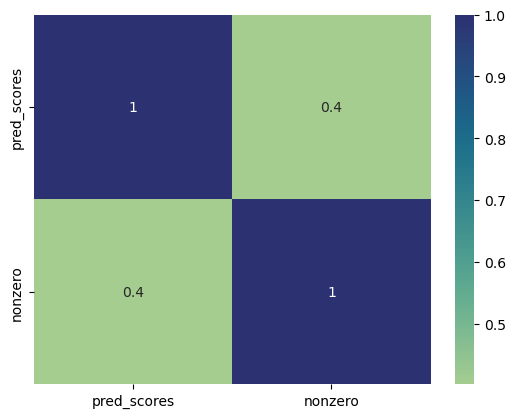

In [39]:
pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

import seaborn as sns
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

#### Actual correlation has been altered by data augmentation (used to be 0.31), but the model is still able to pick up on it well.

<AxesSubplot:>

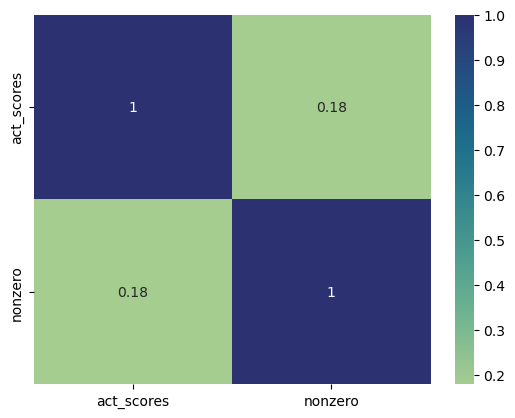

In [41]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

array([[<AxesSubplot:title={'center':'act_scores'}>]], dtype=object)

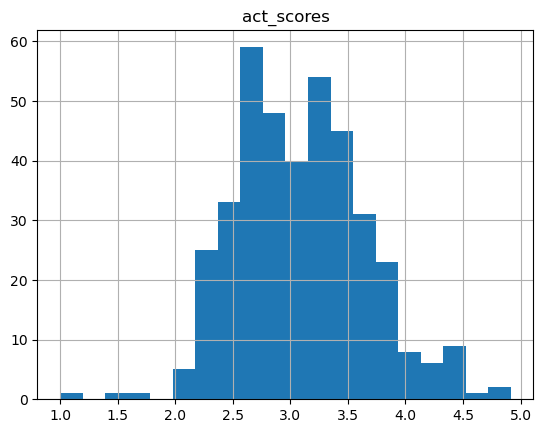

In [42]:
act_corr_df.hist(column = 'act_scores', bins = 20)

### Plotting the mean of the actual and mean of the predicted scores.

array([[<AxesSubplot:title={'center':'pred_scores'}>]], dtype=object)

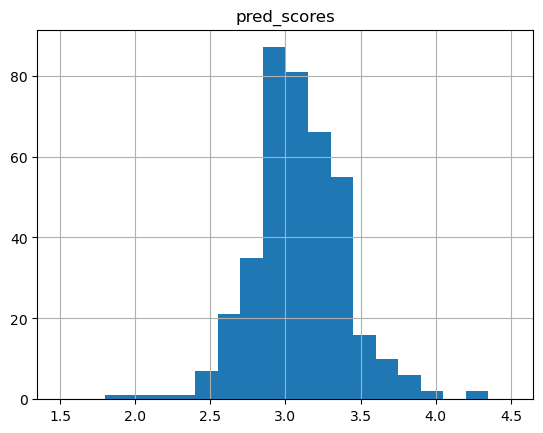

In [43]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [1.5, 4.5])

#### Model's scores are very nicely distributed!!

In [44]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.0758083
Actual median :  3.0


In [45]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

#print(pred_var_lst)

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.011082114
Actual mean variance :  0.11784297052154194


#### Better variance than the non-augmented model.

### Does the model's predicted score roughly follow the actual scores?

In [47]:
corr_df_cohesion = pd.DataFrame({'pred_score' : cohesion_pred_lst, 'act_scores' : cohesion_act_lst})
corr_df_syntax = pd.DataFrame({'pred_score' : syntax_pred_lst, 'act_scores' : syntax_act_lst})
corr_df_vocabulary = pd.DataFrame({'pred_score' : vocabulary_pred_lst, 'act_scores' : vocabulary_act_lst})
corr_df_phraseology = pd.DataFrame({'pred_score' : phraseology_pred_lst, 'act_scores' : phraseology_act_lst})
corr_df_grammar = pd.DataFrame({'pred_score' : grammar_pred_lst, 'act_scores' : grammar_act_lst})
corr_df_conventions = pd.DataFrame({'pred_score' : conventions_pred_lst, 'act_scores' : conventions_act_lst})

Text(0.5, 1.0, 'Cohesion correlation')

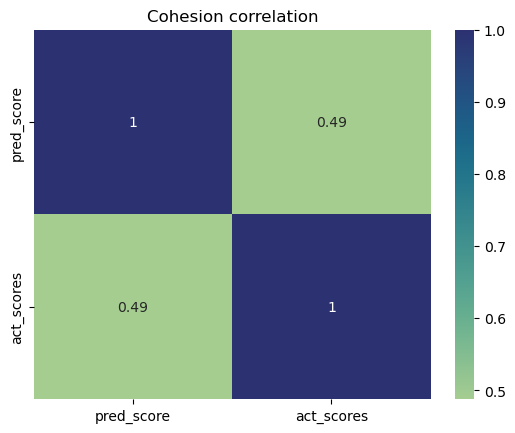

In [48]:
import seaborn as sns
sns.heatmap(corr_df_cohesion.corr(), annot = True, cmap = "crest").set_title("Cohesion correlation")

Text(0.5, 1.0, 'Syntax correlation')

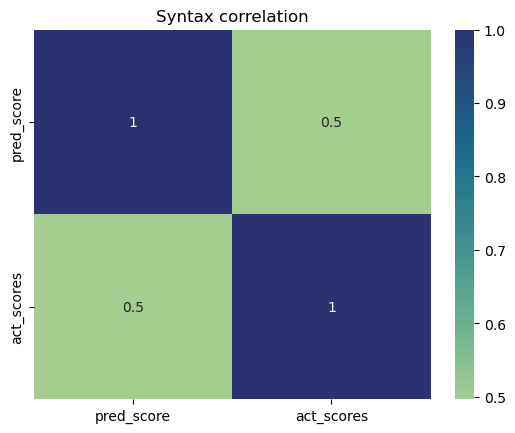

In [49]:
sns.heatmap(corr_df_syntax.corr(), annot = True, cmap = "crest").set_title("Syntax correlation")

Text(0.5, 1.0, 'Vocabulary correlation')

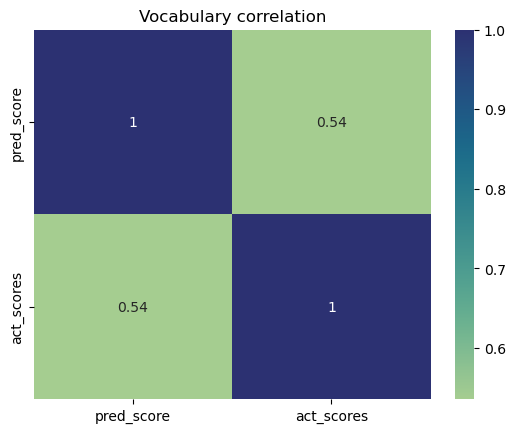

In [50]:
sns.heatmap(corr_df_vocabulary.corr(), annot = True, cmap = "crest").set_title("Vocabulary correlation")

Text(0.5, 1.0, 'Phraseology correlation')

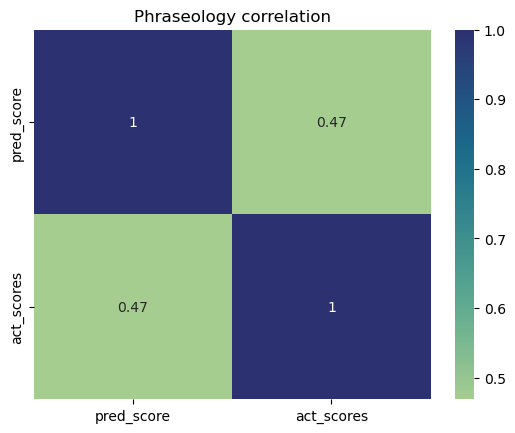

In [51]:
sns.heatmap(corr_df_phraseology.corr(), annot = True, cmap = "crest").set_title("Phraseology correlation")

Text(0.5, 1.0, 'Grammar correlation')

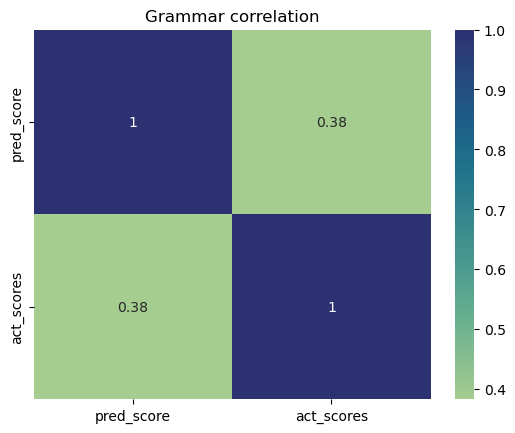

In [52]:
sns.heatmap(corr_df_grammar.corr(), annot = True, cmap = "crest").set_title("Grammar correlation")

Text(0.5, 1.0, 'Conventions correlation')

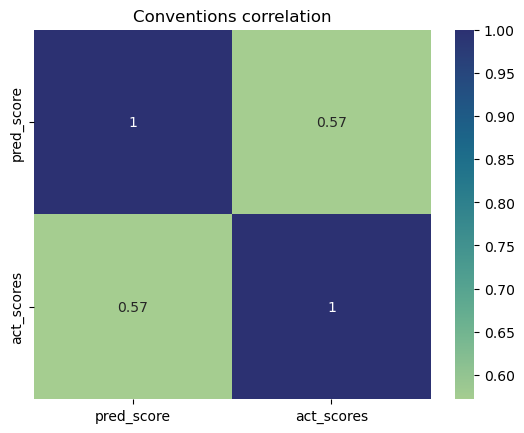

In [53]:
sns.heatmap(corr_df_conventions.corr(), annot = True, cmap = "crest").set_title("Conventions correlation")

#### Despite the really strong correlations, the model seems to perform about the same on the competition dataset. This indicates that the model is starting to overfit on the provided data, and further augmentation would likely reduce it's performance on other data.

#### Even with augmentation, this CNN model cannot learn the grammar score correlation well.

## LSTM_combined_base_pool

## Start here. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators

In [45]:
train_df = pd.read_csv('Data/train.csv')

In [40]:
# Quite fast!
def more_processing(text):
    text = '<sostok> ' + text + ' <eostok>' 
    text = text.lower()
    return text

t1 = time.perf_counter(), time.process_time()
proc_text = [contractions.fix(text) for text in train_df['full_text']]
proc_text_2 = [more_processing(text) for text in proc_text]
t2 = time.perf_counter(), time.process_time()
print(f" Real time: {t2[0] - t1[0] :.2f} seconds")
print(f" CPU time: {t2[1] - t1[1] :.2f} seconds")

 Real time: 0.70 seconds
 CPU time: 0.70 seconds


In [41]:
nlp = spacy.load("en_core_web_md", disable=['senter', 'parser', 'ner'])
#nlp.enable("senter")
print(nlp.pipe_names)

pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    removers.remove_punctuation_token,
    replacers.replace_number_token,
    mutators.mutate_lemma_token,
)

/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['senter', 'parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


In [42]:
proc_text_3 = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
# n_process = 4, batch size 12 - 105 it/s : 00:37

# n_process = 8, default batch size - takes forever to initialize
# n_process = 8, batch size 12 - 141 it/s : 00:27
# n_process = 8, batch size 48 - 130 it/s : 00:29

# n_process = 12, default batch size - takes forever to initialize
# n_process = 12, batch size 12 - 120.3 it/s : 00:29
# n_process = 12, batch size 48 - 89.5 it/s : 00:34


Cleaning Progress: 100%|███████████████████████████████████████████████████████████| 3911/3911 [00:23<00:00, 169.11it/s]


In [46]:
# Doing it manually
import time
import re
import string
from nltk.corpus import stopwords #reduce noise and improve the efficiency

#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                        "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                        "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
                        "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                        "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am",
                        "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've":
                        "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
                        "mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
                        "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                        "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                        "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
                        "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
                        "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", 
                        "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have",
                        "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will",
                        "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
                        "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", 
                        "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                        "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", 
                        "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                        "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                        "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
                        "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
                        "y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                        "you'll've": "you will have", "you're": "you are", "you've": "you have"}

#removing contraction
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

def replace_contractions(text):
    text = str(text)
    contractions, contractions_re = _get_contractions(contraction_dict)
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

def add_token(text):
    text = str(text)
    text = 'SOSTOK' + text + 'EOSTOK'
    return text
#https://towardsdatascience.com/using-deep-learning-for-end-to-end-multiclass-text-classification-39b46aecac81

def remove_punct(text):
    text = str(text)
    cleaned_text = text.translate(str.maketrans('', '', string.punctuation))
    return cleaned_text
            
def clean_text(text): 
    stop_words = stopwords.words('english')
    
    text = text.replace(",", " ")
   
    #Replace contractions
    text = replace_contractions(text)
    
    #Remove punctuations
    text = remove_punct(text)
    
    text = nlp(text)

    #Lemmatize text
    lemmatized =  [token.lemma_ for token in text if not str(token).isspace()]  
    
    #Remove stop words
    cleaned_text = [word for word in lemmatized if word not in stop_words]
    cleaned_text = add_token(cleaned_text)
    return cleaned_text

def clean_df(df):
    for index, row in df.iterrows():
        cleaned_text = clean_text(row['full_text'])
        df.at[index, 'full_text'] = cleaned_text

t1 = time.perf_counter(), time.process_time()
clean_df(train_df)
t2 = time.perf_counter(), time.process_time()
print(f" Real time: {t2[0] - t1[0] :.2f} seconds")
print(f" CPU time: {t2[1] - t1[1] :.2f} seconds")
print()

 Real time: 111.34 seconds
 CPU time: 111.34 seconds



#### Using SpaCy + the contractions library took 21-23 seconds, while the ordinary pipeline took 112 - 116 seconds.

#### The regular pipeline was almost 6x slower!!

In [47]:
# Contractions mapped, lemmatized, stopwords and punctuations removed, numbers replaced.
proc_text_3[1]

'< sostok > problem change let good matter happen change mind need wake look problem good way change want change time ago problem change different help understand ting wok different example remember come united states think go change think go change different country realist wrong problem change change way remember shy think change lot problem think thing life need different way let happen rue change want problem example think go change need shy anymore need start see different way mad need know go happened people different way know change good let body change way want change choice problem decide _LIKE_NUM_ help understand thing work instance mom lot problem faith people mom scare high scare high understand mos scare high scare high time mom airplane laugh scare funny different way like high understand hoe thing work people example think mom different understand like high need understand help understand thing work need start thing work person life problem change different help underst

In [48]:
# Also added start of seq and end of seq, lowercase
train_df['cleaned_text'] = proc_text_3

In [9]:
train_df.head()
train_df.to_csv('processed_data_sostok.csv')

In [12]:
# Move back to the EDA pitlane
#import matplotlib.pyplot as plt
#text_count = [len(sentence.split()) for sentence in cleaned_df.text]
#plt.hist(text_count, bins = 100)

In [2]:
train_df = pd.read_csv('processed_data_sostok.csv')

In [49]:
# rare word analysis
def get_rare_word_percent(tokenizer, threshold):
    # threshold: if the word's occurrence is less than this then it's rare word

    count = 0
    total_count = 0
    frequency = 0
    total_frequency = 0
    rare_words = []

    for key, value in tokenizer.word_counts.items():
        total_count += 1
        total_frequency += value
        if value < threshold:
            rare_words.append({key, value})
            count += 1
            frequency += value
    print({
        'percent': round((count / total_count) * 100, 2),
        'total_coverage': round(frequency / total_frequency * 100, 2),
        'count': count,
        'total_count': total_count
        })

    return rare_words

In [50]:
# This is a different tokenizer to the one built into SpaCy
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(train_df['cleaned_text'])

rare_words = get_rare_word_percent(x_tokenizer, 4)
#print(rare_words)

{'percent': 71.52, 'total_coverage': 2.6, 'count': 12493, 'total_count': 17469}


In [51]:
org_tokenizer = Tokenizer()
org_tokenizer.fit_on_texts(train_df['full_text'])

rare_words_2 = get_rare_word_percent(org_tokenizer, 4)
#print(rare_words)

{'percent': 72.21, 'total_coverage': 2.26, 'count': 13389, 'total_count': 18542}


## y - multi output

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(train_df['cleaned_text']), np.array(train_df[['cohesion', 'syntax', 'vocabulary',
                                                                                  'phraseology', 'grammar', 'conventions']]), test_size = 0.05, random_state = 0, shuffle = True)

In [54]:
# To check how many rows in a column has length (of the text) <= limit
def get_word_percent(column, limit):
    count = 0
    for sentence in column:
        if len(sentence.split()) <= limit:
            count += 1

    return round(count / len(column), 2)


# Check how many % of headlines have 0-430 words
print(get_word_percent(train_df.cleaned_text, 430))

1.0


In [11]:
max_text_len = 450

## Embedding matrix for Neural Nets

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_text_len = 450
x_train_sequence = x_tokenizer.texts_to_sequences(x_train)
x_val_sequence = x_tokenizer.texts_to_sequences(x_val)

# padding upto max_text_len
x_train_padded = pad_sequences(x_train_sequence, maxlen=max_text_len, padding='pre')
x_val_padded = pad_sequences(x_val_sequence, maxlen=max_text_len, padding='pre')

x_vocab_size = len(x_tokenizer.word_index) + 1

print(x_vocab_size)

print(x_train_padded.shape)
print(y_train.shape)
print(x_val_padded.shape)
print(y_val.shape)

In [62]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            #print("Word, i : ", word, i)
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix

embedding_dim = 50
x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10173 words (7296 misses)


In [15]:
#root mean squared error
from keras import backend as K 
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)    

In [16]:
from tensorflow.keras import backend as backend
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, dot, Dropout, MaxPooling1D, GlobalAveragePooling1D
import tensorflow as tf
backend.clear_session()
# Prepare the deep learning model
input_dim = len(x_train_padded[0])
input_layer = Input(shape=(input_dim,))
embedding_layer = Embedding(input_dim = x_vocab_size, 
                    output_dim = embedding_dim, 
                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                    input_length=max_text_len, trainable = False, mask_zero = True)(input_layer)
lstm_layer = LSTM(units=128, return_sequences = True)(embedding_layer)

# Return sequences - false -> normal Dense, only fully connected to one layer
# Return sequences - true -> time distributed Dense, fully connected to all previous layers.

# Custom Attention Layer
#attention_weights = dot([lstm_layer, lstm_layer], axes=[2, 2])
#attention_weights = Dense(units=input_dim, activation='softmax')(attention_weights)
#context_vector = dot([attention_weights, lstm_layer], axes=[2, 1])
#attention_output = LSTM(units=256)(context_vector)

# One dense layer - trying it out - made things worse with 256 units
#still bad with 64 units, maybe reLU activation is terrible -absolutely awful results though

# Temporal averaging - because attention not used here
pooling_layer = GlobalAveragePooling1D()(lstm_layer)

# Max pooling
# max_pool_1d = MaxPooling1D(pooling_layer)

# Dropout
dropout_1 = Dropout(0.3)(pooling_layer)


output_layer = Dense(units=6, activation='linear')(dropout_1)

model = Model(inputs=input_layer, outputs=output_layer)
optimizer_obj = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
model.summary()

2023-08-02 23:43:44.707055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 23:43:44.709455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-02 23:43:44.709945: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-02 23:43:44.710286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 lstm (LSTM)                 (None, 450, 128)          91648     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                             

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss',
                  mode='min', verbose=1, patience=3, min_delta = 0.002),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001, verbose=1),
]

In [20]:
history = model.fit(x_train_padded, y_train, epochs=20, validation_data=(x_val_padded, y_val), batch_size = 64, callbacks = callbacks)

Epoch 1/20
59/59 [==============================] - 313s 5s/step - loss: 0.7947 - val_loss: 0.5951 - lr: 0.0010
Epoch 2/20
59/59 [==============================] - 351s 6s/step - loss: 0.6856 - val_loss: 0.5887 - lr: 0.0010
Epoch 3/20
59/59 [==============================] - 175s 3s/step - loss: 0.6562 - val_loss: 0.5872 - lr: 0.0010
Epoch 4/20
59/59 [==============================] - 169s 3s/step - loss: 0.6344 - val_loss: 0.5721 - lr: 0.0010
Epoch 5/20
59/59 [==============================] - 165s 3s/step - loss: 0.6199 - val_loss: 0.5717 - lr: 0.0010
Epoch 6/20
59/59 [==============================] - ETA: 0s - loss: 0.6109
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
59/59 [==============================] - 162s 3s/step - loss: 0.6109 - val_loss: 0.5821 - lr: 0.0010
Epoch 7/20
59/59 [==============================] - 161s 3s/step - loss: 0.6073 - val_loss: 0.5644 - lr: 1.0000e-04
Epoch 8/20
59/59 [==============================] - 161s 3s/step - loss

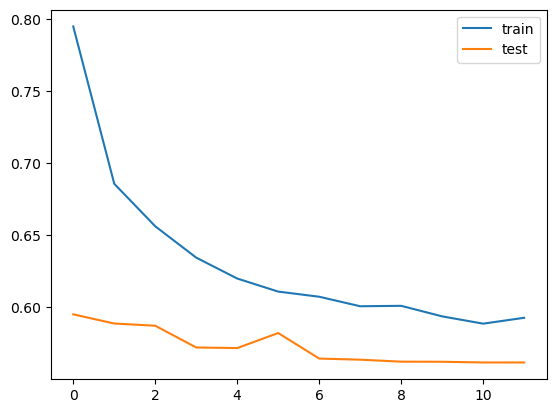

<Figure size 640x480 with 0 Axes>

In [21]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.savefig('LSTM_combined_base_pool.png')
model.save_weights('saved_models/LSTM_combined_base_pool.h5', save_format = 'h5')

In [24]:
model_json = model.to_json()
with open('saved_models/LSTM_combined_base_pool.json', 'w') as f:
    f.write(model_json)

In [25]:
from keras.models import model_from_json
with open('saved_models/LSTM_combined_base_pool.json', 'r') as f:
    loaded_json = f.read()
    f.close()
    loaded_model = model_from_json(loaded_json)
loaded_model.load_weights('saved_models/LSTM_combined_base_pool.h5')

In [26]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 lstm (LSTM)                 (None, 450, 128)          91648     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                             

In [ ]:
loaded_model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
scores = loaded_model.evaluate(x_val_padded, y_val, verbose=0)
print("Validation loss: %.2f%%" % (scores*100))

In [ ]:
test_scores = loaded_model.predict(x_val_padded)
print("Predicted results: ", test_scores[:10])
print("Actual results: ", y_val[:10])

In [70]:
test_scores[1].shape

(6,)

In [25]:
results_df = pd.DataFrame(data = list(zip(test_scores, y_val)), columns = ['Pred_scores', 'Actual'])
results_df.to_csv("LSTM_combined_base_pool.csv")

In [26]:
analysis_df = results_df
analysis_df['error'] = results_df['Pred_scores'] - results_df['Actual']
analysis_df.to_csv("LSTM_combined_base_pool.csv")
analysis_df.to_pickle("LSTM_combined_base_pool.pkl")

### Analysis starts here.

In [55]:
analysis_df = pd.read_pickle("LSTM_combined_base_pool.pkl")

In [56]:
analysis_df.head()

Pred_scores  \
0  [3.1408827, 3.0337906, 3.2249796, 3.0804179, 3...   
1  [3.143387, 3.02251, 3.252432, 3.1320505, 3.037...   
2  [3.2660096, 3.140604, 3.3610733, 3.273904, 3.0...   
3  [3.0427108, 3.0043192, 3.1935713, 3.1572006, 3...   
4  [3.3299615, 3.2031093, 3.4092429, 3.2716637, 3...   

                           Actual  \
0  [4.0, 3.5, 3.5, 3.5, 3.0, 3.5]   
1  [3.0, 3.5, 3.5, 3.5, 3.5, 3.0]   
2  [4.0, 4.0, 4.0, 3.5, 4.5, 4.5]   
3  [2.5, 3.0, 3.5, 3.5, 3.5, 3.0]   
4  [3.0, 3.0, 4.0, 3.0, 4.0, 4.0]   

                                               error  
0  [-0.8591172695159912, -0.46620941162109375, -0...  
1  [0.1433870792388916, -0.4774899482727051, -0.2...  
2  [-0.7339904308319092, -0.8593959808349609, -0....  
3  [0.5427107810974121, 0.004319190979003906, -0....  
4  [0.32996153831481934, 0.2031092643737793, -0.5...

In [57]:
pred_lst = analysis_df.Pred_scores
actual_lst = analysis_df.Actual
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [58]:
# flat is faster than item
cohesion_pred_lst = [x.flat[0] for x in pred_lst]
cohesion_act_lst = [x.flat[0] for x in actual_lst]

syntax_pred_lst = [x.flat[1] for x in pred_lst]
syntax_act_lst = [x.flat[1] for x in actual_lst]

vocabulary_pred_lst = [x.flat[2] for x in pred_lst]
vocabulary_act_lst = [x.flat[2] for x in actual_lst]

phraseology_pred_lst = [x.flat[3] for x in pred_lst]
phraseology_act_lst = [x.flat[3] for x in actual_lst]

grammar_pred_lst = [x.flat[4] for x in pred_lst]
grammar_act_lst = [x.flat[4] for x in actual_lst]

conventions_pred_lst = [x.flat[5] for x in pred_lst]
conventions_act_lst = [x.flat[5] for x in actual_lst]

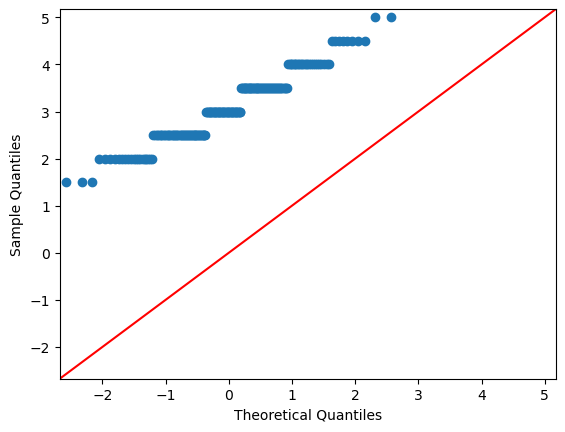

In [67]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(data = analysis_df['Actual'], line ='45')
py.show()

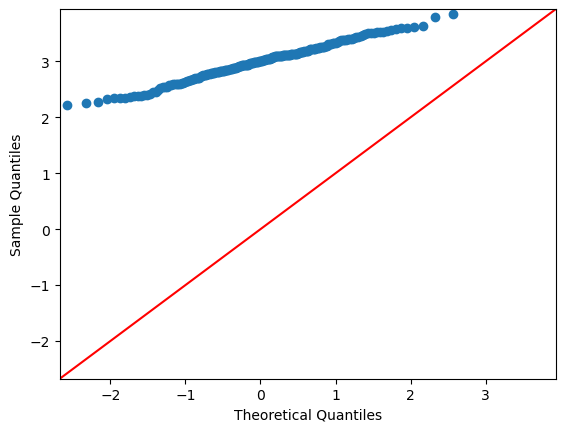

In [68]:
sm.qqplot(data = analysis_df['Pred_scores'], line ='45')
py.show()

In [69]:
# Predicted scores are not normally distributed. Model is learning something 
# other than the normal distribution. Good news!

In [64]:
iterations = x_val_padded.shape[0]
print(iterations)
# Should be equal to 196.

196


In [65]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(x_val_padded[num]))

In [66]:
proof_df = analysis_df
proof_df['nonzero'] = nonzero_count

In [69]:
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])

[array([3.1408827, 3.0337906, 3.2249796, 3.0804179, 3.007901 , 3.0665126],
       dtype=float32)
 array([3.143387 , 3.02251  , 3.252432 , 3.1320505, 3.0378053, 3.108344 ],
       dtype=float32)
 array([3.2660096, 3.140604 , 3.3610733, 3.273904 , 3.0898783, 3.2682352],
       dtype=float32)
 array([3.0427108, 3.0043192, 3.1935713, 3.1572006, 3.037479 , 3.1178188],
       dtype=float32)
 array([3.3299615, 3.2031093, 3.4092429, 3.2716637, 3.1294806, 3.2784224],
       dtype=float32)                                                     ]


<AxesSubplot:>

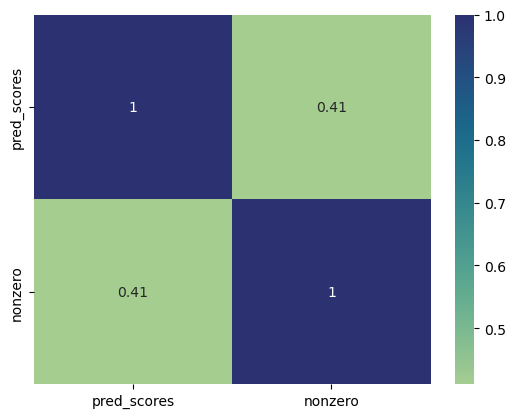

In [70]:
analysis_df['nonzero'] = nonzero_count

pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

import seaborn as sns
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

### The base pooled LSTM model does observe a somewhat high correlation between non-zero count and predicted scores.

#### Actual correlation:

<AxesSubplot:>

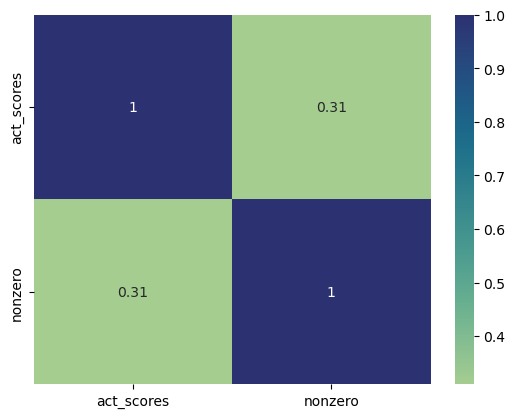

In [71]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

#### This model maps the correlation a bit stronger than it really is.

### Plotting the mean of the actual and mean of the predicted scores.

array([[<AxesSubplot:title={'center':'act_scores'}>]], dtype=object)

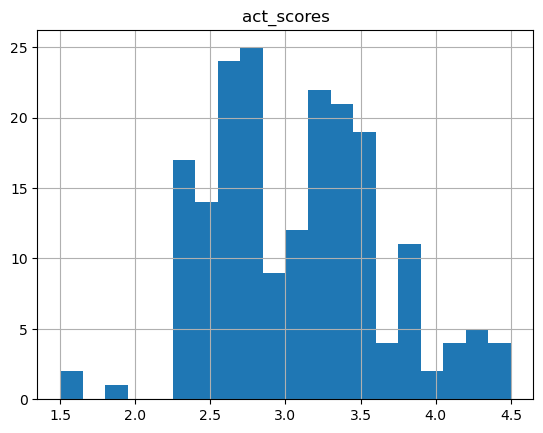

In [73]:
act_corr_df.hist(column = 'act_scores', bins = 20)

array([[<AxesSubplot:title={'center':'pred_scores'}>]], dtype=object)

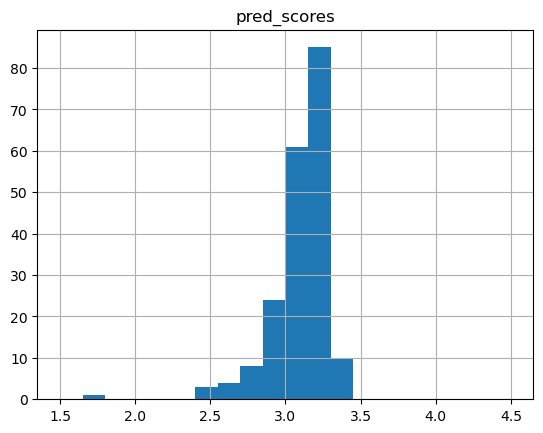

In [74]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [1.5, 4.5])

### Our model's output seem to not be as evenly distributed.

In [75]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.1388786
Actual median :  3.0


In [76]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

#print(pred_var_lst)

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.0058255806
Actual mean variance :  0.12308673469387756


### Variance of the model's results is too low, as expected from looking at the graph.

### Does the model's predicted score roughly follow the actual scores?

In [77]:
corr_df_cohesion = pd.DataFrame({'pred_score' : cohesion_pred_lst, 'act_scores' : cohesion_act_lst})
corr_df_syntax = pd.DataFrame({'pred_score' : syntax_pred_lst, 'act_scores' : syntax_act_lst})
corr_df_vocabulary = pd.DataFrame({'pred_score' : vocabulary_pred_lst, 'act_scores' : vocabulary_act_lst})
corr_df_phraseology = pd.DataFrame({'pred_score' : phraseology_pred_lst, 'act_scores' : phraseology_act_lst})
corr_df_grammar = pd.DataFrame({'pred_score' : grammar_pred_lst, 'act_scores' : grammar_act_lst})
corr_df_conventions = pd.DataFrame({'pred_score' : conventions_pred_lst, 'act_scores' : conventions_act_lst})

Text(0.5, 1.0, 'Cohesion correlation')

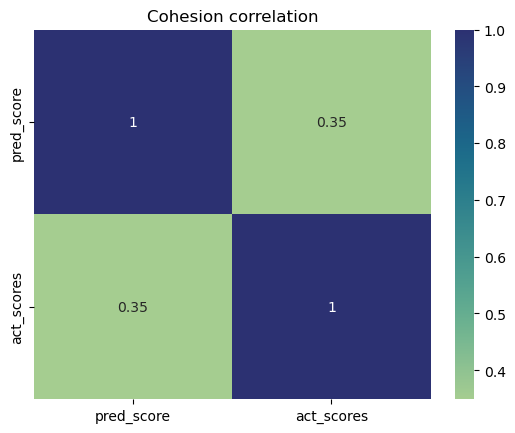

In [78]:
import seaborn as sns
sns.heatmap(corr_df_cohesion.corr(), annot = True, cmap = "crest").set_title("Cohesion correlation")

Text(0.5, 1.0, 'Syntax correlation')

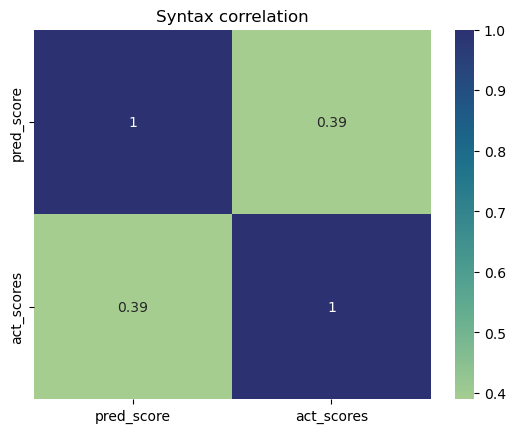

In [79]:
sns.heatmap(corr_df_syntax.corr(), annot = True, cmap = "crest").set_title("Syntax correlation")

Text(0.5, 1.0, 'Vocabulary correlation')

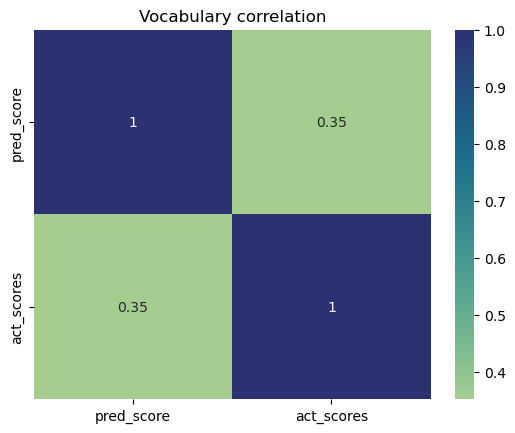

In [80]:
sns.heatmap(corr_df_vocabulary.corr(), annot = True, cmap = "crest").set_title("Vocabulary correlation")

Text(0.5, 1.0, 'Phraseology correlation')

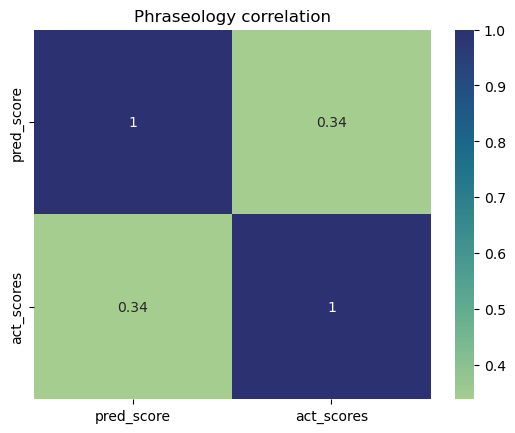

In [81]:
sns.heatmap(corr_df_phraseology.corr(), annot = True, cmap = "crest").set_title("Phraseology correlation")

Text(0.5, 1.0, 'Grammar correlation')

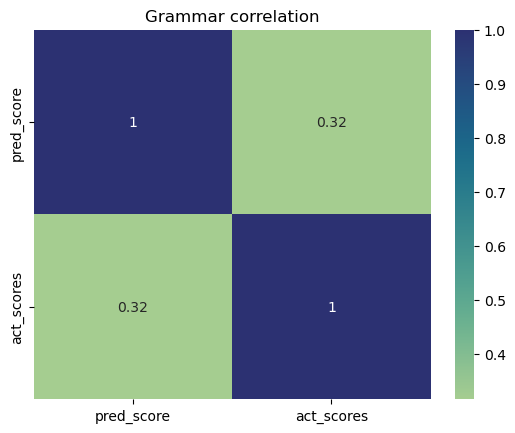

In [82]:
sns.heatmap(corr_df_grammar.corr(), annot = True, cmap = "crest").set_title("Grammar correlation")

Text(0.5, 1.0, 'Conventions correlation')

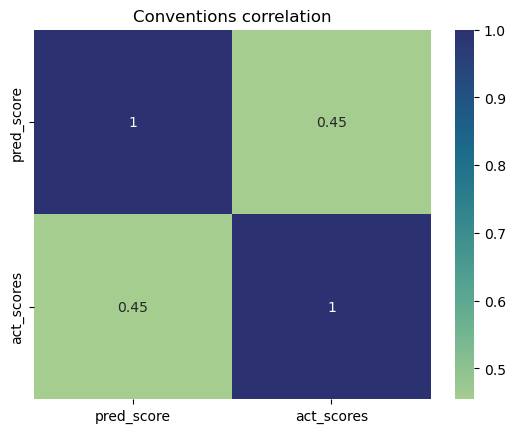

In [83]:
sns.heatmap(corr_df_conventions.corr(), annot = True, cmap = "crest").set_title("Conventions correlation")

### This model also seems to perform best with conventions and does not perform too well in grammar, phraseology, vocabulary and convention.

In [ ]:
# Pre-padding, no masking : 43.44% loss!
# 0.49 correlation

# Pre-padding, masking: 40.99% loss!
# 0.59 correlation - some reason masking makes the length correlation stronger

In [ ]:
## This time around the correlation changed to 0.65.

In [ ]:
# Compare differences (subtract one from the other) between the two lists
# Compute mean, variance, plot a histogram for the provided actual results and the predicted results. 

# QQPlot
## Central limit theorem - for SKLearn models

## LSTM_combined_base_att

## Start here. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators

2023-08-03 13:51:10.257127: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 13:51:10.744513: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-03 13:51:11.737955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/rkv/miniconda3/envs/tf/lib/
2023-08-03 13:51:11.741426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.s

In [5]:
train_df = pd.read_csv('Data/train.csv')

In [6]:
proc_text = [contractions.fix(text) for text in train_df['full_text']]
def more_processing(text):
    text = '<sostok> ' + text + ' <eostok>' 
    text = text.lower()
    return text

proc_text_2 = [more_processing(text) for text in proc_text]

In [7]:
nlp = spacy.load("en_core_web_sm", disable=['senter', 'parser', 'ner'])
#nlp.enable("senter")
print(nlp.pipe_names)

pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    removers.remove_punctuation_token,
    replacers.replace_number_token,
    mutators.mutate_lemma_token,
)

/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['senter', 'parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


In [8]:
proc_text_3 = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
# n_process = 4, batch size 12 - 105 it/s : 00:37

# n_process = 8, default batch size - takes forever to initialize
# n_process = 8, batch size 12 - 141 it/s : 00:27
# n_process = 8, batch size 48 - 130 it/s : 00:29

# n_process = 12, default batch size - takes forever to initialize
# n_process = 12, batch size 12 - 120.3 it/s : 00:29
# n_process = 12, batch size 48 - 89.5 it/s : 00:34


Cleaning Progress: 100%|███████████████████████████████████████████████████████████| 3911/3911 [00:27<00:00, 142.24it/s]


In [10]:
# added start of seq and end of seq, lowercase
train_df['cleaned_text'] = proc_text_3

In [11]:
train_df.head()
train_df.to_csv('processed_data_sostok.csv')

In [12]:
# Move back to the EDA pitlane
#import matplotlib.pyplot as plt
#text_count = [len(sentence.split()) for sentence in cleaned_df.text]
#plt.hist(text_count, bins = 100)

In [12]:
train_df = pd.read_csv('processed_data_sostok.csv')

In [13]:
#print(len(nlp.vocab))

23060


In [13]:
train_df.head()

Unnamed: 0       text_id  \
0           0  0016926B079C   
1           1  0022683E9EA5   
2           2  00299B378633   
3           3  003885A45F42   
4           4  0049B1DF5CCC   

                                           full_text  cohesion  syntax  \
0  I think that students would benefit from learn...       3.5     3.5   
1  When a problem is a change you have to let it ...       2.5     2.5   
2  Dear, Principal\n\nIf u change the school poli...       3.0     3.5   
3  The best time in life is when you become yours...       4.5     4.5   
4  Small act of kindness can impact in other peop...       2.5     3.0   

   vocabulary  phraseology  grammar  conventions  \
0         3.0          3.0      4.0          3.0   
1         3.0          2.0      2.0          2.5   
2         3.0          3.0      3.0          2.5   
3         4.5          4.5      4.0          5.0   
4         3.0          3.0      2.5          2.5   

                                        cleaned_text  
0  < sostok > think student benefit learn home ch...  
1  < sostok > problem change let good matter happ...  
2  < sostok > dear principal change school policy...  
3  < sostok > good time life agree great accompli...  
4  < sostok > small act kindness impact people ch...

In [14]:
# rare word analysis
def get_rare_word_percent(tokenizer, threshold):
    # threshold: if the word's occurrence is less than this then it's rare word

    count = 0
    total_count = 0
    frequency = 0
    total_frequency = 0
    rare_words = []

    for key, value in tokenizer.word_counts.items():
        total_count += 1
        total_frequency += value
        if value < threshold:
            rare_words.append({key, value})
            count += 1
            frequency += value
    print({
        'percent': round((count / total_count) * 100, 2),
        'total_coverage': round(frequency / total_frequency * 100, 2),
        'count': count,
        'total_count': total_count
        })

    return rare_words

In [15]:
# This is a different tokenizer to the one built into SpaCy
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(train_df['cleaned_text'])

rare_words = get_rare_word_percent(x_tokenizer, 4)
#print(rare_words)

{'percent': 71.5, 'total_coverage': 2.59, 'count': 12424, 'total_count': 17377}


In [16]:
org_tokenizer = Tokenizer()
org_tokenizer.fit_on_texts(train_df['full_text'])

rare_words_2 = get_rare_word_percent(org_tokenizer, 4)
#print(rare_words)

{'percent': 69.13, 'total_coverage': 1.24, 'count': 15325, 'total_count': 22169}


## y - multi output

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(train_df['cleaned_text']), np.array(train_df[['cohesion', 'syntax', 'vocabulary',
                                                                                  'phraseology', 'grammar', 'conventions']]), test_size = 0.05, random_state = 0, shuffle = True)

In [19]:
# To check how many rows in a column has length (of the text) <= limit
def get_word_percent(column, limit):
    count = 0
    for sentence in column:
        if len(sentence.split()) <= limit:
            count += 1

    return round(count / len(column), 2)


# Check how many % of headlines have 0-430 words
print(get_word_percent(train_df.cleaned_text, 430))

1.0


In [12]:
max_text_len = 450

## Embedding matrix for Neural Nets

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_text_len = 450
x_train_sequence = x_tokenizer.texts_to_sequences(x_train)
x_val_sequence = x_tokenizer.texts_to_sequences(x_val)

# padding upto max_text_len
x_train_padded = pad_sequences(x_train_sequence, maxlen=max_text_len, padding='pre')
x_val_padded = pad_sequences(x_val_sequence, maxlen=max_text_len, padding='pre')

x_vocab_size = len(x_tokenizer.word_index) + 1

print(x_vocab_size)

print(x_train_padded.shape)
print(y_train.shape)
print(x_val_padded.shape)
print(y_val.shape)

In [21]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            #print("Word, i : ", word, i)
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix

embedding_dim = 50
x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10090 words (7287 misses)


In [23]:
#root mean squared error
from keras import backend as K 
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)    

In [24]:
from tensorflow.keras import backend as backend
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, dot, Dropout, GlobalAveragePooling1D
import tensorflow as tf
backend.clear_session()
# Prepare the deep learning model
input_dim = len(x_train_padded[0])
input_layer = Input(shape=(input_dim,))
embedding_layer = Embedding(input_dim = x_vocab_size, 
                    output_dim = embedding_dim, 
                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                    input_length=max_text_len, trainable = False, mask_zero = True)(input_layer)
lstm_layer = LSTM(units=128, return_sequences = True)(embedding_layer)

# Return sequences - false -> normal Dense, only fully connected to one layer
# Return sequences - true -> time distributed Dense, fully connected to all previous layers.

# Custom Attention Layer
attention_weights = dot([lstm_layer, lstm_layer], axes=[2, 2])
attention_weights = Dense(units=input_dim, activation='softmax')(attention_weights)
context_vector = dot([attention_weights, lstm_layer], axes=[2, 1])
attention_output = LSTM(units=128, return_sequences = False)(context_vector)

# Temporal averaging - trying out - best 0.5559
#pooling_layer = GlobalAveragePooling1D()(attention_output)

# Dropout
dropout_1 = Dropout(0.2)(attention_output)


output_layer = Dense(units=6, activation='linear')(dropout_1)

model = Model(inputs=input_layer, outputs=output_layer)
optimizer_obj = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
model.summary()

2023-08-02 00:16:03.351647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 00:16:03.356369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-02 00:16:03.356971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-02 00:16:03.357375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 450)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 450, 50)      868900      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 450, 128)     91648       ['embedding[0][0]']              
                                                                                                  
 dot (Dot)                      (None, 450, 450)     0           ['lstm[0][0]',                   
                                                                  'lstm[0][0]']               

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss',
                  mode='min', verbose=1, patience=3, min_delta = 0.002),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001, verbose=1),
]

In [26]:
history = model.fit(x_train_padded, y_train, epochs=20, validation_data=(x_val_padded, y_val), batch_size = 64, callbacks = callbacks)

Epoch 1/20
Instructions for updating:
Use fn_output_signature instead


2023-08-02 00:16:22.858264: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500


59/59 [==============================] - 268s 4s/step - loss: 0.8821 - val_loss: 0.6099 - lr: 0.0010
Epoch 2/20
59/59 [==============================] - 250s 4s/step - loss: 0.6656 - val_loss: 0.6063 - lr: 0.0010
Epoch 3/20
59/59 [==============================] - 255s 4s/step - loss: 0.6515 - val_loss: 0.6014 - lr: 0.0010
Epoch 4/20
59/59 [==============================] - 253s 4s/step - loss: 0.6407 - val_loss: 0.5934 - lr: 0.0010
Epoch 5/20
59/59 [==============================] - 257s 4s/step - loss: 0.6343 - val_loss: 0.5870 - lr: 0.0010
Epoch 6/20
59/59 [==============================] - 251s 4s/step - loss: 0.6285 - val_loss: 0.5847 - lr: 0.0010
Epoch 7/20
59/59 [==============================] - 254s 4s/step - loss: 0.6248 - val_loss: 0.5739 - lr: 0.0010
Epoch 8/20
59/59 [==============================] - 249s 4s/step - loss: 0.6054 - val_loss: 0.5652 - lr: 0.0010
Epoch 9/20
59/59 [==============================] - ETA: 0s - loss: 0.6019
Epoch 9: ReduceLROnPlateau reducing lear

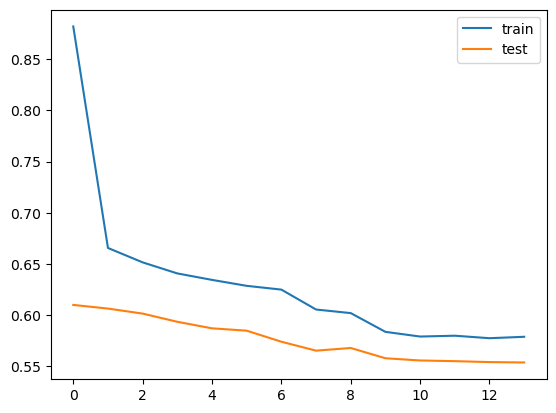

<Figure size 640x480 with 0 Axes>

In [27]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.savefig('LSTM_combined_base_att.png')
model.save_weights('saved_models/LSTM_combined_base_att.h5', save_format = 'h5')

In [29]:
model_json = model.to_json()
with open('saved_models/LSTM_combined_base_att.json', 'w') as f:
    f.write(model_json)

In [30]:
from keras.models import model_from_json
with open('saved_models/LSTM_combined_base_att.json', 'r') as f:
    loaded_json = f.read()
    f.close()
    loaded_model = model_from_json(loaded_json)
loaded_model.load_weights('saved_models/LSTM_combined_base_att.h5')

In [31]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 450)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 450, 50)      868900      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 450, 128)     91648       ['embedding[0][0]']              
                                                                                                  
 dot (Dot)                      (None, 450, 450)     0           ['lstm[0][0]',                   
                                                                  'lstm[0][0]']               

In [32]:
loaded_model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
scores = loaded_model.evaluate(x_val_padded, y_val, verbose=0)
print("Validation loss: %.2f%%" % (scores*100))

Validation loss: 55.36%


In [33]:
test_scores = loaded_model.predict(x_val_padded)
print("Predicted results: ", test_scores[:10])
print("Actual results: ", y_val[:10])

7/7 [==============================] - 4s 251ms/step
Predicted results:  [[2.8905935 2.778436  3.0242562 2.8975232 2.7826881 2.7977426]
 [3.233129  3.1238508 3.3340254 3.2405658 3.1356816 3.222542 ]
 [3.375493  3.259596  3.454932  3.3411448 3.2278883 3.3511798]
 [3.070013  2.9750311 3.1813834 3.0923142 2.994689  3.026396 ]
 [3.4067166 3.2939804 3.4750667 3.3646803 3.2515945 3.4085565]
 [3.5321407 3.4339693 3.5866652 3.4833035 3.3549266 3.5393498]
 [2.313321  2.3972495 2.7360382 2.3856854 2.4499536 2.5594041]
 [3.2110744 3.106754  3.2821321 3.1784472 3.0934997 3.1928453]
 [3.2084525 3.0996644 3.276982  3.1575255 3.0907972 3.1759799]
 [3.3848982 3.2817333 3.4651458 3.3547945 3.237567  3.3962777]]
Actual results:  [[4.  3.5 3.5 3.5 3.  3.5]
 [3.  3.5 3.5 3.5 3.5 3. ]
 [4.  4.  4.  3.5 4.5 4.5]
 [2.5 3.  3.5 3.5 3.5 3. ]
 [3.  3.  4.  3.  4.  4. ]
 [4.  3.5 4.5 4.  3.5 4.5]
 [2.5 2.5 2.5 2.5 3.  3. ]
 [4.  3.5 3.5 4.  3.  4. ]
 [4.  4.5 4.  4.  4.5 5. ]
 [4.  3.  3.  3.5 4.  4. ]]


In [48]:
test_scores[1].shape

(6,)

In [34]:
results_df = pd.DataFrame(data = list(zip(test_scores, y_val)), columns = ['Pred_scores', 'Actual'])
results_df.to_csv("LSTM_combined_base_att.csv")

In [35]:
analysis_df = results_df
analysis_df['error'] = results_df['Pred_scores'] - results_df['Actual']
analysis_df.to_csv("LSTM_combined_base_att.csv")
analysis_df.to_pickle("LSTM_combined_base_att.pkl")

### Analysis starts here.

In [2]:
analysis_df = pd.read_pickle("LSTM_combined_base_att.pkl")

In [3]:
analysis_df.head()

Pred_scores  \
0  [2.8905935, 2.778436, 3.0242562, 2.8975232, 2....   
1  [3.233129, 3.1238508, 3.3340254, 3.2405658, 3....   
2  [3.375493, 3.259596, 3.454932, 3.3411448, 3.22...   
3  [3.070013, 2.9750311, 3.1813834, 3.0923142, 2....   
4  [3.4067166, 3.2939804, 3.4750667, 3.3646803, 3...   

                           Actual  \
0  [4.0, 3.5, 3.5, 3.5, 3.0, 3.5]   
1  [3.0, 3.5, 3.5, 3.5, 3.5, 3.0]   
2  [4.0, 4.0, 4.0, 3.5, 4.5, 4.5]   
3  [2.5, 3.0, 3.5, 3.5, 3.5, 3.0]   
4  [3.0, 3.0, 4.0, 3.0, 4.0, 4.0]   

                                               error  
0  [-1.1094064712524414, -0.7215640544891357, -0....  
1  [0.23312902450561523, -0.37614917755126953, -0...  
2  [-0.624506950378418, -0.7404038906097412, -0.5...  
3  [0.5700130462646484, -0.024968862533569336, -0...  
4  [0.40671658515930176, 0.29398036003112793, -0....

In [5]:
pred_lst = analysis_df.Pred_scores
actual_lst = analysis_df.Actual
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [6]:
# flat is faster than item
cohesion_pred_lst = [x[0] for x in pred_lst]
cohesion_act_lst = [x[0] for x in actual_lst]

print("Pred cohesion:", cohesion_pred_lst[:5])
print("Actual cohesion:", cohesion_act_lst[:5])

syntax_pred_lst = [x[1] for x in pred_lst]
syntax_act_lst = [x[1] for x in actual_lst]

print("\nPred syntax:", syntax_pred_lst[:5])
print("Actual sytnax:", syntax_act_lst [:5])

vocabulary_pred_lst = [x[2] for x in pred_lst]
vocabulary_act_lst = [x[2] for x in actual_lst]

print("\nPred vocab:", vocabulary_pred_lst[:5])
print("Actual vocab:", vocabulary_act_lst[:5])

phraseology_pred_lst = [x[3] for x in pred_lst]
phraseology_act_lst = [x[3] for x in actual_lst]

print("\nPred phraseology:", phraseology_pred_lst[:5])
print("Actual phraseology:", phraseology_act_lst[:5])

grammar_pred_lst = [x[4] for x in pred_lst]
grammar_act_lst = [x[4] for x in actual_lst]

print("\nPred grammar:", grammar_pred_lst[:5])
print("Actual grammar:", grammar_act_lst[:5])

conventions_pred_lst = [x[5] for x in pred_lst]
conventions_act_lst = [x[5] for x in actual_lst]

print("\nPred conventions:", conventions_pred_lst[:5])
print("Actual conventions:", conventions_act_lst[:5])

Pred cohesion: [2.8905935, 3.233129, 3.375493, 3.070013, 3.4067166]
Actual cohesion: [4.0, 3.0, 4.0, 2.5, 3.0]

Pred syntax: [2.778436, 3.1238508, 3.259596, 2.9750311, 3.2939804]
Actual sytnax: [3.5, 3.5, 4.0, 3.0, 3.0]

Pred vocab: [3.0242562, 3.3340254, 3.454932, 3.1813834, 3.4750667]
Actual vocab: [3.5, 3.5, 4.0, 3.5, 4.0]

Pred phraseology: [2.8975232, 3.2405658, 3.3411448, 3.0923142, 3.3646803]
Actual phraseology: [3.5, 3.5, 3.5, 3.5, 3.0]

Pred grammar: [2.7826881, 3.1356816, 3.2278883, 2.994689, 3.2515945]
Actual grammar: [3.0, 3.5, 4.5, 3.5, 4.0]

Pred conventions: [2.7977426, 3.222542, 3.3511798, 3.026396, 3.4085565]
Actual conventions: [3.5, 3.0, 4.5, 3.0, 4.0]


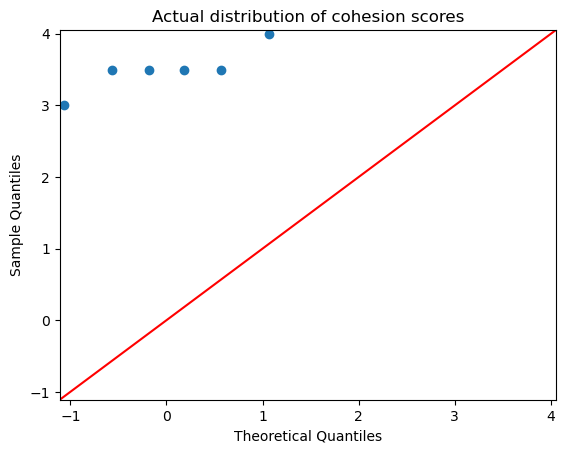

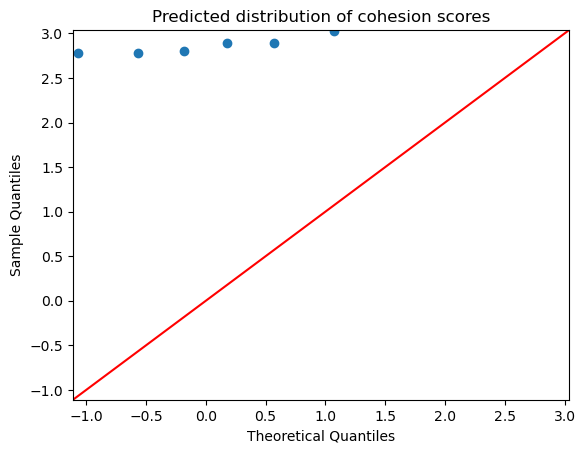

In [53]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(data = analysis_df['Actual'][0], line ='45')
py.title("Actual distribution of cohesion scores")
sm.qqplot(data = analysis_df['Pred_scores'][0], line ='45')
py.title("Predicted distribution of cohesion scores")
py.show()

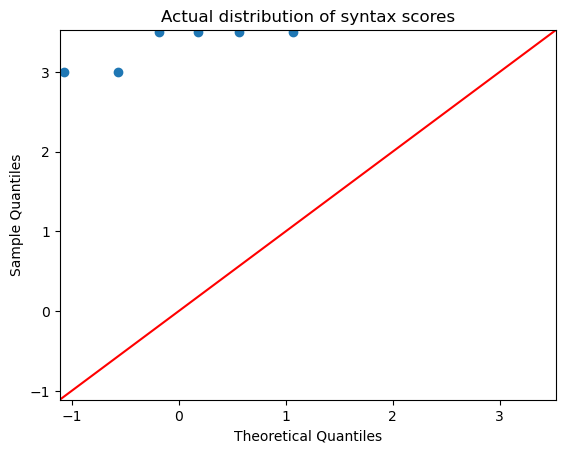

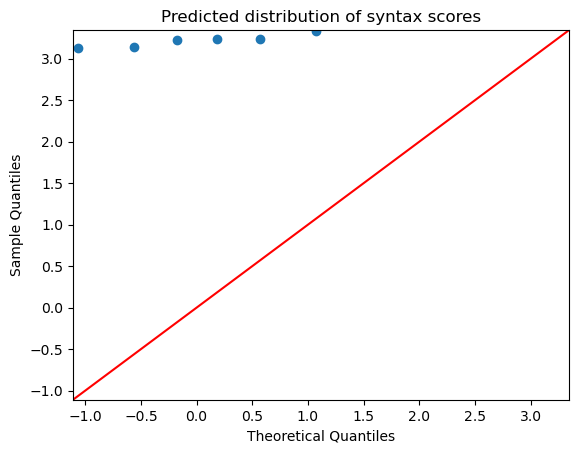

In [54]:
sm.qqplot(data = analysis_df['Actual'][1], line ='45')
py.title("Actual distribution of syntax scores")
sm.qqplot(data = analysis_df['Pred_scores'][1], line ='45')
py.title("Predicted distribution of syntax scores")
py.show()

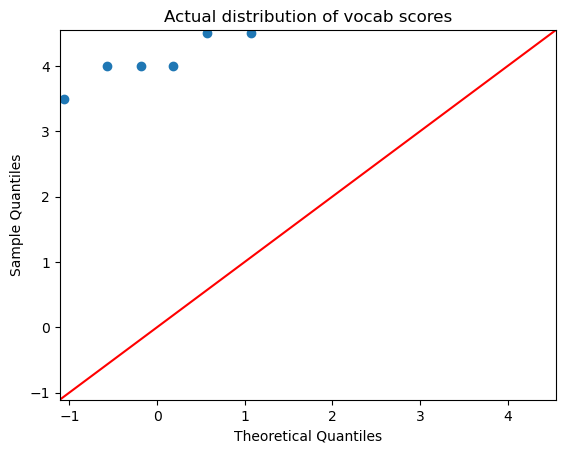

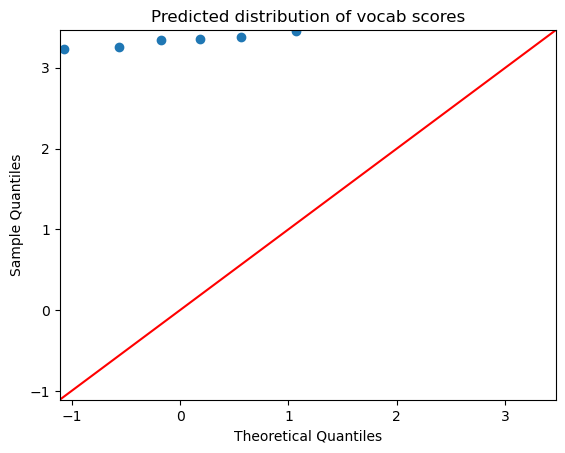

In [57]:
sm.qqplot(data = analysis_df['Actual'][2], line ='45')
py.title("Actual distribution of vocab scores")
sm.qqplot(data = analysis_df['Pred_scores'][2], line ='45')
py.title("Predicted distribution of vocab scores")
py.show()

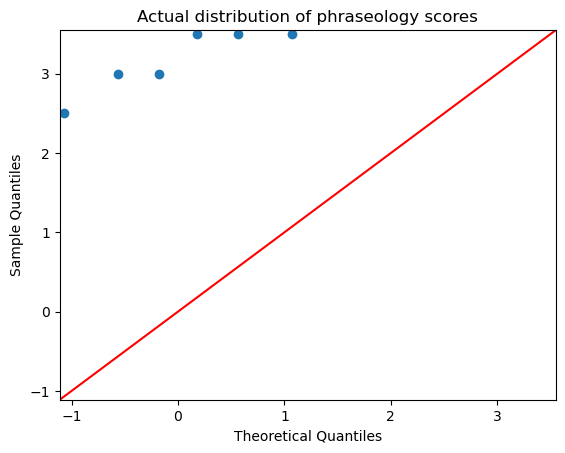

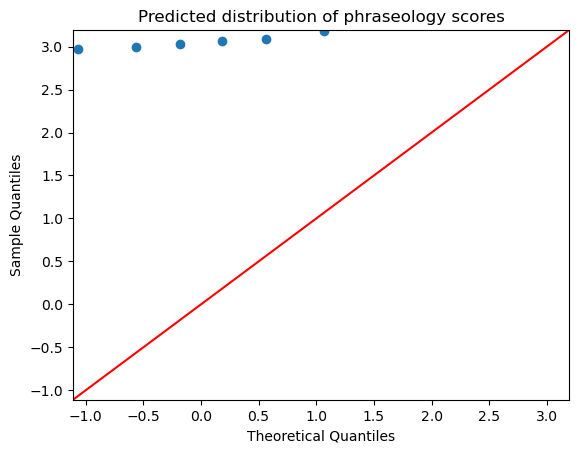

In [58]:
sm.qqplot(data = analysis_df['Actual'][3], line ='45')
py.title("Actual distribution of phraseology scores")
sm.qqplot(data = analysis_df['Pred_scores'][3], line ='45')
py.title("Predicted distribution of phraseology scores")
py.show()

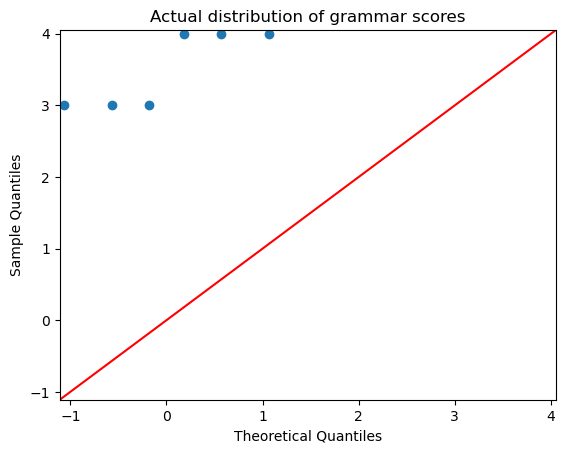

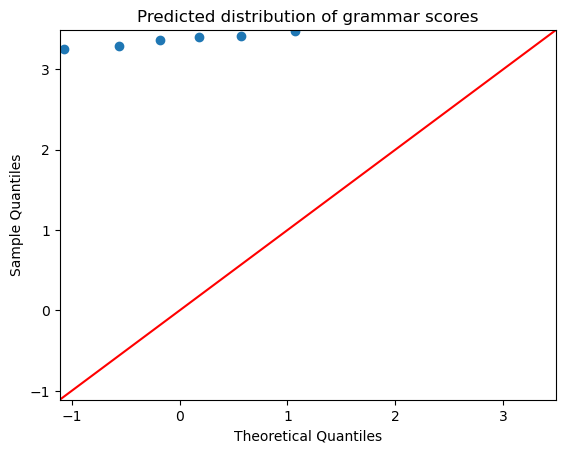

In [59]:
sm.qqplot(data = analysis_df['Actual'][4], line ='45')
py.title("Actual distribution of grammar scores")
sm.qqplot(data = analysis_df['Pred_scores'][4], line ='45')
py.title("Predicted distribution of grammar scores")
py.show()

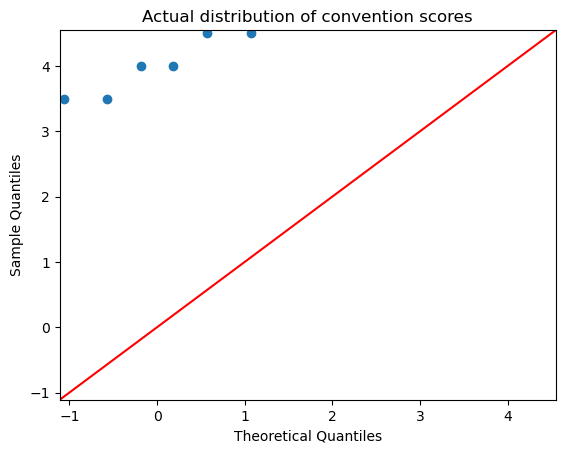

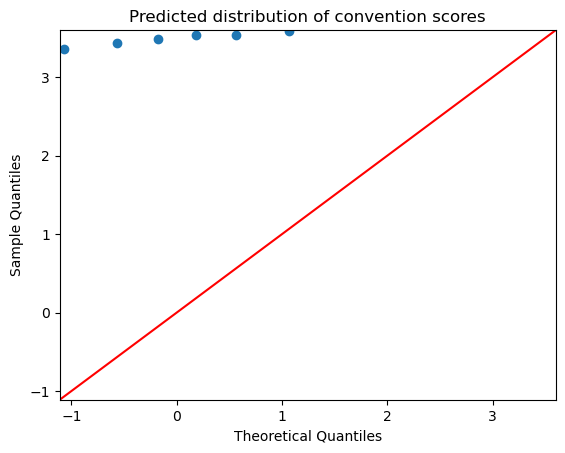

In [60]:
sm.qqplot(data = analysis_df['Actual'][5], line ='45')
py.title("Actual distribution of convention scores")
sm.qqplot(data = analysis_df['Pred_scores'][5], line ='45')
py.title("Predicted distribution of convention scores")
py.show()

### Predicted scores do seem to follow a common distribution, but none of the predicted scores are normally distributed. 

In [61]:
iterations = x_val_padded.shape[0]
iterations

196

In [62]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(x_val_padded[num]))
#nonzero_count

In [ ]:
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [68]:
proof_df = analysis_df
proof_df['nonzero'] = nonzero_count

In [82]:
import seaborn as sns
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])
#sns.heatmap(proof_df.corr(), annot = True, cmap = "crest")
test_scores[1].shape

[array([2.8905935, 2.778436 , 3.0242562, 2.8975232, 2.7826881, 2.7977426],
       dtype=float32)
 array([3.233129 , 3.1238508, 3.3340254, 3.2405658, 3.1356816, 3.222542 ],
       dtype=float32)
 array([3.375493 , 3.259596 , 3.454932 , 3.3411448, 3.2278883, 3.3511798],
       dtype=float32)
 array([3.070013 , 2.9750311, 3.1813834, 3.0923142, 2.994689 , 3.026396 ],
       dtype=float32)
 array([3.4067166, 3.2939804, 3.4750667, 3.3646803, 3.2515945, 3.4085565],
       dtype=float32)                                                     ]


(6,)

In [46]:
analysis_df['nonzero'] = nonzero_count

In [73]:
pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

[2.861873, 3.2149658, 3.335039, 3.0566378, 3.3667657]

In [79]:
corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

<AxesSubplot:>

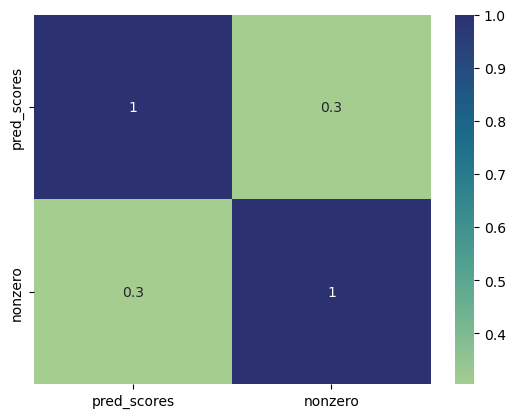

In [80]:
import seaborn as sns
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

### Low correlation observed in the multiple output model.

#### Is there actually a correlation between text length and score?

<AxesSubplot:>

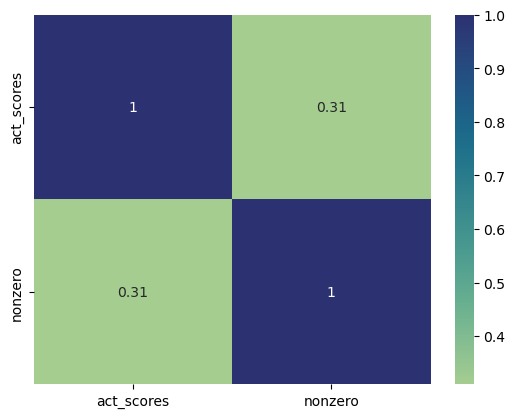

In [85]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

### Our model almost exactly maps the actual correlation observed!

array([[<AxesSubplot:title={'center':'act_scores'}>]], dtype=object)

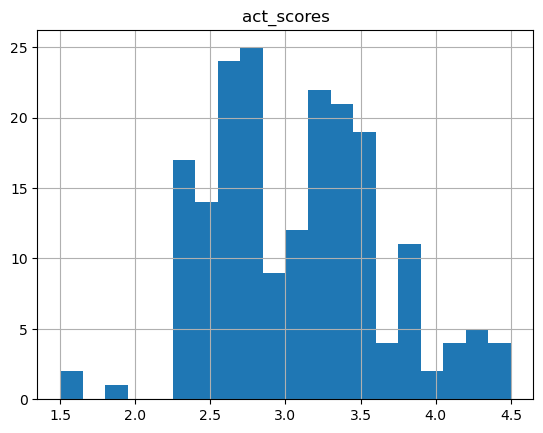

In [100]:
act_corr_df.hist(column = 'act_scores', bins = 20)

### Plotting the mean of the actual and mean of the predicted scores.

array([[<AxesSubplot:title={'center':'pred_scores'}>]], dtype=object)

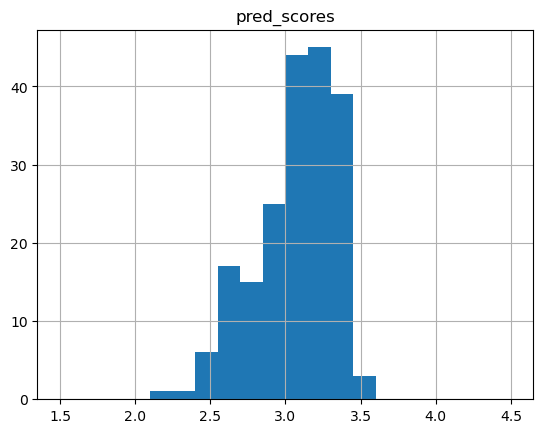

In [96]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [1.5, 4.5])

### Our model's output seem to not be as evenly distributed.

In [107]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.1194487
Actual median :  3.0


In [114]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

#print(pred_var_lst)

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.006586129
Actual mean variance :  0.12308673469387756


### Variance of the model's results is too low, as expected from looking at the graph.

In [9]:
corr_df_cohesion = pd.DataFrame({'pred_score' : cohesion_pred_lst, 'act_scores' : cohesion_act_lst})
corr_df_syntax = pd.DataFrame({'pred_score' : syntax_pred_lst, 'act_scores' : syntax_act_lst})
corr_df_vocabulary = pd.DataFrame({'pred_score' : vocabulary_pred_lst, 'act_scores' : vocabulary_act_lst})
corr_df_phraseology = pd.DataFrame({'pred_score' : phraseology_pred_lst, 'act_scores' : phraseology_act_lst})
corr_df_grammar = pd.DataFrame({'pred_score' : grammar_pred_lst, 'act_scores' : grammar_act_lst})
corr_df_conventions = pd.DataFrame({'pred_score' : conventions_pred_lst, 'act_scores' : conventions_act_lst})

Text(0.5, 1.0, 'Cohesion correlation')

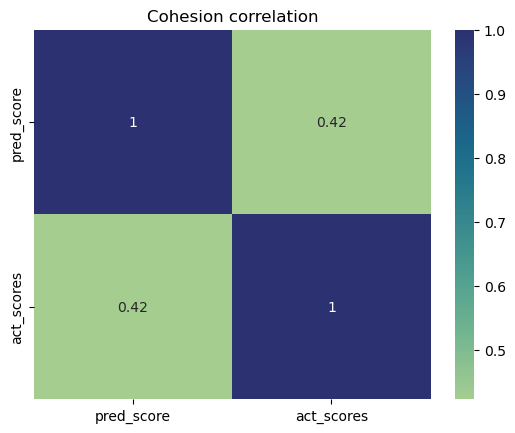

In [11]:
import seaborn as sns
sns.heatmap(corr_df_cohesion.corr(), annot = True, cmap = "crest").set_title("Cohesion correlation")

Text(0.5, 1.0, 'Syntax correlation')

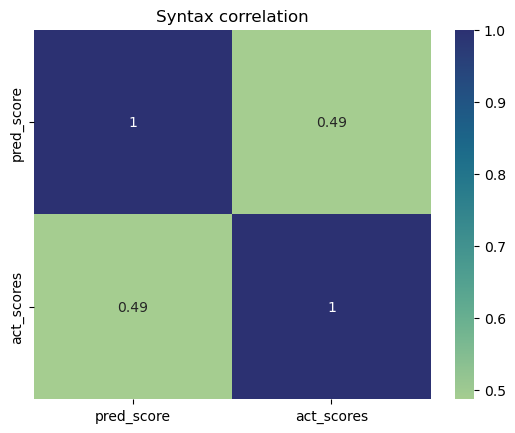

In [12]:
sns.heatmap(corr_df_syntax.corr(), annot = True, cmap = "crest").set_title("Syntax correlation")

Text(0.5, 1.0, 'Vocabulary correlation')

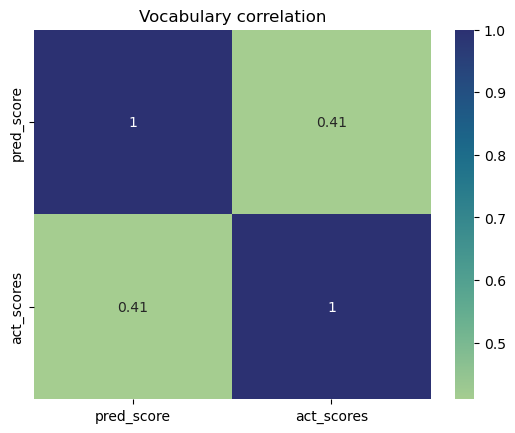

In [13]:
sns.heatmap(corr_df_vocabulary.corr(), annot = True, cmap = "crest").set_title("Vocabulary correlation")

Text(0.5, 1.0, 'Phraseology correlation')

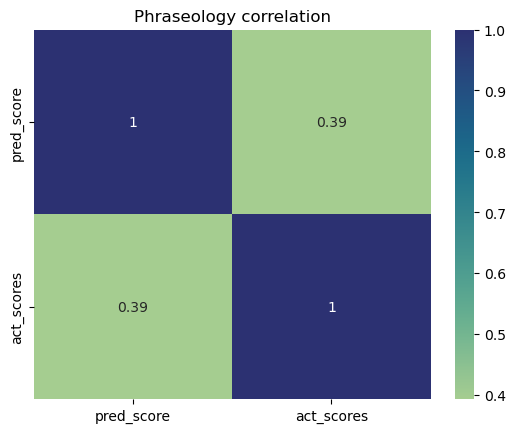

In [14]:
sns.heatmap(corr_df_phraseology.corr(), annot = True, cmap = "crest").set_title("Phraseology correlation")

Text(0.5, 1.0, 'Grammar correlation')

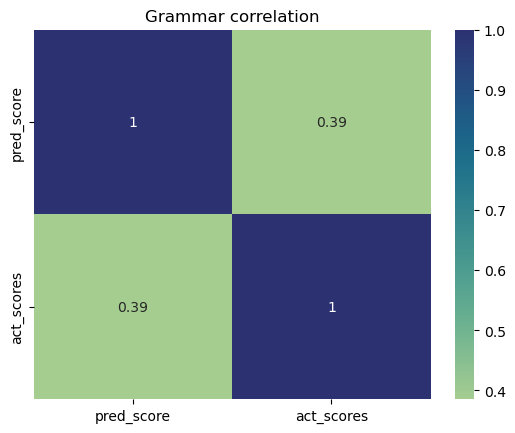

In [15]:
sns.heatmap(corr_df_grammar.corr(), annot = True, cmap = "crest").set_title("Grammar correlation")

Text(0.5, 1.0, 'Conventions correlation')

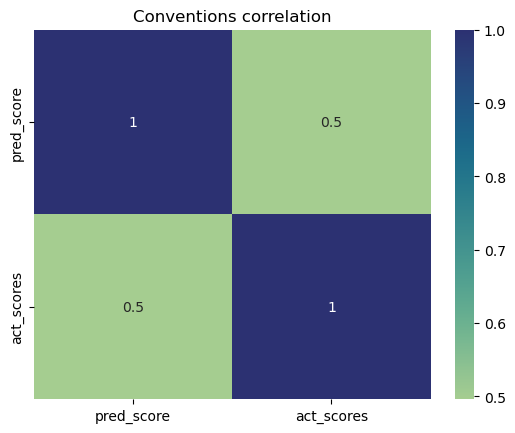

In [16]:
sns.heatmap(corr_df_conventions.corr(), annot = True, cmap = "crest").set_title("Conventions correlation")

In [ ]:
### The model seems to perform best with conventions and does not perform as strongly in phraseology and grammar.

In [ ]:
# For single output
# Pre-padding, no masking : 43.44% loss!
# 0.49 correlation

# Pre-padding, masking: 40.99% loss!
# 0.59 correlation - some reason masking makes the length correlation stronger

In [ ]:
## This time around the correlation changed to 0.65.

In [ ]:
# Compare differences (subtract one from the other) between the two lists
# Compute mean, variance, plot a histogram for the provided actual results and the predicted results. 
# Is ours also normally distributed? (should be!)

# QQPlot
## Central limit theorem - for SKLearn models

## GRU Basic

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import contractions
import nltk
import tqdm
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators
import re
import statsmodels.api as sm
import string
import gensim #nlp
import os

from tensorflow import keras #for deep learning
from tensorflow.keras.utils import to_categorical #vector (int) to binary class matrix.
from keras import backend as K #function wrapper
from tensorflow.keras import backend as backend
from keras.layers import * #for nn
from keras.activations import * #for non linearity
from keras.preprocessing.sequence import pad_sequences #ensures same length for nn
from keras.preprocessing.text import text_to_word_sequence #tokenize text to words
from keras.preprocessing.text import Tokenizer
from nltk import ngrams #generate n-grams from a given sequence of tokens
from nltk.corpus import stopwords #reduce noise and improve the efficiency
from sklearn.model_selection import train_test_split, KFold #iterates through different combinations of train-test splits for model evaluation
from matplotlib import rcParams
from tensorflow.keras.layers import Embedding, GRU

# Tokenizer
nlp = spacy.load('en_core_web_sm') #load a pre-trained English language model in spaCy.

df = pd.read_csv('/content/drive/MyDrive/9417/Data/train.csv')

# figure size in inches
rcParams['figure.figsize'] = 20, 10
TARGET_COLS = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [75]:
def clean_input(df):
  proc_text = [contractions.fix(text) for text in df['full_text']]
  def more_processing(text):
      text = '<sostok> ' + text + ' <eostok>'
      text = text.lower()
      return text

  proc_text_2 = [more_processing(text) for text in proc_text]
  nlp = spacy.load("en_core_web_md", disable=['senter', 'parser', 'ner'])
  print(nlp.pipe_names)

  pipeline = spacy_cleaner.Pipeline(
      nlp,
      removers.remove_stopword_token,
      removers.remove_punctuation_token,
      replacers.replace_number_token,
      mutators.mutate_lemma_token,
  )
  cleaned_text = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
  return cleaned_text

In [76]:
# Load cleaned text
import pickle
with open('/content/drive/MyDrive/9417/proc_text_3.pkl', 'rb') as f:
    proc_text_3 = pickle.load(f)

In [77]:
# Also added start of seq and end of seq, lowercase
df['cleaned_text'] = proc_text_3

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(df['cleaned_text'])
x_vocab_size = len(x_tokenizer.word_index) + 1

In [80]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = '/content/drive/MyDrive/9417/glove.6B.50d.txt' # 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file, encoding='utf-8') as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix


#x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

In [81]:
embedding_dim = 50

x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10171 words (7296 misses)


In [82]:
MAXLEN = int(df['cleaned_text'].str.len().max())
MAXLEN_W = int(df['cleaned_text'].str.split().str.len().max())
print("Max. letters length: ", MAXLEN)
print("Max. words length: ", MAXLEN_W)
VECTOR_SIZE = 100
max_text_len = 500

Max. letters length:  3361
Max. words length:  487


In [83]:
#root mean squared error
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)

In [84]:
#https://www.tensorflow.org/text/tutorials/text_classification_rnn
#Implement a GRU block as a Keras layer and use it for text classification.

class GRU_1_Basic_Model():
    def build():
        embed_units = 50  # Embedding size for each token
        inputs = Input(shape=(max_text_len,))
        embedding_layer = Embedding(input_dim = x_vocab_size,
                                    output_dim = embed_units,
                                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                                    input_length=max_text_len, trainable = False, mask_zero = True)(inputs)

        gru_layer = GRU(128, return_sequences=True)(embedding_layer)
        gru_layer2 = GRU(128, return_sequences=False)(gru_layer)

        fc1 = Dense(512, activation="relu")(gru_layer2)
        drop_1 = Dropout(0.2)(fc1)
        outputs = Dense(6, activation='linear')(drop_1)

        model = keras.Model(inputs=inputs, outputs=outputs)
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=mean_columnwise_root_mean_squared_error)
        return model

def get_model():
    model = GRU_1_Basic_Model.build()
    return model

In [85]:
with open('/content/drive/MyDrive/9417/Models/gru_1_basic.json', 'w') as f:
    f.write(get_model().to_json())
backend.clear_session()
get_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 50)           873400    
                                                                 
 gru (GRU)                   (None, 500, 128)          69120     
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078  

In [86]:
def get_training_data(df, x_tokenizer, mode='fit'):
    X = []
    y = []

    x_sequence = x_tokenizer.texts_to_sequences(df['cleaned_text'])
    X = pad_sequences(x_sequence, maxlen=max_text_len, padding='pre')

    if mode == 'fit':
        for index, row in df.iterrows():
            labels = [row['cohesion'], row['syntax'], row['vocabulary'], row['phraseology'], row['grammar'], row['conventions']]
            y.append(labels)

    if mode == 'fit':
        return np.array(X), np.array(y)
    else:
        return np.array(X)


In [87]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
X, y = get_training_data(df, x_tokenizer)
print(f'Train X shape: {X.shape}')
print(f'Train y shape: {y.shape}')

Train X shape: (3911, 500)
Train y shape: (3911, 6)


In [89]:
def plot_results(history):
    x = np.arange(0, len(history.history["loss"]))

    sns.lineplot(x=x, y=history.history["loss"], label='Training Loss')
    sns.lineplot(x=x, y=history.history["val_loss"], label='Validation Loss')
    plt.legend()

    plt.show()

Epoch 1/25
25/25 [==============================] - ETA: 0s - loss: 1.3138

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



25/25 [==============================] - 130s 5s/step - loss: 1.3138 - val_loss: 0.6476 - lr: 0.0010
Epoch 2/25
25/25 [==============================] - 102s 4s/step - loss: 0.6594 - val_loss: 0.5931 - lr: 0.0010
Epoch 3/25
25/25 [==============================] - 100s 4s/step - loss: 0.6289 - val_loss: 0.5760 - lr: 0.0010
Epoch 4/25
25/25 [==============================] - 100s 4s/step - loss: 0.6120 - val_loss: 0.5716 - lr: 0.0010
Epoch 5/25
25/25 [==============================] - 105s 4s/step - loss: 0.5999 - val_loss: 0.5659 - lr: 0.0010
Epoch 6/25
25/25 [==============================] - 104s 4s/step - loss: 0.5931 - val_loss: 0.5700 - lr: 0.0010
Epoch 7/25
25/25 [==============================] - 100s 4s/step - loss: 0.5868 - val_loss: 0.5601 - lr: 0.0010
Epoch 8/25
25/25 [==============================] - 103s 4s/step - loss: 0.5750 - val_loss: 0.5567 - lr: 0.0010
Epoch 9/25
25/25 [==============================] -

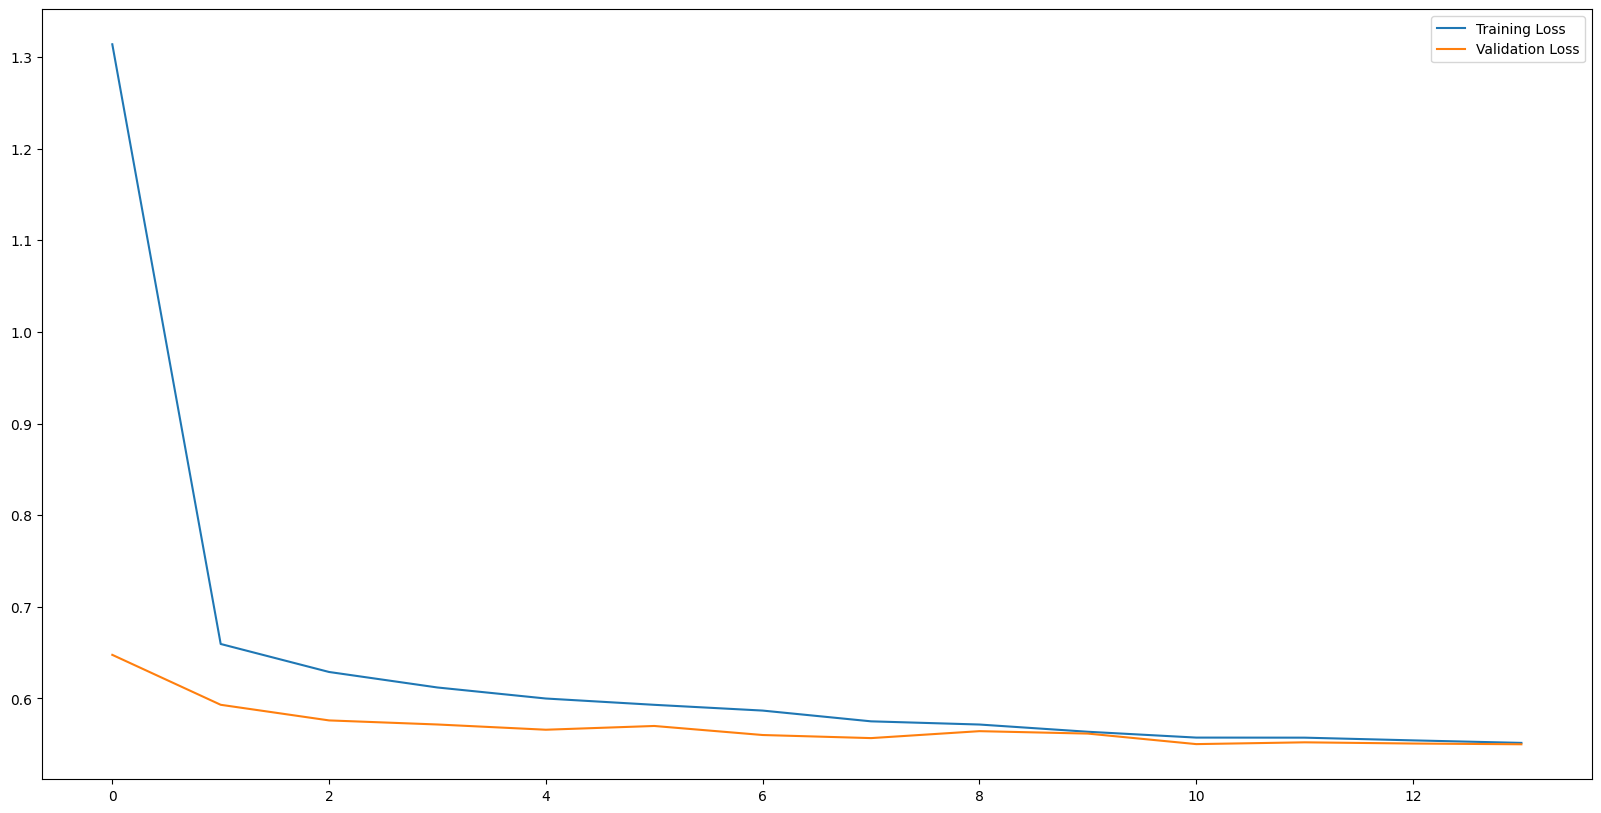

Validation Error: 0.5499946475028992


In [90]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2, random_state = 0, shuffle = True)

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, verbose=1, min_delta=0.001, mode="min", restore_best_weights=True)
cp = tf.keras.callbacks.ModelCheckpoint(r'/content/drive/MyDrive/9417/Models/gru_1_basic.h5', save_best_only=True, monitor='val_loss', mode='min')
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=0, min_lr=0.0001, absmode='min')

model = get_model()
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=25,
                    batch_size=128,
                    callbacks=[es, cp, rlr])

test_scores = model.predict(X_val)
results = pd.DataFrame(data = list(zip(test_scores, y_val,(test_scores-y_val))), columns = ['Pred_scores', 'Actual', 'error'])
error_l = min(history.history['val_loss'])

plot_results(history)
print(f'Validation Error: {error_l}')
results.to_csv("/content/drive/MyDrive/9417/gru_1_basic.csv")
results.to_pickle("/content/drive/MyDrive/9417/gru_1_basic.pkl")

In [91]:
pred_lst = results.Pred_scores
actual_lst = results.Actual

In [92]:
# flat is faster than item
cohesion_pred_lst = [x[0] for x in pred_lst]
cohesion_act_lst = [x[0] for x in actual_lst]

print("Pred cohesion:", cohesion_pred_lst[:5])
print("Actual cohesion:", cohesion_act_lst[:5])

syntax_pred_lst = [x[1] for x in pred_lst]
syntax_act_lst = [x[1] for x in actual_lst]

print("\nPred syntax:", syntax_pred_lst[:5])
print("Actual sytnax:", syntax_act_lst [:5])

vocabulary_pred_lst = [x[2] for x in pred_lst]
vocabulary_act_lst = [x[2] for x in actual_lst]

print("\nPred vocab:", vocabulary_pred_lst[:5])
print("Actual vocab:", vocabulary_act_lst[:5])

phraseology_pred_lst = [x[3] for x in pred_lst]
phraseology_act_lst = [x[3] for x in actual_lst]

print("\nPred phraseology:", phraseology_pred_lst[:5])
print("Actual phraseology:", phraseology_act_lst[:5])

grammar_pred_lst = [x[4] for x in pred_lst]
grammar_act_lst = [x[4] for x in actual_lst]

print("\nPred grammar:", grammar_pred_lst[:5])
print("Actual grammar:", grammar_act_lst[:5])

conventions_pred_lst = [x[5] for x in pred_lst]
conventions_act_lst = [x[5] for x in actual_lst]

print("\nPred conventions:", conventions_pred_lst[:5])
print("Actual conventions:", conventions_act_lst[:5])

Pred cohesion: [2.9194992, 3.239696, 3.3027422, 2.7044237, 3.7078636]
Actual cohesion: [4.0, 3.0, 4.0, 2.5, 3.0]

Pred syntax: [2.7261424, 3.13276, 3.1503832, 2.6273692, 3.503562]
Actual sytnax: [3.5, 3.5, 4.0, 3.0, 3.0]

Pred vocab: [2.890519, 3.3097856, 3.3896909, 2.8017447, 3.7387567]
Actual vocab: [3.5, 3.5, 4.0, 3.5, 4.0]

Pred phraseology: [2.7644866, 3.2202277, 3.2665195, 2.7111754, 3.5854464]
Actual phraseology: [3.5, 3.5, 3.5, 3.5, 3.0]

Pred grammar: [2.6044214, 3.1791284, 3.0582283, 2.657397, 3.4317408]
Actual grammar: [3.0, 3.5, 4.5, 3.5, 4.0]

Pred conventions: [2.7068503, 3.1819031, 3.2497354, 2.7399936, 3.6193507]
Actual conventions: [3.5, 3.0, 4.5, 3.0, 4.0]


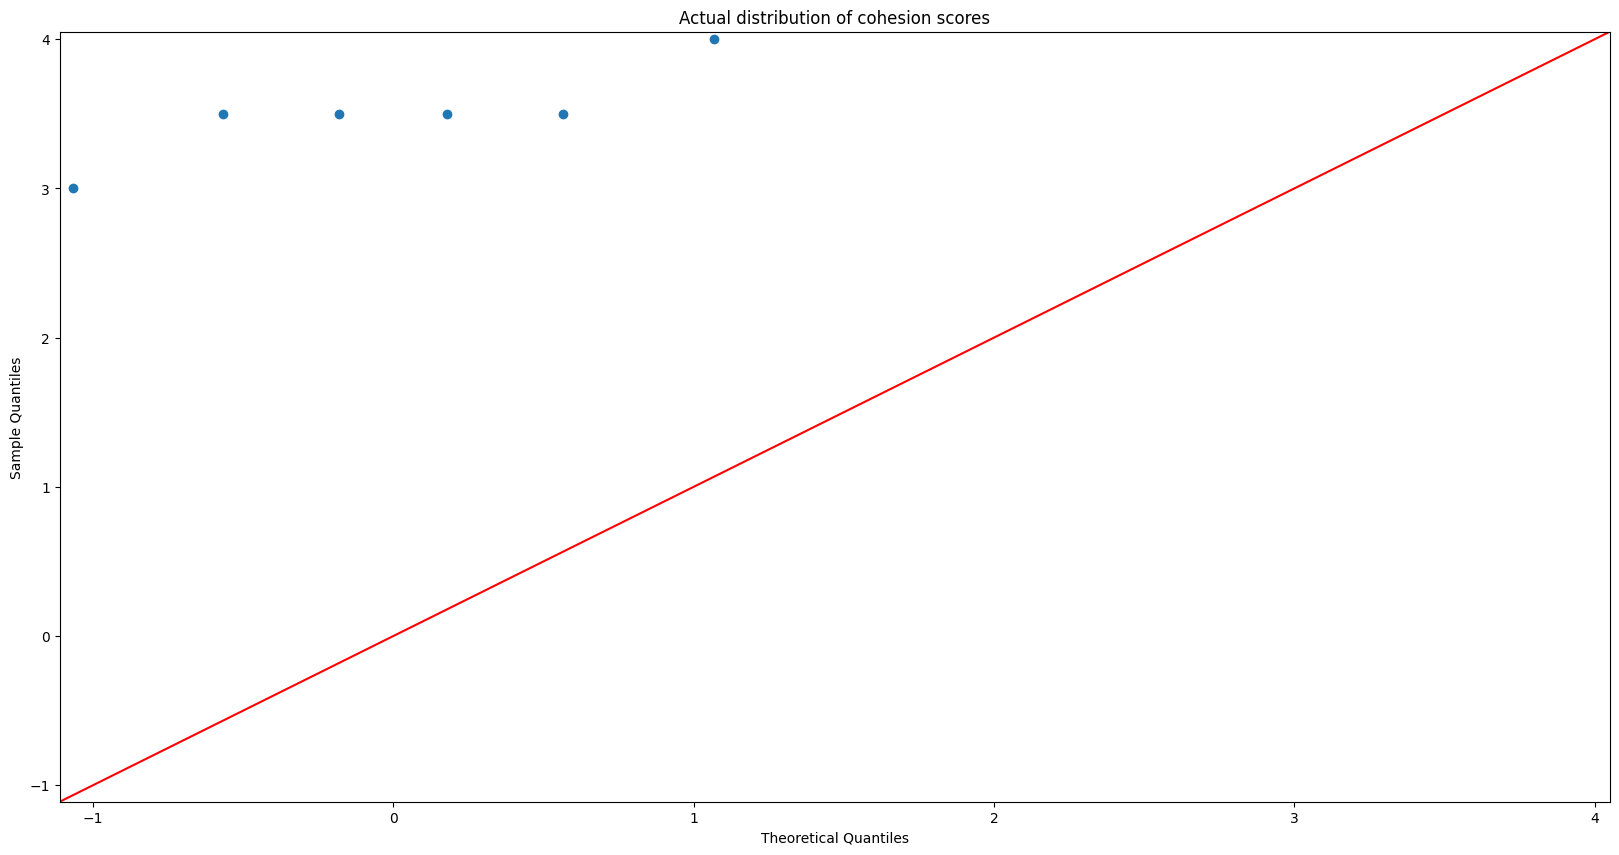

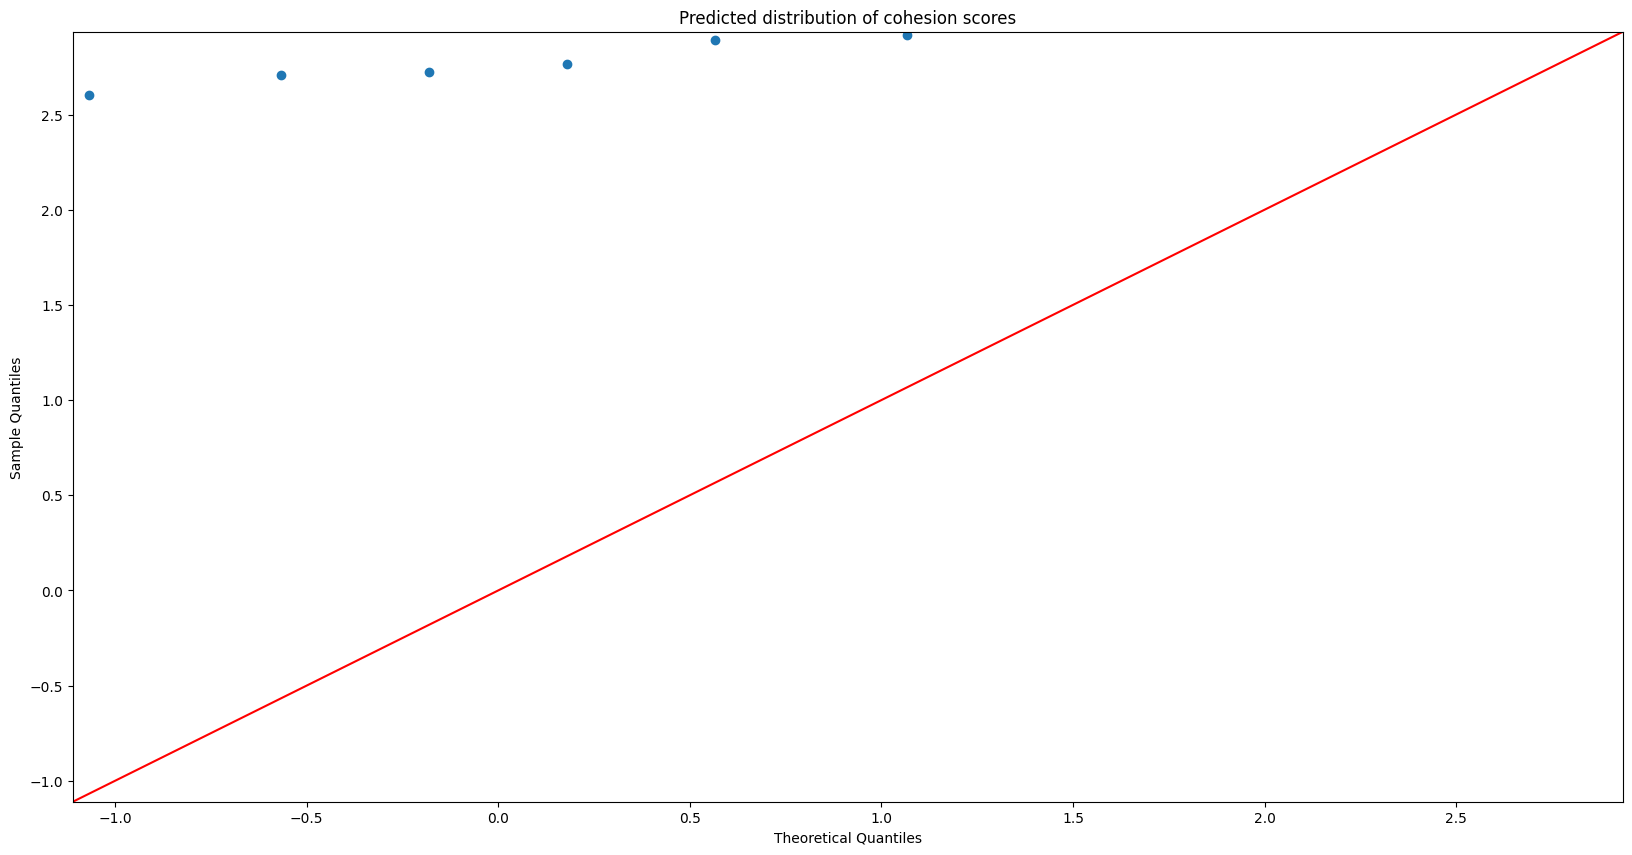

In [93]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(data = results['Actual'][0], line ='45')
py.title("Actual distribution of cohesion scores")
sm.qqplot(data = results['Pred_scores'][0], line ='45')
py.title("Predicted distribution of cohesion scores")
py.show()

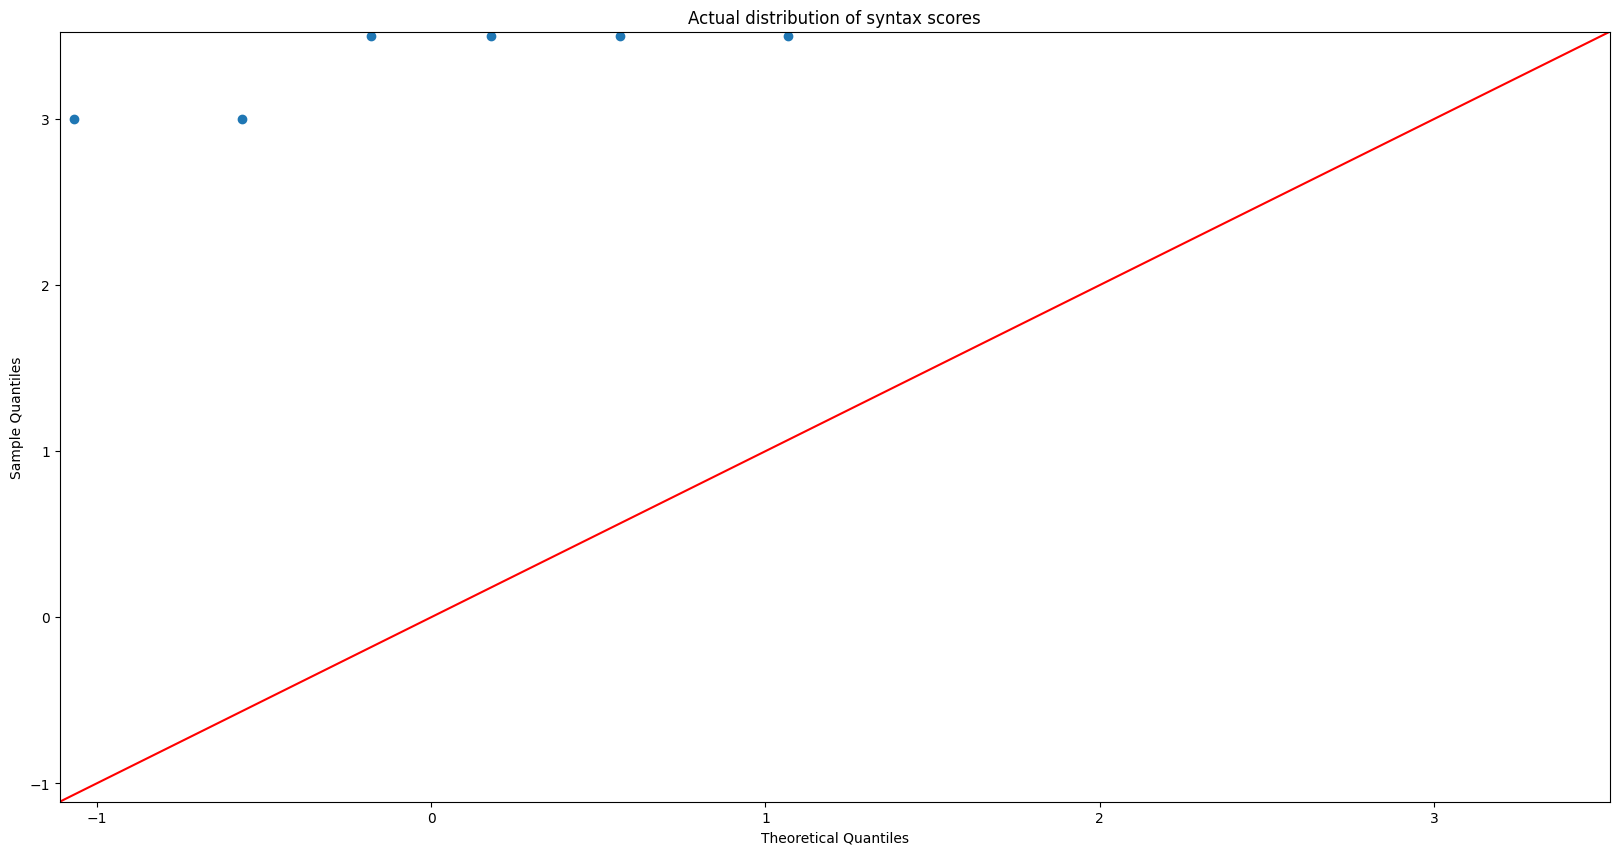

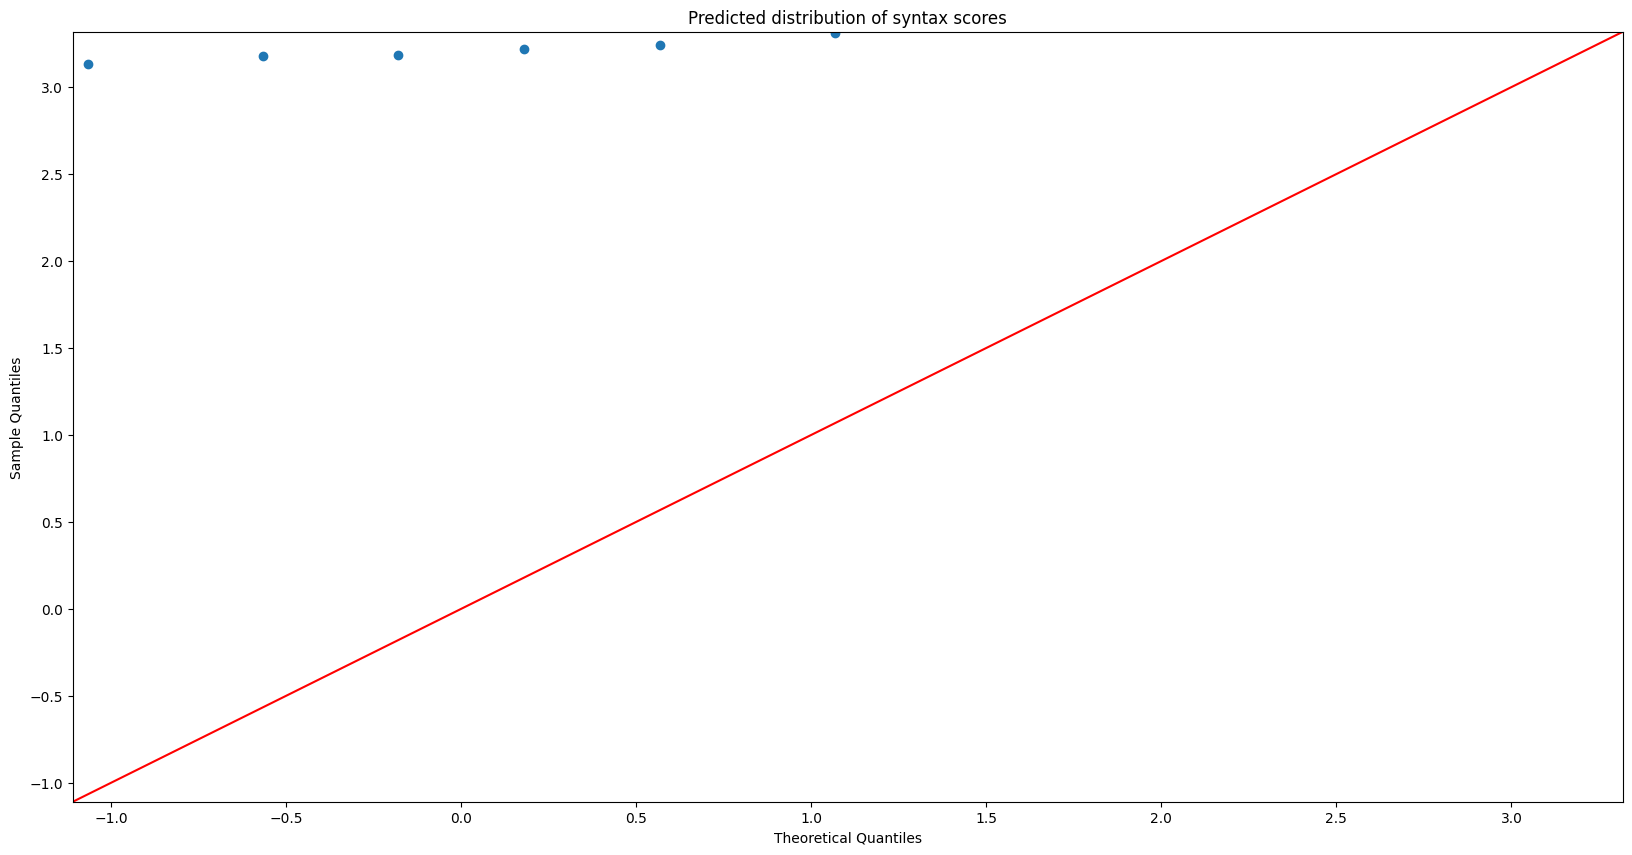

In [94]:
sm.qqplot(data = results['Actual'][1], line ='45')
py.title("Actual distribution of syntax scores")
sm.qqplot(data = results['Pred_scores'][1], line ='45')
py.title("Predicted distribution of syntax scores")
py.show()

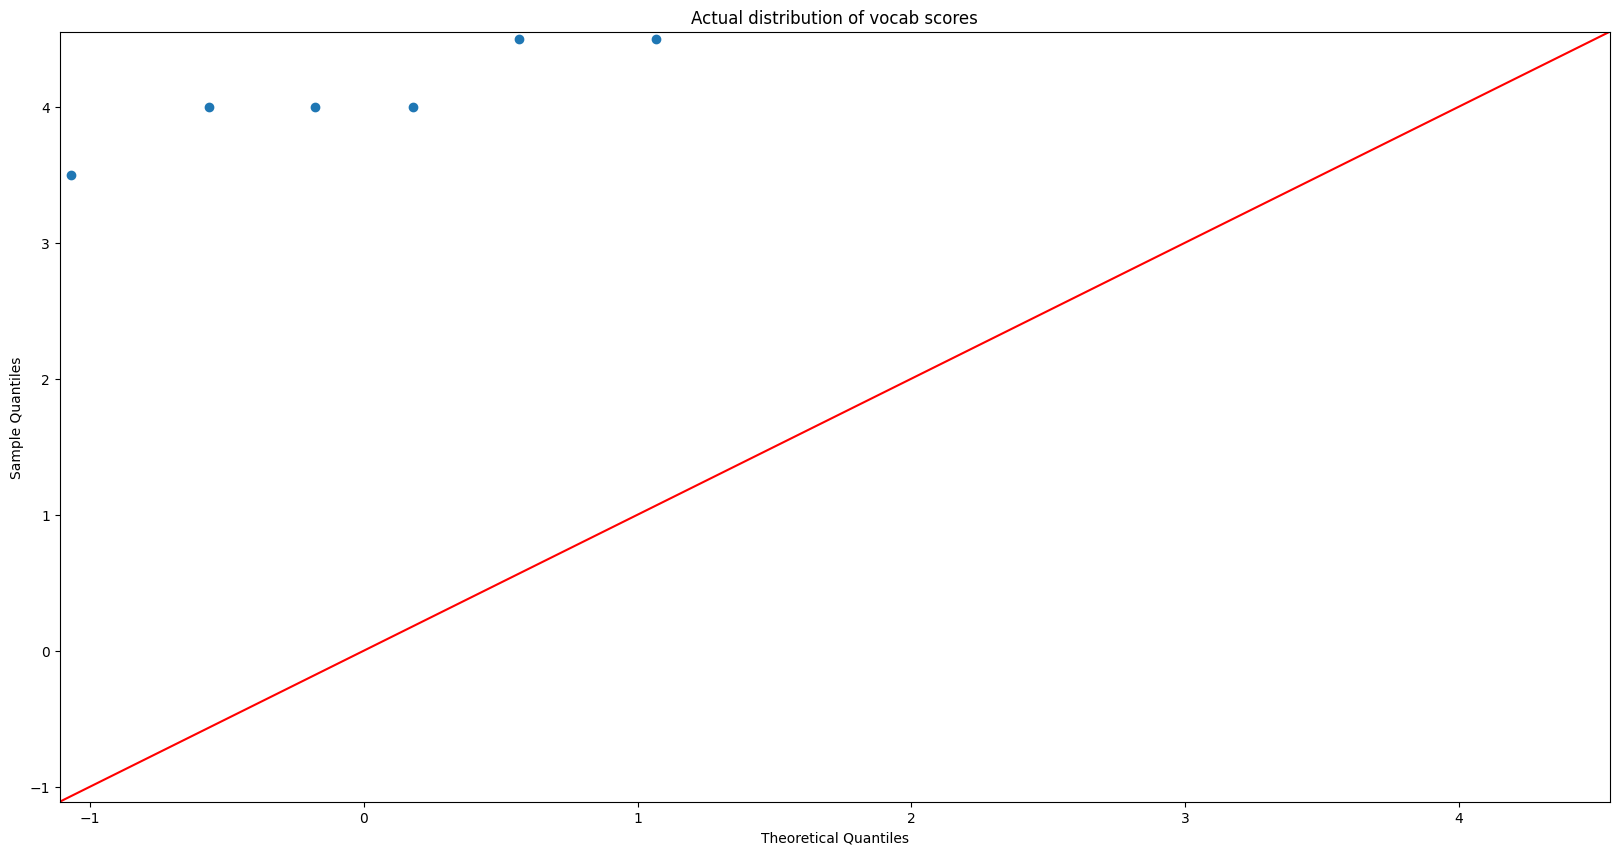

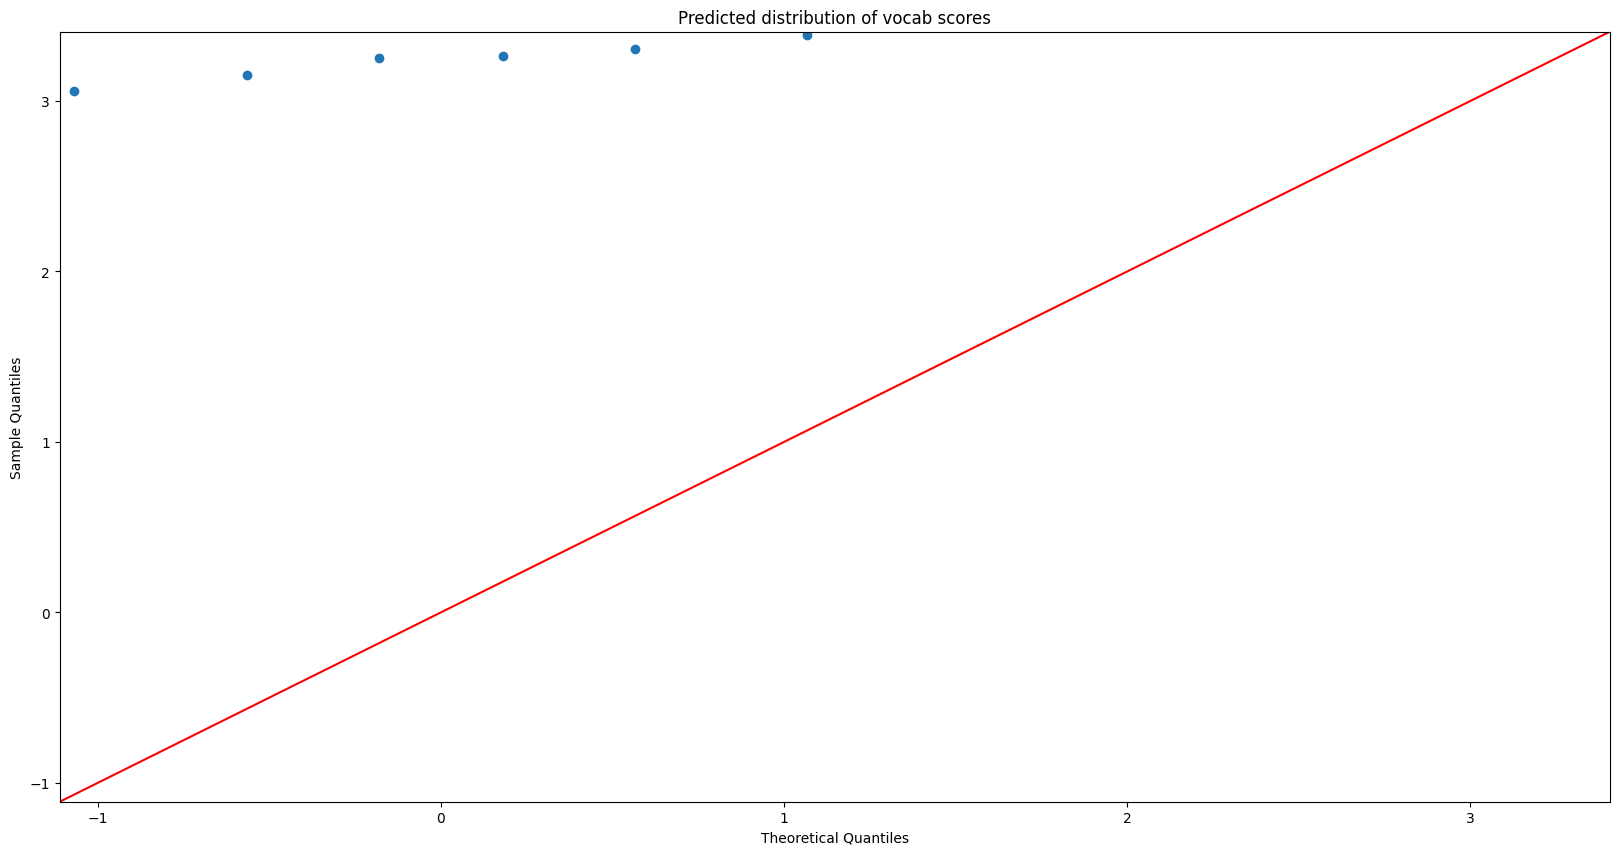

In [95]:
sm.qqplot(data = results['Actual'][2], line ='45')
py.title("Actual distribution of vocab scores")
sm.qqplot(data = results['Pred_scores'][2], line ='45')
py.title("Predicted distribution of vocab scores")
py.show()

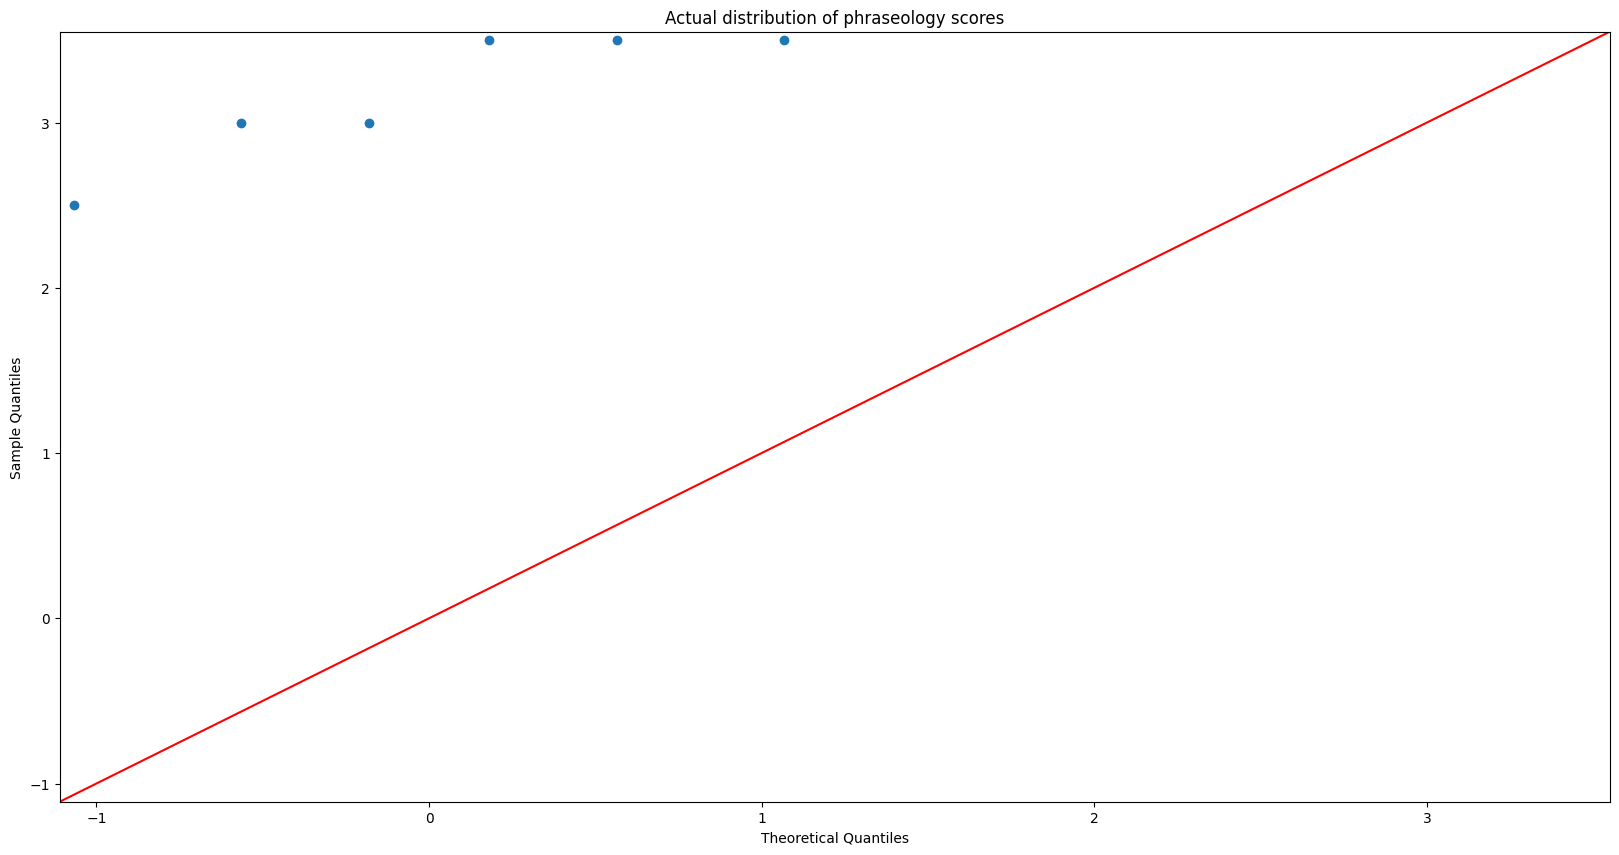

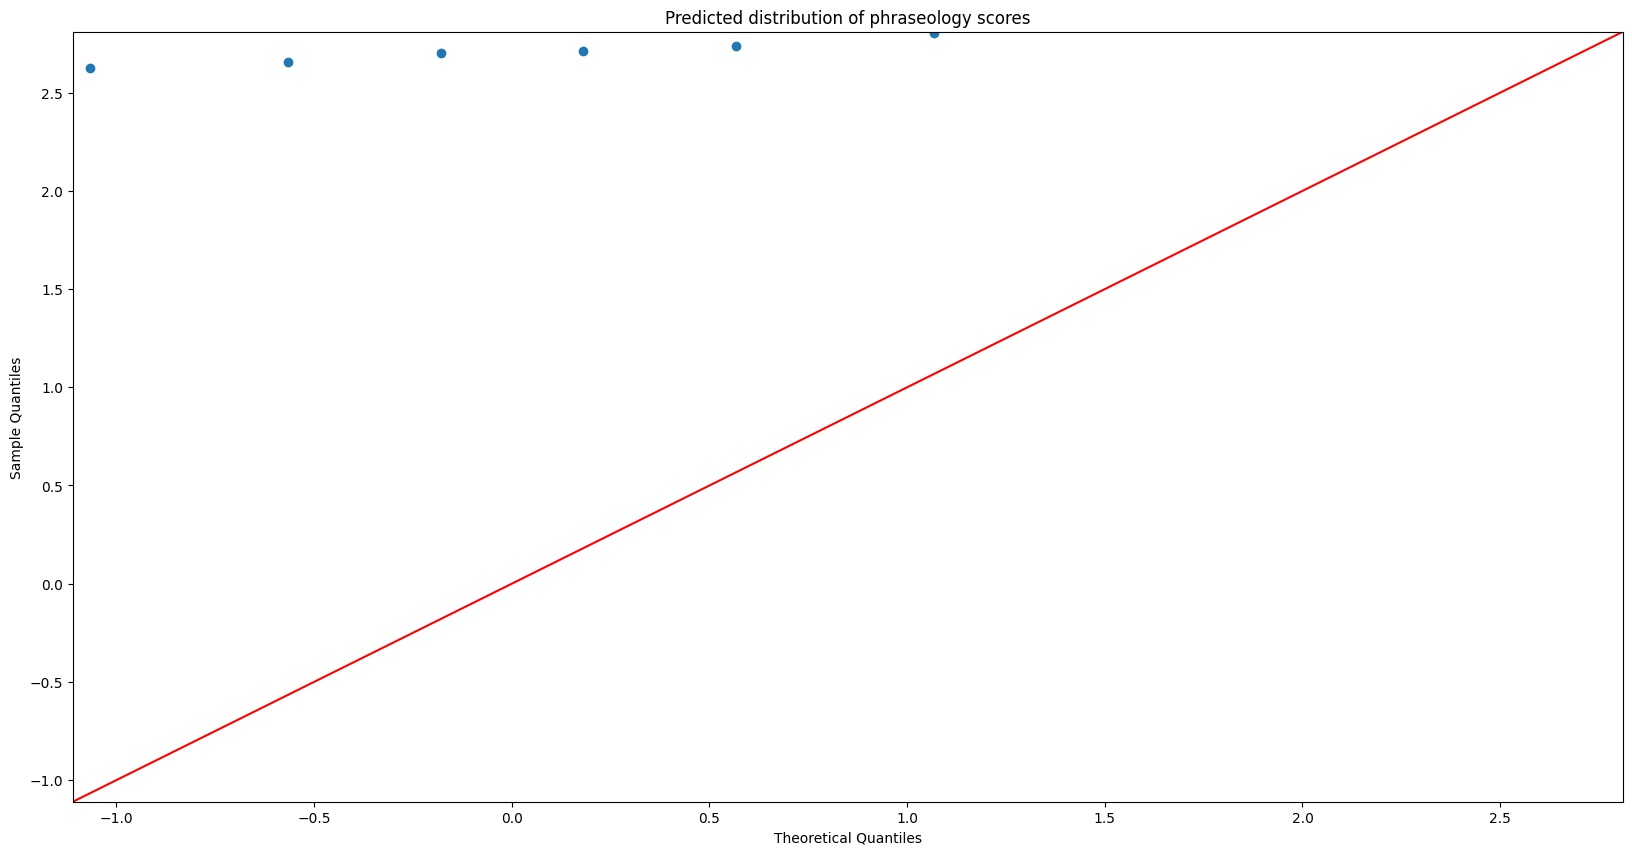

In [96]:
sm.qqplot(data = results['Actual'][3], line ='45')
py.title("Actual distribution of phraseology scores")
sm.qqplot(data = results['Pred_scores'][3], line ='45')
py.title("Predicted distribution of phraseology scores")
py.show()

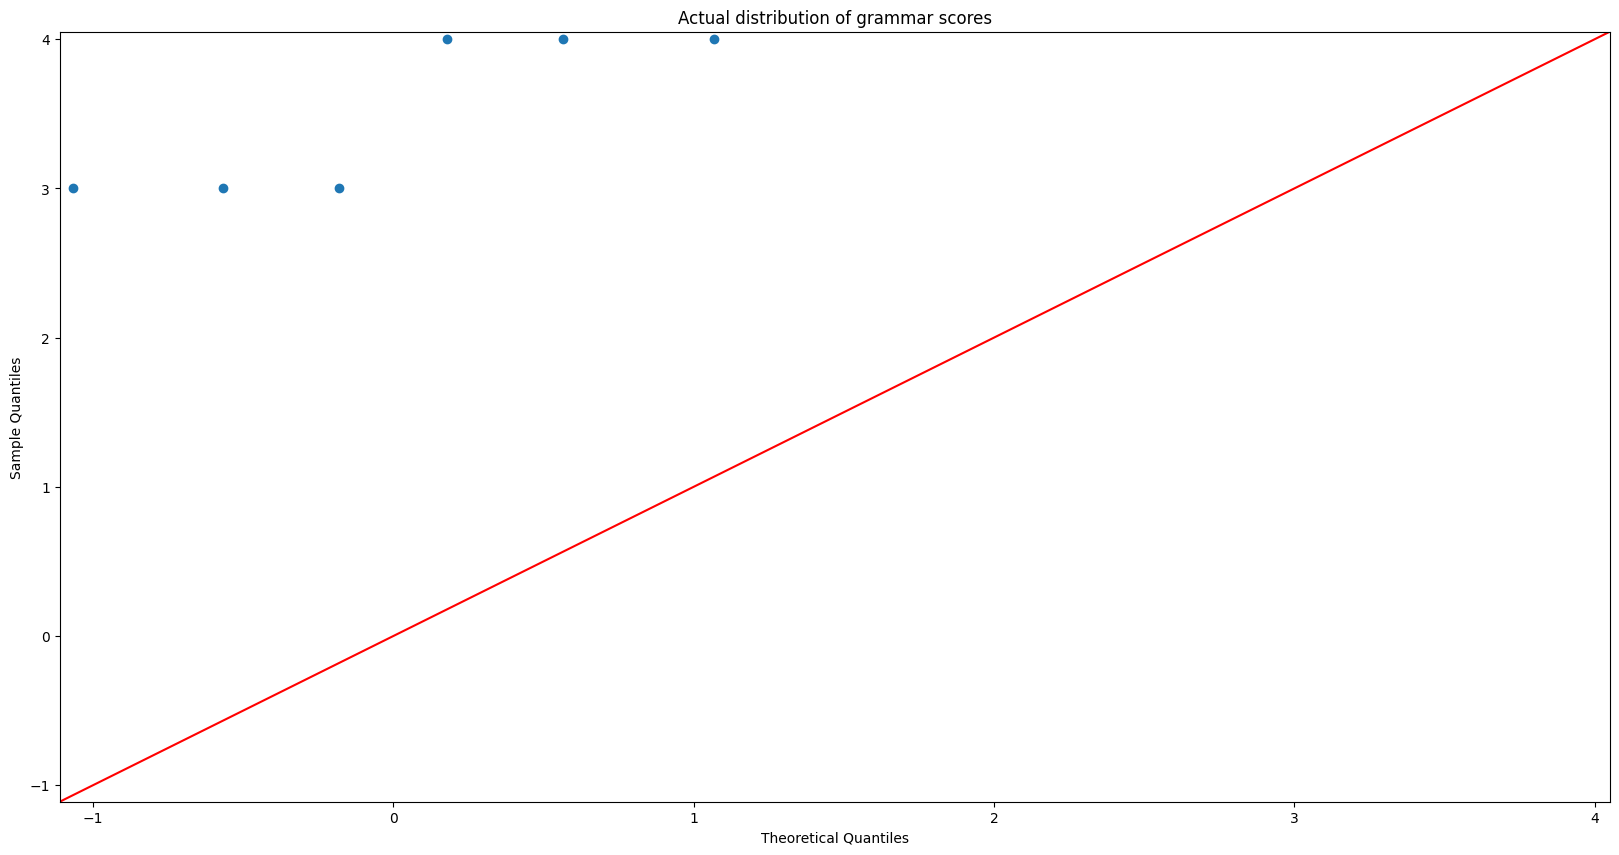

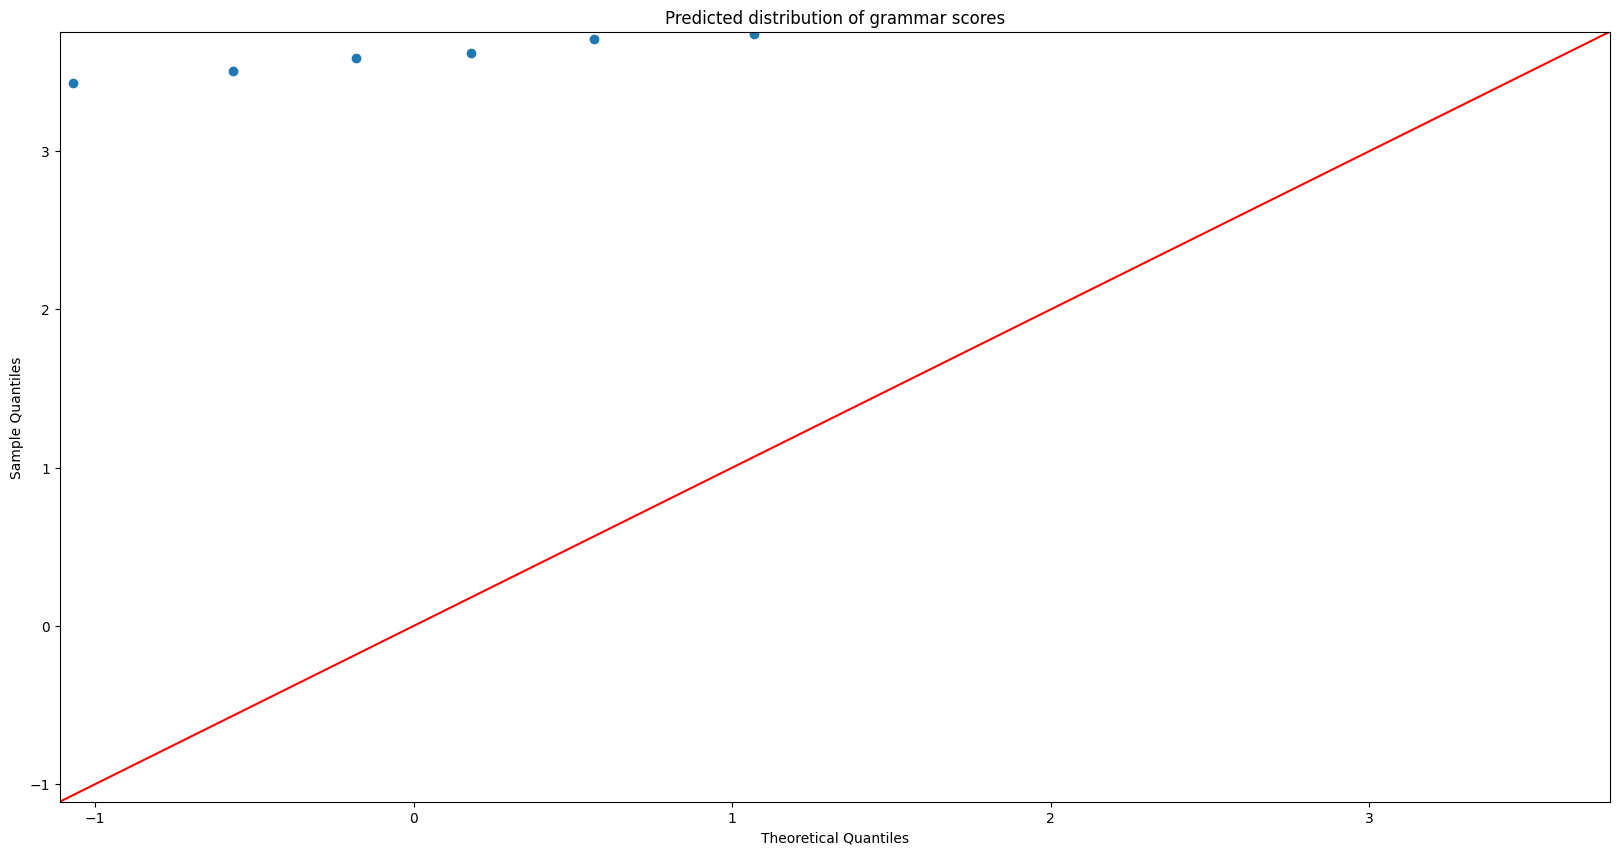

In [97]:
sm.qqplot(data = results['Actual'][4], line ='45')
py.title("Actual distribution of grammar scores")
sm.qqplot(data = results['Pred_scores'][4], line ='45')
py.title("Predicted distribution of grammar scores")
py.show()

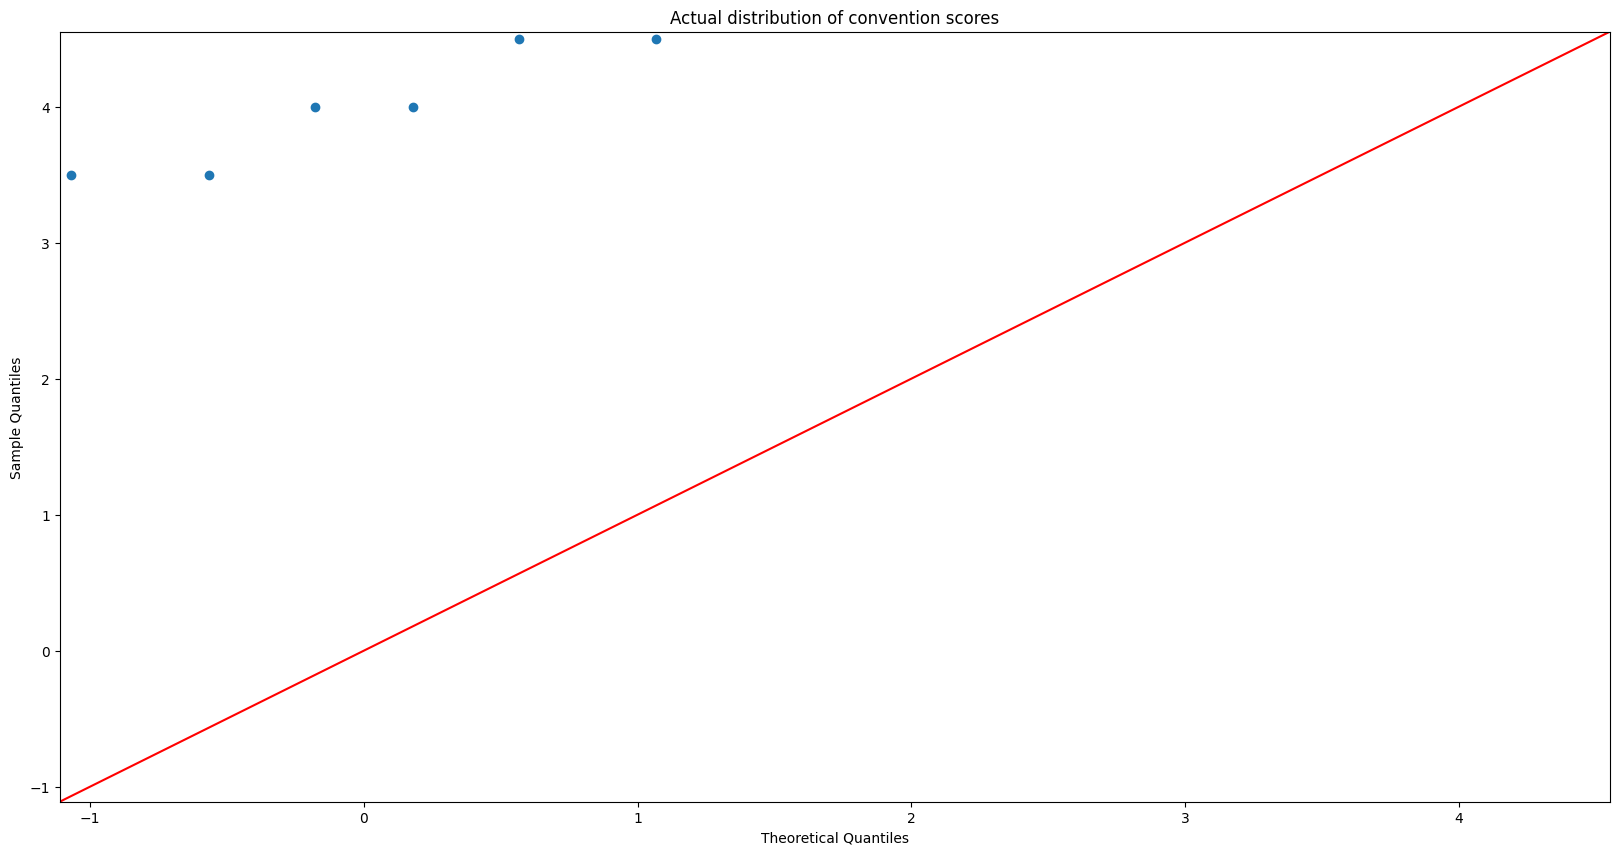

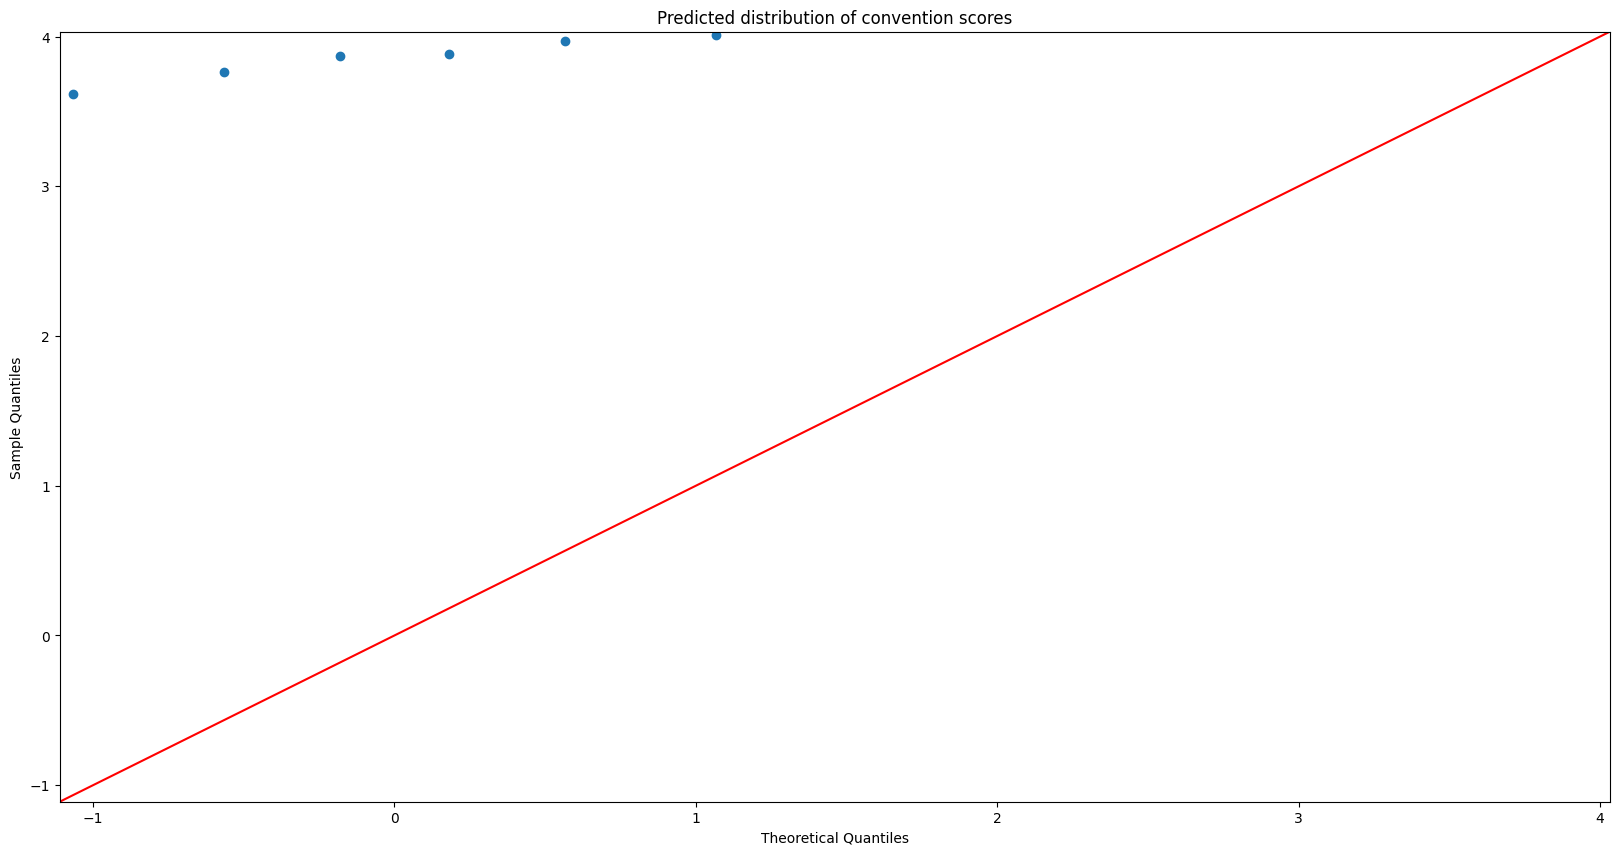

In [98]:
sm.qqplot(data = results['Actual'][5], line ='45')
py.title("Actual distribution of convention scores")
sm.qqplot(data = results['Pred_scores'][5], line ='45')
py.title("Predicted distribution of convention scores")
py.show()

In [99]:
iterations = X_val.shape[0]
iterations

783

In [100]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(X_val[num]))
#nonzero_count

In [101]:
proof_df = results
proof_df['nonzero'] = nonzero_count

In [102]:
import seaborn as sns
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])
test_scores[1].shape

[array([2.9194992, 2.7261424, 2.890519 , 2.7644866, 2.6044214, 2.7068503],
       dtype=float32)
 array([3.239696 , 3.13276  , 3.3097856, 3.2202277, 3.1791284, 3.1819031],
       dtype=float32)
 array([3.3027422, 3.1503832, 3.3896909, 3.2665195, 3.0582283, 3.2497354],
       dtype=float32)
 array([2.7044237, 2.6273692, 2.8017447, 2.7111754, 2.657397 , 2.7399936],
       dtype=float32)
 array([3.7078636, 3.503562 , 3.7387567, 3.5854464, 3.4317408, 3.6193507],
       dtype=float32)                                                     ]


(6,)

In [103]:
results['nonzero'] = nonzero_count

In [104]:
pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

[2.7686532, 3.2105837, 3.2362165, 2.7070172, 3.5977867]

In [105]:
corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

<Axes: >

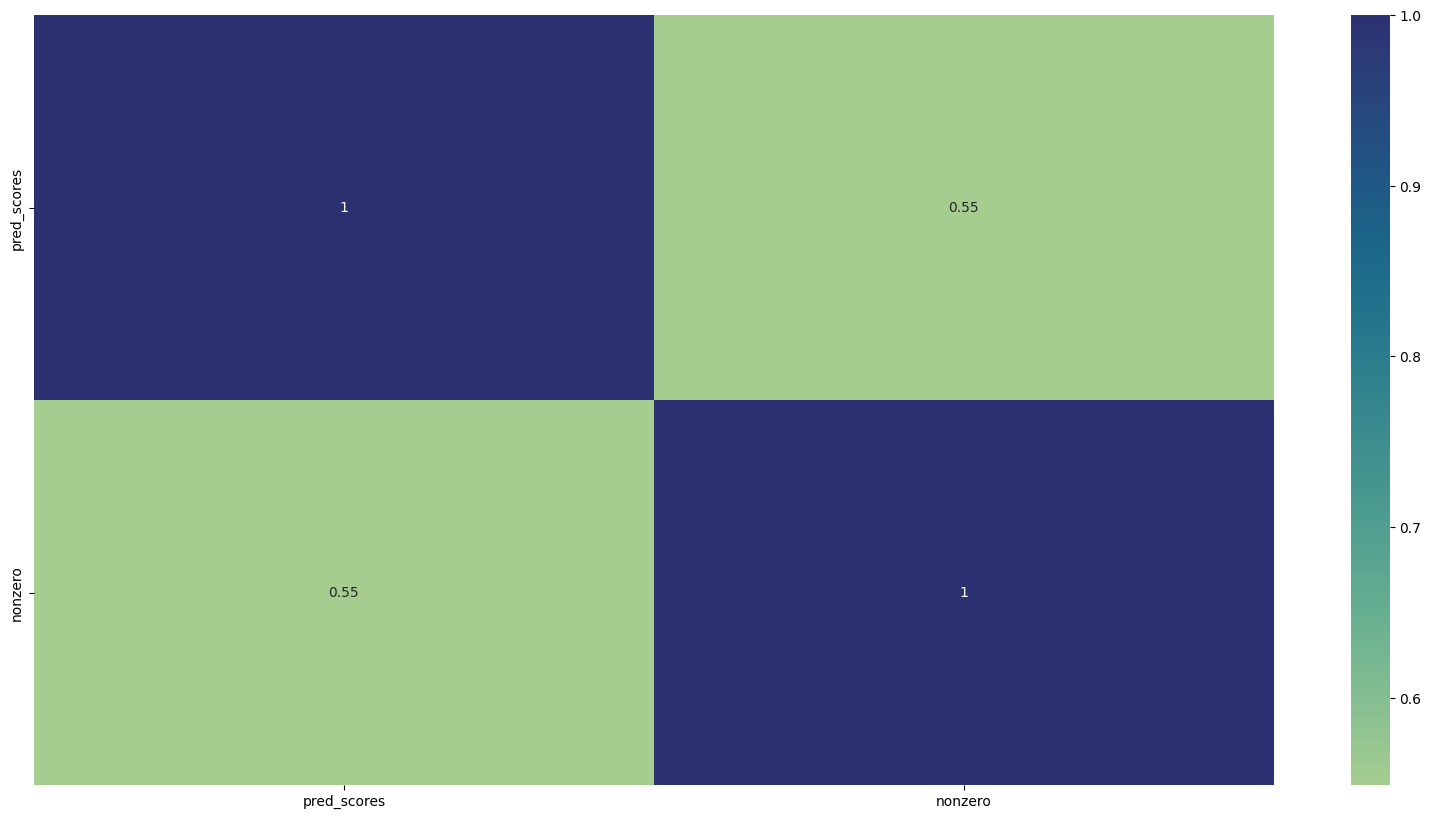

In [106]:
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

<Axes: >

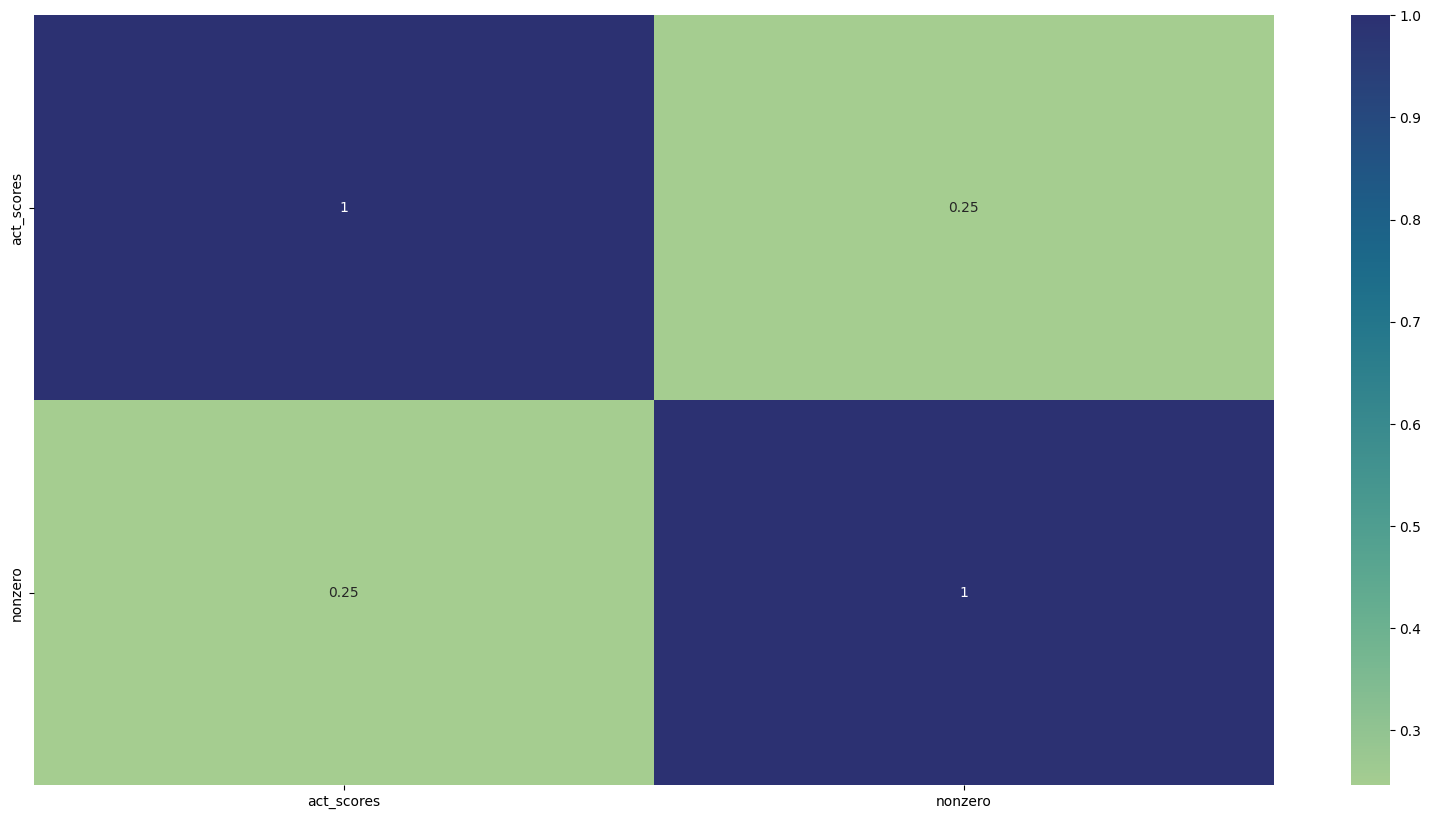

In [107]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

array([[<Axes: title={'center': 'act_scores'}>]], dtype=object)

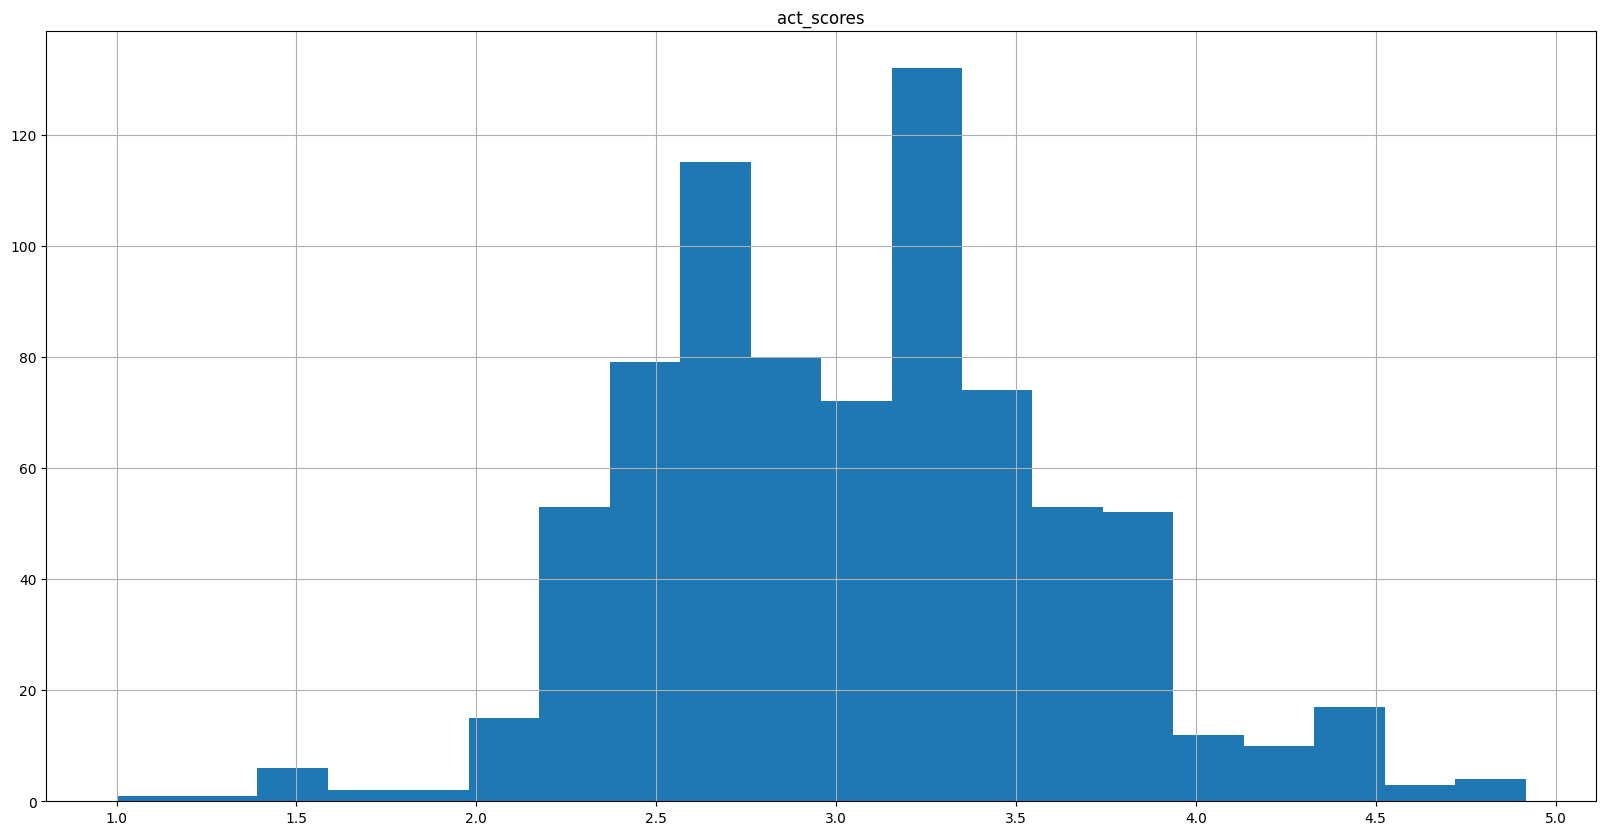

In [108]:
act_corr_df.hist(column = 'act_scores', bins = 20)

array([[<Axes: title={'center': 'pred_scores'}>]], dtype=object)

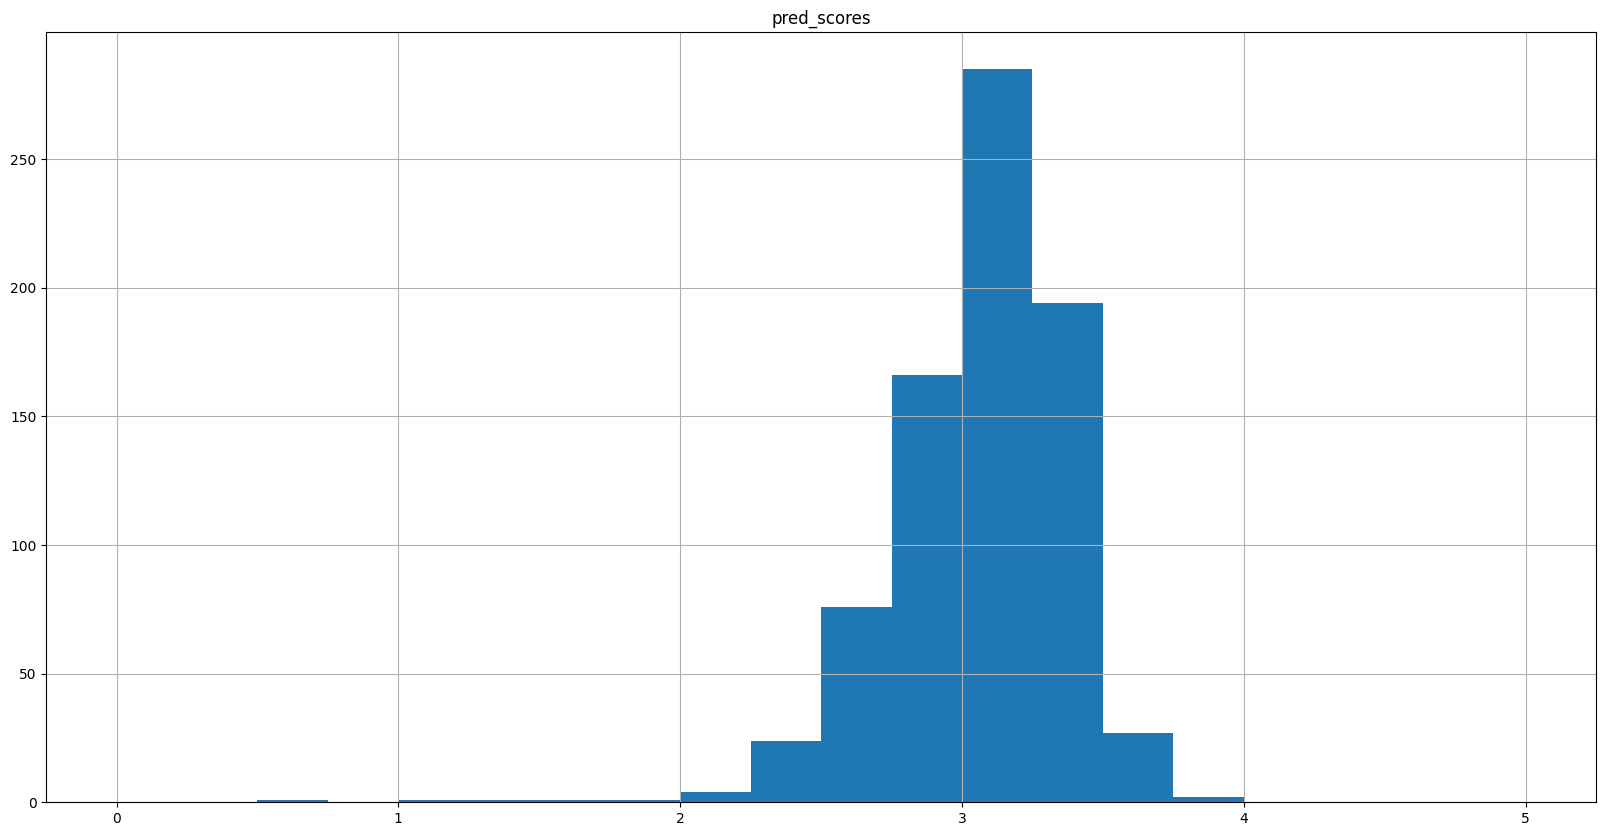

In [109]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [0, 5.0])

In [110]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.1085567
Actual median :  3.0


In [111]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.0077967388
Actual mean variance :  0.11895132680573293


## Submission

In [113]:
from tensorflow.keras.preprocessing.text import Tokenizer
sub = pd.read_csv('/content/drive/MyDrive/9417/Data/sample_submission.csv')
xtest_tokenizer = Tokenizer()
df_test = pd.read_csv('/content/drive/MyDrive/9417/Data/test.csv')
xtest = clean_input(df_test)
df_test['cleaned_text'] = xtest
xtest_tokenizer.fit_on_texts(df_test['cleaned_text'])

X_test = get_training_data(df_test, xtest_tokenizer, None)

from keras.models import model_from_json
with open('/content/drive/MyDrive/9417/Models/gru_1_basic.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('/content/drive/MyDrive/9417/Models/gru_1_basic.h5')

pred = model.predict(X_test)

for index, row in df_test.iterrows():
    sub_index = sub[sub['text_id']==row['text_id']].index
    sub.iloc[sub_index, 1] = pred[sub_index,0]
    sub.iloc[sub_index, 2] = pred[sub_index,1]
    sub.iloc[sub_index, 3] = pred[sub_index,2]
    sub.iloc[sub_index, 4] = pred[sub_index,3]
    sub.iloc[sub_index, 5] = pred[sub_index,4]
    sub.iloc[sub_index, 6] = pred[sub_index,5]

sub['text_id'] = sub['text_id']
sub.to_csv('/content/drive/MyDrive/9417/Data/gru_1_basic_submission.csv', index=False)

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


Cleaning Progress: 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]


1/1 [==============================] - 4s 4s/step


## GRU Attention

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import contractions
import nltk
import tqdm
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators
import re
import statsmodels.api as sm
import string
import gensim #nlp
import os

from tensorflow import keras #for deep learning
from tensorflow.keras.utils import to_categorical #vector (int) to binary class matrix.
from keras import backend as K #function wrapper
from tensorflow.keras import backend as backend
from keras.layers import * #for nn
from keras.activations import * #for non linearity
from keras.preprocessing.sequence import pad_sequences #ensures same length for nn
from keras.preprocessing.text import text_to_word_sequence #tokenize text to words
from keras.preprocessing.text import Tokenizer
from nltk import ngrams #generate n-grams from a given sequence of tokens
from nltk.corpus import stopwords #reduce noise and improve the efficiency
from sklearn.model_selection import train_test_split, KFold #iterates through different combinations of train-test splits for model evaluation
from matplotlib import rcParams
from tensorflow.keras.layers import Embedding, GRU

# Tokenizer
nlp = spacy.load('en_core_web_sm') #load a pre-trained English language model in spaCy.

df = pd.read_csv('/content/drive/MyDrive/9417/Data/train.csv')

# figure size in inches
rcParams['figure.figsize'] = 20, 10
TARGET_COLS = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [6]:
def clean_input(df):
  proc_text = [contractions.fix(text) for text in df['full_text']]
  def more_processing(text):
      text = '<sostok> ' + text + ' <eostok>'
      text = text.lower()
      return text

  proc_text_2 = [more_processing(text) for text in proc_text]
  nlp = spacy.load("en_core_web_md", disable=['senter', 'parser', 'ner'])
  print(nlp.pipe_names)

  pipeline = spacy_cleaner.Pipeline(
      nlp,
      removers.remove_stopword_token,
      removers.remove_punctuation_token,
      replacers.replace_number_token,
      mutators.mutate_lemma_token,
  )
  cleaned_text = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
  return cleaned_text

In [7]:
# Load cleaned text
import pickle
with open('/content/drive/MyDrive/9417/proc_text_3.pkl', 'rb') as f:
    proc_text_3 = pickle.load(f)

In [8]:
# Also added start of seq and end of seq, lowercase
df['cleaned_text'] = proc_text_3

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(df['cleaned_text'])
x_vocab_size = len(x_tokenizer.word_index) + 1

In [11]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = '/content/drive/MyDrive/9417/glove.6B.50d.txt' # 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file, encoding='utf-8') as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix


#x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

In [12]:
embedding_dim = 50

x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10171 words (7296 misses)


In [13]:
MAXLEN = int(df['cleaned_text'].str.len().max())
MAXLEN_W = int(df['cleaned_text'].str.split().str.len().max())
print("Max. letters length: ", MAXLEN)
print("Max. words length: ", MAXLEN_W)
VECTOR_SIZE = 100
max_text_len = 500

Max. letters length:  3361
Max. words length:  487


In [14]:
#root mean squared error
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)

In [15]:
#https://www.tensorflow.org/text/tutorials/text_classification_rnn
#Implement a GRU block as a Keras layer and use it for text classification.

class GRU_2_Attention_Model():
    def build():
        embed_units = 50  # Embedding size for each token
        inputs = Input(shape=(max_text_len,))
        embedding_layer = Embedding(input_dim = x_vocab_size,
                                    output_dim = embed_units,
                                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                                    input_length=max_text_len, trainable = False, mask_zero = True)(inputs)

        gru_layer = GRU(128, return_sequences=True)(embedding_layer)

        attention_weights = dot([gru_layer, gru_layer], axes=[2, 2])
        attention_weights = Dense(units=max_text_len, activation='relu')(attention_weights)
        context_vector = dot([attention_weights, gru_layer], axes=[2, 1])
        attention_output = GRU(units=128)(context_vector)

        fc1 = Dense(512, activation="relu")(attention_output)
        drop_1 = Dropout(0.2)(fc1)
        outputs = Dense(6, activation='linear')(drop_1)

        model = keras.Model(inputs=inputs, outputs=outputs)
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=mean_columnwise_root_mean_squared_error)
        return model

def get_model():
    model = GRU_2_Attention_Model.build()
    return model

In [16]:
with open('/content/drive/MyDrive/9417/Models/gru_2_attention.json', 'w') as f:
    f.write(get_model().to_json())
backend.clear_session()
get_model().summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 500, 50)              873400    ['input_1[0][0]']             
                                                                                                  
 gru (GRU)                   (None, 500, 128)             69120     ['embedding[0][0]']           
                                                                                                  
 dot (Dot)                   (None, 500, 500)             0         ['gru[0][0]',                 
                                                                     'gru[0][0]']             

In [17]:
def get_training_data(df, x_tokenizer, mode='fit'):
    X = []
    y = []

    x_sequence = x_tokenizer.texts_to_sequences(df['cleaned_text'])
    X = pad_sequences(x_sequence, maxlen=max_text_len, padding='pre')

    if mode == 'fit':
        for index, row in df.iterrows():
            labels = [row['cohesion'], row['syntax'], row['vocabulary'], row['phraseology'], row['grammar'], row['conventions']]
            y.append(labels)

    if mode == 'fit':
        return np.array(X), np.array(y)
    else:
        return np.array(X)


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
X, y = get_training_data(df, x_tokenizer)
print(f'Train X shape: {X.shape}')
print(f'Train y shape: {y.shape}')

Train X shape: (3911, 500)
Train y shape: (3911, 6)


In [20]:
def plot_results(history):
    x = np.arange(0, len(history.history["loss"]))

    sns.lineplot(x=x, y=history.history["loss"], label='Training Loss')
    sns.lineplot(x=x, y=history.history["val_loss"], label='Validation Loss')
    plt.legend()

    plt.show()

Epoch 1/25


Instructions for updating:
Use fn_output_signature instead


25/25 [==============================] - ETA: 0s - loss: 0.9360

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



25/25 [==============================] - 222s 8s/step - loss: 0.9360 - val_loss: 0.5989 - lr: 0.0010
Epoch 2/25
25/25 [==============================] - 191s 8s/step - loss: 0.6424 - val_loss: 0.5819 - lr: 0.0010
Epoch 3/25
25/25 [==============================] - 195s 8s/step - loss: 0.6177 - val_loss: 0.5782 - lr: 0.0010
Epoch 4/25
25/25 [==============================] - 197s 8s/step - loss: 0.6044 - val_loss: 0.5659 - lr: 0.0010
Epoch 5/25
25/25 [==============================] - 195s 8s/step - loss: 0.5885 - val_loss: 0.5697 - lr: 0.0010
Epoch 6/25
25/25 [==============================] - 193s 8s/step - loss: 0.5900 - val_loss: 0.5609 - lr: 0.0010
Epoch 7/25
25/25 [==============================] - 199s 8s/step - loss: 0.5720 - val_loss: 0.5535 - lr: 0.0010
Epoch 8/25
25/25 [==============================] - 195s 8s/step - loss: 0.5563 - val_loss: 0.5575 - lr: 0.0010
Epoch 9/25
25/25 [==============================] -

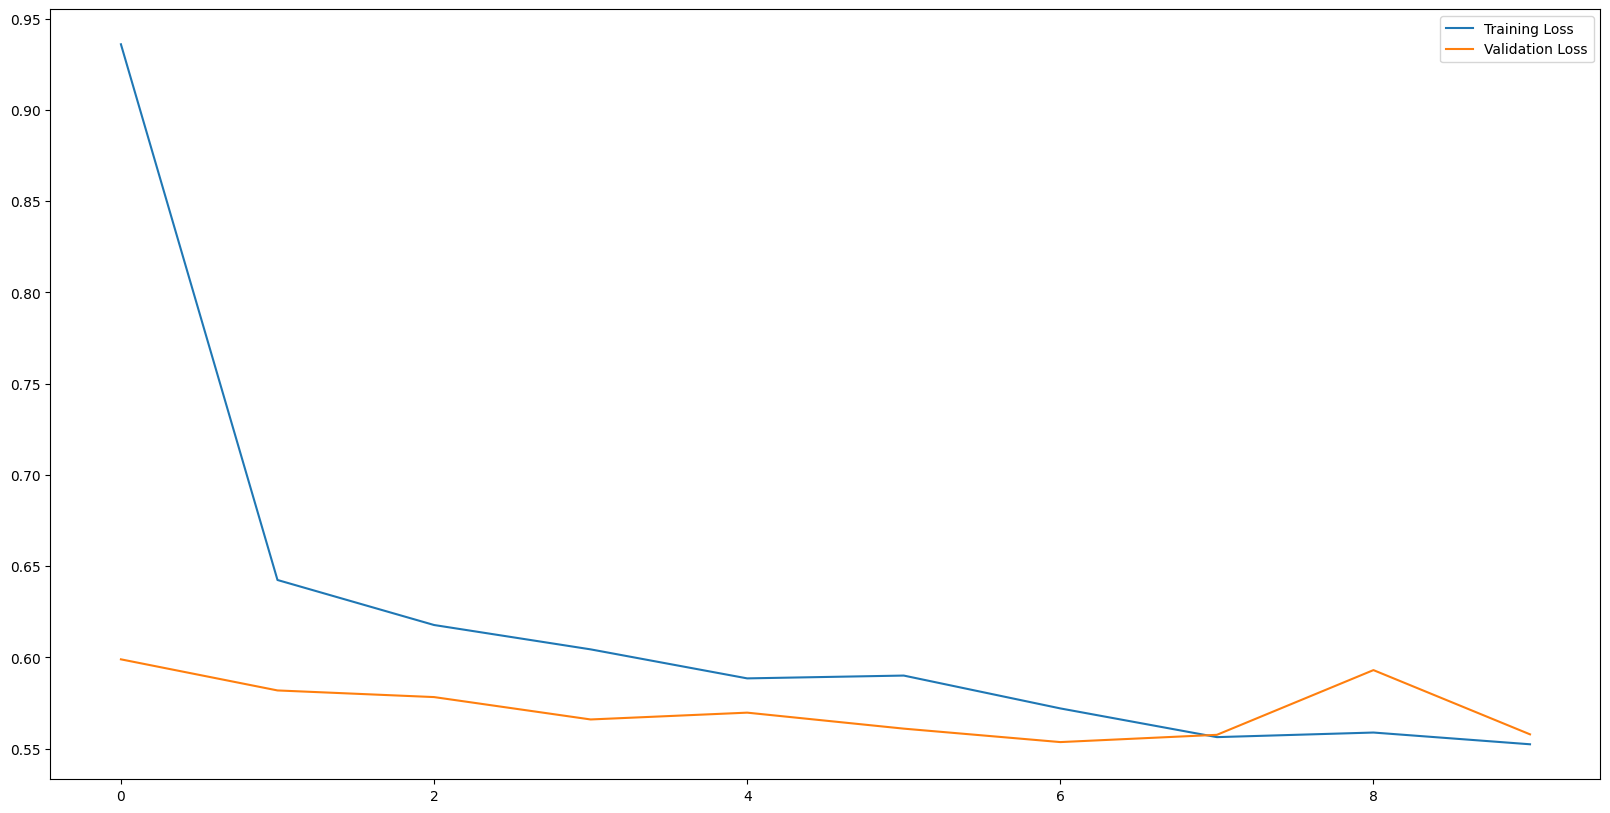

Validation Error: 0.5535469055175781


In [21]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2, random_state = 0, shuffle = True)

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, verbose=1, min_delta=0.001, mode="min", restore_best_weights=True)
cp = tf.keras.callbacks.ModelCheckpoint(r'/content/drive/MyDrive/9417/Models/gru_2_attention.h5', save_best_only=True, monitor='val_loss', mode='min')
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=0, min_lr=0.0001, absmode='min')

model = get_model()
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=25,
                    batch_size=128,
                    callbacks=[es, cp, rlr])

test_scores = model.predict(X_val)
results = pd.DataFrame(data = list(zip(test_scores, y_val,(test_scores-y_val))), columns = ['Pred_scores', 'Actual', 'error'])
error_l = min(history.history['val_loss'])

plot_results(history)
print(f'Validation Error: {error_l}')
results.to_csv("/content/drive/MyDrive/9417/gru_2_attention.csv")
results.to_pickle("/content/drive/MyDrive/9417/gru_2_attention.pkl")

In [22]:
pred_lst = results.Pred_scores
actual_lst = results.Actual

In [23]:
# flat is faster than item
cohesion_pred_lst = [x[0] for x in pred_lst]
cohesion_act_lst = [x[0] for x in actual_lst]

print("Pred cohesion:", cohesion_pred_lst[:5])
print("Actual cohesion:", cohesion_act_lst[:5])

syntax_pred_lst = [x[1] for x in pred_lst]
syntax_act_lst = [x[1] for x in actual_lst]

print("\nPred syntax:", syntax_pred_lst[:5])
print("Actual sytnax:", syntax_act_lst [:5])

vocabulary_pred_lst = [x[2] for x in pred_lst]
vocabulary_act_lst = [x[2] for x in actual_lst]

print("\nPred vocab:", vocabulary_pred_lst[:5])
print("Actual vocab:", vocabulary_act_lst[:5])

phraseology_pred_lst = [x[3] for x in pred_lst]
phraseology_act_lst = [x[3] for x in actual_lst]

print("\nPred phraseology:", phraseology_pred_lst[:5])
print("Actual phraseology:", phraseology_act_lst[:5])

grammar_pred_lst = [x[4] for x in pred_lst]
grammar_act_lst = [x[4] for x in actual_lst]

print("\nPred grammar:", grammar_pred_lst[:5])
print("Actual grammar:", grammar_act_lst[:5])

conventions_pred_lst = [x[5] for x in pred_lst]
conventions_act_lst = [x[5] for x in actual_lst]

print("\nPred conventions:", conventions_pred_lst[:5])
print("Actual conventions:", conventions_act_lst[:5])

Pred cohesion: [3.099383, 3.2661824, 3.4989338, 3.0533361, 3.756727]
Actual cohesion: [4.0, 3.0, 4.0, 2.5, 3.0]

Pred syntax: [2.9124177, 3.08536, 3.2786264, 2.9110892, 3.4876451]
Actual sytnax: [3.5, 3.5, 4.0, 3.0, 3.0]

Pred vocab: [3.1925902, 3.3167834, 3.4665852, 3.1035283, 3.7291026]
Actual vocab: [3.5, 3.5, 4.0, 3.5, 4.0]

Pred phraseology: [2.9454517, 3.1289837, 3.2952235, 2.9517443, 3.4159043]
Actual phraseology: [3.5, 3.5, 3.5, 3.5, 3.0]

Pred grammar: [2.9054062, 3.1673646, 3.258865, 3.0071247, 3.3051984]
Actual grammar: [3.0, 3.5, 4.5, 3.5, 4.0]

Pred conventions: [3.0207825, 3.2925775, 3.5380707, 3.1010394, 3.6063113]
Actual conventions: [3.5, 3.0, 4.5, 3.0, 4.0]


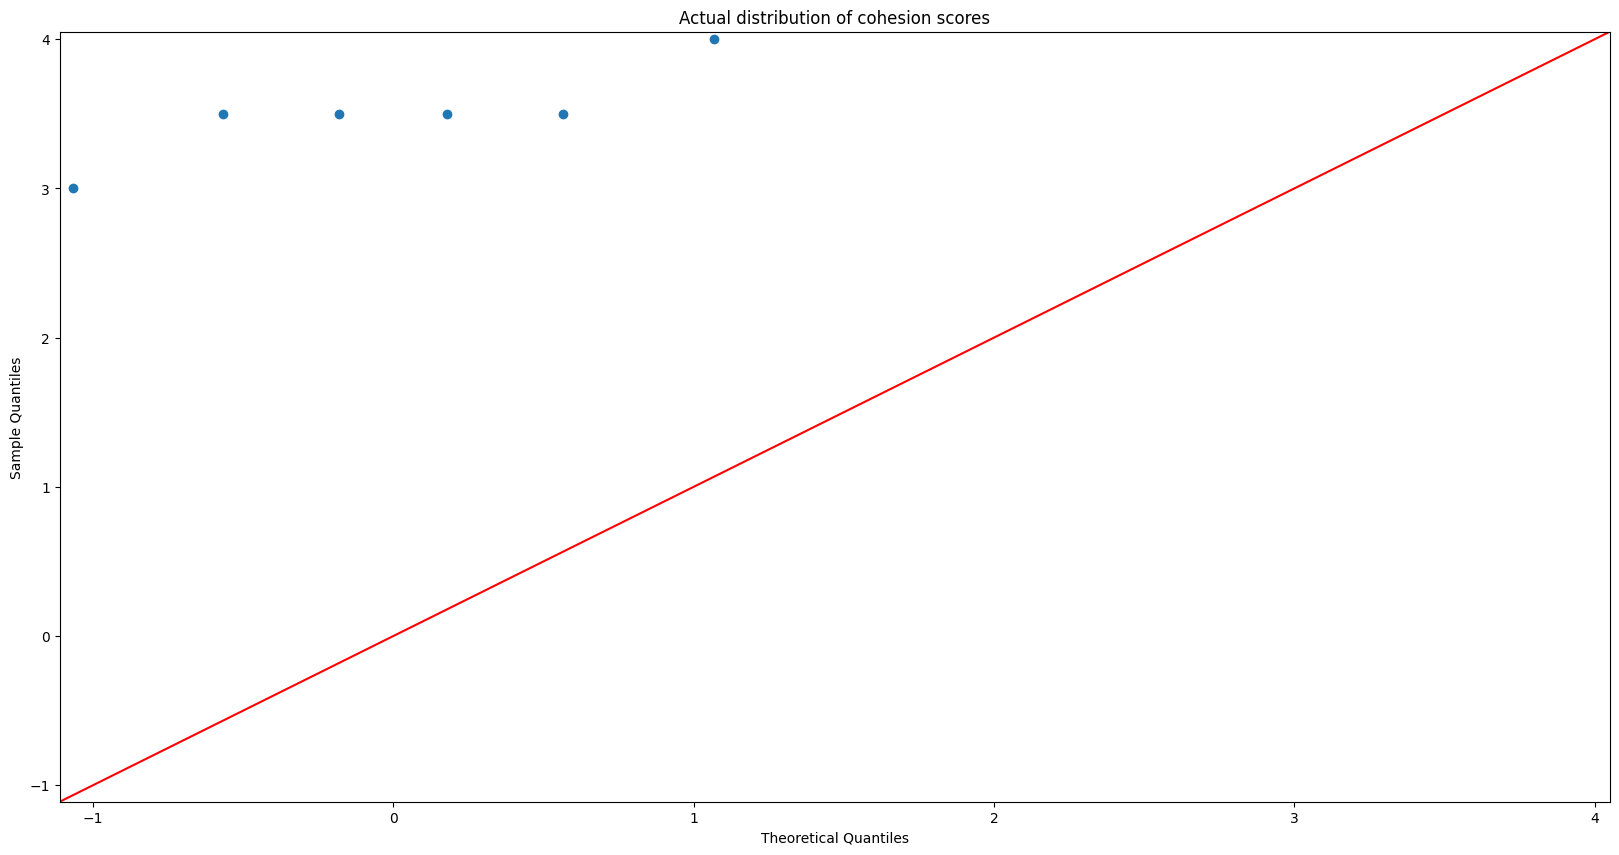

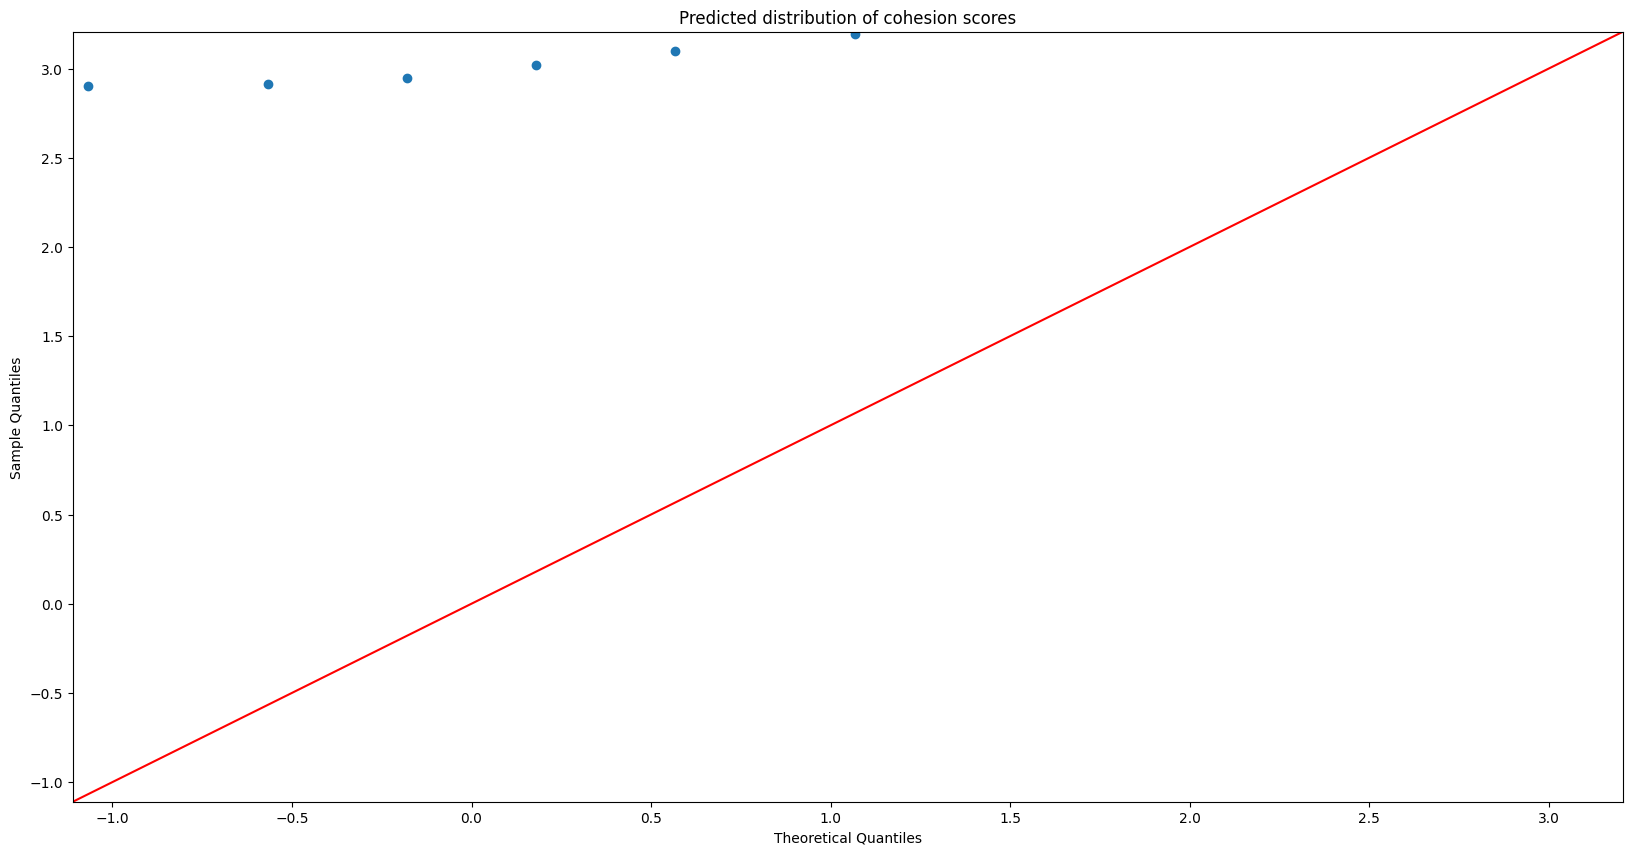

In [24]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(data = results['Actual'][0], line ='45')
py.title("Actual distribution of cohesion scores")
sm.qqplot(data = results['Pred_scores'][0], line ='45')
py.title("Predicted distribution of cohesion scores")
py.show()

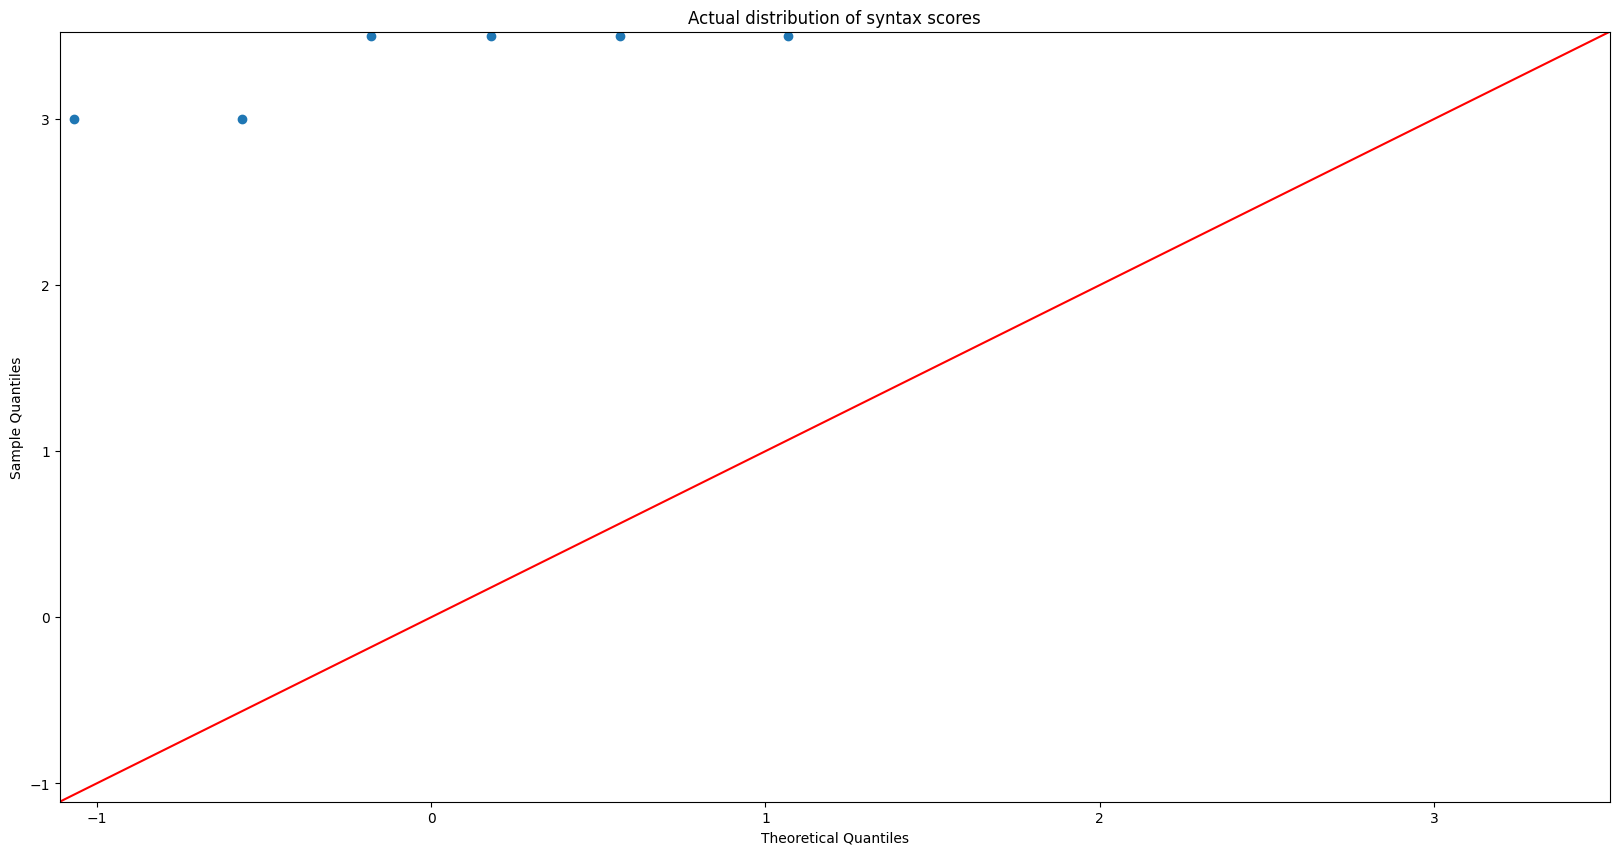

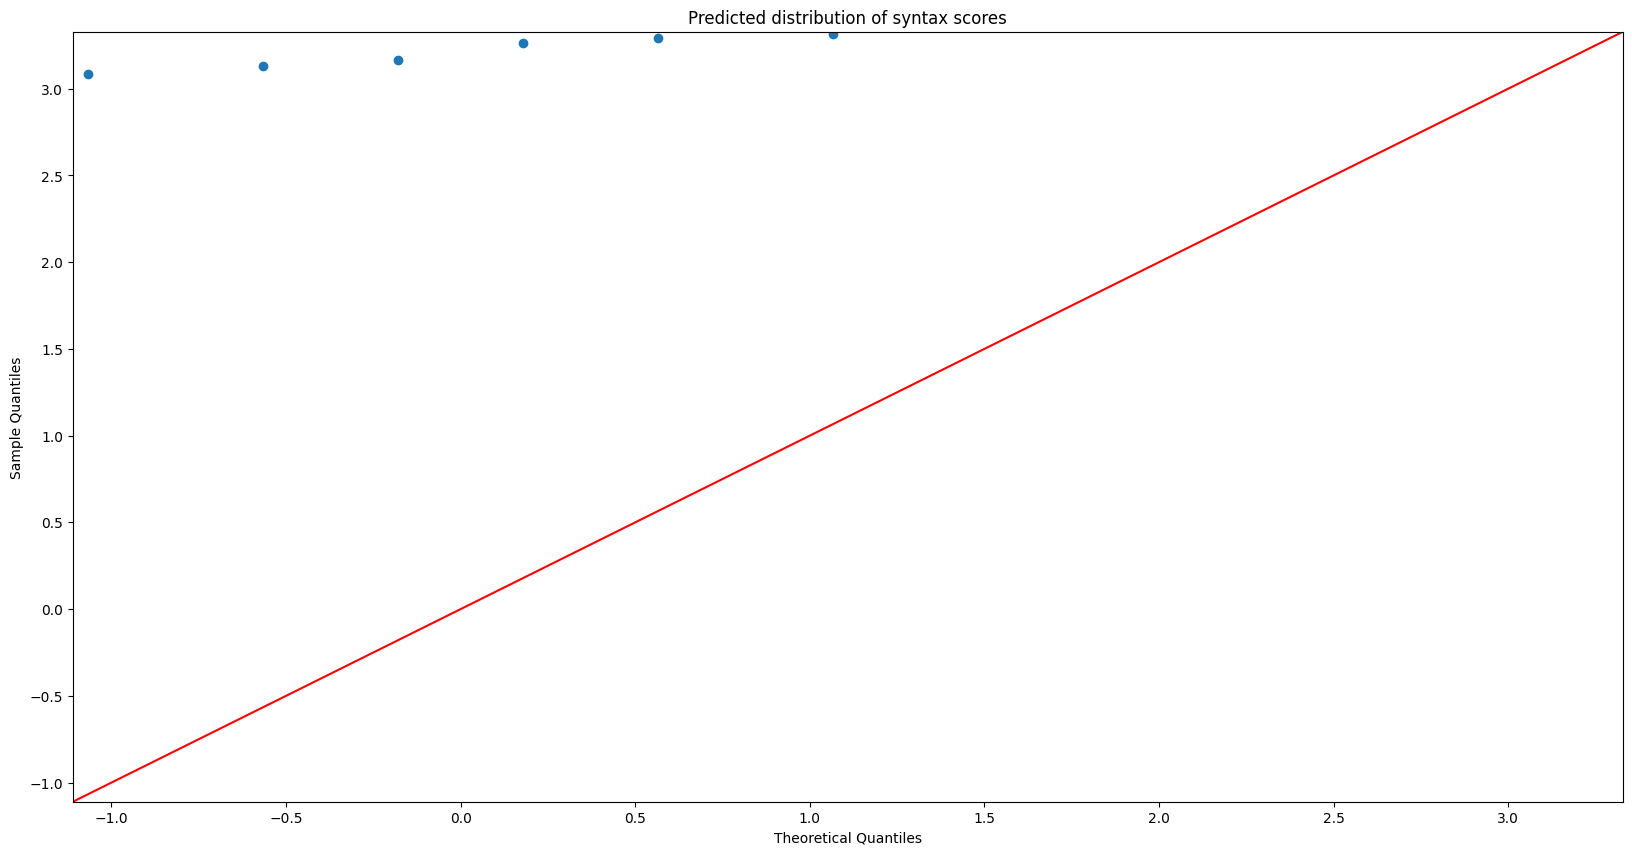

In [25]:
sm.qqplot(data = results['Actual'][1], line ='45')
py.title("Actual distribution of syntax scores")
sm.qqplot(data = results['Pred_scores'][1], line ='45')
py.title("Predicted distribution of syntax scores")
py.show()

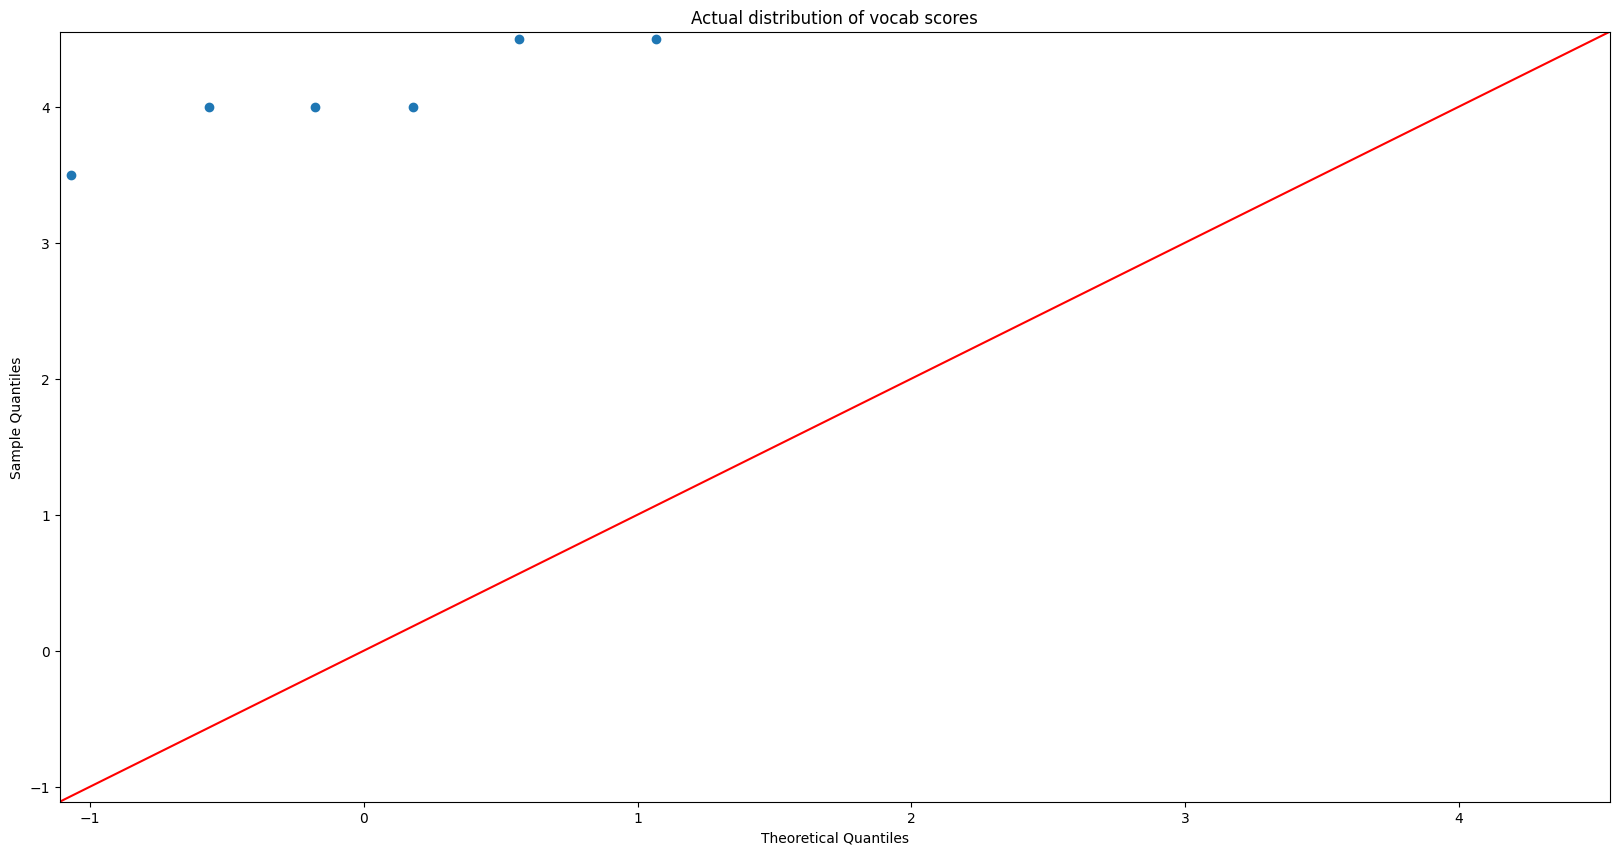

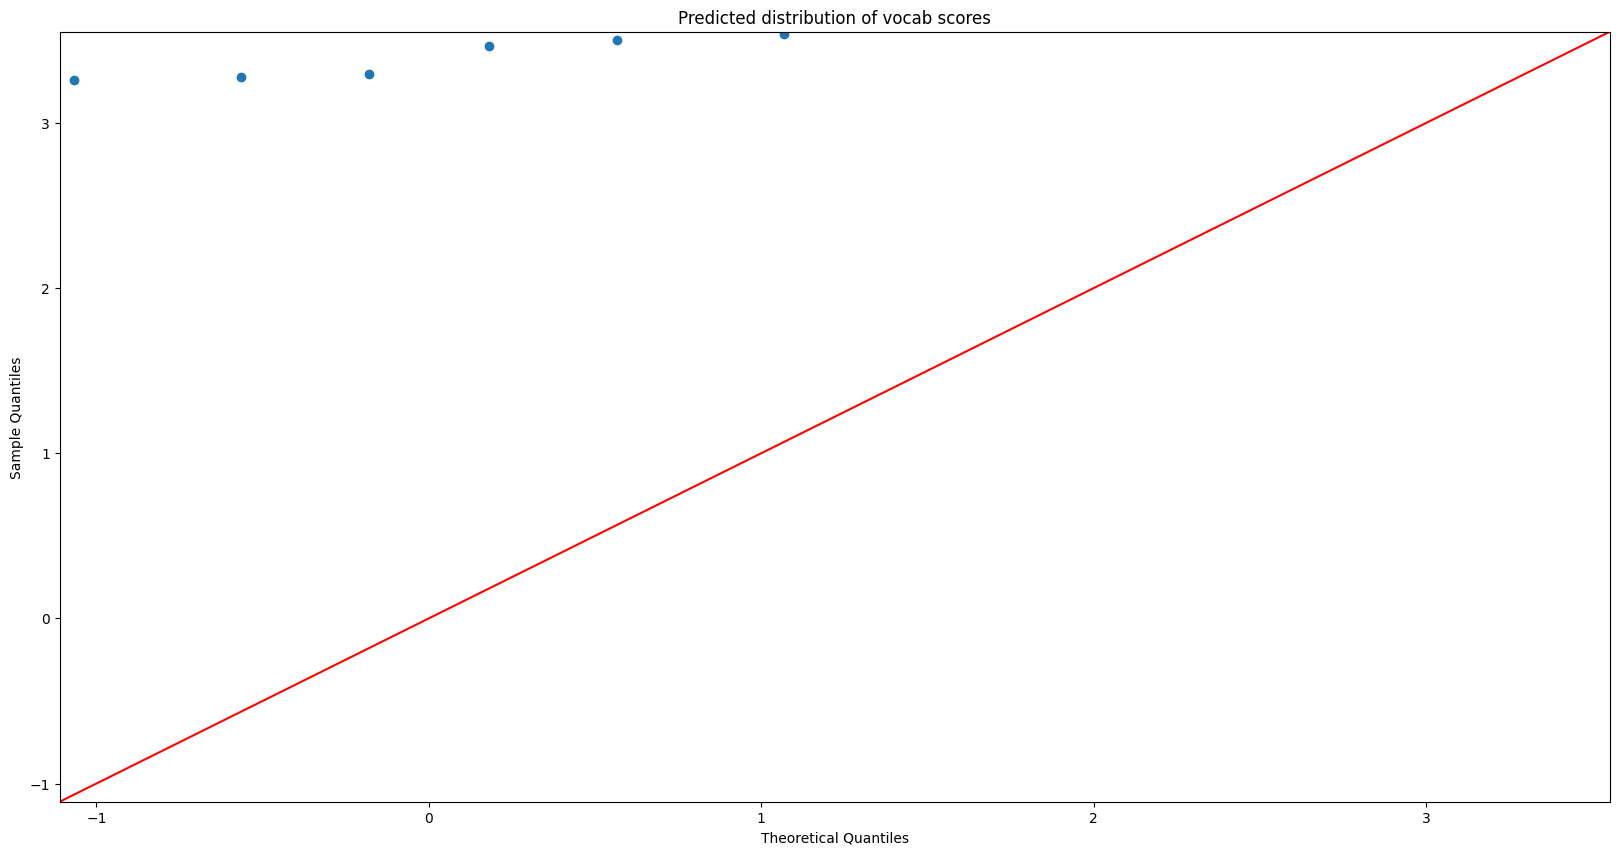

In [26]:
sm.qqplot(data = results['Actual'][2], line ='45')
py.title("Actual distribution of vocab scores")
sm.qqplot(data = results['Pred_scores'][2], line ='45')
py.title("Predicted distribution of vocab scores")
py.show()

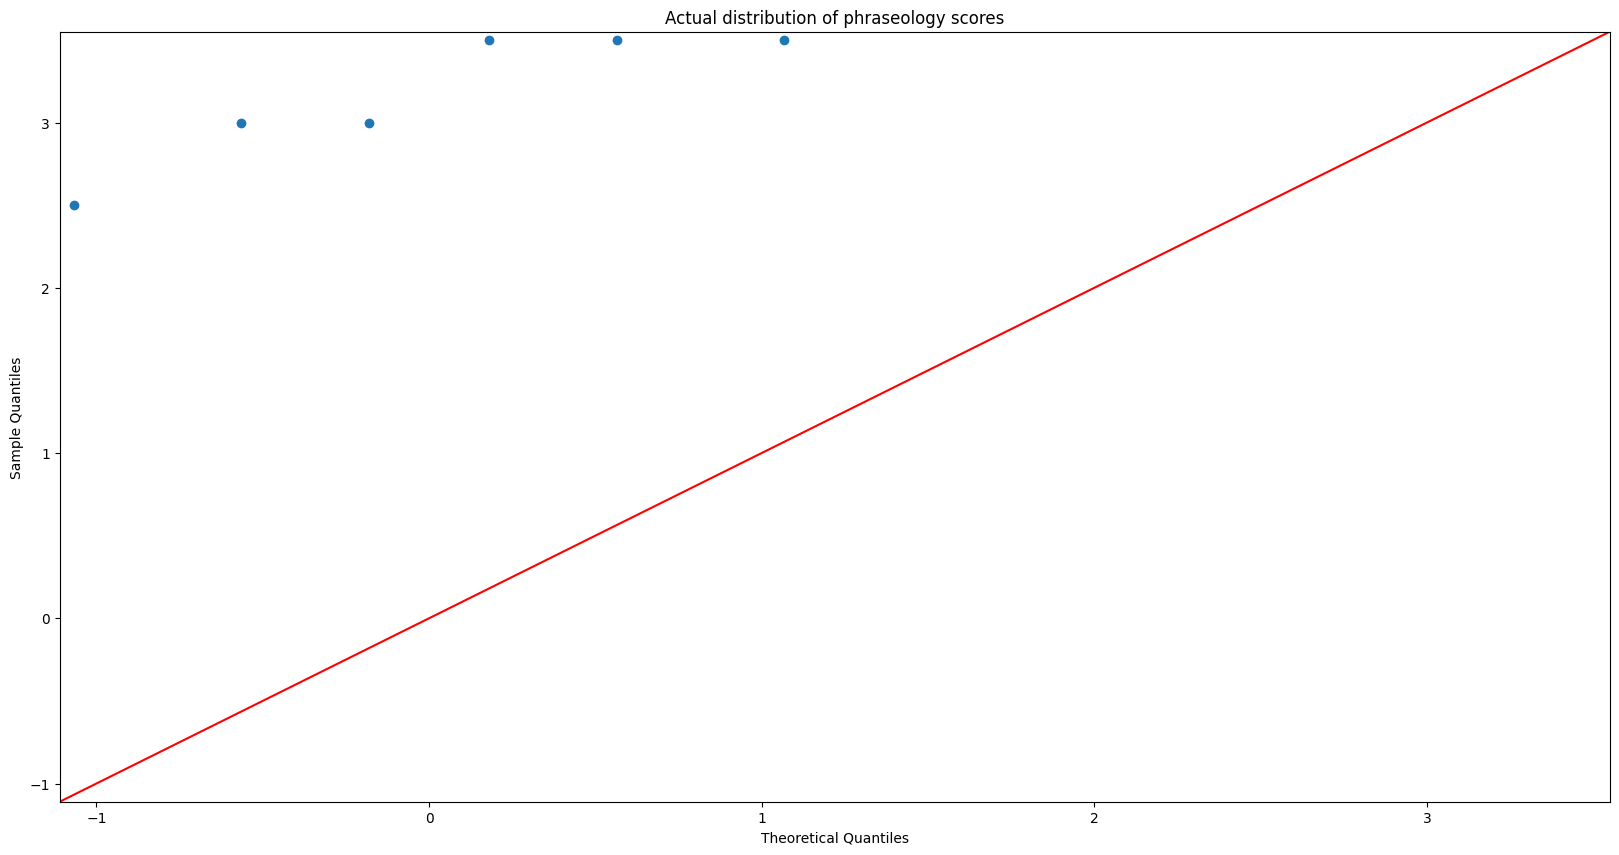

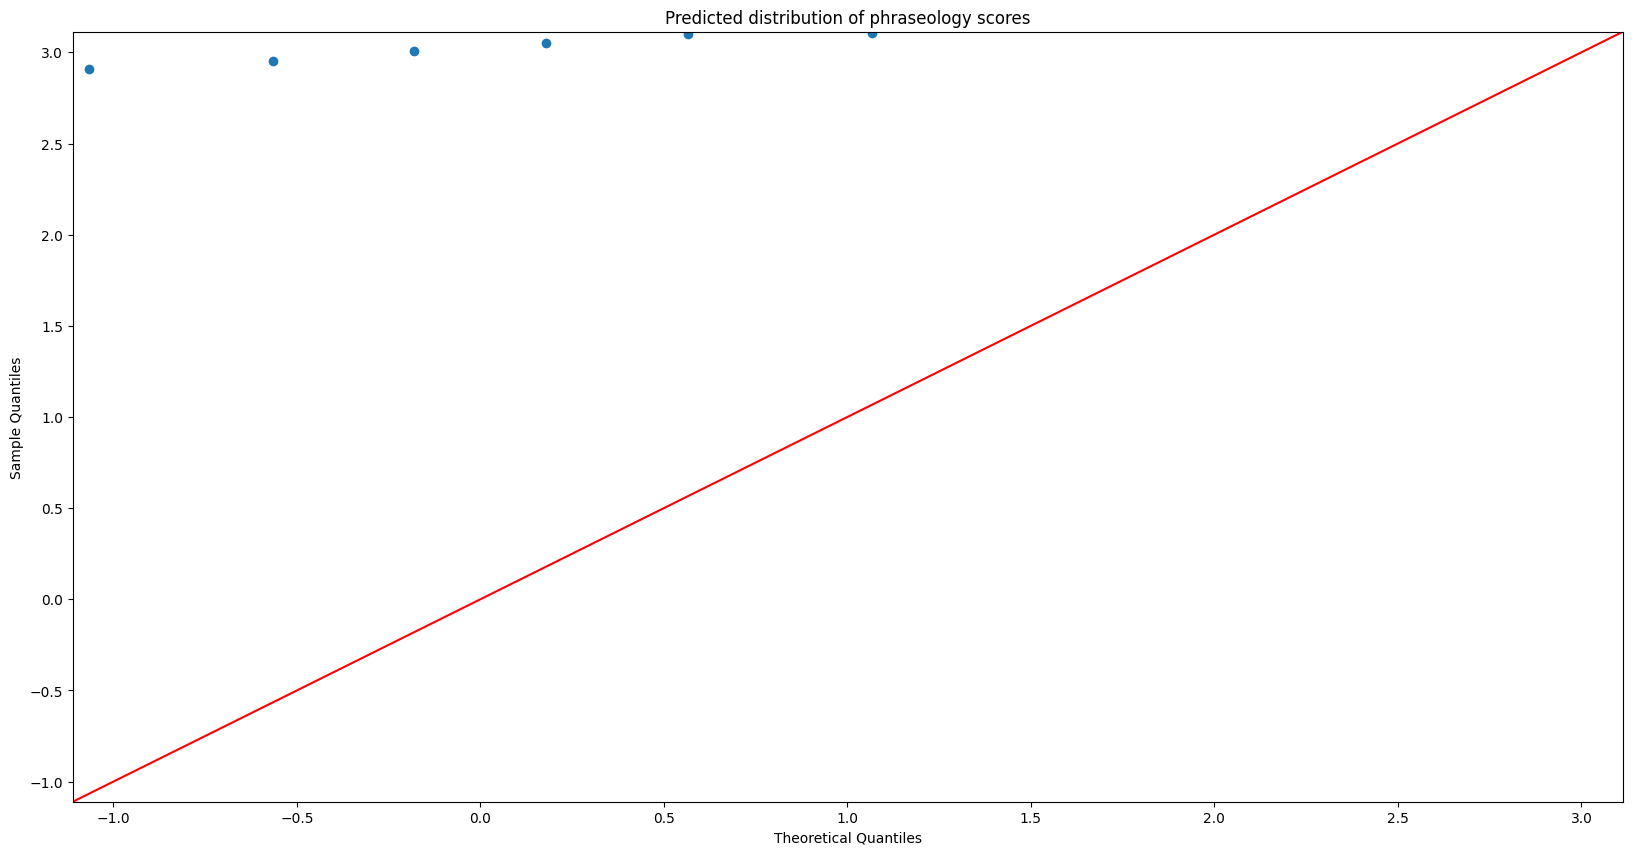

In [27]:
sm.qqplot(data = results['Actual'][3], line ='45')
py.title("Actual distribution of phraseology scores")
sm.qqplot(data = results['Pred_scores'][3], line ='45')
py.title("Predicted distribution of phraseology scores")
py.show()

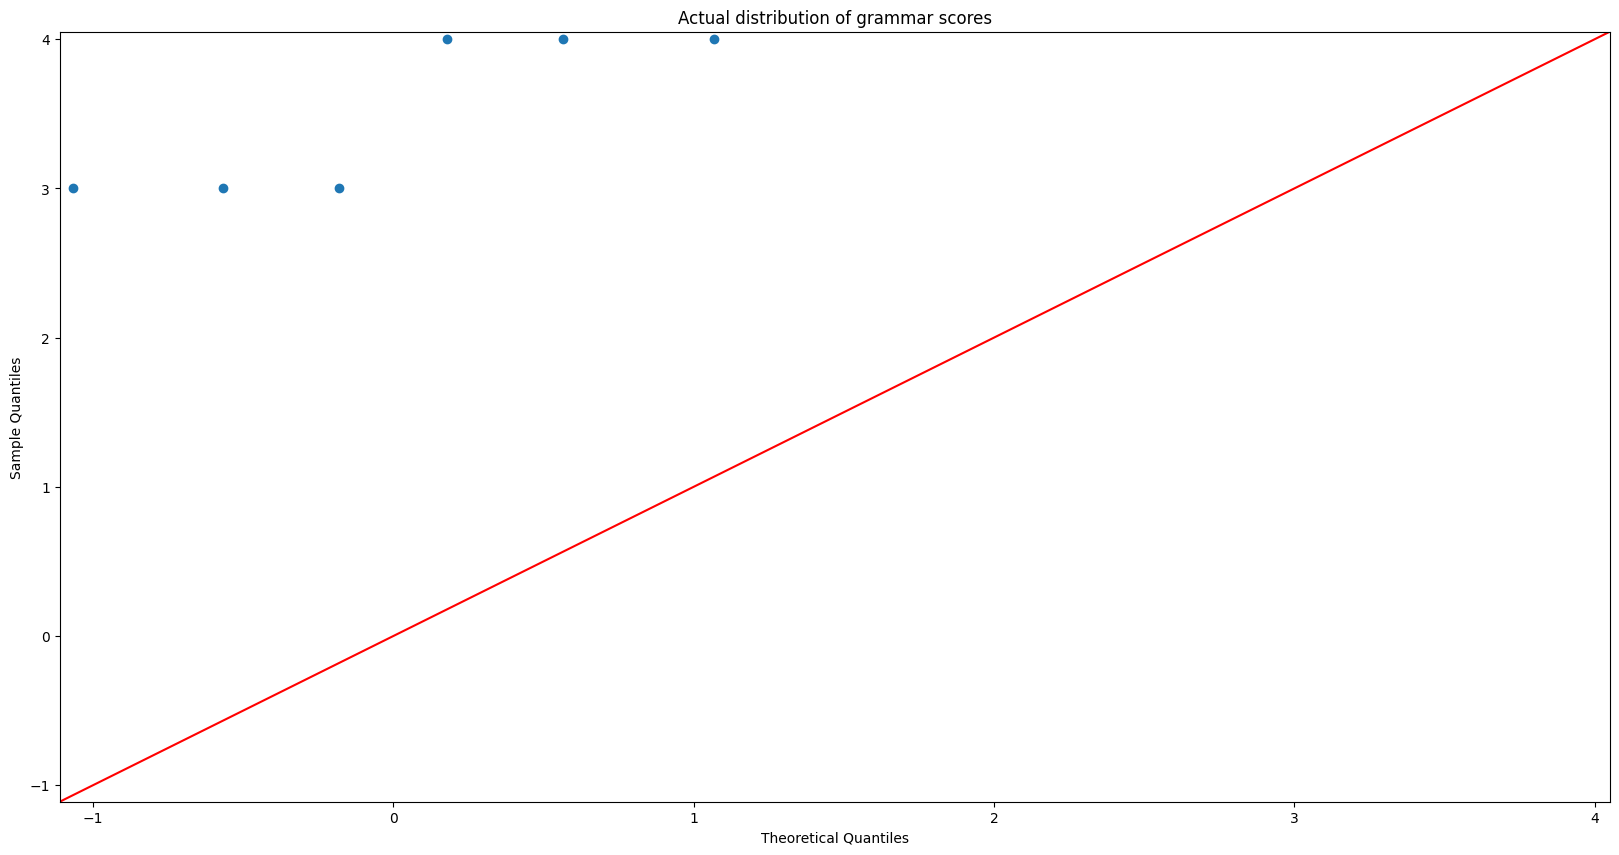

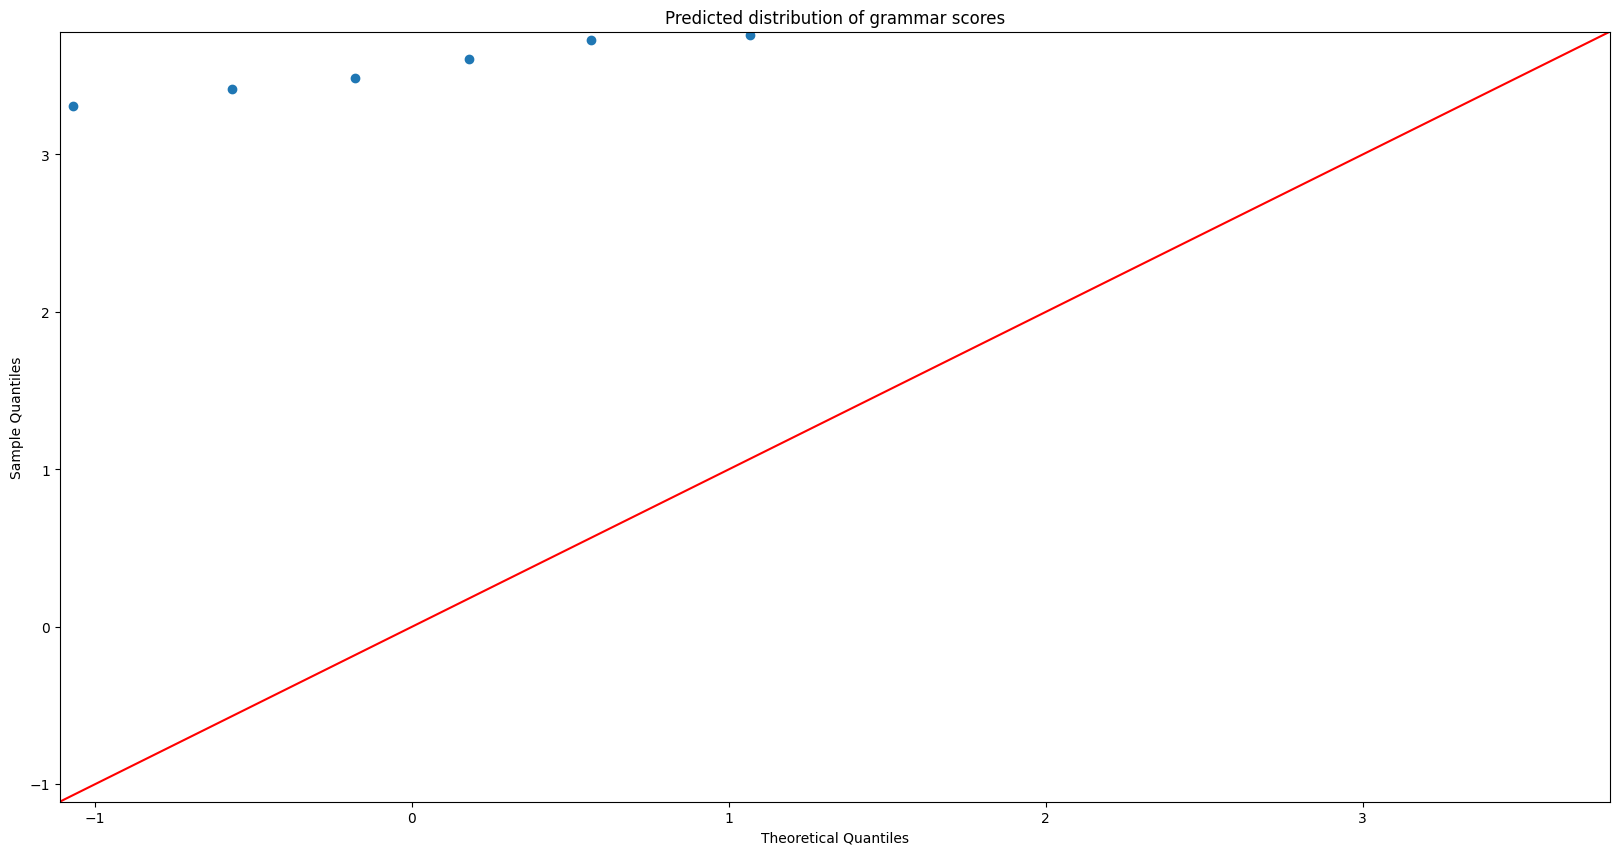

In [28]:
sm.qqplot(data = results['Actual'][4], line ='45')
py.title("Actual distribution of grammar scores")
sm.qqplot(data = results['Pred_scores'][4], line ='45')
py.title("Predicted distribution of grammar scores")
py.show()

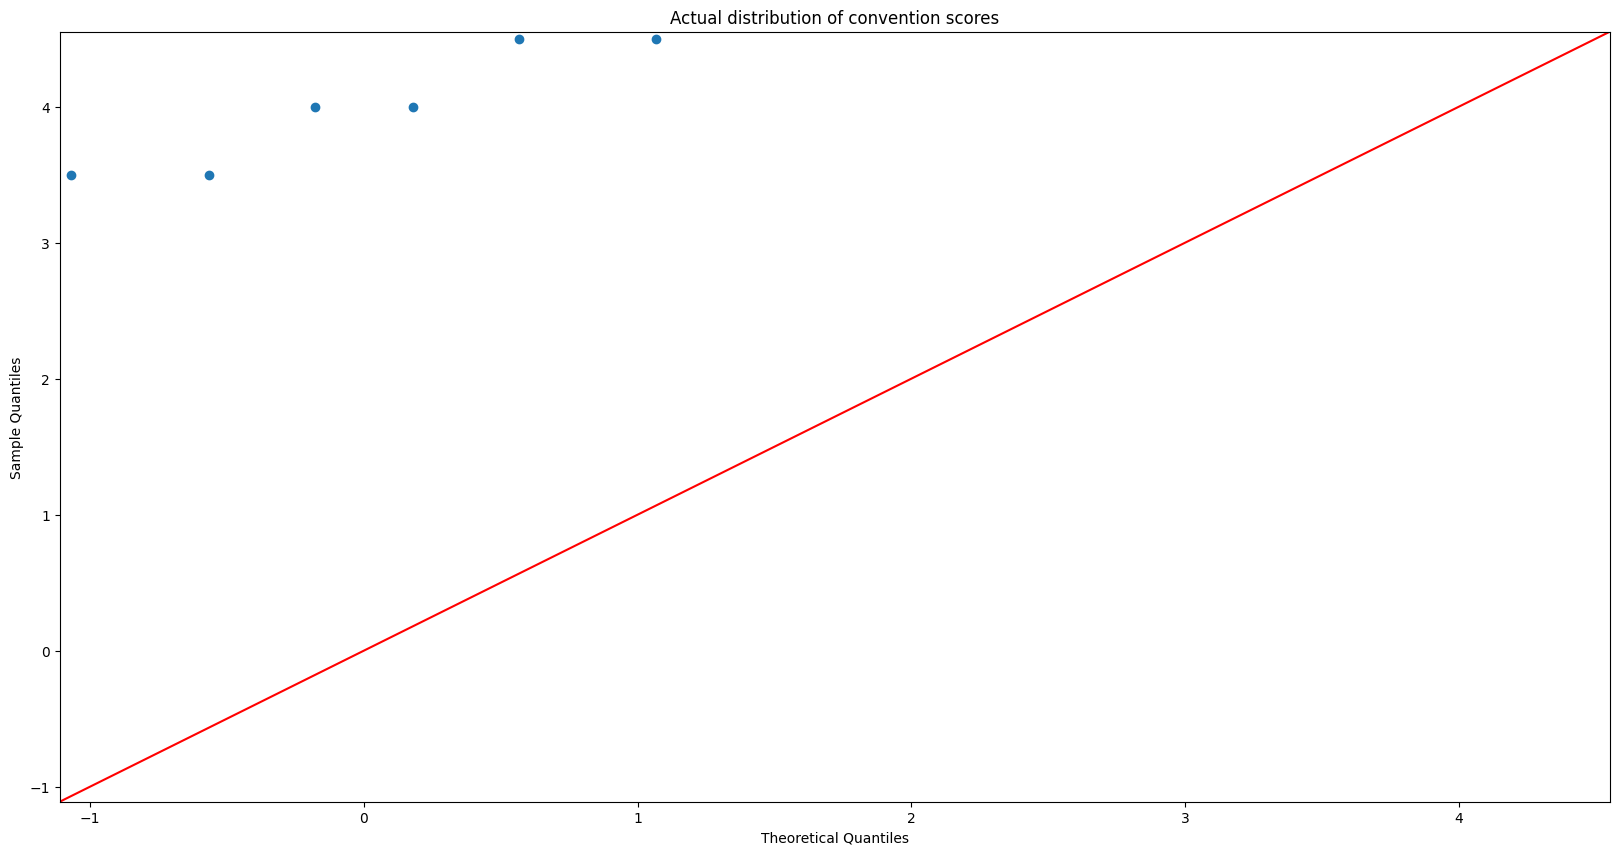

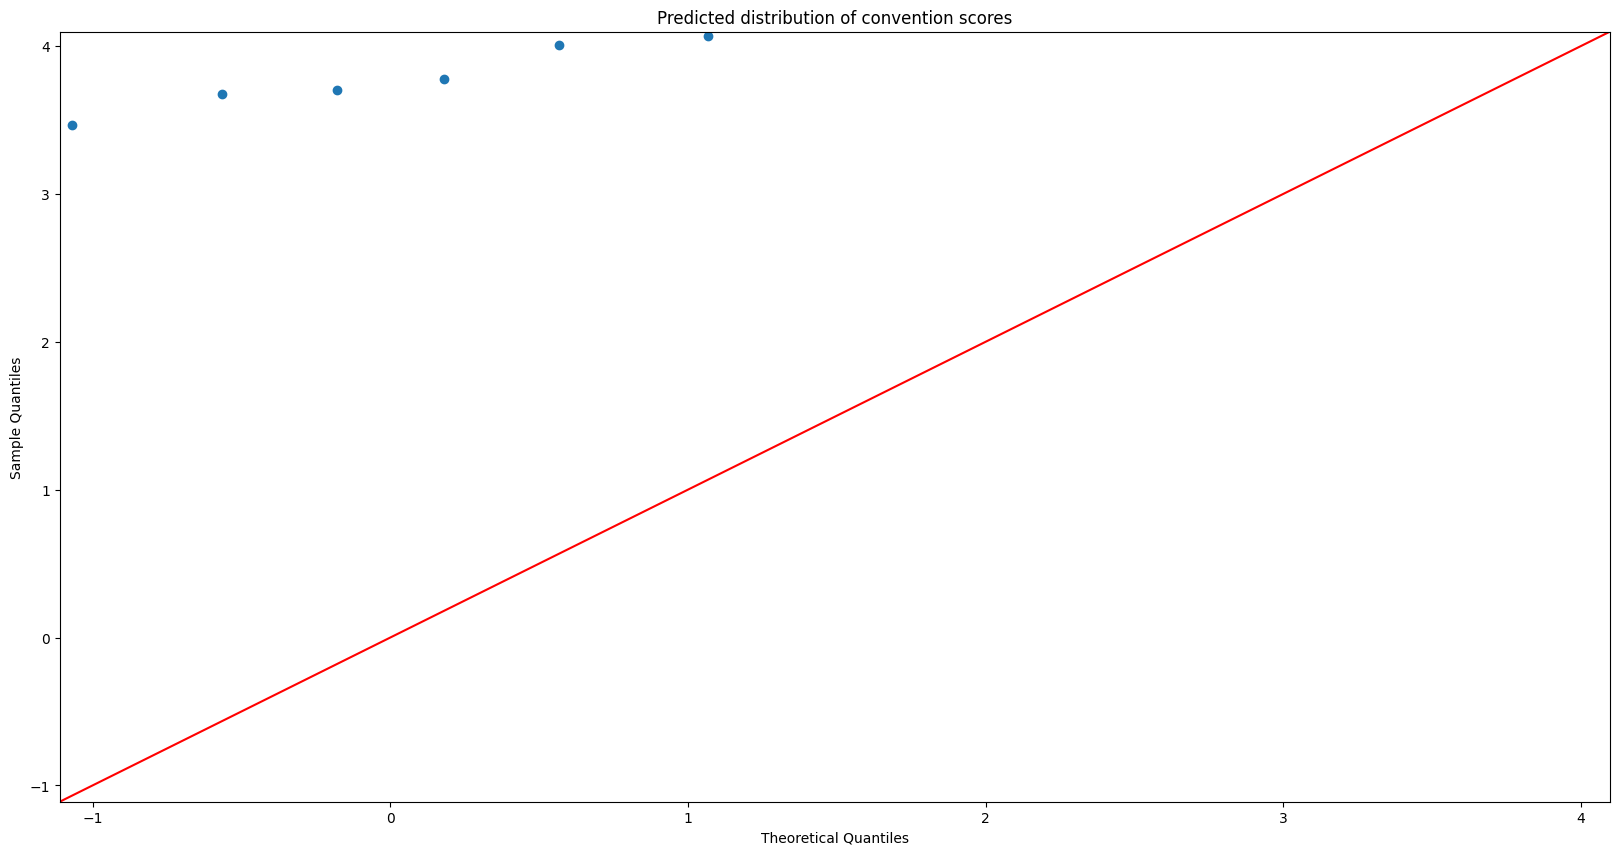

In [29]:
sm.qqplot(data = results['Actual'][5], line ='45')
py.title("Actual distribution of convention scores")
sm.qqplot(data = results['Pred_scores'][5], line ='45')
py.title("Predicted distribution of convention scores")
py.show()

In [30]:
iterations = X_val.shape[0]
iterations

783

In [31]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(X_val[num]))
#nonzero_count

In [32]:
proof_df = results
proof_df['nonzero'] = nonzero_count

In [33]:
import seaborn as sns
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])
test_scores[1].shape

[array([3.099383 , 2.9124177, 3.1925902, 2.9454517, 2.9054062, 3.0207825],
       dtype=float32)
 array([3.2661824, 3.08536  , 3.3167834, 3.1289837, 3.1673646, 3.2925775],
       dtype=float32)
 array([3.4989338, 3.2786264, 3.4665852, 3.2952235, 3.258865 , 3.5380707],
       dtype=float32)
 array([3.0533361, 2.9110892, 3.1035283, 2.9517443, 3.0071247, 3.1010394],
       dtype=float32)
 array([3.756727 , 3.4876451, 3.7291026, 3.4159043, 3.3051984, 3.6063113],
       dtype=float32)                                                     ]


(6,)

In [34]:
results['nonzero'] = nonzero_count

In [35]:
pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

[3.0126717, 3.209542, 3.389384, 3.02131, 3.550148]

In [36]:
corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

<Axes: >

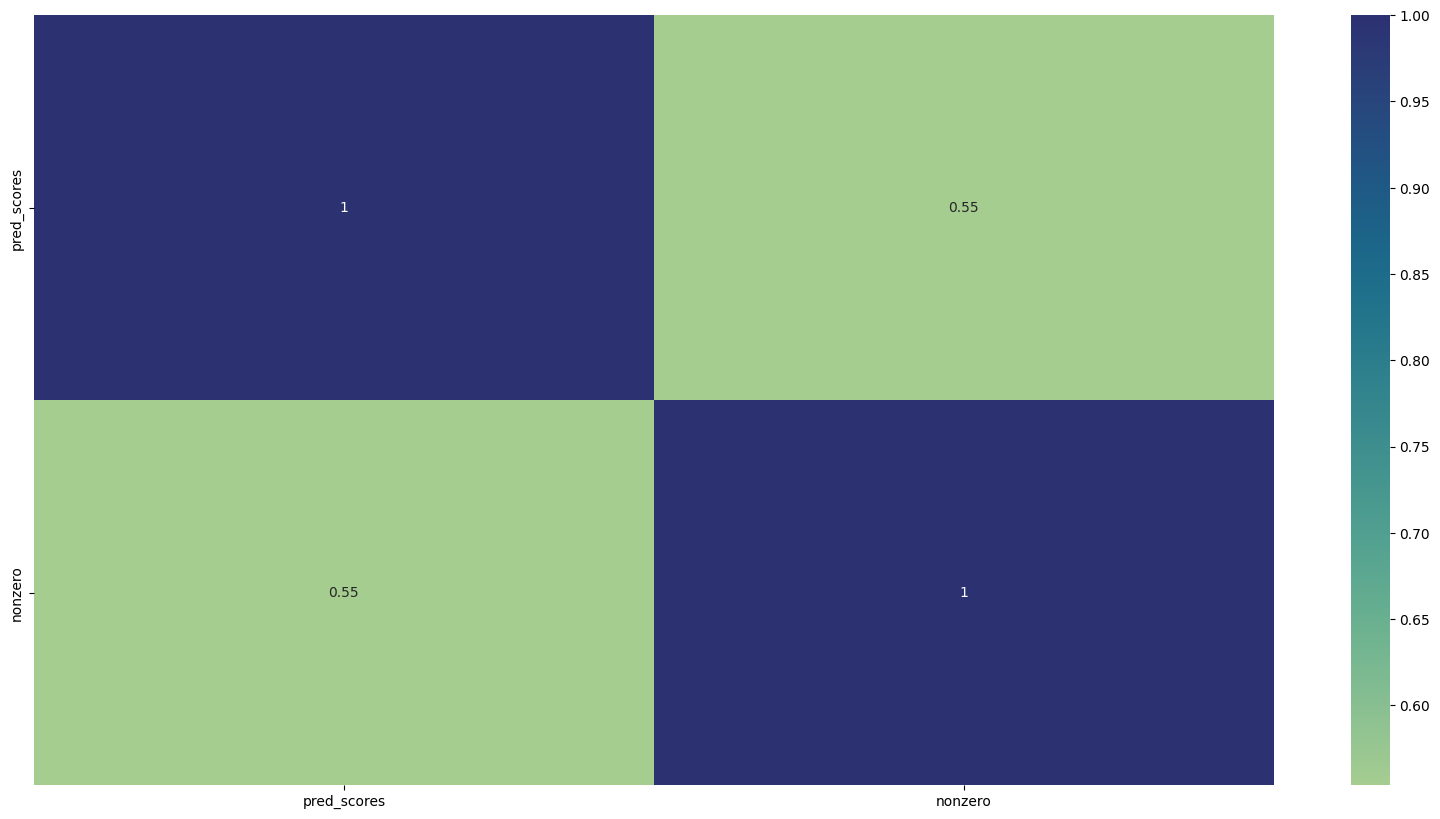

In [37]:
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

<Axes: >

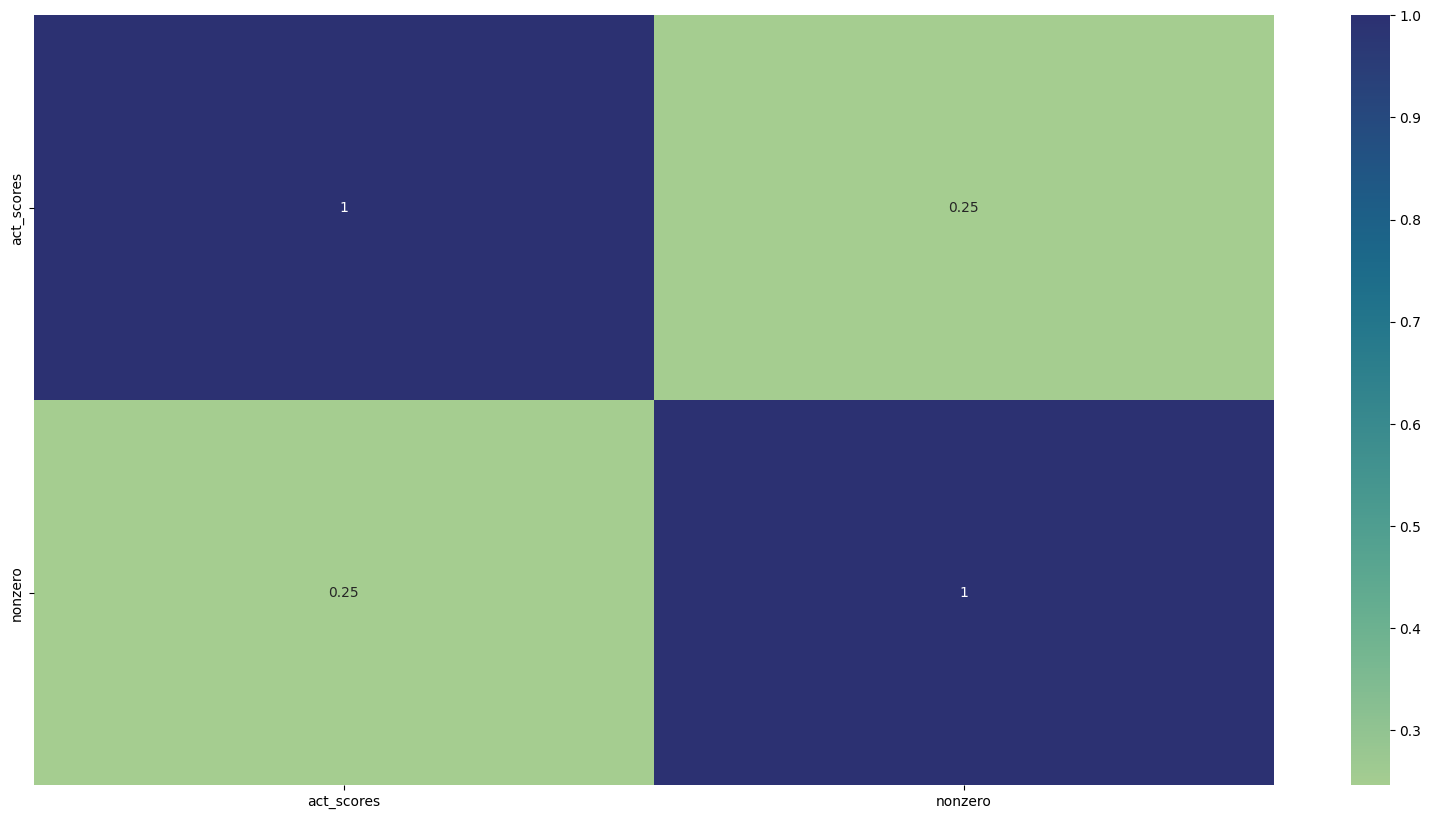

In [38]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

array([[<Axes: title={'center': 'act_scores'}>]], dtype=object)

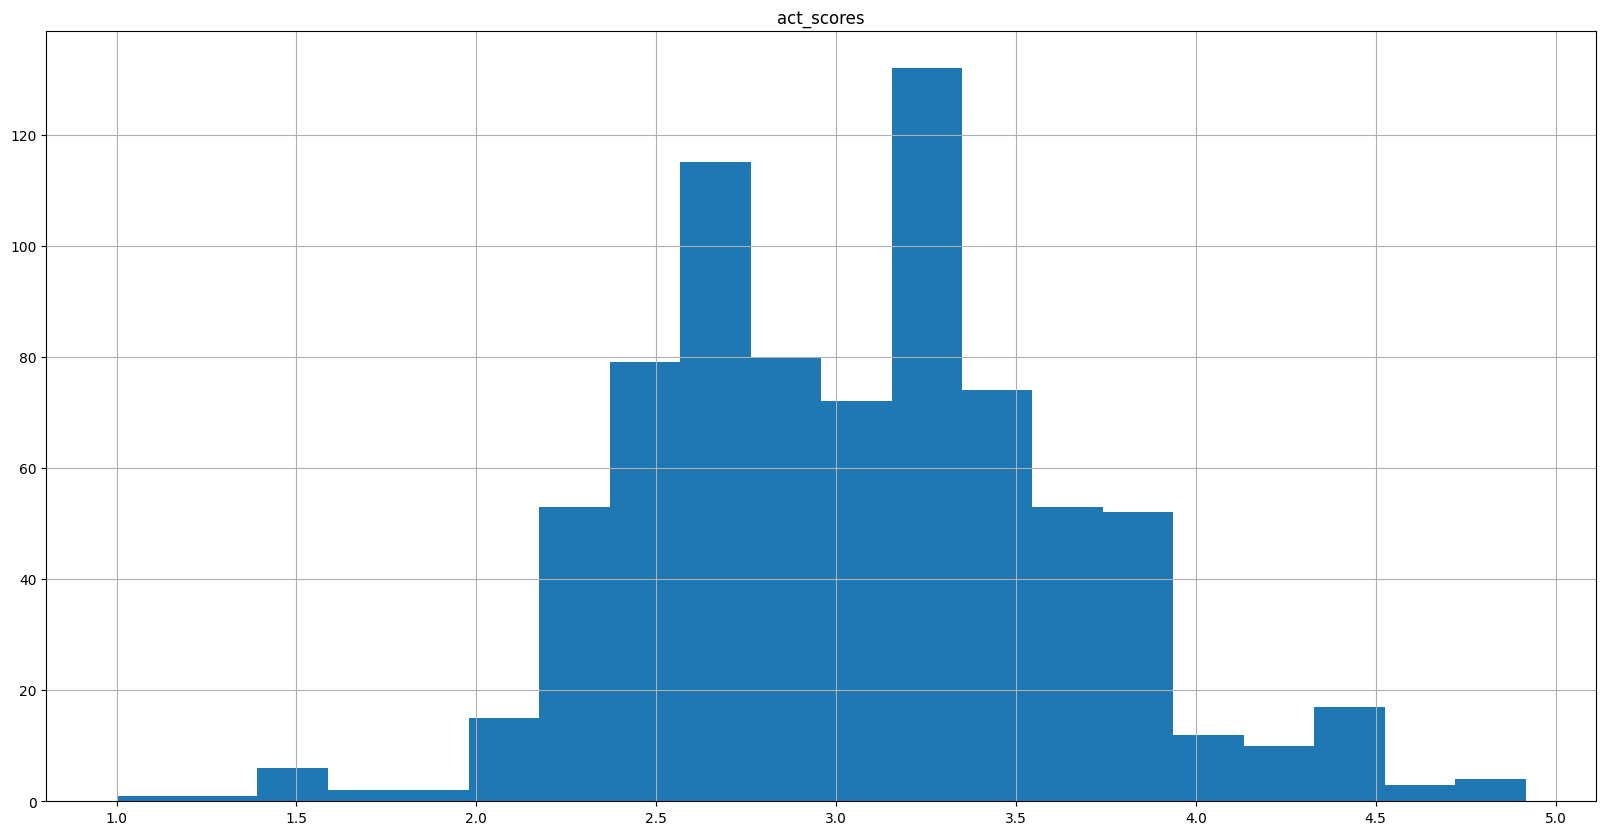

In [39]:
act_corr_df.hist(column = 'act_scores', bins = 20)

array([[<Axes: title={'center': 'pred_scores'}>]], dtype=object)

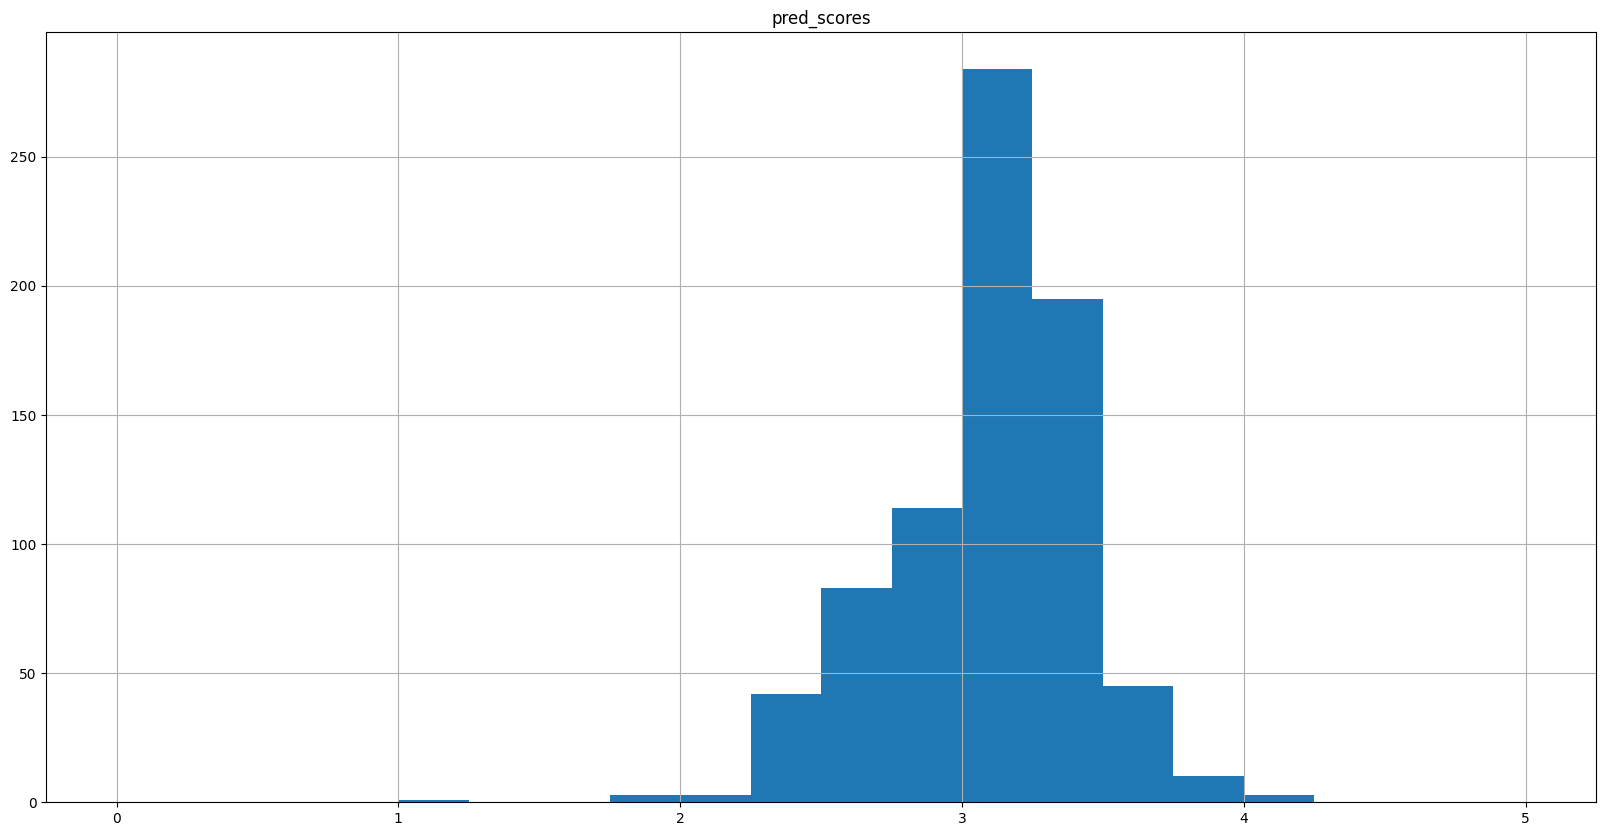

In [40]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [0, 5.0])

In [41]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.128457
Actual median :  3.0


In [42]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.013144454
Actual mean variance :  0.11895132680573293


## Submission

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
sub = pd.read_csv('/content/drive/MyDrive/9417/Data/sample_submission.csv')
xtest_tokenizer = Tokenizer()
df_test = pd.read_csv('/content/drive/MyDrive/9417/Data/test.csv')
xtest = clean_input(df_test)
df_test['cleaned_text'] = xtest
xtest_tokenizer.fit_on_texts(df_test['cleaned_text'])

X_test = get_training_data(df_test, xtest_tokenizer, None)

from keras.models import model_from_json
with open('/content/drive/MyDrive/9417/Models/gru_2_attention.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('/content/drive/MyDrive/9417/Models/gru_2_attention.h5')

pred = model.predict(X_test)

for index, row in df_test.iterrows():
    sub_index = sub[sub['text_id']==row['text_id']].index
    sub.iloc[sub_index, 1] = pred[sub_index,0]
    sub.iloc[sub_index, 2] = pred[sub_index,1]
    sub.iloc[sub_index, 3] = pred[sub_index,2]
    sub.iloc[sub_index, 4] = pred[sub_index,3]
    sub.iloc[sub_index, 5] = pred[sub_index,4]
    sub.iloc[sub_index, 6] = pred[sub_index,5]

sub['text_id'] = sub['text_id']
sub.to_csv('/content/drive/MyDrive/9417/Data/gru_2_attention_submission.csv', index=False)

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


Cleaning Progress: 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


1/1 [==============================] - 3s 3s/step


## GRU Double Basic

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import contractions
import nltk
import tqdm
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators
import re
import statsmodels.api as sm
import string
import gensim #nlp
import os

from tensorflow import keras #for deep learning
from tensorflow.keras.utils import to_categorical #vector (int) to binary class matrix.
from keras import backend as K #function wrapper
from tensorflow.keras import backend as backend
from keras.layers import * #for nn
from keras.activations import * #for non linearity
from keras.preprocessing.sequence import pad_sequences #ensures same length for nn
from keras.preprocessing.text import text_to_word_sequence #tokenize text to words
from keras.preprocessing.text import Tokenizer
from nltk import ngrams #generate n-grams from a given sequence of tokens
from nltk.corpus import stopwords #reduce noise and improve the efficiency
from sklearn.model_selection import train_test_split, KFold #iterates through different combinations of train-test splits for model evaluation
from matplotlib import rcParams
from tensorflow.keras.layers import Embedding, GRU

# Tokenizer
nlp = spacy.load('en_core_web_sm') #load a pre-trained English language model in spaCy.

df = pd.read_csv('/content/drive/MyDrive/9417/Data/train.csv')

# figure size in inches
rcParams['figure.figsize'] = 20, 10
TARGET_COLS = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [6]:
def clean_input(df):
  proc_text = [contractions.fix(text) for text in df['full_text']]
  def more_processing(text):
      text = '<sostok> ' + text + ' <eostok>'
      text = text.lower()
      return text

  proc_text_2 = [more_processing(text) for text in proc_text]
  nlp = spacy.load("en_core_web_md", disable=['senter', 'parser', 'ner'])
  print(nlp.pipe_names)

  pipeline = spacy_cleaner.Pipeline(
      nlp,
      removers.remove_stopword_token,
      removers.remove_punctuation_token,
      replacers.replace_number_token,
      mutators.mutate_lemma_token,
  )
  cleaned_text = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
  return cleaned_text

In [7]:
# Load cleaned text
import pickle
with open('/content/drive/MyDrive/9417/proc_text_3.pkl', 'rb') as f:
    proc_text_3 = pickle.load(f)

In [8]:
# Also added start of seq and end of seq, lowercase
df['cleaned_text'] = proc_text_3

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(df['cleaned_text'])
x_vocab_size = len(x_tokenizer.word_index) + 1

In [11]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = '/content/drive/MyDrive/9417/glove.6B.50d.txt' # 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file, encoding='utf-8') as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix


#x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

In [12]:
embedding_dim = 50

x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10171 words (7296 misses)


In [13]:
MAXLEN = int(df['cleaned_text'].str.len().max())
MAXLEN_W = int(df['cleaned_text'].str.split().str.len().max())
print("Max. letters length: ", MAXLEN)
print("Max. words length: ", MAXLEN_W)
VECTOR_SIZE = 100
max_text_len = 500

Max. letters length:  3361
Max. words length:  487


In [14]:
#root mean squared error
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)

In [15]:
#https://www.tensorflow.org/text/tutorials/text_classification_rnn
#Implement a GRU block as a Keras layer and use it for text classification.

class GRU_3_Double_Basic_Model():
    def build():
        embed_units = 50  # Embedding size for each token
        inputs = Input(shape=(max_text_len,))
        embedding_layer = Embedding(input_dim = x_vocab_size,
                                    output_dim = embed_units,
                                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                                    input_length=max_text_len, trainable = False, mask_zero = True)(inputs)

        gru_layer = GRU(256, return_sequences=True)(embedding_layer)
        gru_layer2 = GRU(256, return_sequences=False)(gru_layer)

        fc1 = Dense(512, activation="relu")(gru_layer2)
        drop_1 = Dropout(0.2)(fc1)
        outputs = Dense(6, activation='linear')(drop_1)

        model = keras.Model(inputs=inputs, outputs=outputs)
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=mean_columnwise_root_mean_squared_error)
        return model

def get_model():
    model = GRU_3_Double_Basic_Model.build()
    return model

In [16]:
with open('/content/drive/MyDrive/9417/Models/gru_3_double_basic.json', 'w') as f:
    f.write(get_model().to_json())
backend.clear_session()
get_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 50)           873400    
                                                                 
 gru (GRU)                   (None, 500, 256)          236544    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 512)               131584    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078  

In [17]:
def get_training_data(df, x_tokenizer, mode='fit'):
    X = []
    y = []

    x_sequence = x_tokenizer.texts_to_sequences(df['cleaned_text'])
    X = pad_sequences(x_sequence, maxlen=max_text_len, padding='pre')

    if mode == 'fit':
        for index, row in df.iterrows():
            labels = [row['cohesion'], row['syntax'], row['vocabulary'], row['phraseology'], row['grammar'], row['conventions']]
            y.append(labels)

    if mode == 'fit':
        return np.array(X), np.array(y)
    else:
        return np.array(X)


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
X, y = get_training_data(df, x_tokenizer)
print(f'Train X shape: {X.shape}')
print(f'Train y shape: {y.shape}')

Train X shape: (3911, 500)
Train y shape: (3911, 6)


In [20]:
def plot_results(history):
    x = np.arange(0, len(history.history["loss"]))

    sns.lineplot(x=x, y=history.history["loss"], label='Training Loss')
    sns.lineplot(x=x, y=history.history["val_loss"], label='Validation Loss')
    plt.legend()

    plt.show()

Epoch 1/25


Instructions for updating:
Use fn_output_signature instead


25/25 [==============================] - ETA: 0s - loss: 1.1010

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



25/25 [==============================] - 142s 5s/step - loss: 1.1010 - val_loss: 0.6324 - lr: 0.0010
Epoch 2/25
25/25 [==============================] - 129s 5s/step - loss: 0.6565 - val_loss: 0.5921 - lr: 0.0010
Epoch 3/25
25/25 [==============================] - 144s 6s/step - loss: 0.6146 - val_loss: 0.5746 - lr: 0.0010
Epoch 4/25
25/25 [==============================] - 134s 5s/step - loss: 0.6021 - val_loss: 0.5620 - lr: 0.0010
Epoch 5/25
25/25 [==============================] - 131s 5s/step - loss: 0.5938 - val_loss: 0.5615 - lr: 0.0010
Epoch 6/25
25/25 [==============================] - 131s 5s/step - loss: 0.5899 - val_loss: 0.5575 - lr: 0.0010
Epoch 7/25
25/25 [==============================] - 139s 6s/step - loss: 0.5796 - val_loss: 0.5563 - lr: 0.0010
Epoch 8/25
25/25 [==============================] - 134s 5s/step - loss: 0.5786 - val_loss: 0.5561 - lr: 0.0010
Epoch 9/25
25/25 [==============================] -

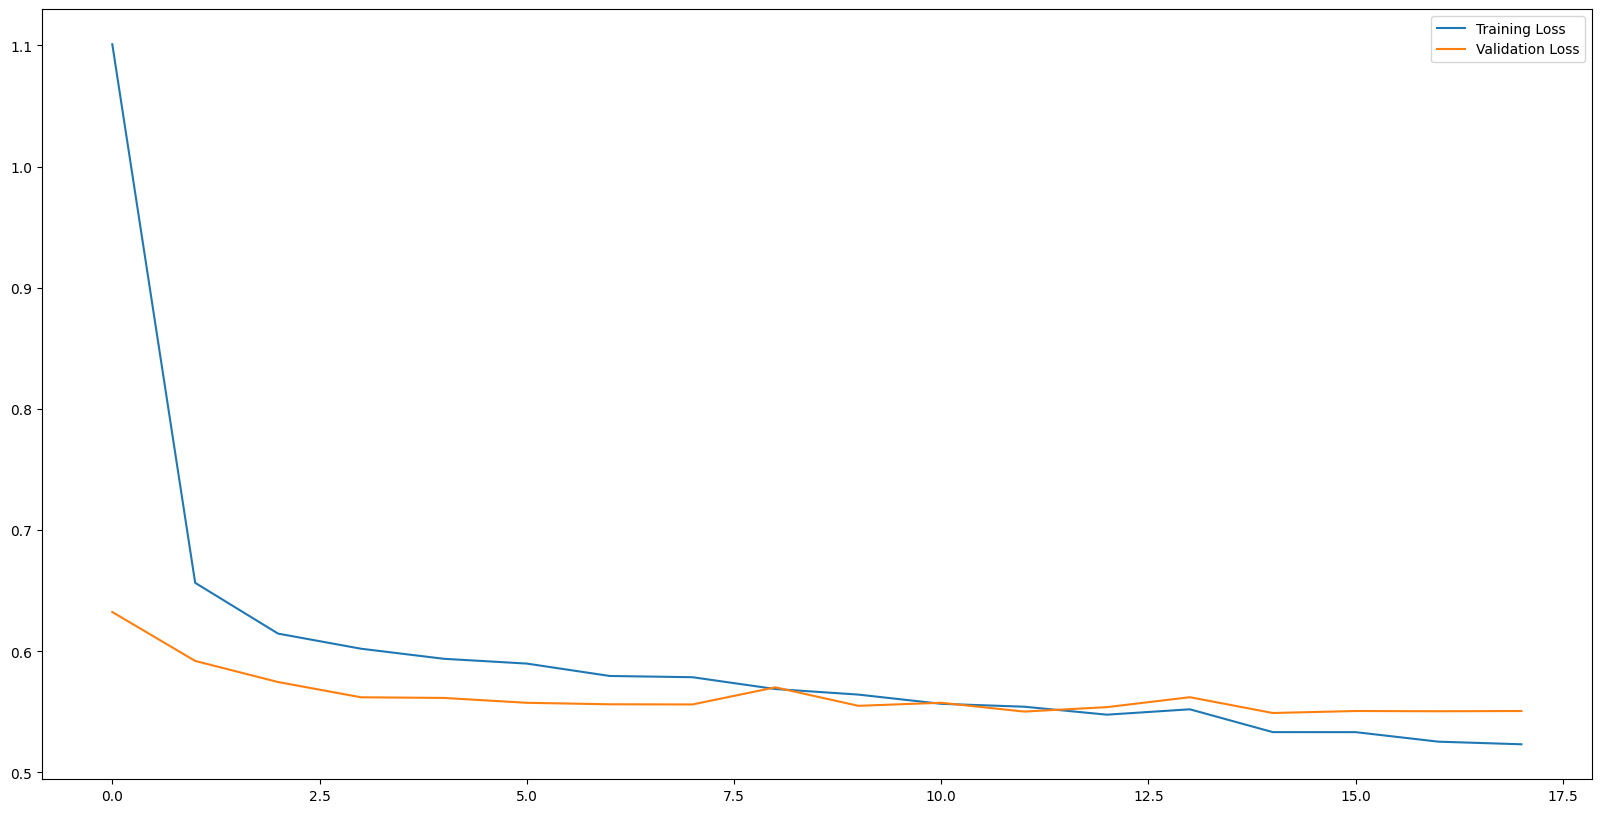

Validation Error: 0.5490961074829102


In [21]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2, random_state = 0, shuffle = True)

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, verbose=1, min_delta=0.001, mode="min", restore_best_weights=True)
cp = tf.keras.callbacks.ModelCheckpoint(r'/content/drive/MyDrive/9417/Models/gru_3_double_basic.h5', save_best_only=True, monitor='val_loss', mode='min')
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=0, min_lr=0.0001, absmode='min')

model = get_model()
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=25,
                    batch_size=128,
                    callbacks=[es, cp, rlr])

test_scores = model.predict(X_val)
results = pd.DataFrame(data = list(zip(test_scores, y_val,(test_scores-y_val))), columns = ['Pred_scores', 'Actual', 'error'])
error_l = min(history.history['val_loss'])

plot_results(history)
print(f'Validation Error: {error_l}')
results.to_csv("/content/drive/MyDrive/9417/gru_3_double_basic.csv")
results.to_pickle("/content/drive/MyDrive/9417/gru_3_double_basic.pkl")

In [22]:
pred_lst = results.Pred_scores
actual_lst = results.Actual

In [23]:
# flat is faster than item
cohesion_pred_lst = [x[0] for x in pred_lst]
cohesion_act_lst = [x[0] for x in actual_lst]

print("Pred cohesion:", cohesion_pred_lst[:5])
print("Actual cohesion:", cohesion_act_lst[:5])

syntax_pred_lst = [x[1] for x in pred_lst]
syntax_act_lst = [x[1] for x in actual_lst]

print("\nPred syntax:", syntax_pred_lst[:5])
print("Actual sytnax:", syntax_act_lst [:5])

vocabulary_pred_lst = [x[2] for x in pred_lst]
vocabulary_act_lst = [x[2] for x in actual_lst]

print("\nPred vocab:", vocabulary_pred_lst[:5])
print("Actual vocab:", vocabulary_act_lst[:5])

phraseology_pred_lst = [x[3] for x in pred_lst]
phraseology_act_lst = [x[3] for x in actual_lst]

print("\nPred phraseology:", phraseology_pred_lst[:5])
print("Actual phraseology:", phraseology_act_lst[:5])

grammar_pred_lst = [x[4] for x in pred_lst]
grammar_act_lst = [x[4] for x in actual_lst]

print("\nPred grammar:", grammar_pred_lst[:5])
print("Actual grammar:", grammar_act_lst[:5])

conventions_pred_lst = [x[5] for x in pred_lst]
conventions_act_lst = [x[5] for x in actual_lst]

print("\nPred conventions:", conventions_pred_lst[:5])
print("Actual conventions:", conventions_act_lst[:5])

Pred cohesion: [3.1585674, 3.329686, 3.241765, 2.6996403, 3.6631083]
Actual cohesion: [4.0, 3.0, 4.0, 2.5, 3.0]

Pred syntax: [2.8069313, 3.1377442, 3.1088176, 2.6021097, 3.450722]
Actual sytnax: [3.5, 3.5, 4.0, 3.0, 3.0]

Pred vocab: [2.9321089, 3.3077745, 3.3781042, 2.7567625, 3.6126003]
Actual vocab: [3.5, 3.5, 4.0, 3.5, 4.0]

Pred phraseology: [2.9045403, 3.3387673, 3.18874, 2.726001, 3.517575]
Actual phraseology: [3.5, 3.5, 3.5, 3.5, 3.0]

Pred grammar: [2.5617285, 3.217433, 2.9616249, 2.6543775, 3.3612778]
Actual grammar: [3.0, 3.5, 4.5, 3.5, 4.0]

Pred conventions: [2.7439065, 3.2934875, 3.2430398, 2.7691364, 3.590419]
Actual conventions: [3.5, 3.0, 4.5, 3.0, 4.0]


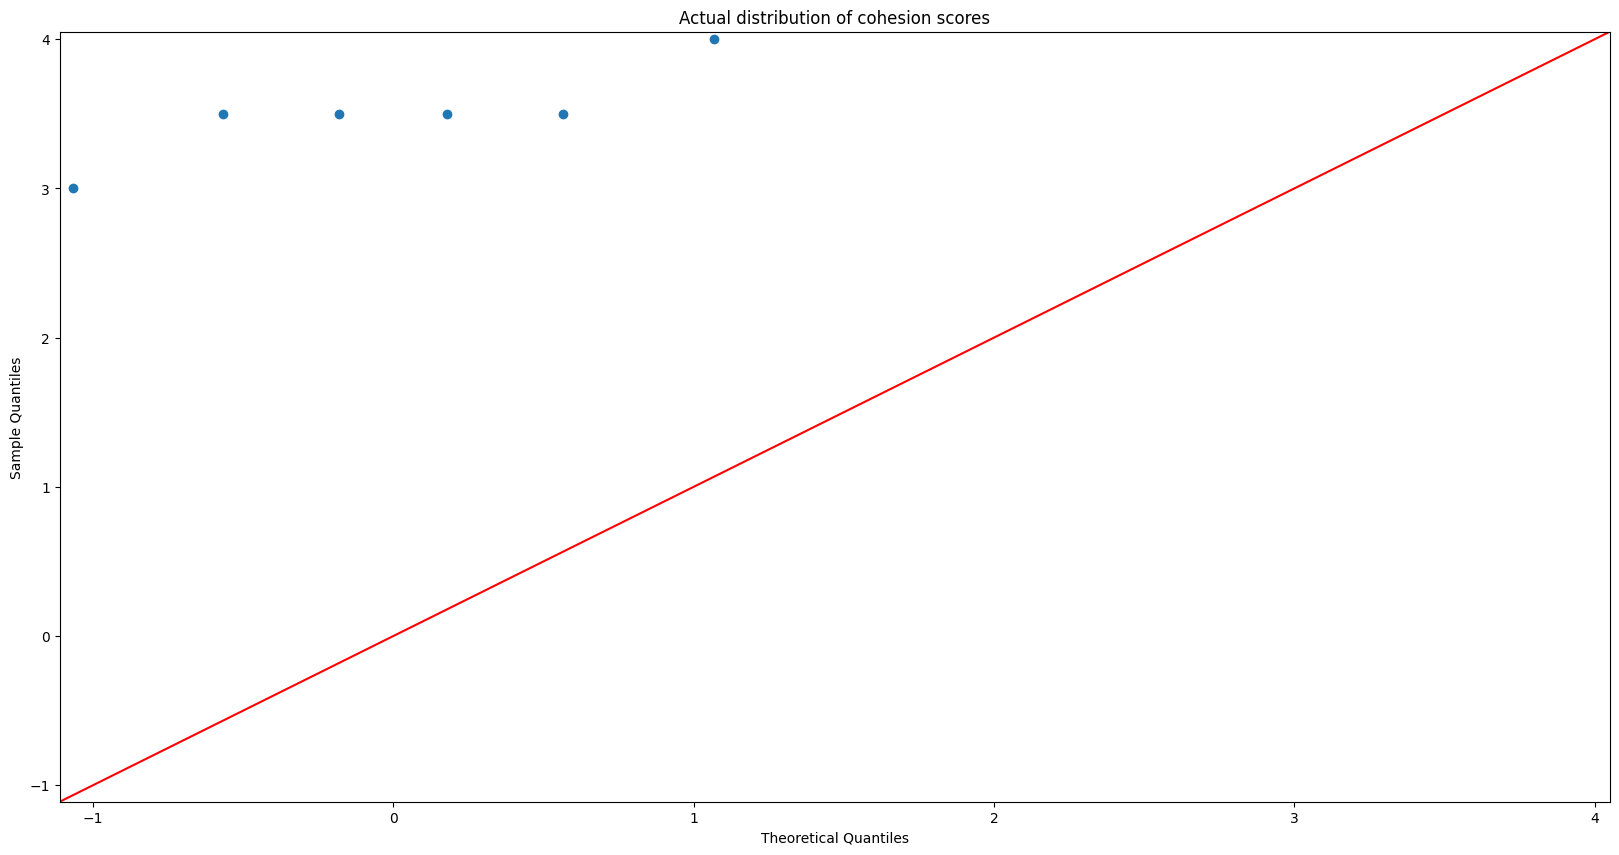

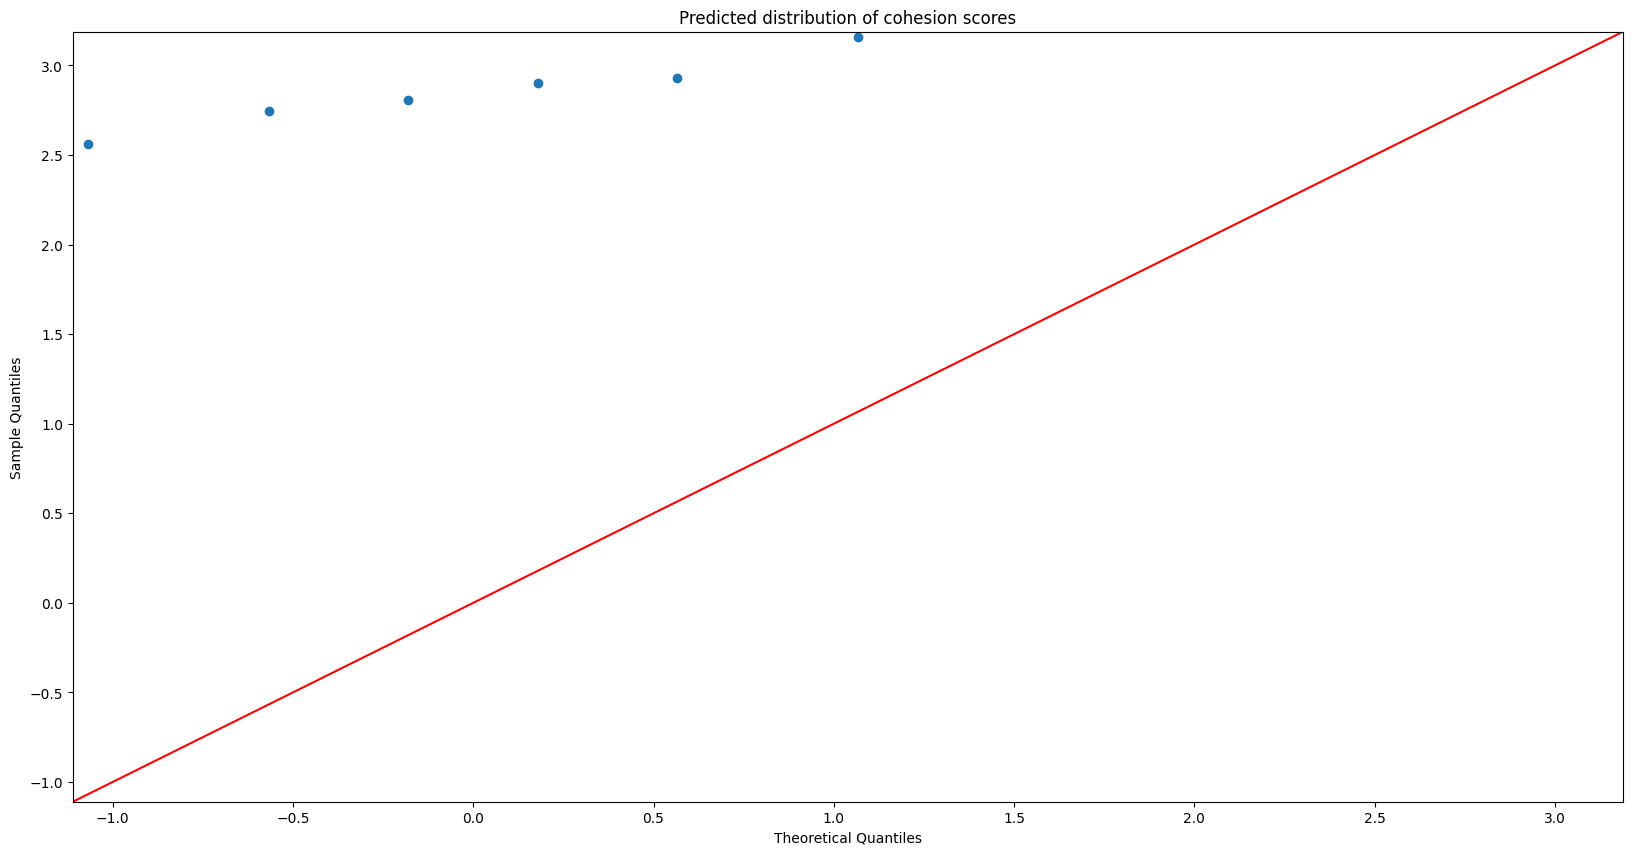

In [24]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(data = results['Actual'][0], line ='45')
py.title("Actual distribution of cohesion scores")
sm.qqplot(data = results['Pred_scores'][0], line ='45')
py.title("Predicted distribution of cohesion scores")
py.show()

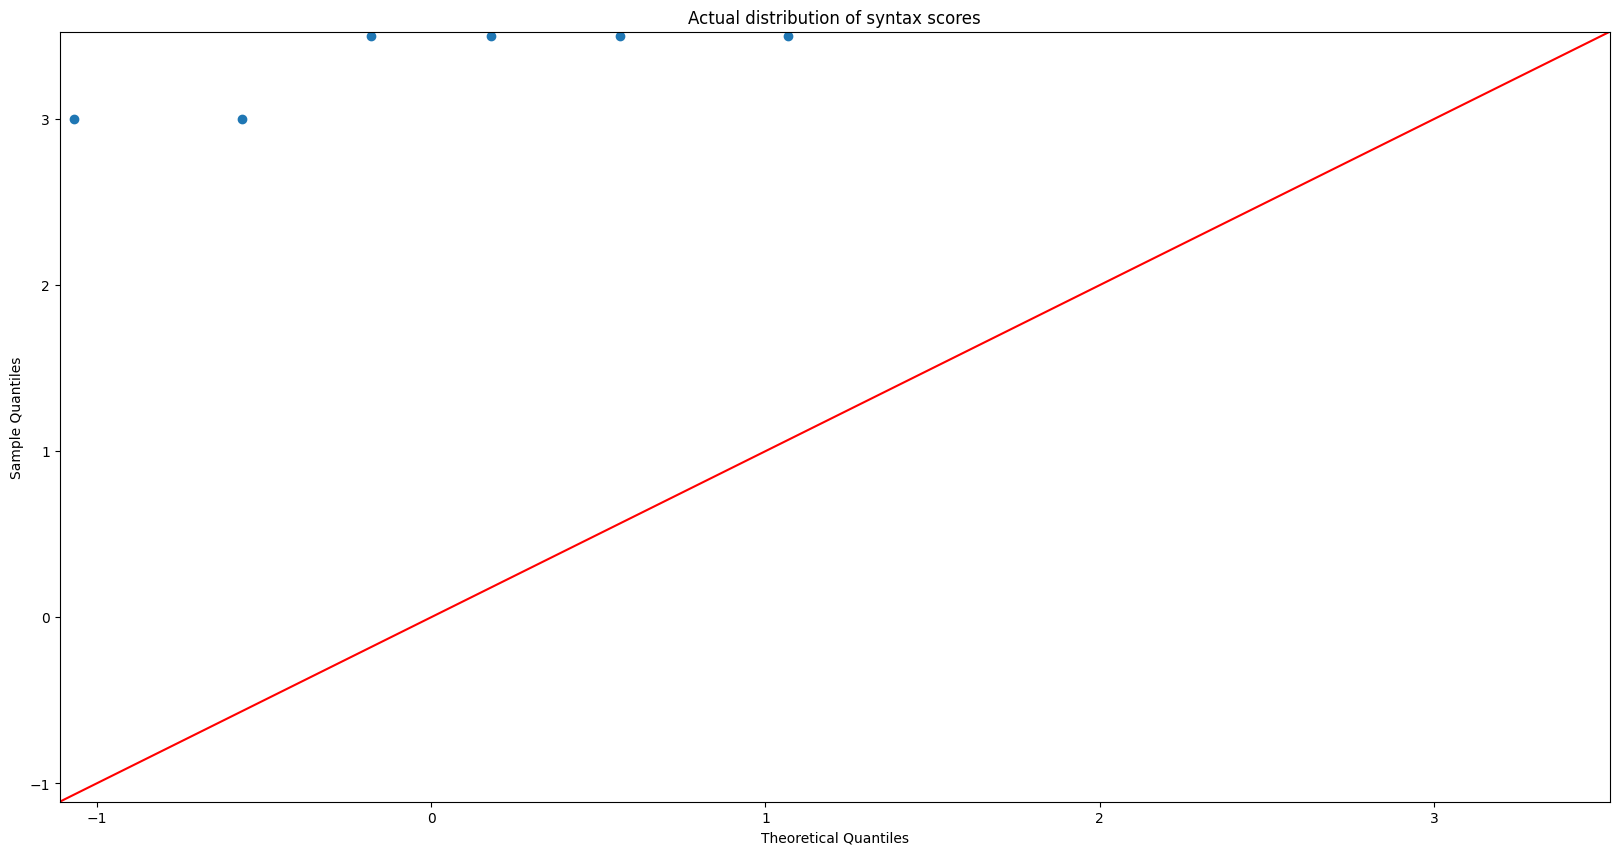

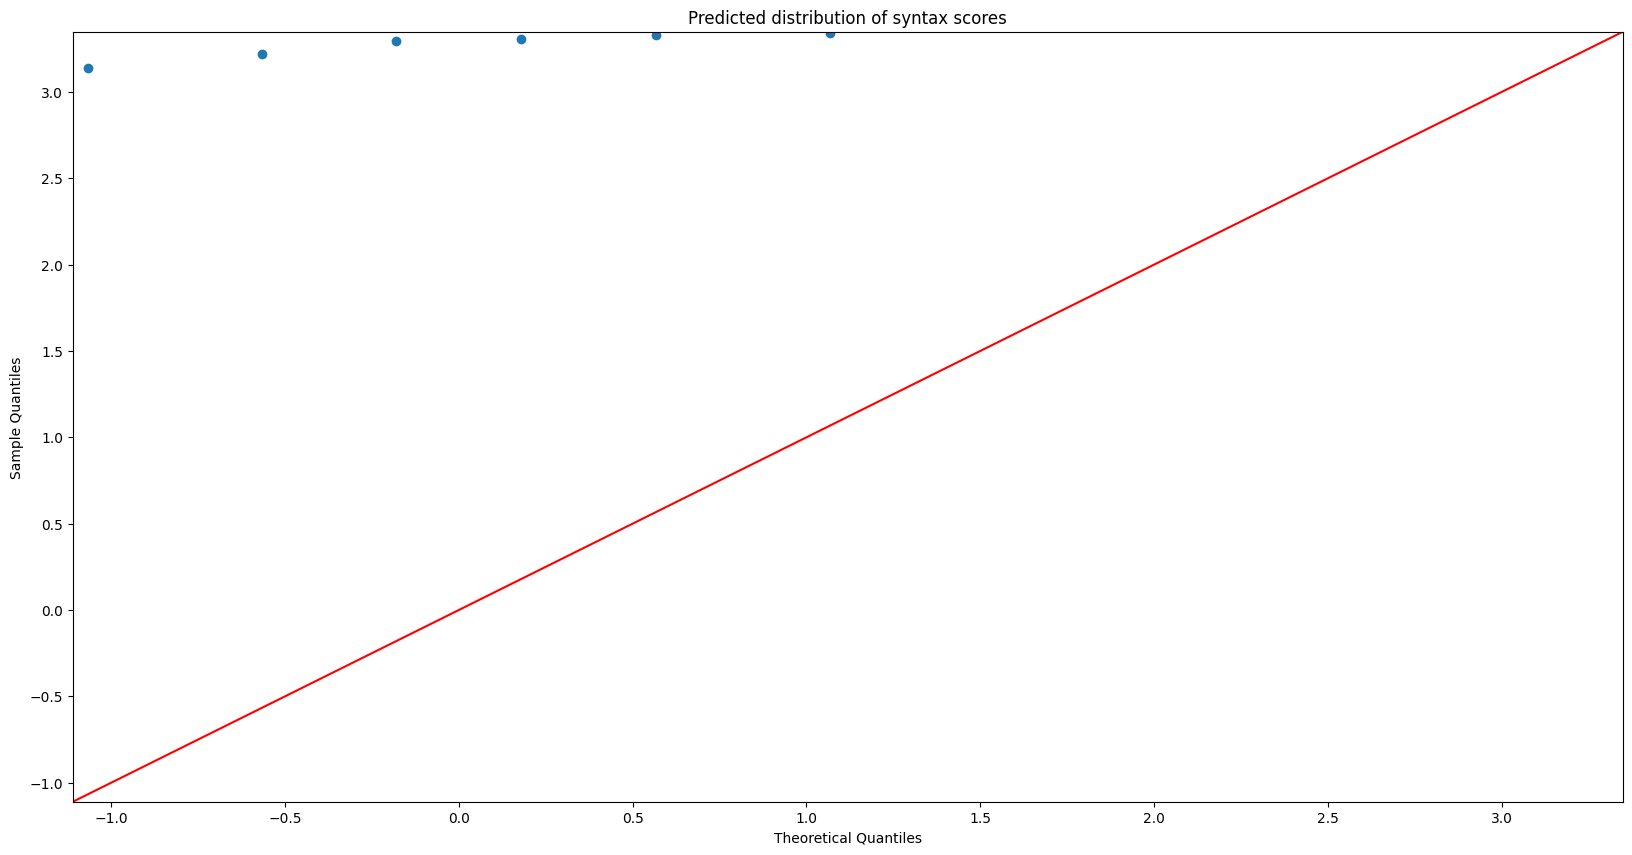

In [25]:
sm.qqplot(data = results['Actual'][1], line ='45')
py.title("Actual distribution of syntax scores")
sm.qqplot(data = results['Pred_scores'][1], line ='45')
py.title("Predicted distribution of syntax scores")
py.show()

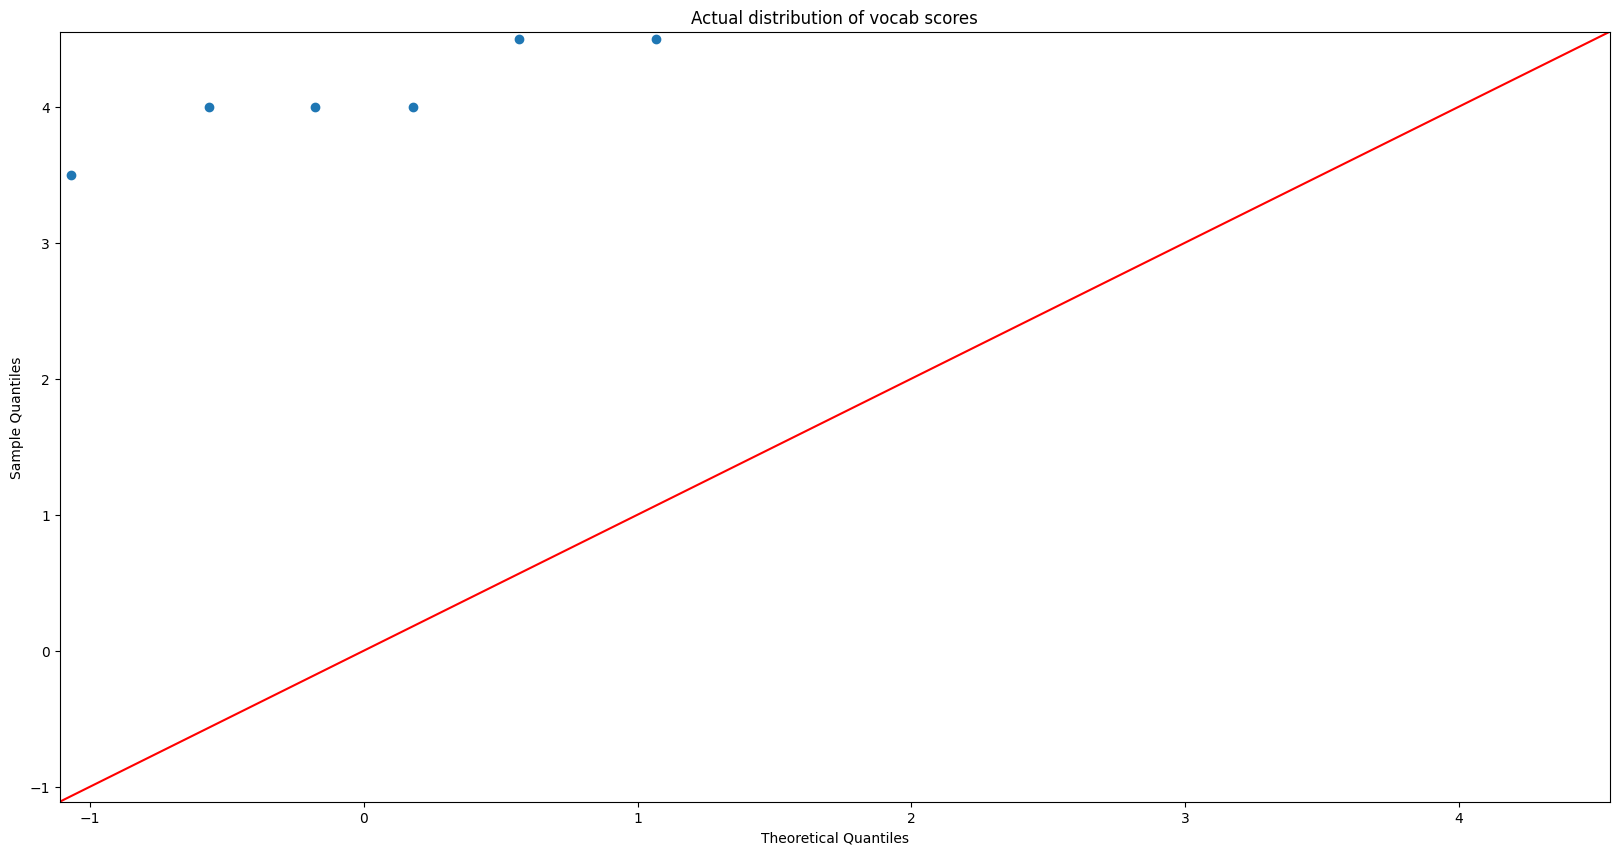

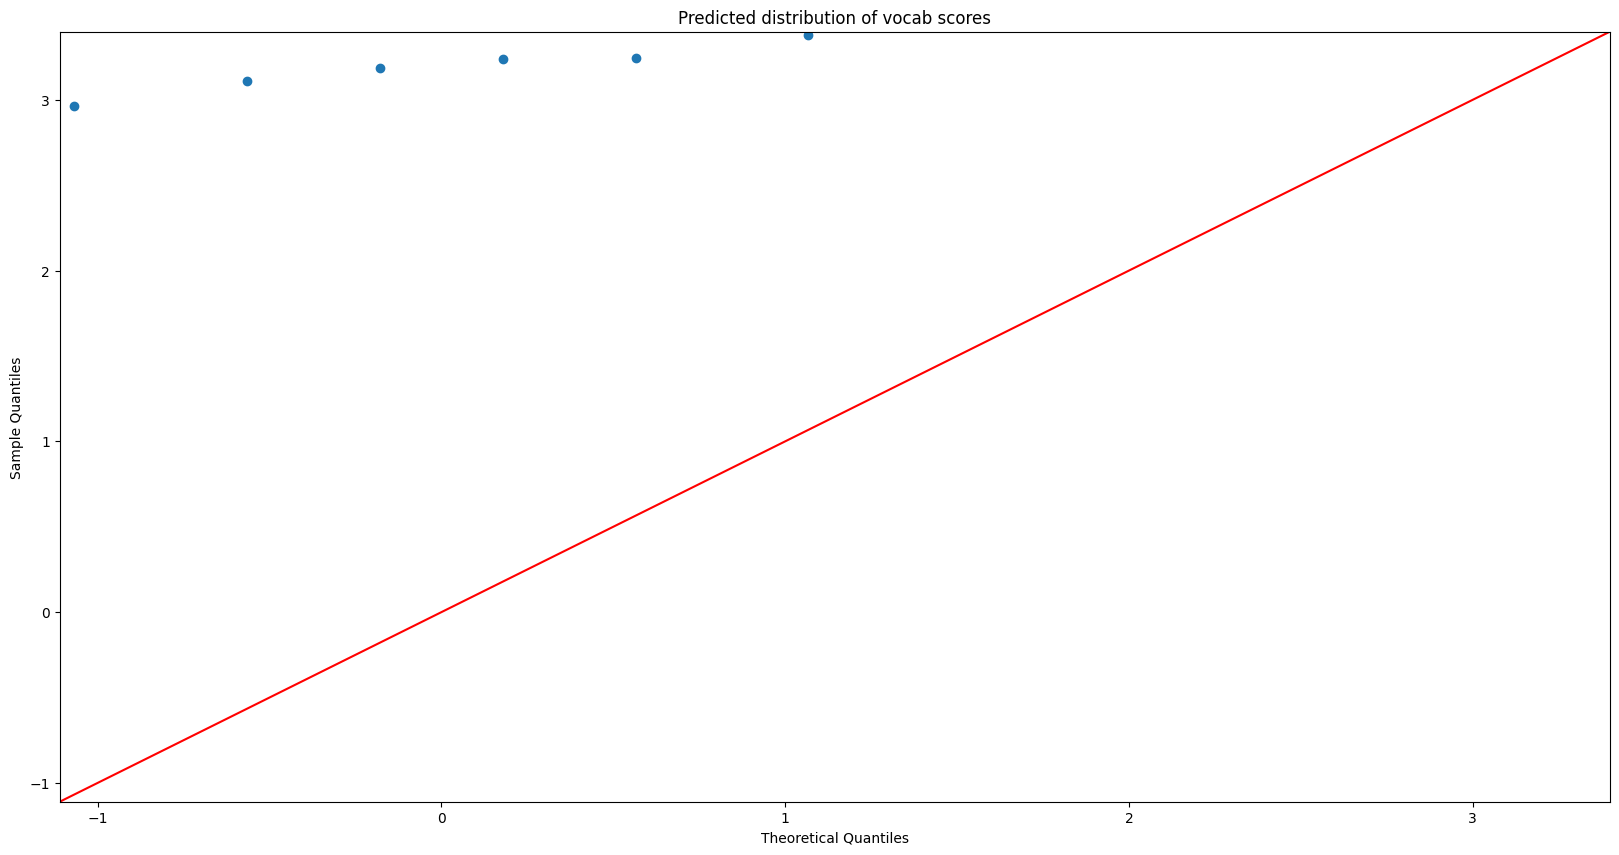

In [26]:
sm.qqplot(data = results['Actual'][2], line ='45')
py.title("Actual distribution of vocab scores")
sm.qqplot(data = results['Pred_scores'][2], line ='45')
py.title("Predicted distribution of vocab scores")
py.show()

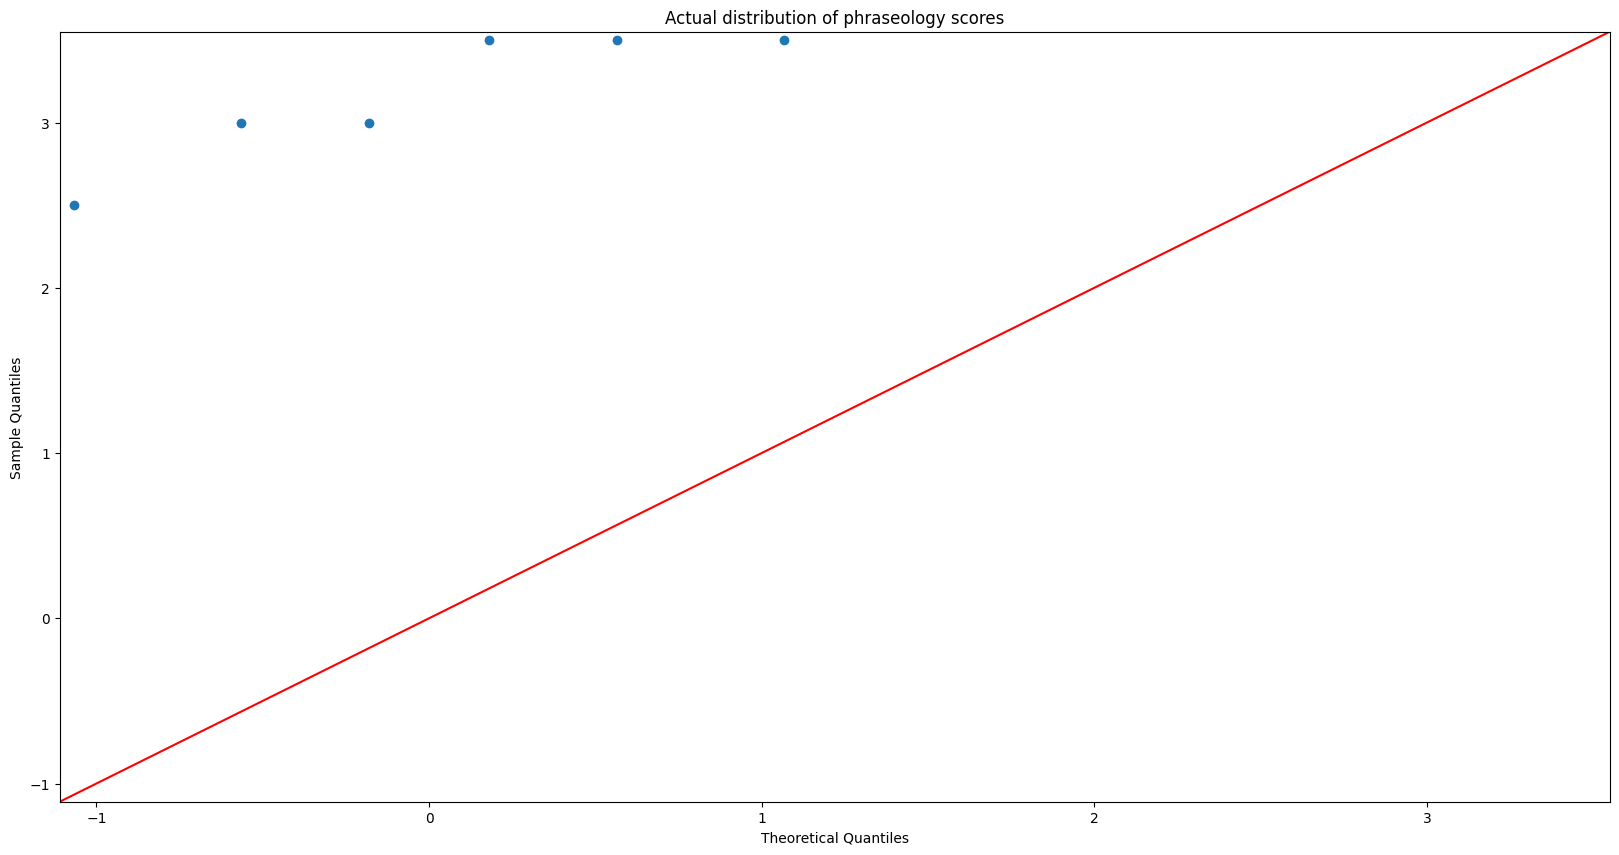

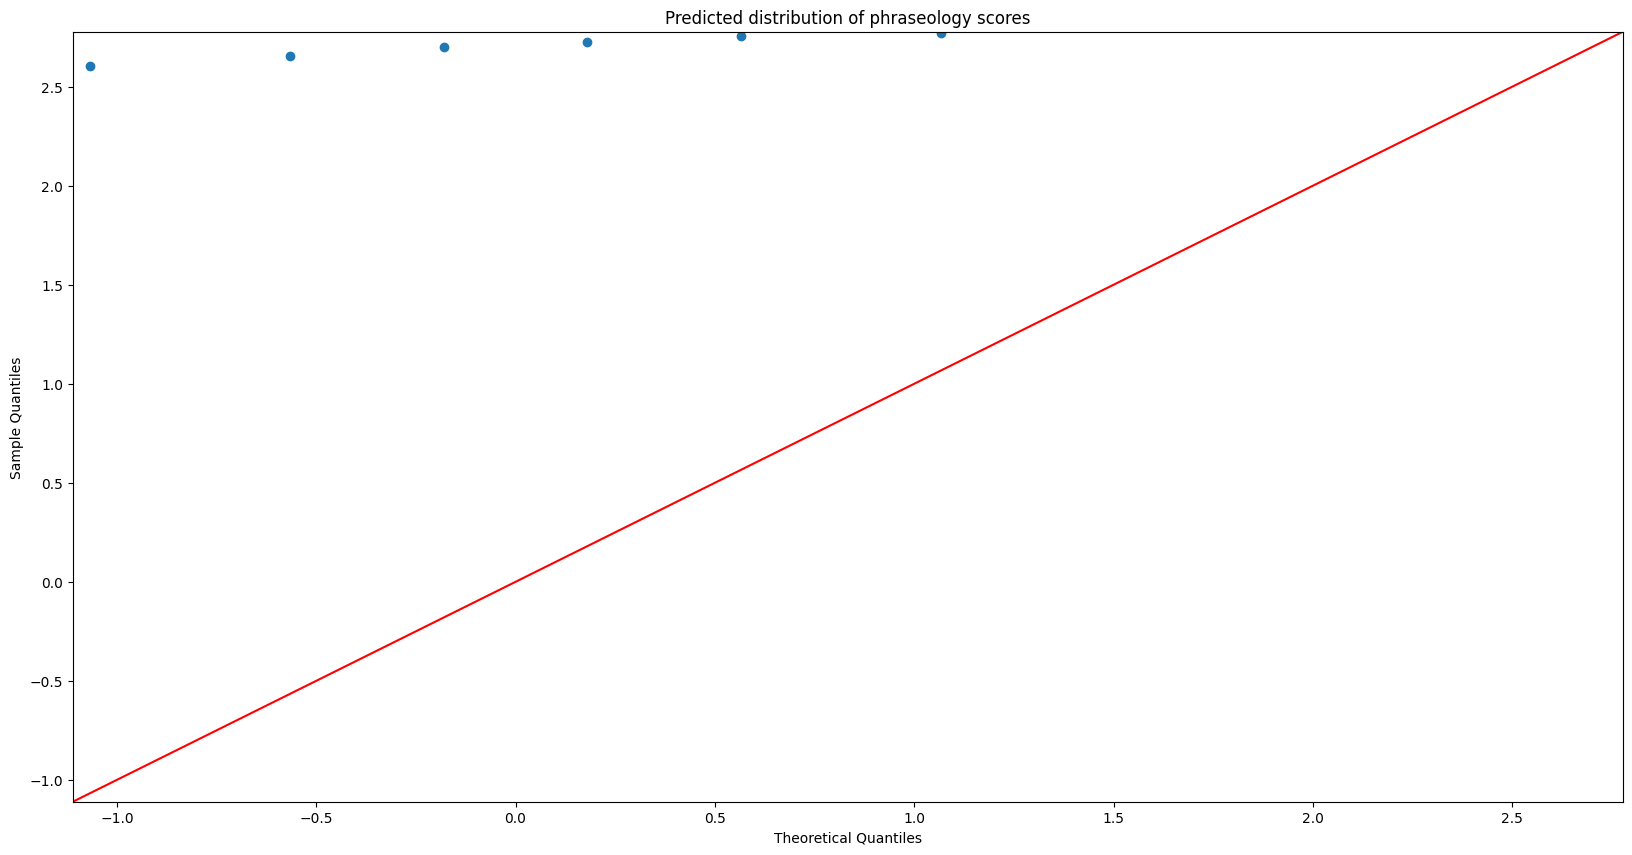

In [27]:
sm.qqplot(data = results['Actual'][3], line ='45')
py.title("Actual distribution of phraseology scores")
sm.qqplot(data = results['Pred_scores'][3], line ='45')
py.title("Predicted distribution of phraseology scores")
py.show()

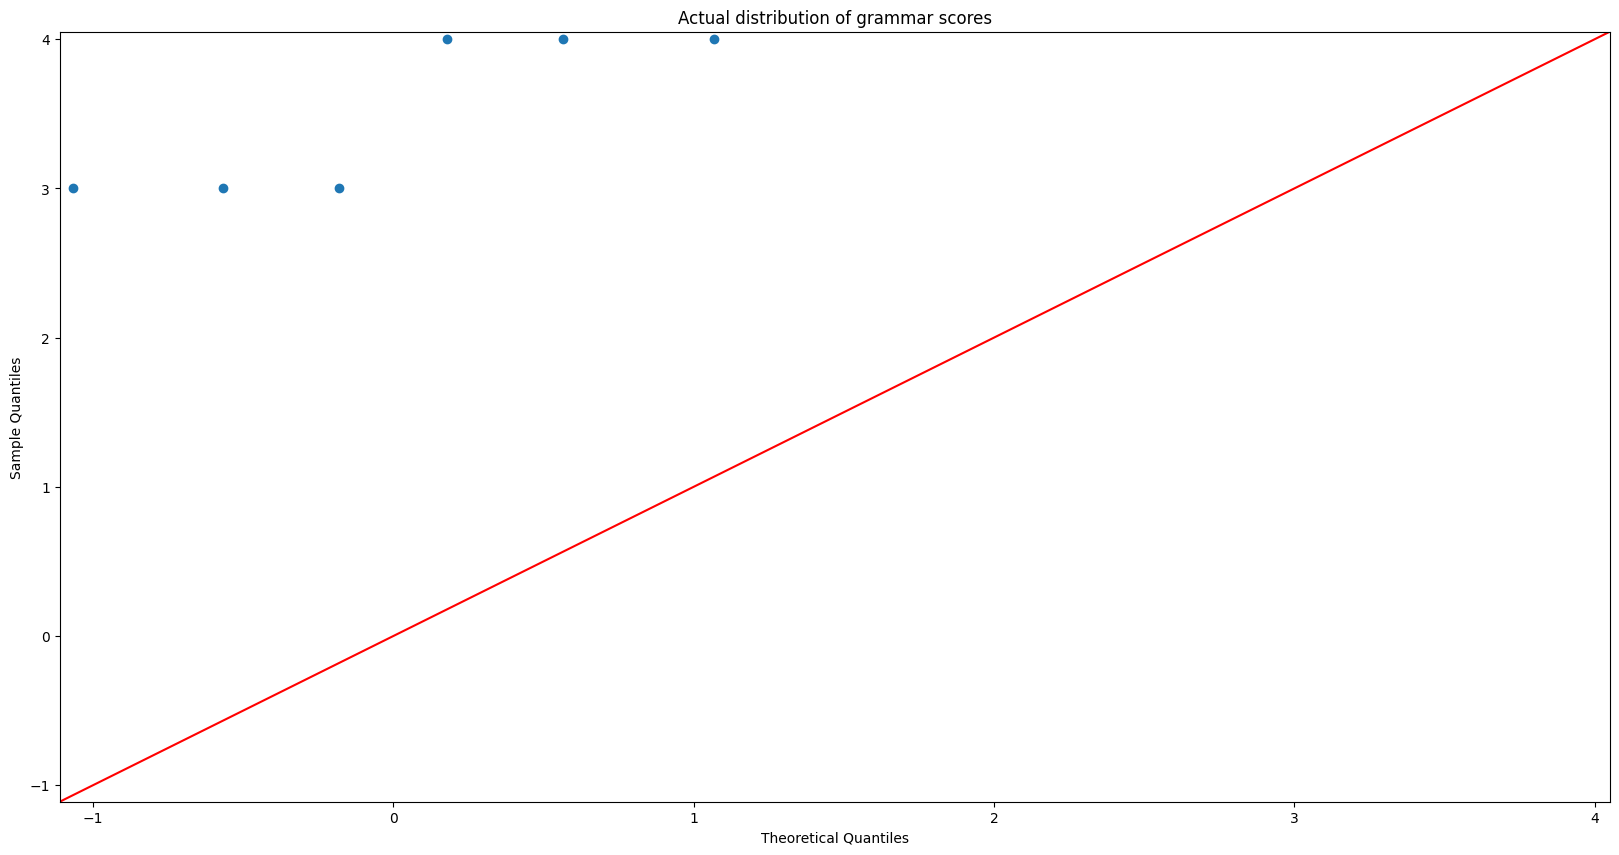

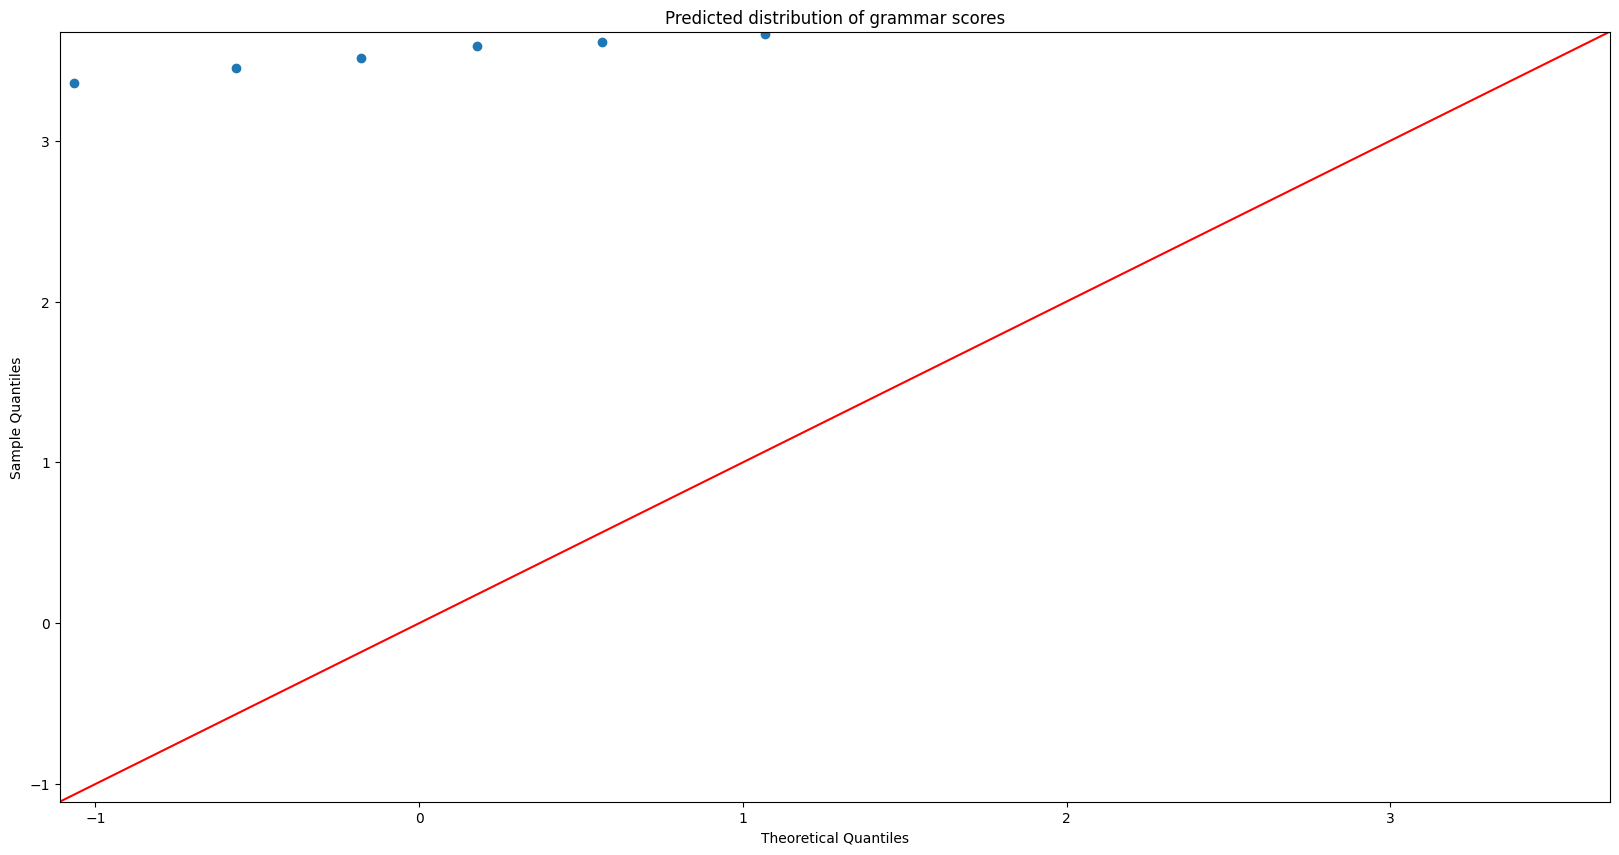

In [28]:
sm.qqplot(data = results['Actual'][4], line ='45')
py.title("Actual distribution of grammar scores")
sm.qqplot(data = results['Pred_scores'][4], line ='45')
py.title("Predicted distribution of grammar scores")
py.show()

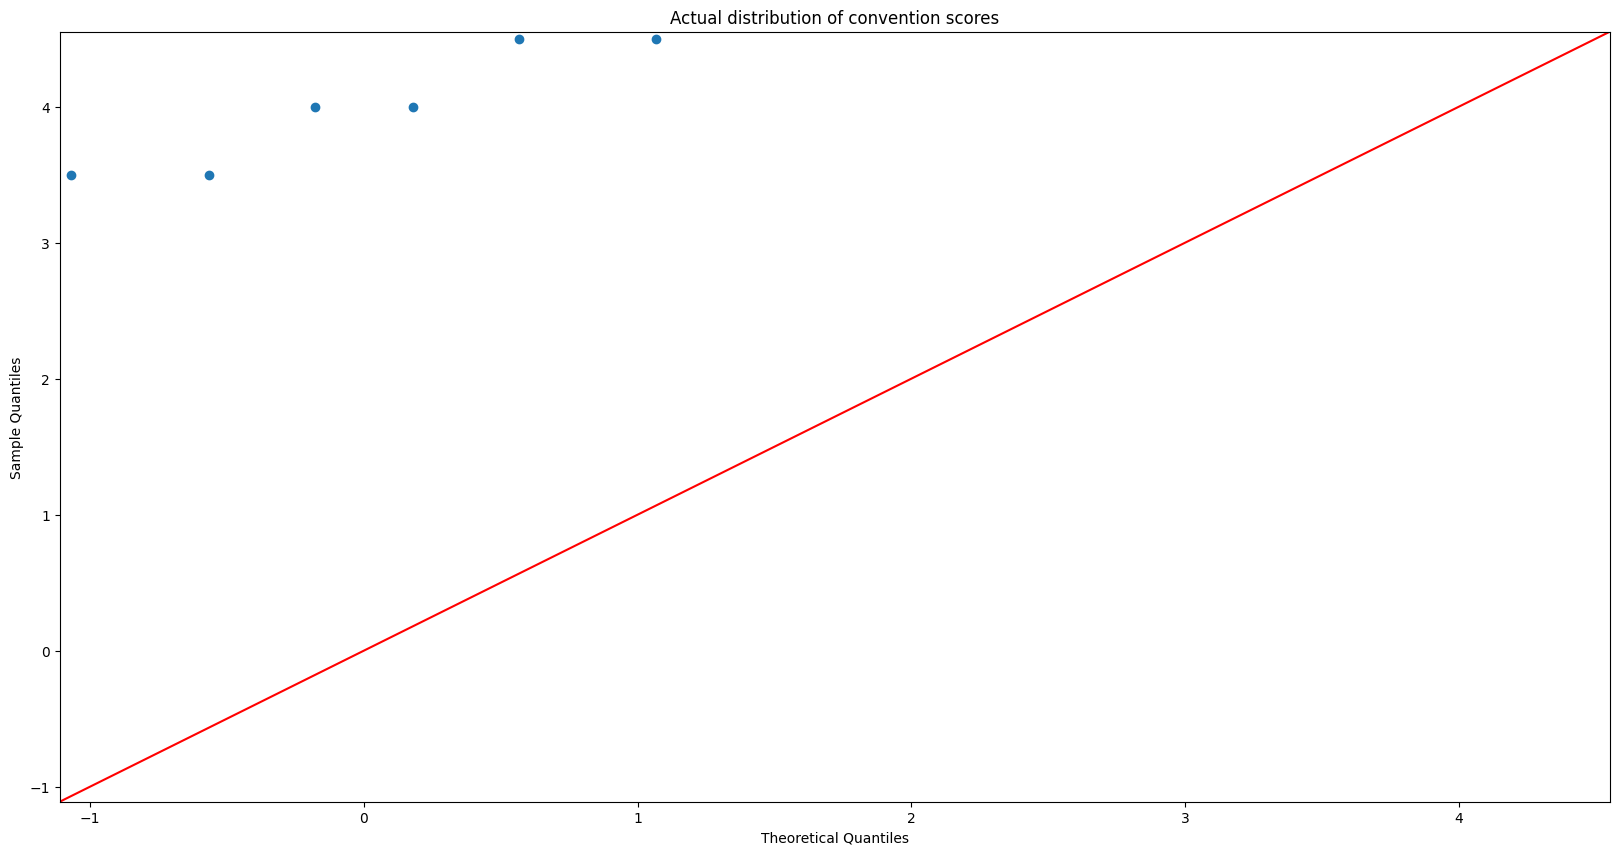

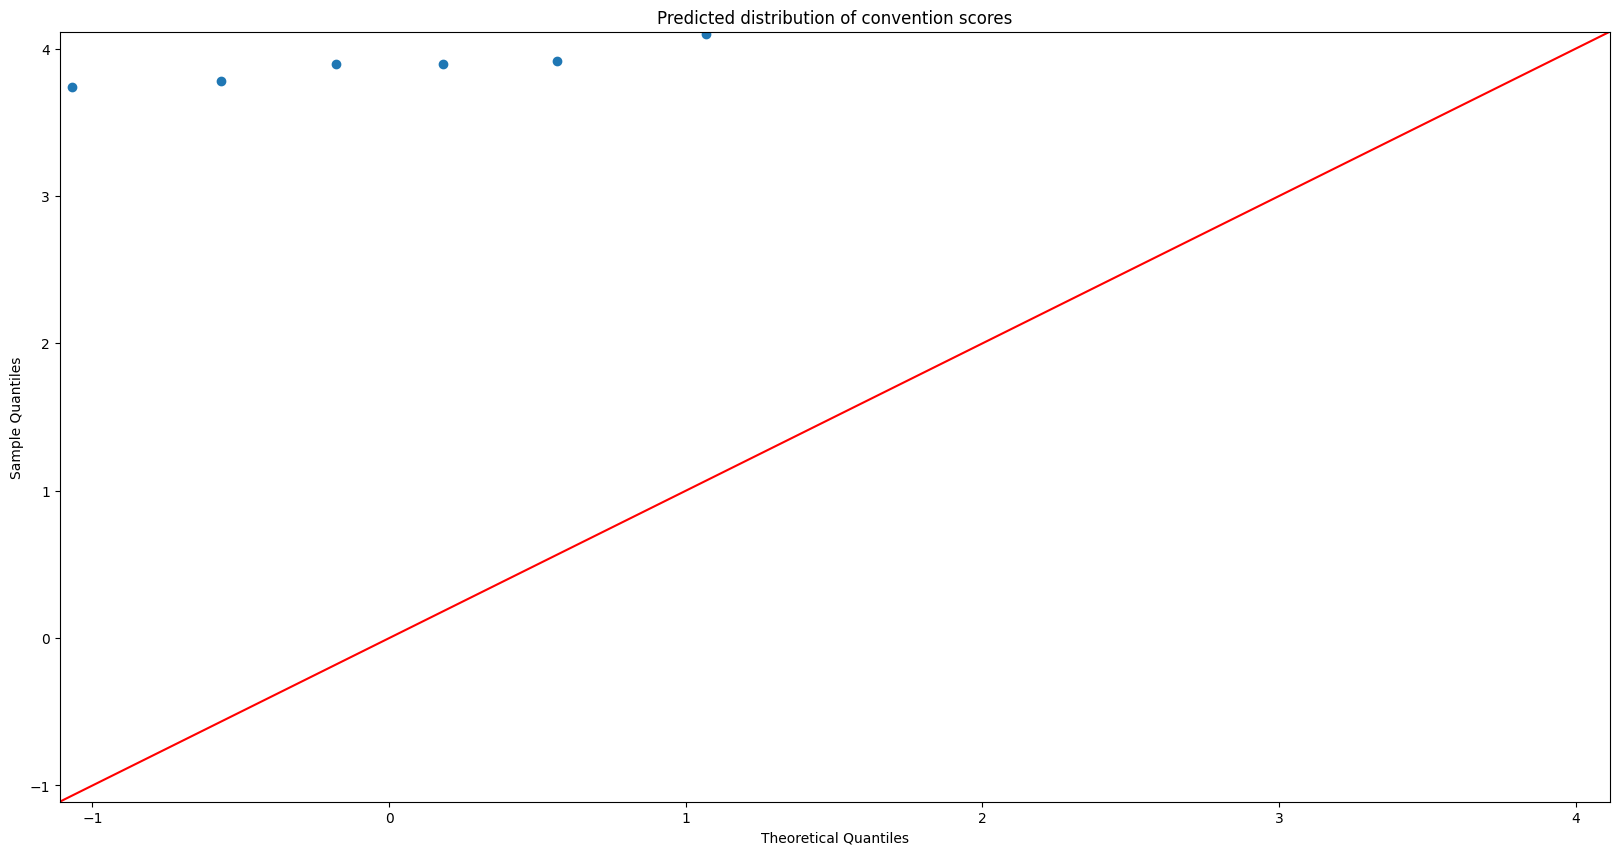

In [29]:
sm.qqplot(data = results['Actual'][5], line ='45')
py.title("Actual distribution of convention scores")
sm.qqplot(data = results['Pred_scores'][5], line ='45')
py.title("Predicted distribution of convention scores")
py.show()

In [30]:
iterations = X_val.shape[0]
iterations

783

In [31]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(X_val[num]))
#nonzero_count

In [32]:
proof_df = results
proof_df['nonzero'] = nonzero_count

In [33]:
import seaborn as sns
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])
test_scores[1].shape

[array([3.1585674, 2.8069313, 2.9321089, 2.9045403, 2.5617285, 2.7439065],
       dtype=float32)
 array([3.329686 , 3.1377442, 3.3077745, 3.3387673, 3.217433 , 3.2934875],
       dtype=float32)
 array([3.241765 , 3.1088176, 3.3781042, 3.18874  , 2.9616249, 3.2430398],
       dtype=float32)
 array([2.6996403, 2.6021097, 2.7567625, 2.726001 , 2.6543775, 2.7691364],
       dtype=float32)
 array([3.6631083, 3.450722 , 3.6126003, 3.517575 , 3.3612778, 3.590419 ],
       dtype=float32)                                                     ]


(6,)

In [34]:
results['nonzero'] = nonzero_count

In [35]:
pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

[2.8512971, 3.2708156, 3.1870153, 2.7013378, 3.5326173]

In [36]:
corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

<Axes: >

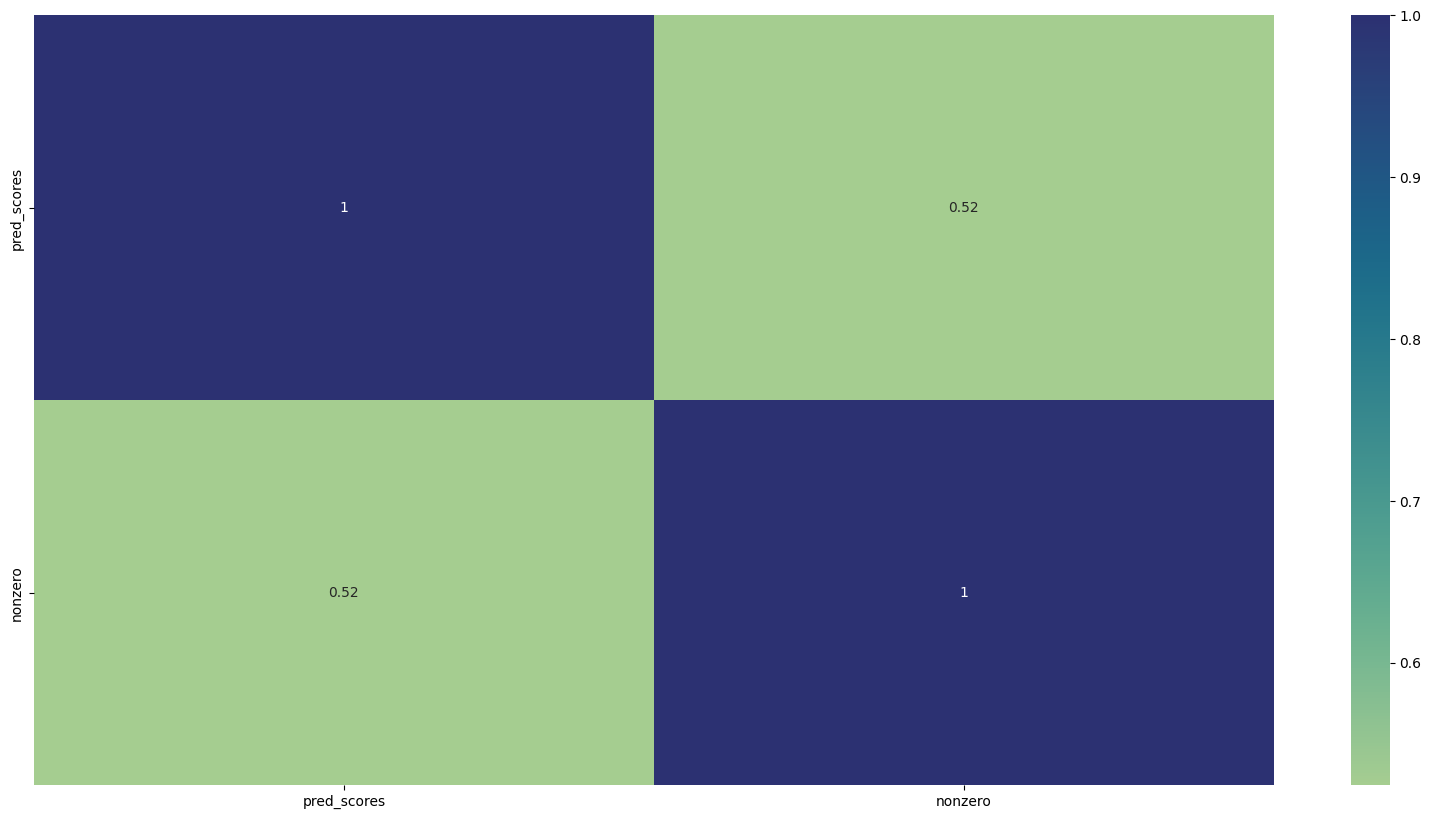

In [37]:
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

<Axes: >

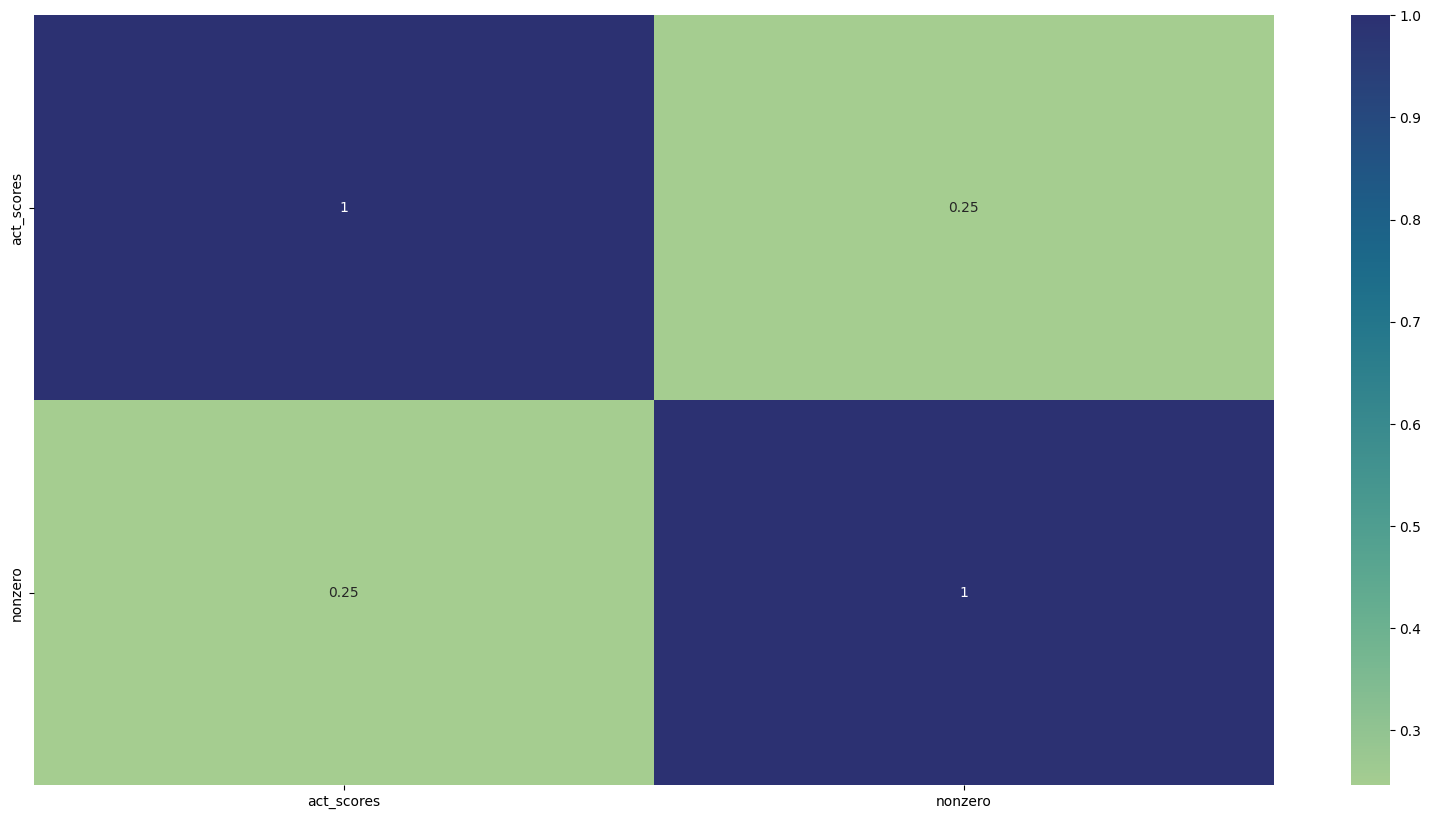

In [38]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

array([[<Axes: title={'center': 'act_scores'}>]], dtype=object)

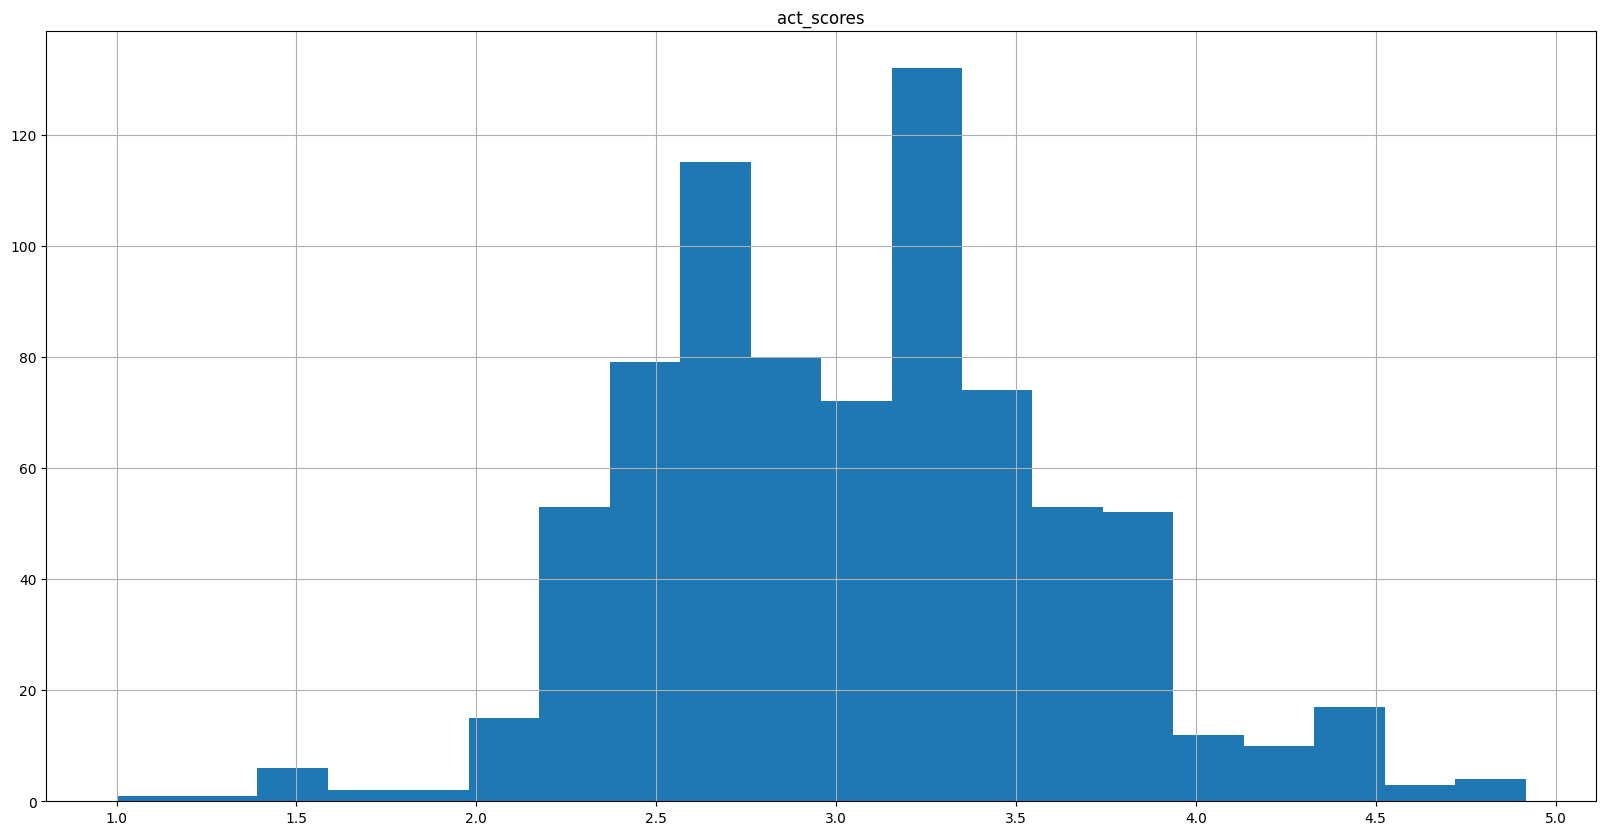

In [39]:
act_corr_df.hist(column = 'act_scores', bins = 20)

array([[<Axes: title={'center': 'pred_scores'}>]], dtype=object)

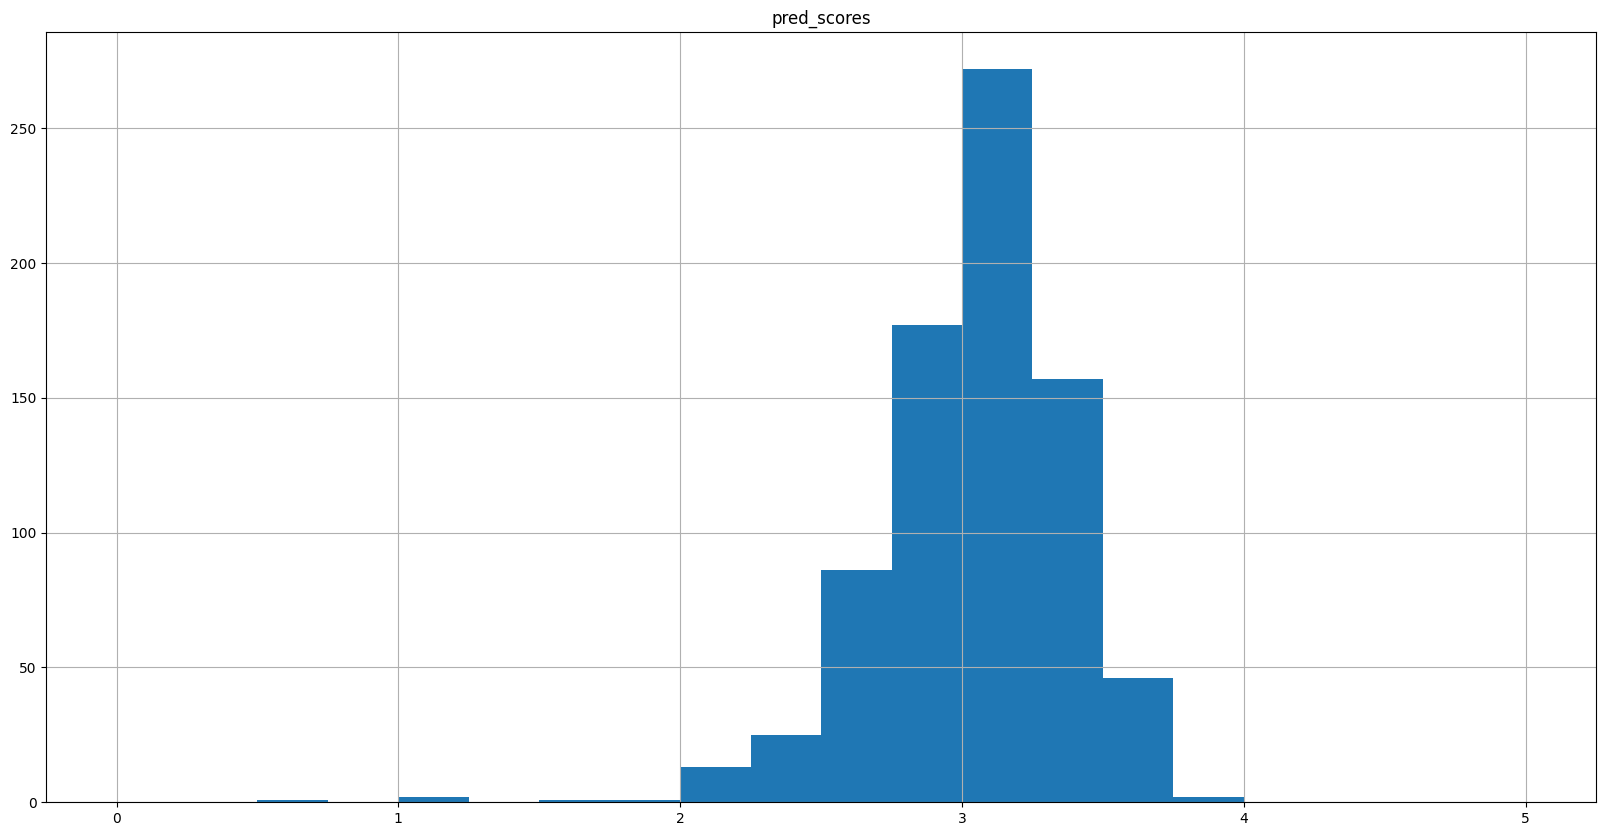

In [40]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [0, 5.0])

In [41]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.0925658
Actual median :  3.0


In [42]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.011018131
Actual mean variance :  0.11895132680573293


## Submission

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
sub = pd.read_csv('/content/drive/MyDrive/9417/Data/sample_submission.csv')
xtest_tokenizer = Tokenizer()
df_test = pd.read_csv('/content/drive/MyDrive/9417/Data/test.csv')
xtest = clean_input(df_test)
df_test['cleaned_text'] = xtest
xtest_tokenizer.fit_on_texts(df_test['cleaned_text'])

X_test = get_training_data(df_test, xtest_tokenizer, None)

from keras.models import model_from_json
with open('/content/drive/MyDrive/9417/Models/gru_3_double_basic.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('/content/drive/MyDrive/9417/Models/gru_3_double_basic.h5')

pred = model.predict(X_test)

for index, row in df_test.iterrows():
    sub_index = sub[sub['text_id']==row['text_id']].index
    sub.iloc[sub_index, 1] = pred[sub_index,0]
    sub.iloc[sub_index, 2] = pred[sub_index,1]
    sub.iloc[sub_index, 3] = pred[sub_index,2]
    sub.iloc[sub_index, 4] = pred[sub_index,3]
    sub.iloc[sub_index, 5] = pred[sub_index,4]
    sub.iloc[sub_index, 6] = pred[sub_index,5]

sub['text_id'] = sub['text_id']
sub.to_csv('/content/drive/MyDrive/9417/Data/gru_3_double_basic_submission.csv', index=False)

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


Cleaning Progress: 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]


1/1 [==============================] - 3s 3s/step


## GRU Double Attention

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import contractions
import nltk
import tqdm
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators
import re
import statsmodels.api as sm
import string
import gensim #nlp
import os

from tensorflow import keras #for deep learning
from tensorflow.keras.utils import to_categorical #vector (int) to binary class matrix.
from keras import backend as K #function wrapper
from tensorflow.keras import backend as backend
from keras.layers import * #for nn
from keras.activations import * #for non linearity
from keras.preprocessing.sequence import pad_sequences #ensures same length for nn
from keras.preprocessing.text import text_to_word_sequence #tokenize text to words
from keras.preprocessing.text import Tokenizer
from nltk import ngrams #generate n-grams from a given sequence of tokens
from nltk.corpus import stopwords #reduce noise and improve the efficiency
from sklearn.model_selection import train_test_split, KFold #iterates through different combinations of train-test splits for model evaluation
from matplotlib import rcParams
from tensorflow.keras.layers import Embedding, GRU

# Tokenizer
nlp = spacy.load('en_core_web_sm') #load a pre-trained English language model in spaCy.

df = pd.read_csv('/content/drive/MyDrive/9417/Data/train.csv')

# figure size in inches
rcParams['figure.figsize'] = 20, 10
TARGET_COLS = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

In [6]:
def clean_input(df):
  proc_text = [contractions.fix(text) for text in df['full_text']]
  def more_processing(text):
      text = '<sostok> ' + text + ' <eostok>'
      text = text.lower()
      return text

  proc_text_2 = [more_processing(text) for text in proc_text]
  nlp = spacy.load("en_core_web_md", disable=['senter', 'parser', 'ner'])
  print(nlp.pipe_names)

  pipeline = spacy_cleaner.Pipeline(
      nlp,
      removers.remove_stopword_token,
      removers.remove_punctuation_token,
      replacers.replace_number_token,
      mutators.mutate_lemma_token,
  )
  cleaned_text = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
  return cleaned_text

In [7]:
# Load cleaned text
import pickle
with open('/content/drive/MyDrive/9417/proc_text_3.pkl', 'rb') as f:
    proc_text_3 = pickle.load(f)

In [8]:
# Also added start of seq and end of seq, lowercase
df['cleaned_text'] = proc_text_3

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(df['cleaned_text'])
x_vocab_size = len(x_tokenizer.word_index) + 1

In [11]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = '/content/drive/MyDrive/9417/glove.6B.50d.txt' # 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file, encoding='utf-8') as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix


#x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

In [12]:
embedding_dim = 50

x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10171 words (7296 misses)


In [13]:
MAXLEN = int(df['cleaned_text'].str.len().max())
MAXLEN_W = int(df['cleaned_text'].str.split().str.len().max())
print("Max. letters length: ", MAXLEN)
print("Max. words length: ", MAXLEN_W)
VECTOR_SIZE = 100
max_text_len = 500

Max. letters length:  3361
Max. words length:  487


In [14]:
#root mean squared error
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)

In [15]:
#https://www.tensorflow.org/text/tutorials/text_classification_rnn
#Implement a GRU block as a Keras layer and use it for text classification.

class GRU_4_Double_Attention_Model():
    def build():
        embed_units = 50  # Embedding size for each token
        inputs = Input(shape=(max_text_len,))
        embedding_layer = Embedding(input_dim = x_vocab_size,
                                    output_dim = embed_units,
                                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                                    input_length=max_text_len, trainable = False, mask_zero = True)(inputs)

        gru_layer = GRU(256, return_sequences=True)(embedding_layer)

        attention_weights = dot([gru_layer, gru_layer], axes=[2, 2])
        attention_weights = Dense(units=max_text_len, activation='relu')(attention_weights)
        context_vector = dot([attention_weights, gru_layer], axes=[2, 1])
        attention_output = GRU(units=256)(context_vector)

        fc1 = Dense(512, activation="relu")(attention_output)
        drop_1 = Dropout(0.2)(fc1)
        outputs = Dense(6, activation='linear')(drop_1)

        model = keras.Model(inputs=inputs, outputs=outputs)
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss=mean_columnwise_root_mean_squared_error)
        return model

def get_model():
    model = GRU_4_Double_Attention_Model.build()
    return model

In [16]:
with open('/content/drive/MyDrive/9417/Models/gru_4_double_attention.json', 'w') as f:
    f.write(get_model().to_json())
backend.clear_session()
get_model().summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 500, 50)              873400    ['input_1[0][0]']             
                                                                                                  
 gru (GRU)                   (None, 500, 256)             236544    ['embedding[0][0]']           
                                                                                                  
 dot (Dot)                   (None, 500, 500)             0         ['gru[0][0]',                 
                                                                     'gru[0][0]']             

In [17]:
def get_training_data(df, x_tokenizer, mode='fit'):
    X = []
    y = []

    x_sequence = x_tokenizer.texts_to_sequences(df['cleaned_text'])
    X = pad_sequences(x_sequence, maxlen=max_text_len, padding='pre')

    if mode == 'fit':
        for index, row in df.iterrows():
            labels = [row['cohesion'], row['syntax'], row['vocabulary'], row['phraseology'], row['grammar'], row['conventions']]
            y.append(labels)

    if mode == 'fit':
        return np.array(X), np.array(y)
    else:
        return np.array(X)


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
X, y = get_training_data(df, x_tokenizer)
print(f'Train X shape: {X.shape}')
print(f'Train y shape: {y.shape}')

Train X shape: (3911, 500)
Train y shape: (3911, 6)


In [20]:
def plot_results(history):
    x = np.arange(0, len(history.history["loss"]))

    sns.lineplot(x=x, y=history.history["loss"], label='Training Loss')
    sns.lineplot(x=x, y=history.history["val_loss"], label='Validation Loss')
    plt.legend()

    plt.show()

Epoch 1/25


Instructions for updating:
Use fn_output_signature instead


25/25 [==============================] - ETA: 0s - loss: 0.8876 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



25/25 [==============================] - 384s 15s/step - loss: 0.8876 - val_loss: 0.5955 - lr: 0.0010
Epoch 2/25
25/25 [==============================] - 365s 15s/step - loss: 0.6439 - val_loss: 0.5854 - lr: 0.0010
Epoch 3/25
25/25 [==============================] - 361s 15s/step - loss: 0.6242 - val_loss: 0.5841 - lr: 0.0010
Epoch 4/25
25/25 [==============================] - 362s 15s/step - loss: 0.6149 - val_loss: 0.5809 - lr: 0.0010
Epoch 5/25
25/25 [==============================] - 352s 14s/step - loss: 0.6213 - val_loss: 0.6266 - lr: 0.0010
Epoch 6/25
25/25 [==============================] - 363s 15s/step - loss: 0.6119 - val_loss: 0.5704 - lr: 0.0010
Epoch 7/25
25/25 [==============================] - 365s 15s/step - loss: 0.6060 - val_loss: 0.5753 - lr: 0.0010
Epoch 8/25
25/25 [==============================] - 346s 14s/step - loss: 0.5926 - val_loss: 0.5754 - lr: 0.0010
Epoch 9/25
25/25 [=========================

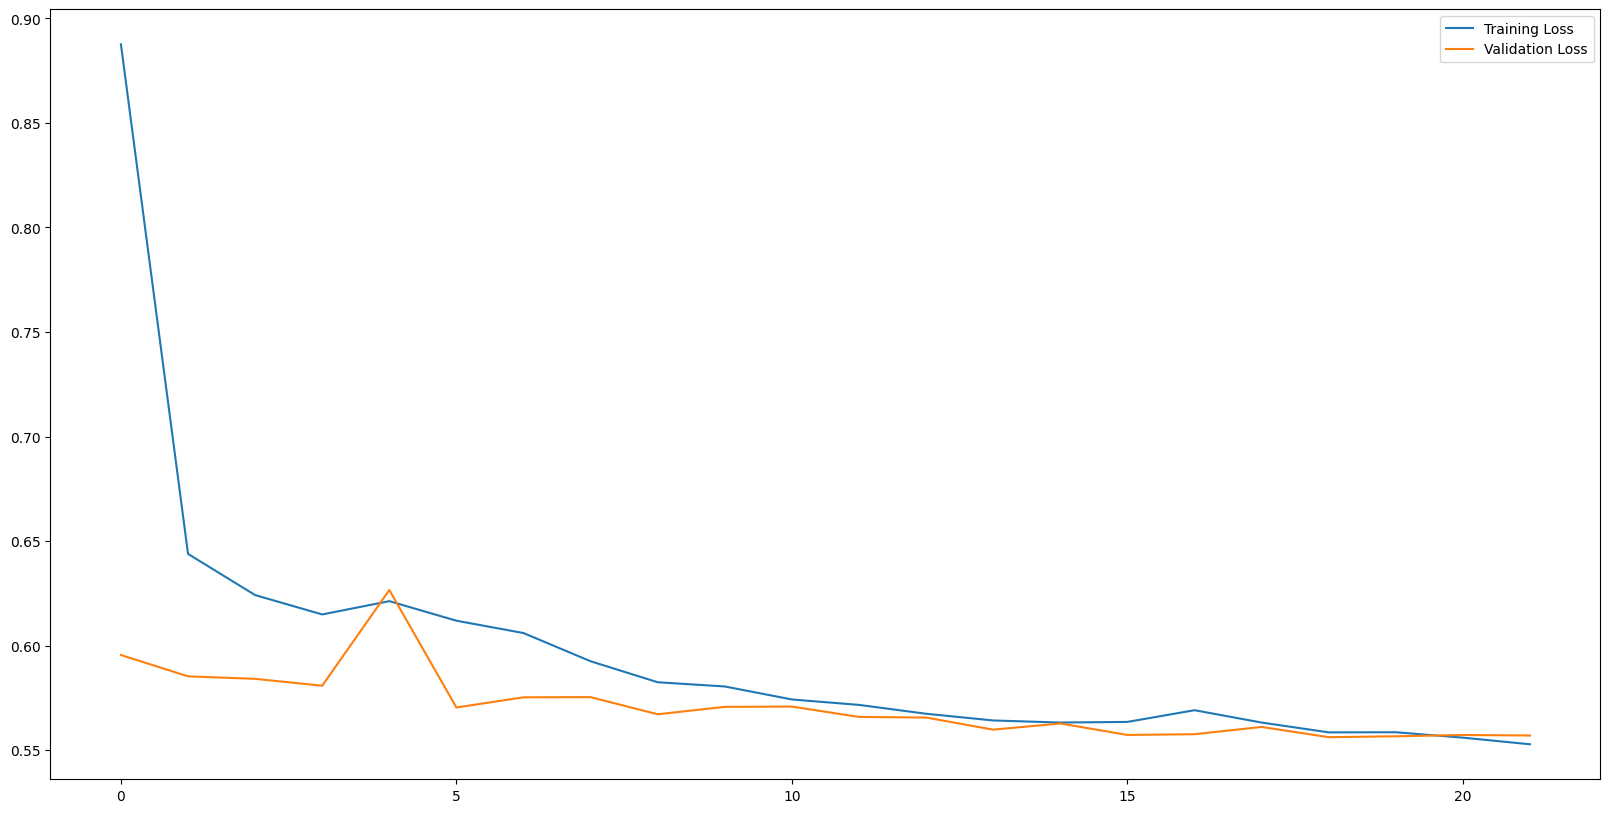

Validation Error: 0.5562545657157898


In [21]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2, random_state = 0, shuffle = True)

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, verbose=1, min_delta=0.001, mode="min", restore_best_weights=True)
cp = tf.keras.callbacks.ModelCheckpoint(r'/content/drive/MyDrive/9417/Models/gru_4_double_attention.h5', save_best_only=True, monitor='val_loss', mode='min')
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=0, min_lr=0.0001, absmode='min')

model = get_model()
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=25,
                    batch_size=128,
                    callbacks=[es, cp, rlr])

test_scores = model.predict(X_val)
results = pd.DataFrame(data = list(zip(test_scores, y_val,(test_scores-y_val))), columns = ['Pred_scores', 'Actual', 'error'])
error_l = min(history.history['val_loss'])

plot_results(history)
print(f'Validation Error: {error_l}')
results.to_csv("/content/drive/MyDrive/9417/gru_4_double_attention.csv")
results.to_pickle("/content/drive/MyDrive/9417/gru_4_double_attention.pkl")

In [22]:
pred_lst = results.Pred_scores
actual_lst = results.Actual

In [23]:
# flat is faster than item
cohesion_pred_lst = [x[0] for x in pred_lst]
cohesion_act_lst = [x[0] for x in actual_lst]

print("Pred cohesion:", cohesion_pred_lst[:5])
print("Actual cohesion:", cohesion_act_lst[:5])

syntax_pred_lst = [x[1] for x in pred_lst]
syntax_act_lst = [x[1] for x in actual_lst]

print("\nPred syntax:", syntax_pred_lst[:5])
print("Actual sytnax:", syntax_act_lst [:5])

vocabulary_pred_lst = [x[2] for x in pred_lst]
vocabulary_act_lst = [x[2] for x in actual_lst]

print("\nPred vocab:", vocabulary_pred_lst[:5])
print("Actual vocab:", vocabulary_act_lst[:5])

phraseology_pred_lst = [x[3] for x in pred_lst]
phraseology_act_lst = [x[3] for x in actual_lst]

print("\nPred phraseology:", phraseology_pred_lst[:5])
print("Actual phraseology:", phraseology_act_lst[:5])

grammar_pred_lst = [x[4] for x in pred_lst]
grammar_act_lst = [x[4] for x in actual_lst]

print("\nPred grammar:", grammar_pred_lst[:5])
print("Actual grammar:", grammar_act_lst[:5])

conventions_pred_lst = [x[5] for x in pred_lst]
conventions_act_lst = [x[5] for x in actual_lst]

print("\nPred conventions:", conventions_pred_lst[:5])
print("Actual conventions:", conventions_act_lst[:5])

Pred cohesion: [3.0149946, 3.3115904, 3.351472, 2.7764962, 3.4758716]
Actual cohesion: [4.0, 3.0, 4.0, 2.5, 3.0]

Pred syntax: [2.8713381, 3.161639, 3.2054992, 2.7353544, 3.2903135]
Actual sytnax: [3.5, 3.5, 4.0, 3.0, 3.0]

Pred vocab: [3.1123552, 3.3897526, 3.4168212, 2.9093988, 3.5284636]
Actual vocab: [3.5, 3.5, 4.0, 3.5, 4.0]

Pred phraseology: [2.9736195, 3.2694376, 3.3169436, 2.7959833, 3.4245849]
Actual phraseology: [3.5, 3.5, 3.5, 3.5, 3.0]

Pred grammar: [2.7572904, 3.205385, 3.1226697, 2.6784742, 3.2251983]
Actual grammar: [3.0, 3.5, 4.5, 3.5, 4.0]

Pred conventions: [2.8144112, 3.296139, 3.266097, 2.6716635, 3.3869796]
Actual conventions: [3.5, 3.0, 4.5, 3.0, 4.0]


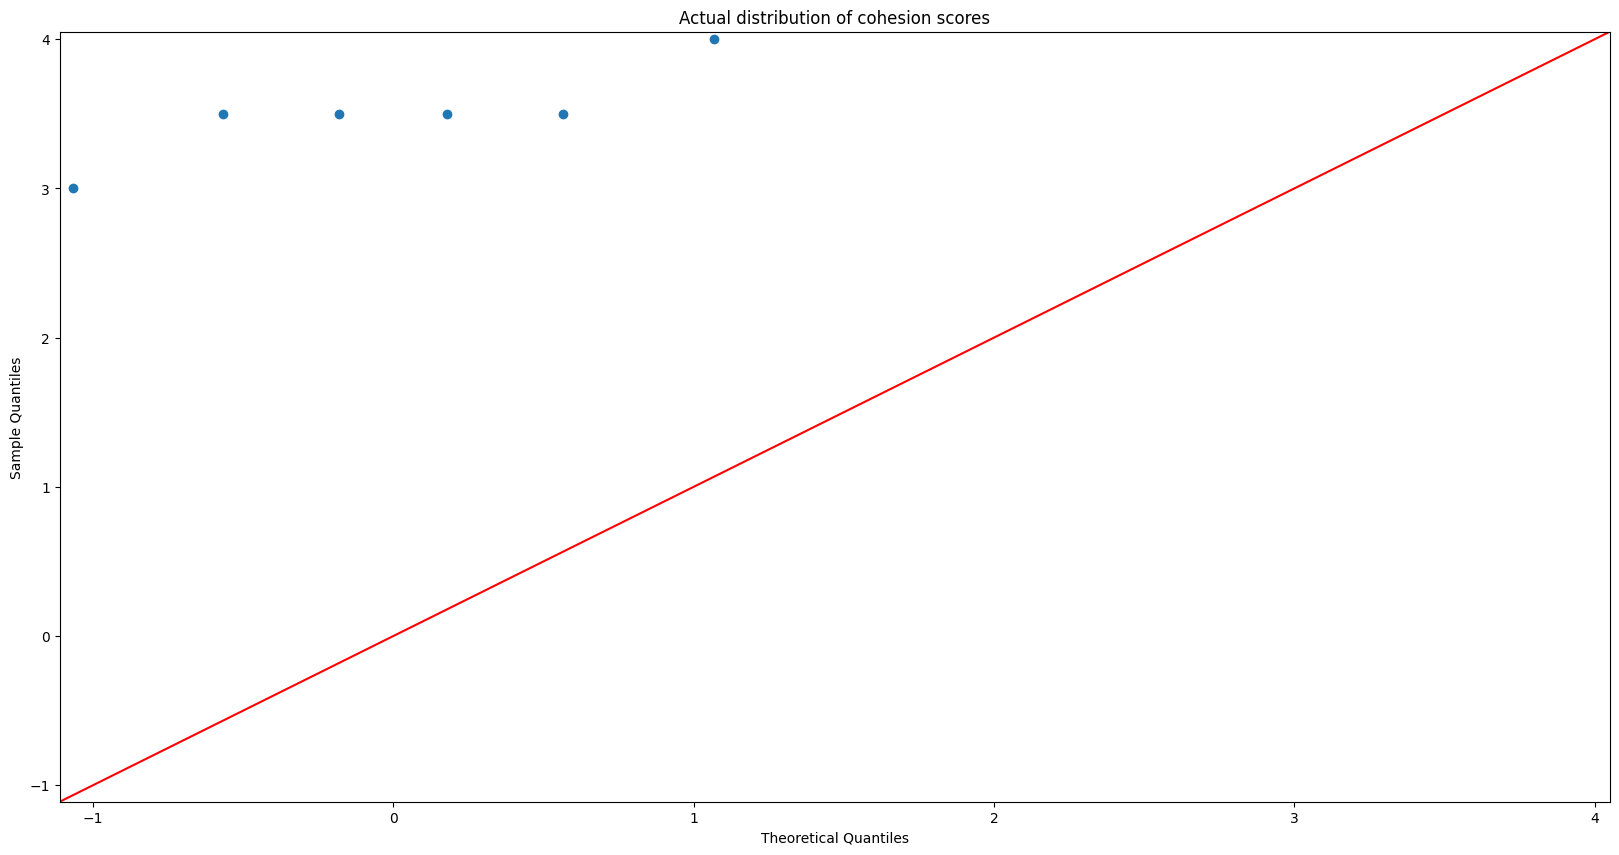

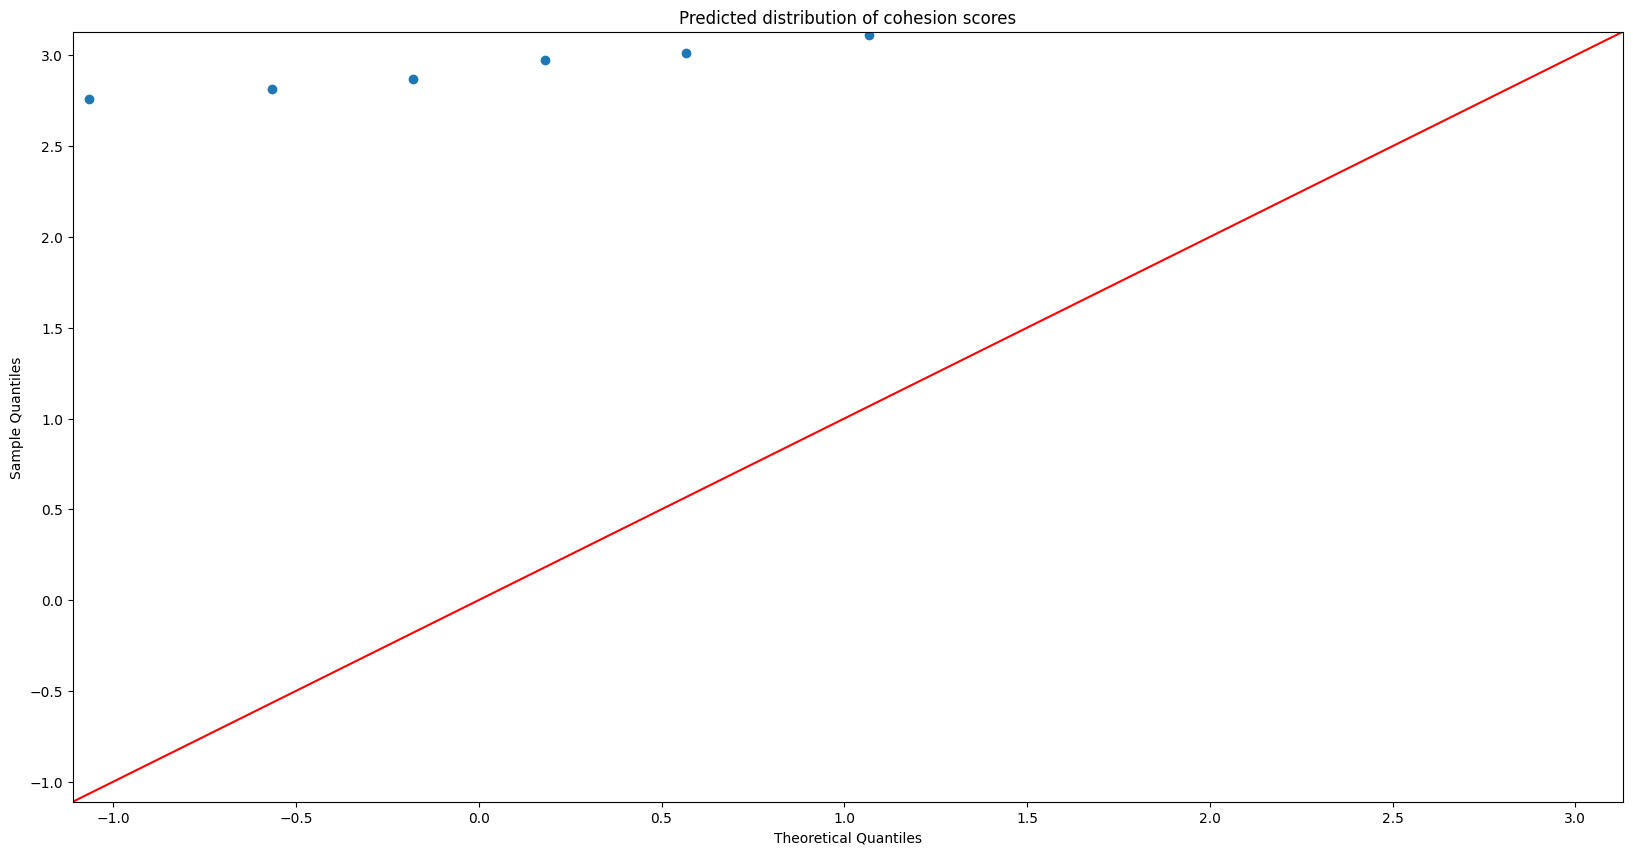

In [24]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(data = results['Actual'][0], line ='45')
py.title("Actual distribution of cohesion scores")
sm.qqplot(data = results['Pred_scores'][0], line ='45')
py.title("Predicted distribution of cohesion scores")
py.show()

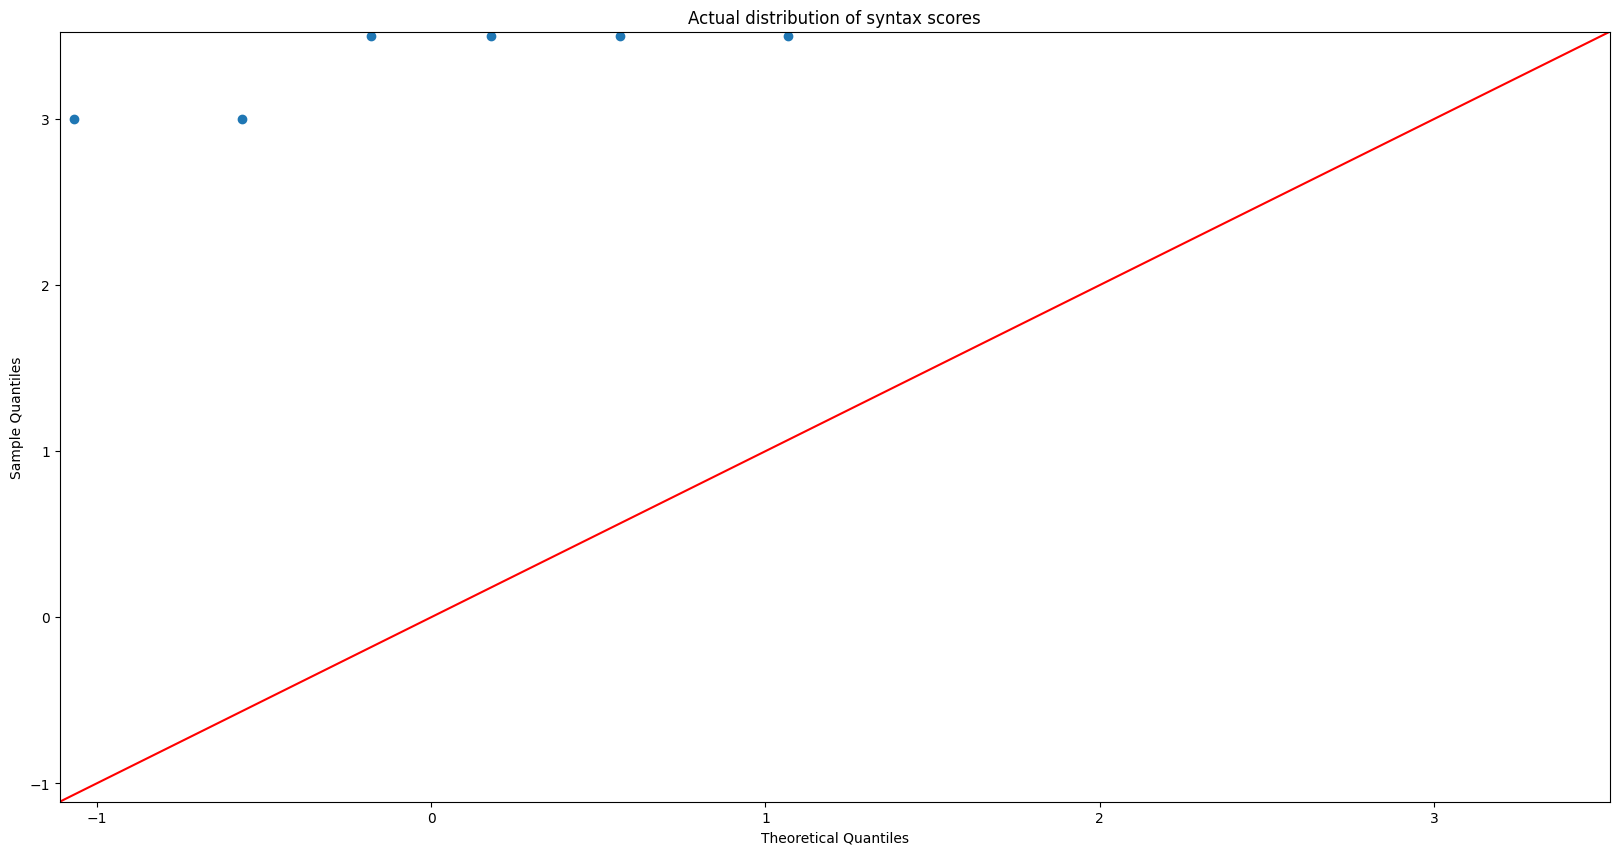

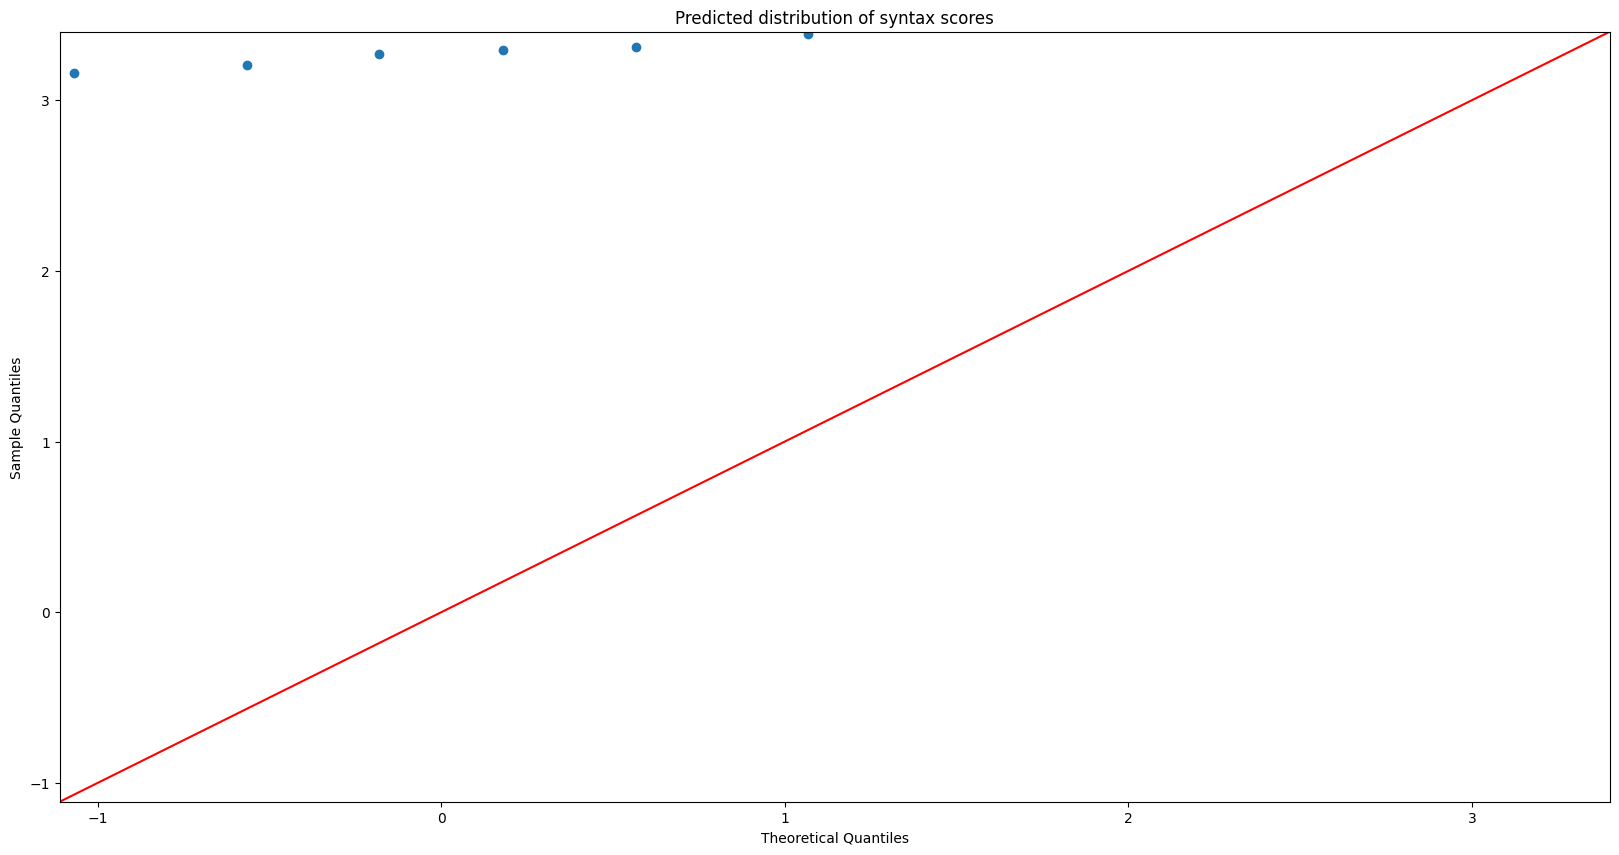

In [25]:
sm.qqplot(data = results['Actual'][1], line ='45')
py.title("Actual distribution of syntax scores")
sm.qqplot(data = results['Pred_scores'][1], line ='45')
py.title("Predicted distribution of syntax scores")
py.show()

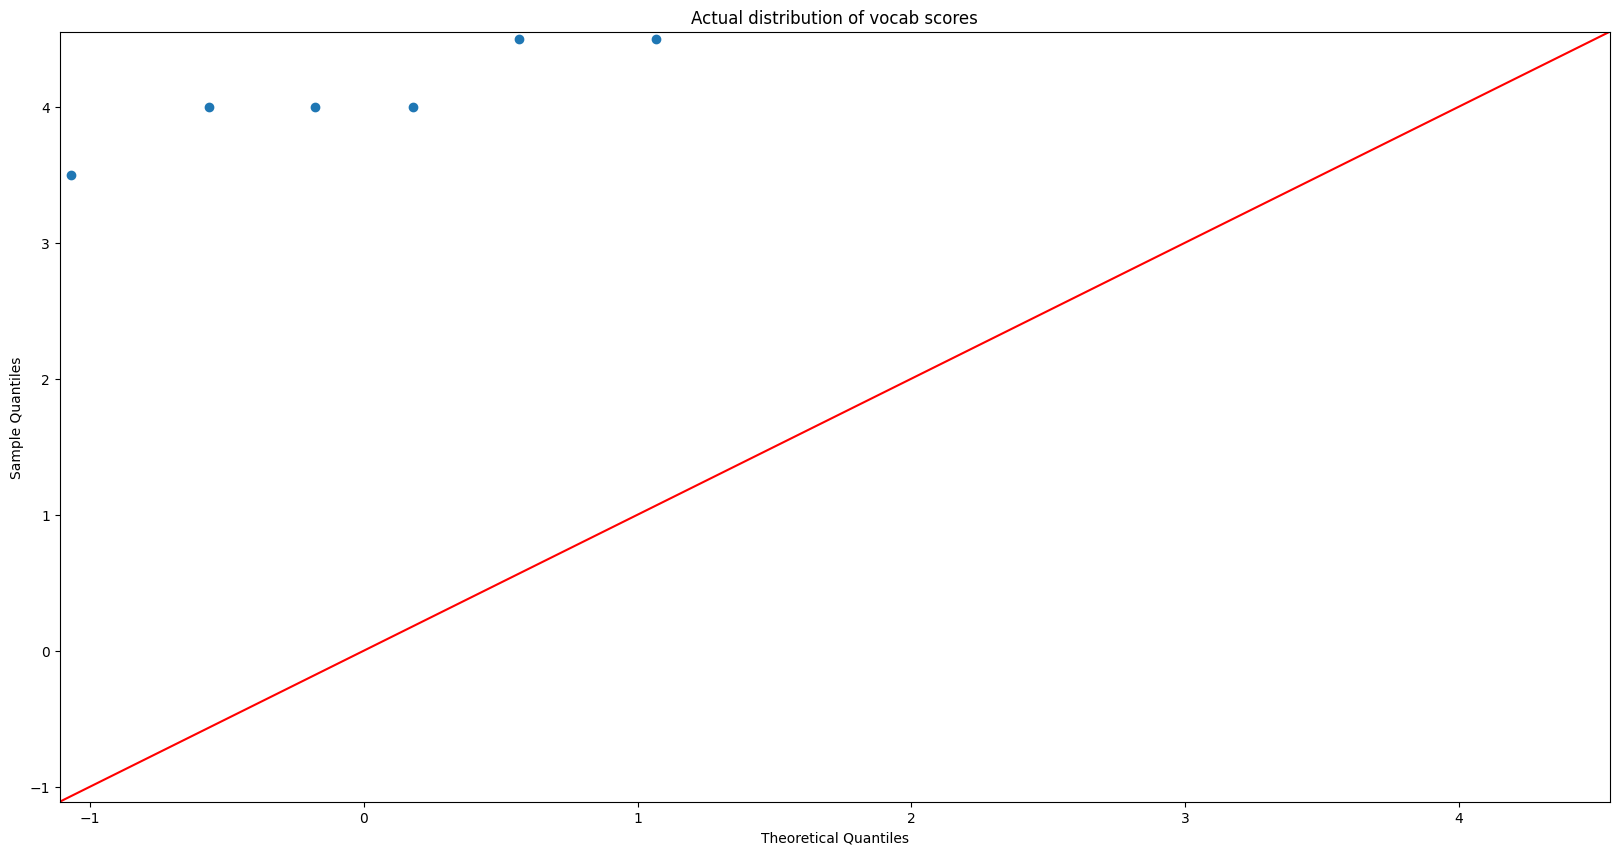

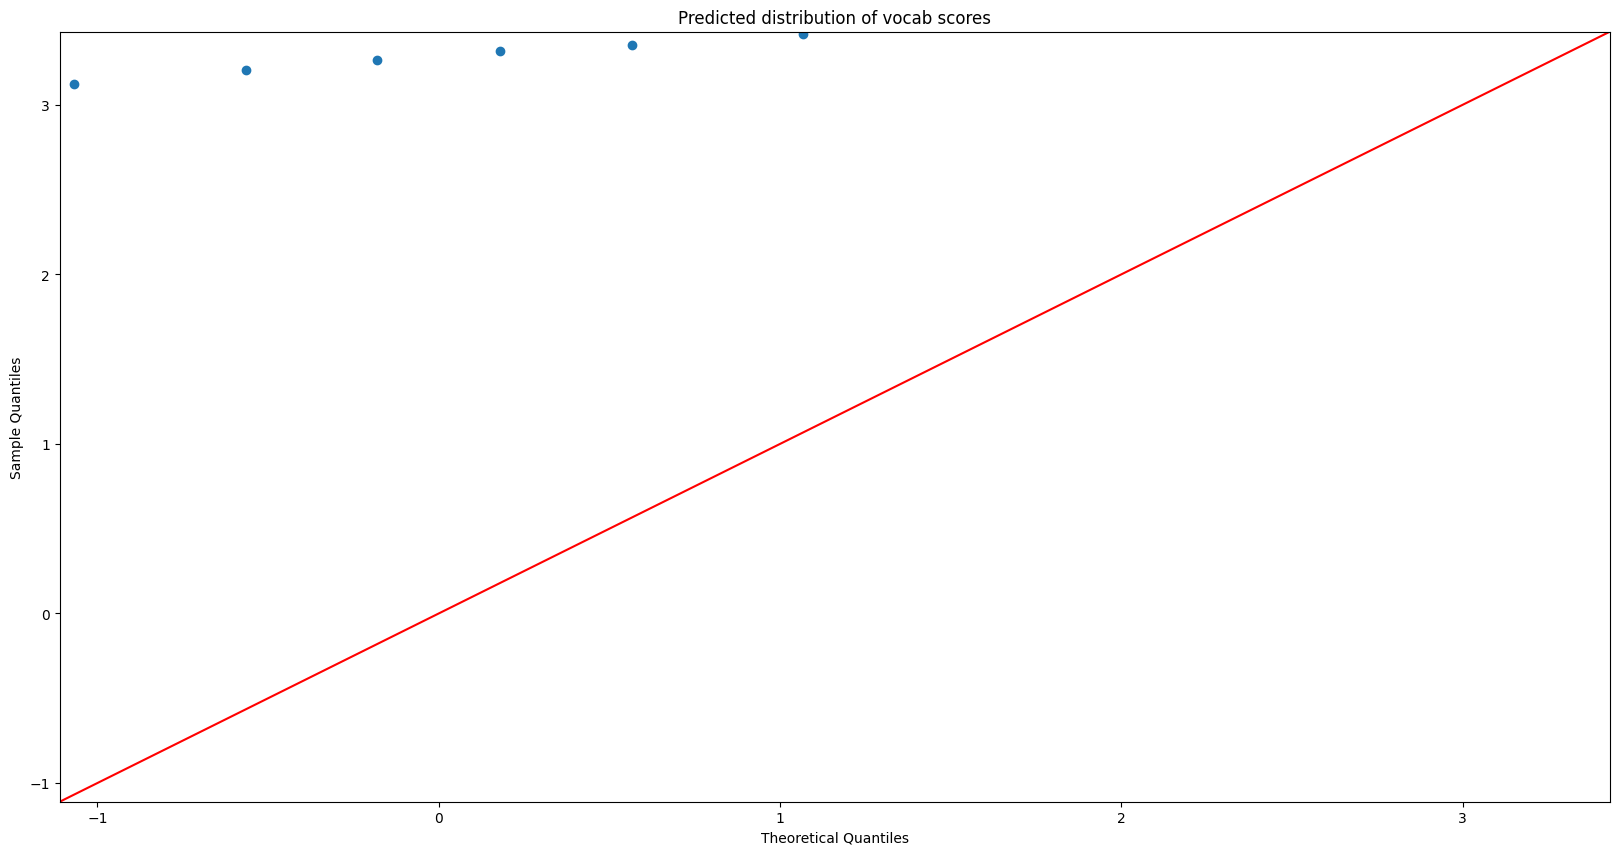

In [26]:
sm.qqplot(data = results['Actual'][2], line ='45')
py.title("Actual distribution of vocab scores")
sm.qqplot(data = results['Pred_scores'][2], line ='45')
py.title("Predicted distribution of vocab scores")
py.show()

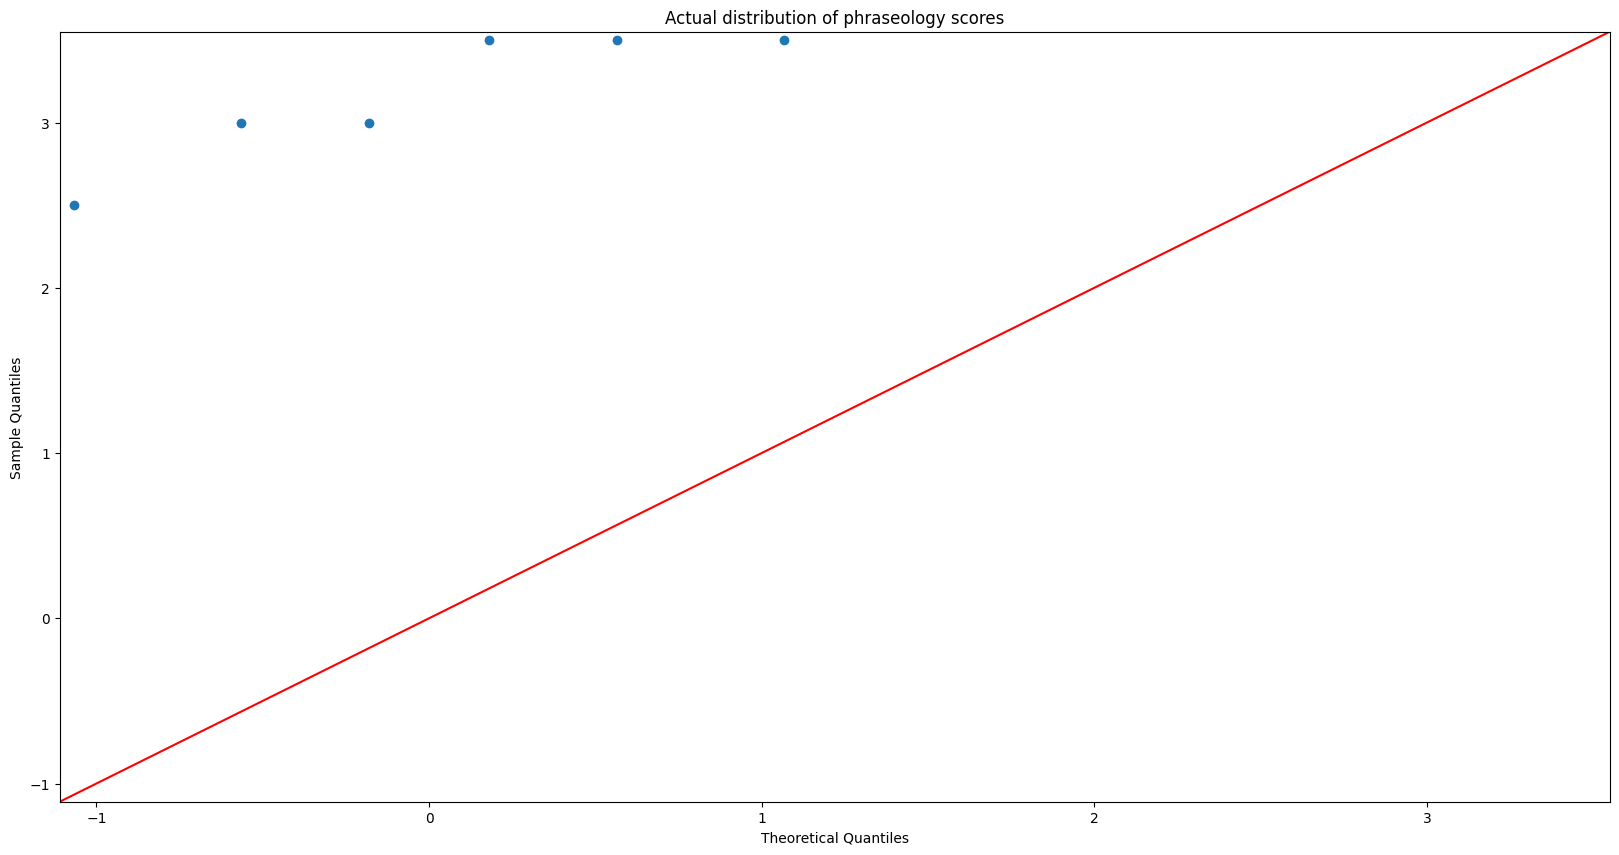

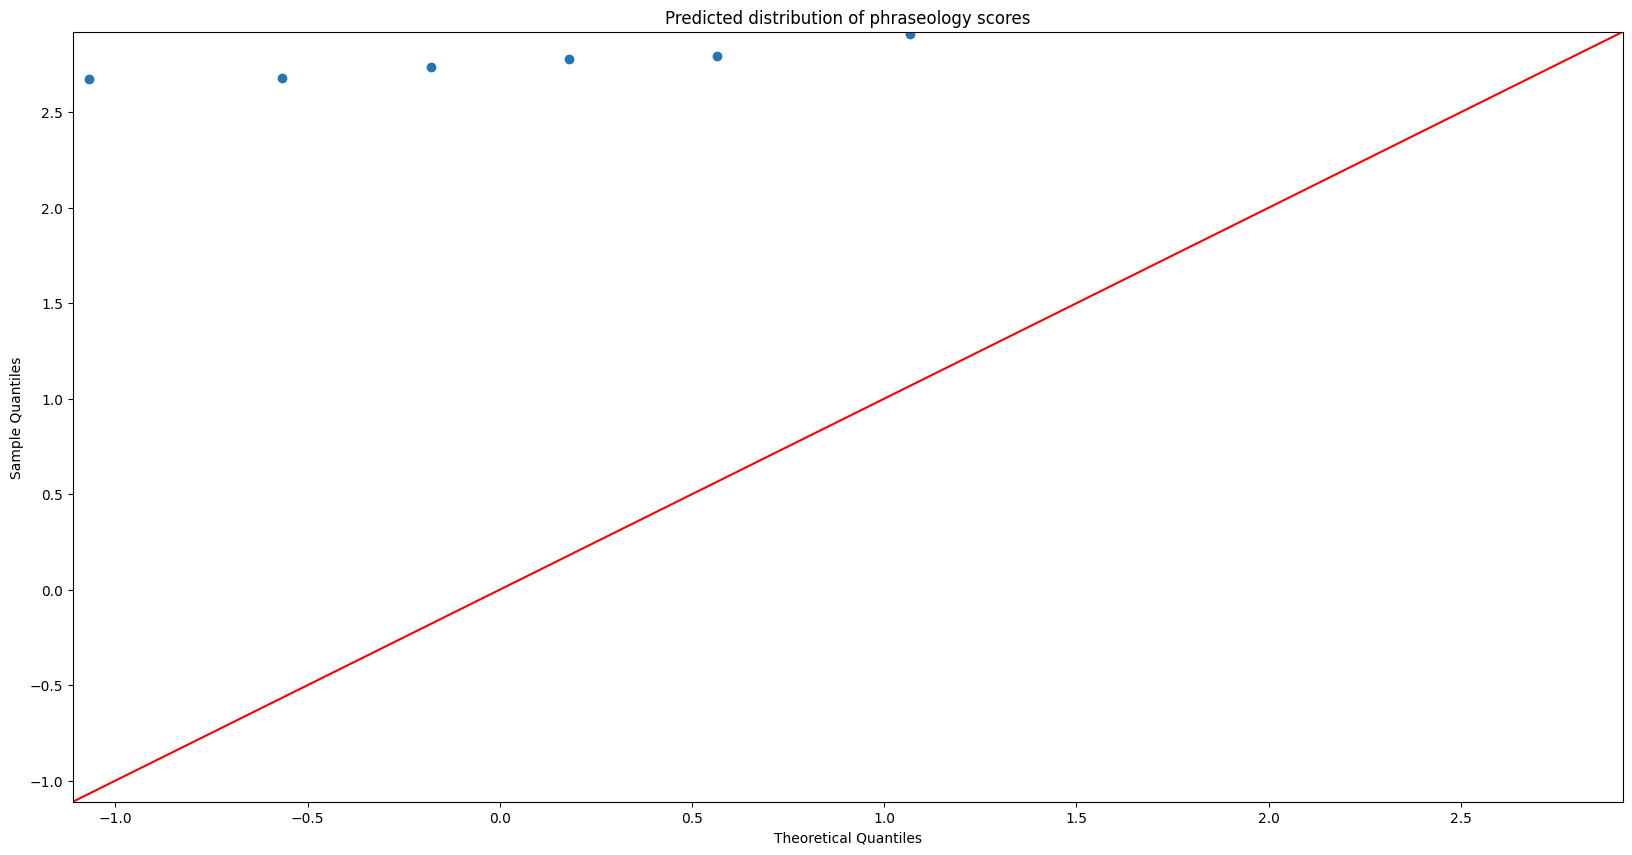

In [27]:
sm.qqplot(data = results['Actual'][3], line ='45')
py.title("Actual distribution of phraseology scores")
sm.qqplot(data = results['Pred_scores'][3], line ='45')
py.title("Predicted distribution of phraseology scores")
py.show()

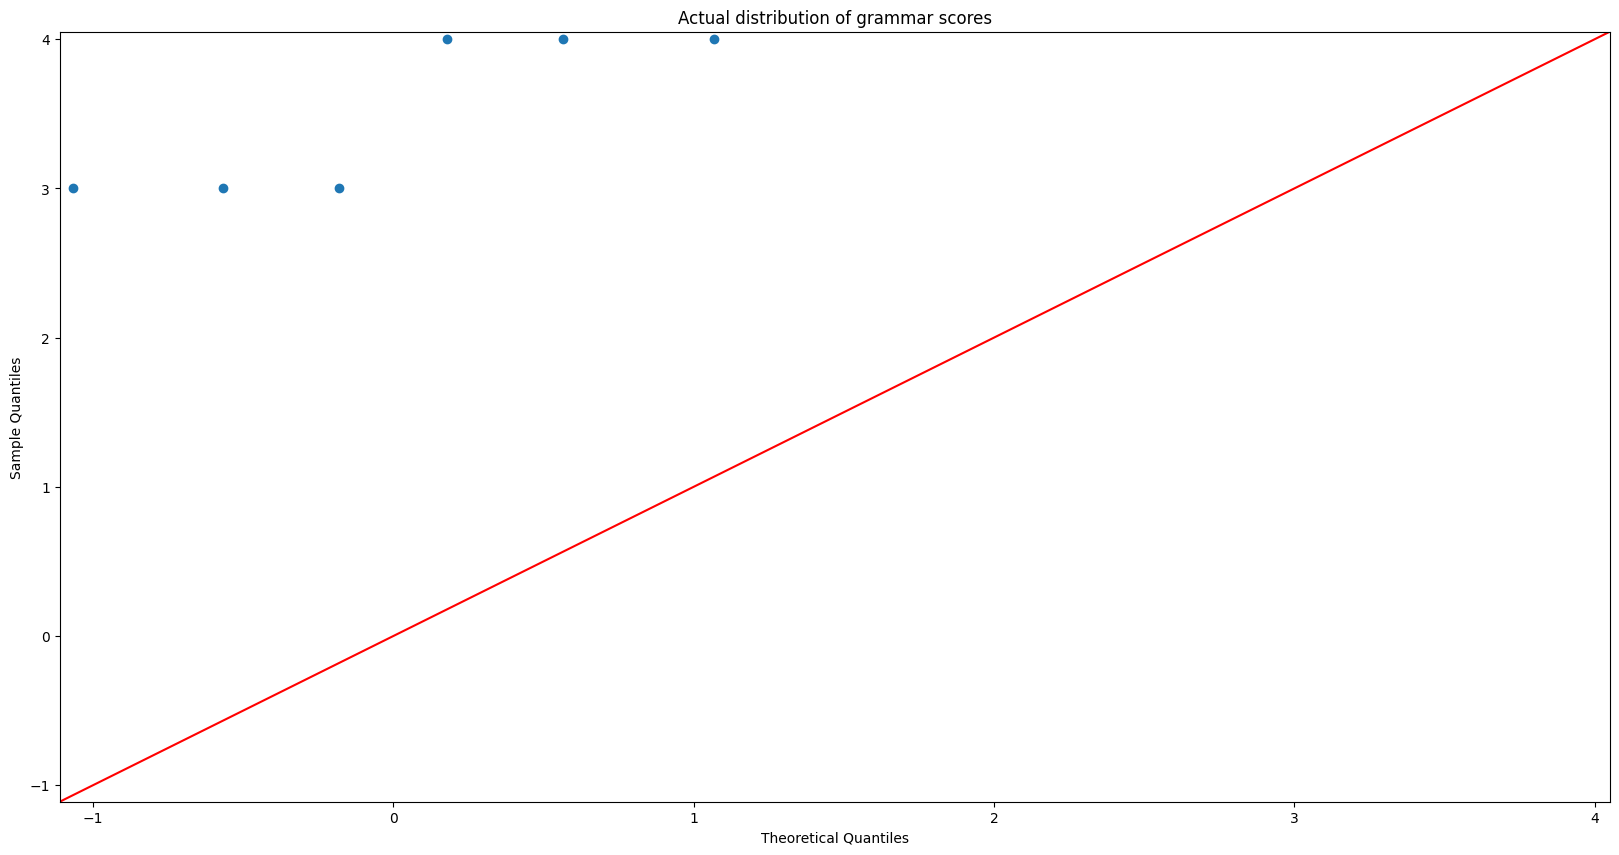

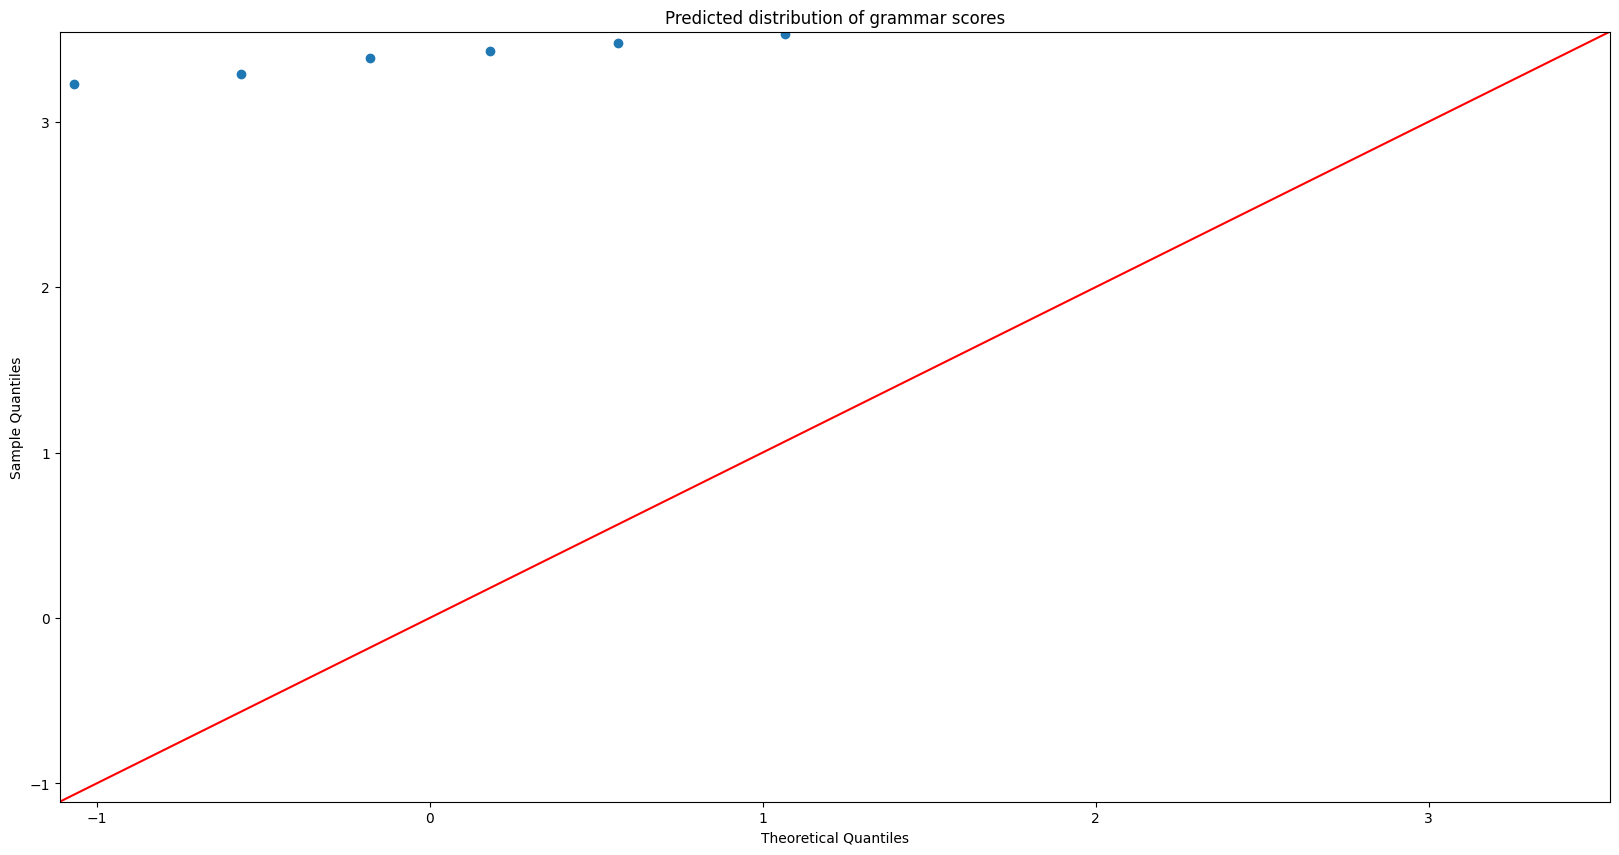

In [28]:
sm.qqplot(data = results['Actual'][4], line ='45')
py.title("Actual distribution of grammar scores")
sm.qqplot(data = results['Pred_scores'][4], line ='45')
py.title("Predicted distribution of grammar scores")
py.show()

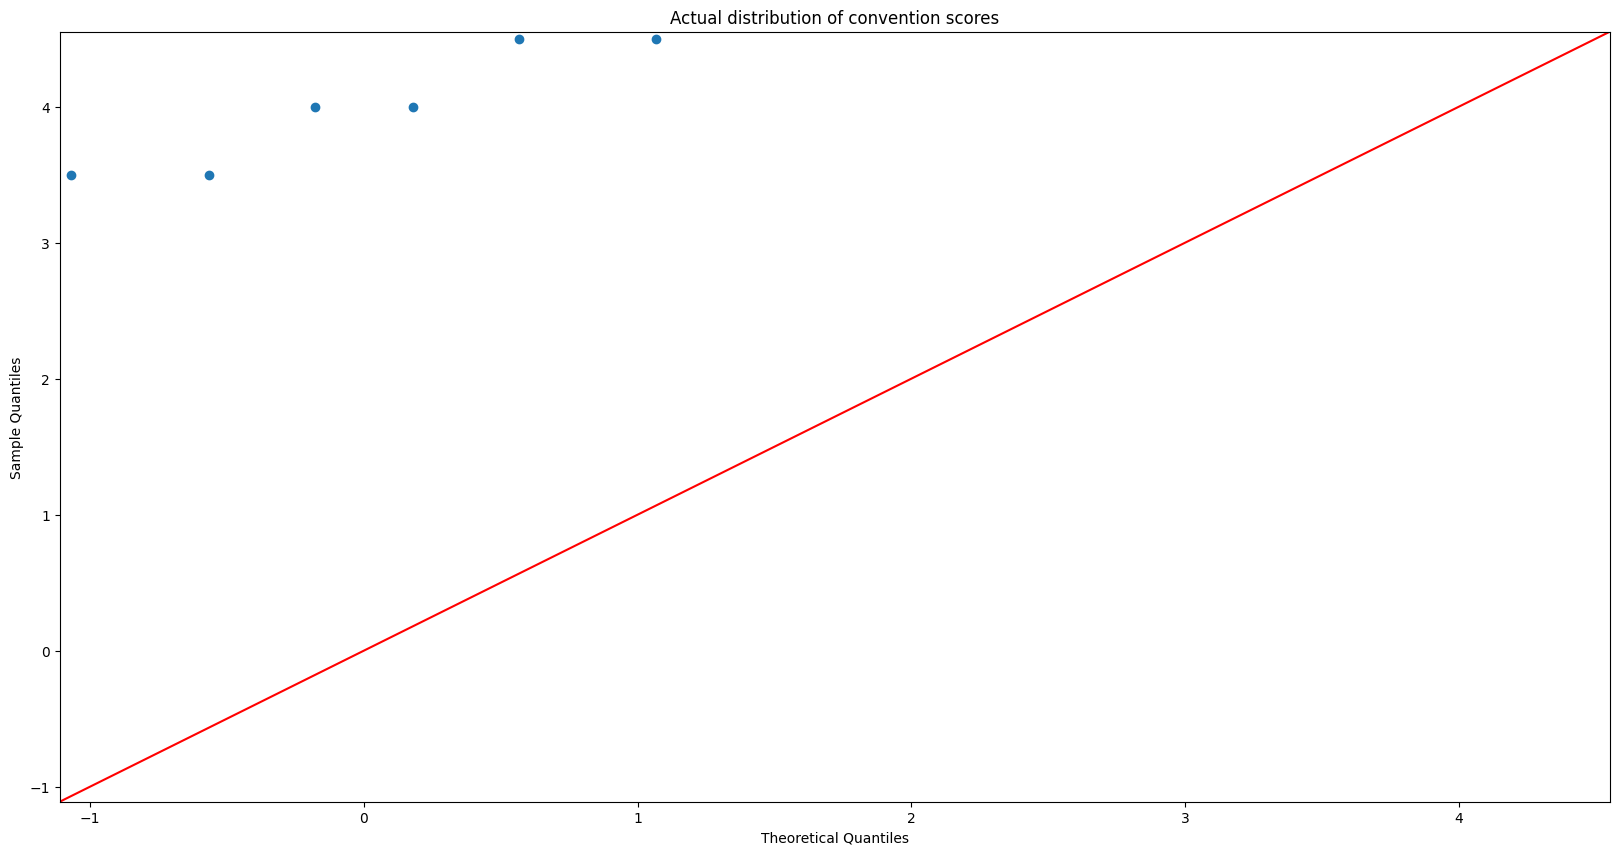

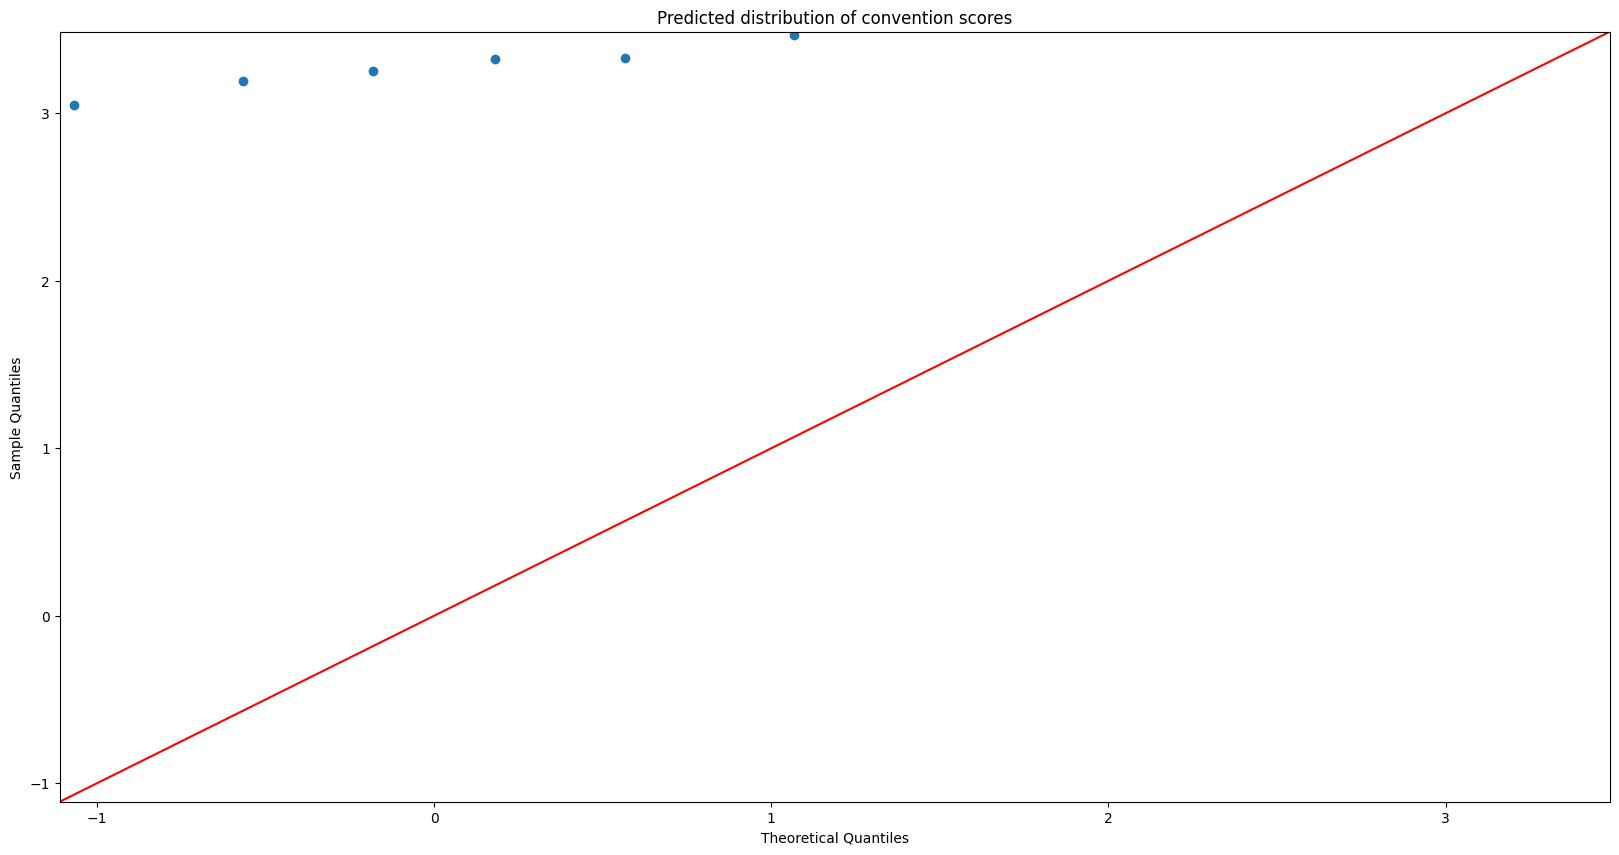

In [29]:
sm.qqplot(data = results['Actual'][5], line ='45')
py.title("Actual distribution of convention scores")
sm.qqplot(data = results['Pred_scores'][5], line ='45')
py.title("Predicted distribution of convention scores")
py.show()

In [30]:
iterations = X_val.shape[0]
iterations

783

In [31]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(X_val[num]))
#nonzero_count

In [32]:
proof_df = results
proof_df['nonzero'] = nonzero_count

In [33]:
import seaborn as sns
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])
test_scores[1].shape

[array([3.0149946, 2.8713381, 3.1123552, 2.9736195, 2.7572904, 2.8144112],
       dtype=float32)
 array([3.3115904, 3.161639 , 3.3897526, 3.2694376, 3.205385 , 3.296139 ],
       dtype=float32)
 array([3.351472 , 3.2054992, 3.4168212, 3.3169436, 3.1226697, 3.266097 ],
       dtype=float32)
 array([2.7764962, 2.7353544, 2.9093988, 2.7959833, 2.6784742, 2.6716635],
       dtype=float32)
 array([3.4758716, 3.2903135, 3.5284636, 3.4245849, 3.2251983, 3.3869796],
       dtype=float32)                                                     ]


(6,)

In [34]:
results['nonzero'] = nonzero_count

In [35]:
pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

[2.9240015, 3.2723238, 3.2799168, 2.7612286, 3.3885686]

In [36]:
corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

<Axes: >

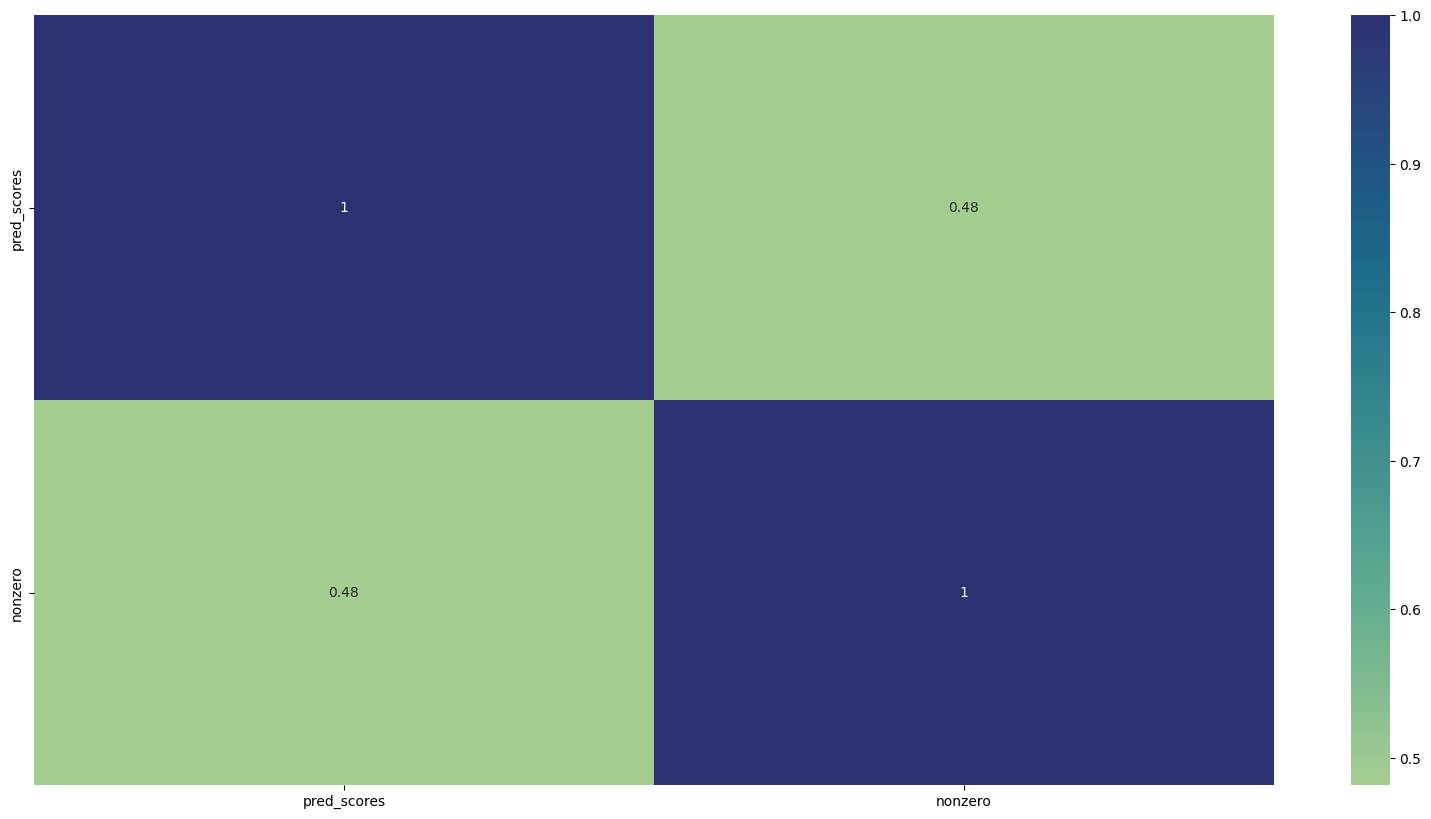

In [37]:
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

<Axes: >

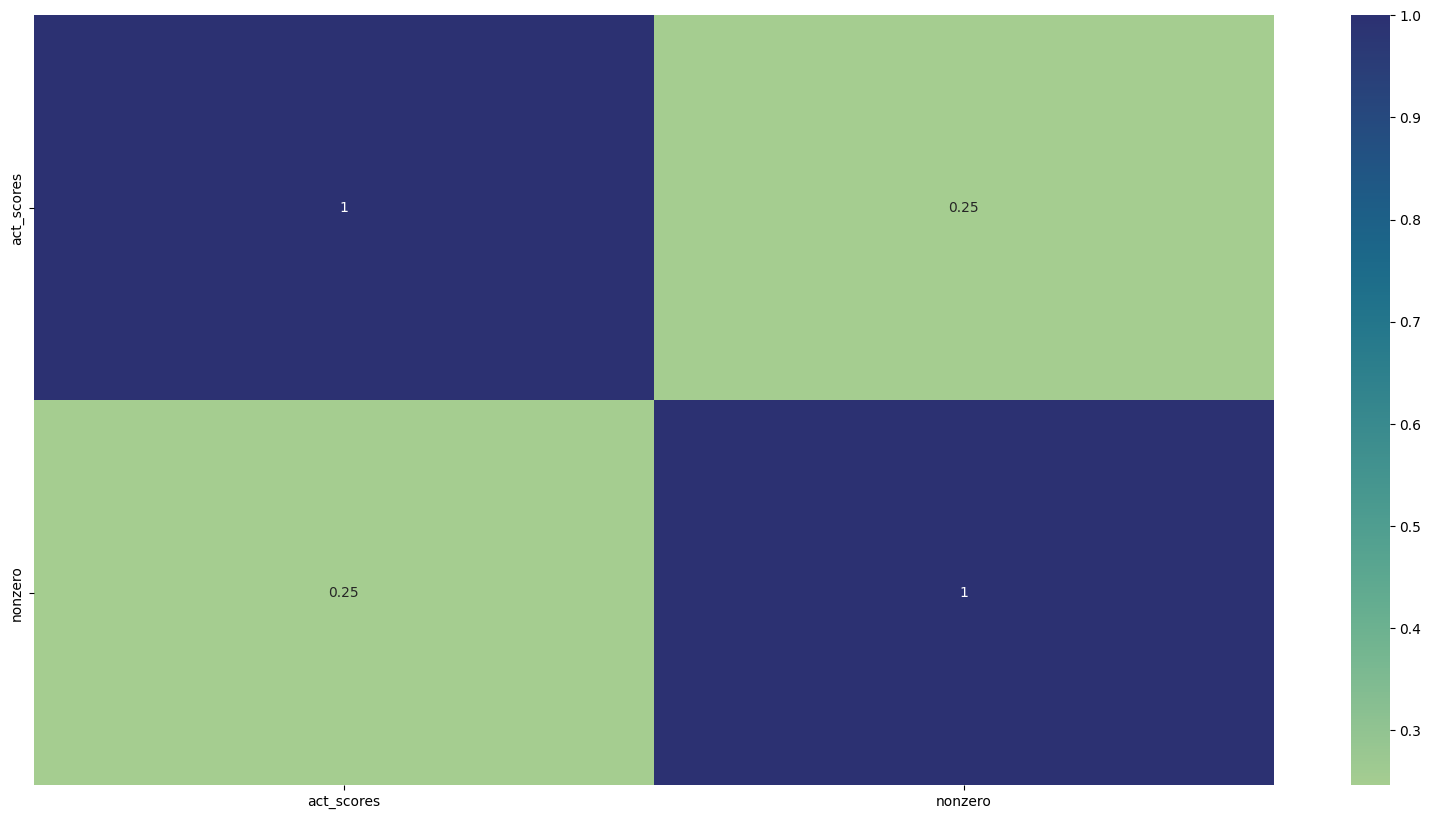

In [38]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

array([[<Axes: title={'center': 'act_scores'}>]], dtype=object)

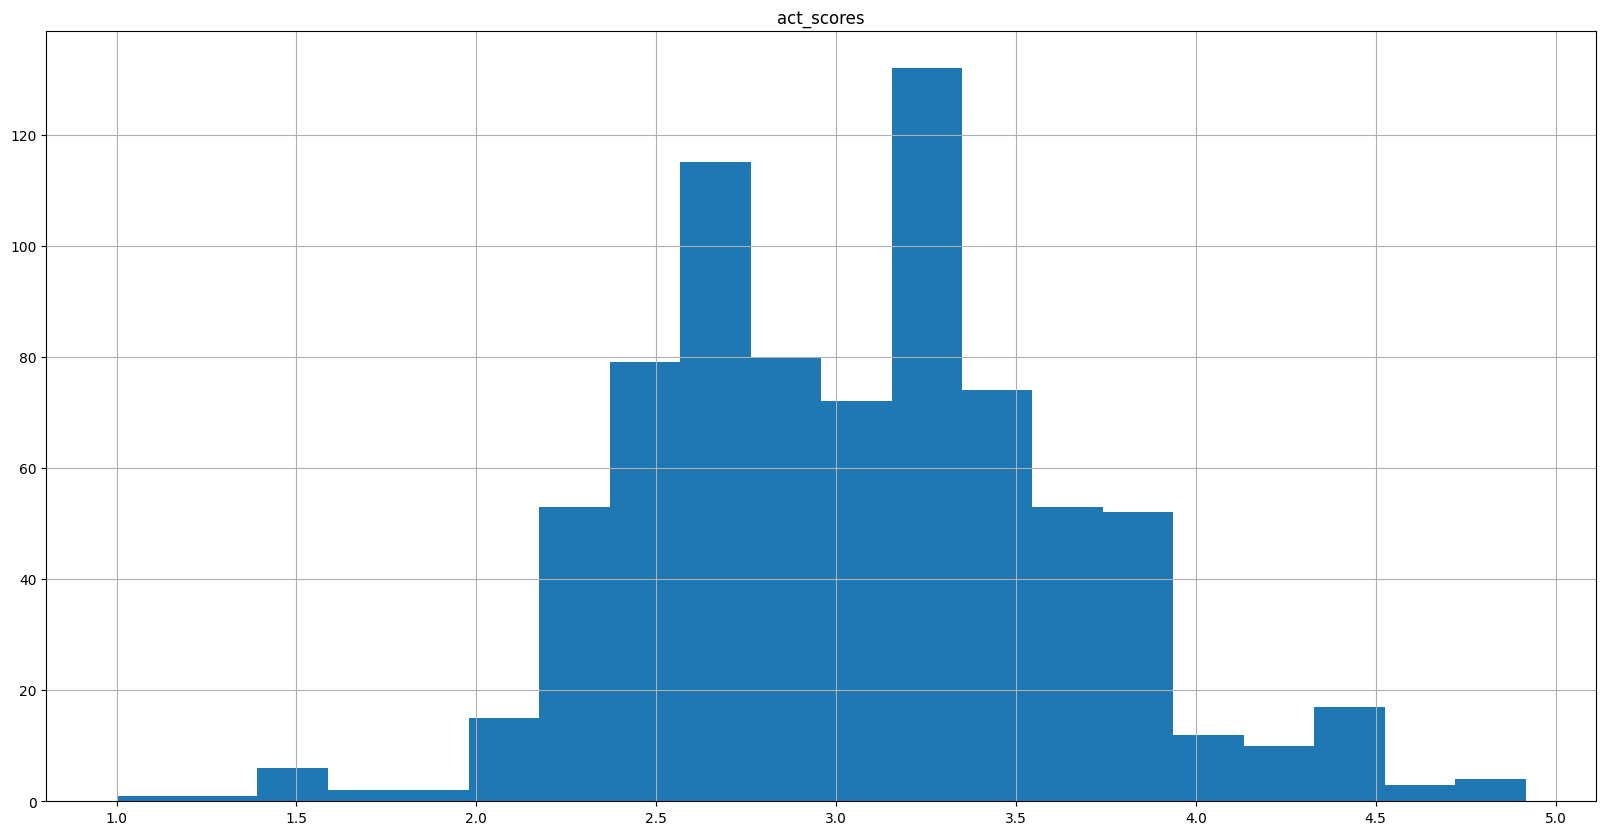

In [39]:
act_corr_df.hist(column = 'act_scores', bins = 20)

array([[<Axes: title={'center': 'pred_scores'}>]], dtype=object)

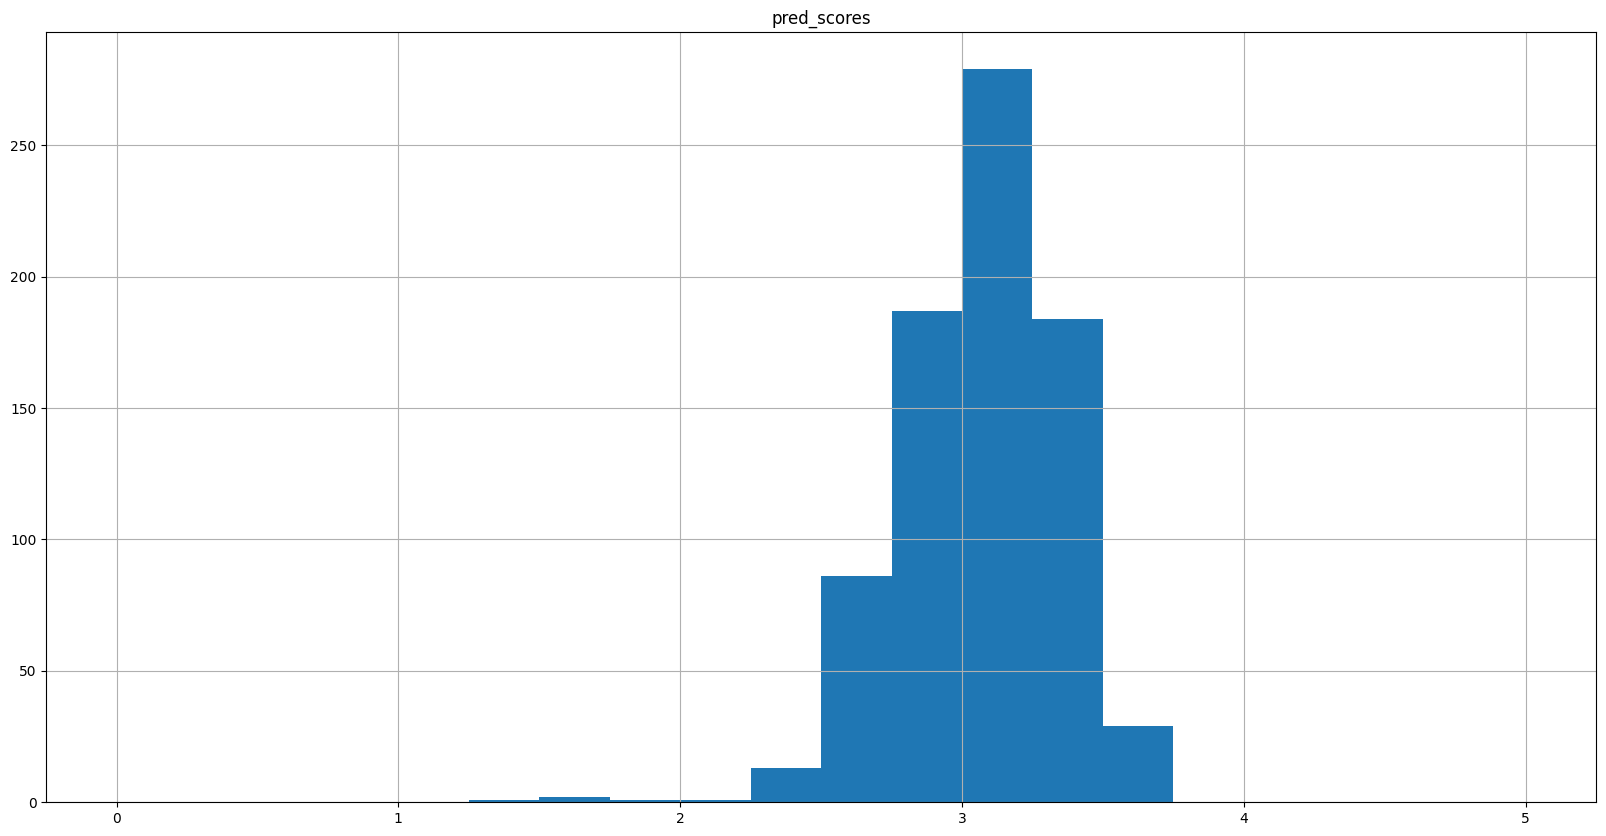

In [40]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [0, 5.0])

In [41]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.102539
Actual median :  3.0


In [42]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.008661722
Actual mean variance :  0.11895132680573293


## Submission

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
sub = pd.read_csv('/content/drive/MyDrive/9417/Data/sample_submission.csv')
xtest_tokenizer = Tokenizer()
df_test = pd.read_csv('/content/drive/MyDrive/9417/Data/test.csv')
xtest = clean_input(df_test)
df_test['cleaned_text'] = xtest
xtest_tokenizer.fit_on_texts(df_test['cleaned_text'])

X_test = get_training_data(df_test, xtest_tokenizer, None)

from keras.models import model_from_json
with open('/content/drive/MyDrive/9417/Models/gru_4_double_attention.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('/content/drive/MyDrive/9417/Models/gru_4_double_attention.h5')

pred = model.predict(X_test)

for index, row in df_test.iterrows():
    sub_index = sub[sub['text_id']==row['text_id']].index
    sub.iloc[sub_index, 1] = pred[sub_index,0]
    sub.iloc[sub_index, 2] = pred[sub_index,1]
    sub.iloc[sub_index, 3] = pred[sub_index,2]
    sub.iloc[sub_index, 4] = pred[sub_index,3]
    sub.iloc[sub_index, 5] = pred[sub_index,4]
    sub.iloc[sub_index, 6] = pred[sub_index,5]

sub['text_id'] = sub['text_id']
sub.to_csv('/content/drive/MyDrive/9417/Data/gru_4_double_attention_submission.csv', index=False)

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


Cleaning Progress: 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]


1/1 [==============================] - 3s 3s/step


## GZIP

In [12]:
import os
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def compress_string(s):
    # Returns a compressed version of the string
    return gzip.compress(s.encode())

def ncd(s1, s2):
    # Returns the normalized compression distance between two strings
    compressed_s1 = compress_string(s1)
    compressed_s2 = compress_string(s2)
    compressed_s1_s2 = compress_string(s1 + s2)
    ncd = (len(compressed_s1_s2) - min(len(compressed_s1), len(compressed_s2))) / max(len(compressed_s1), len(compressed_s2))
    return ncd

def MCRMSE(labels: np.ndarray, preds: np.ndarray) -> float:
    difference = (labels - preds) ** 2
    mean_difference = np.mean(difference, axis=0)
    colwise_rmse = np.sqrt(np.array(mean_difference, dtype=float))
    mean_rmse = np.mean(colwise_rmse)
    return mean_rmse

In [2]:
train_df = pd.read_csv('Data/train.csv')

In [3]:
# Load cleaned text
import pickle
with open('proc_text_3.pkl', 'rb') as f:
    proc_text_3 = pickle.load(f)

In [4]:
# Also added start of seq and end of seq, lowercase
train_df['cleaned_text'] = proc_text_3

In [5]:
X = train_df['cleaned_text']
y = train_df[['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']]

In [6]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a DataFrame to hold the predictions
predictions = pd.DataFrame(index=y_test.index, columns=y.columns)

In [7]:
# Create a list for the text index
text_indices = X_test.index.tolist()

# For each output column
for col in y.columns:
    # For each piece of text in the test set
    for idx, text in tqdm(enumerate(X_test), desc=f"Predicting {col}", total=len(X_test)):
        # Calculate the NCD between this text and each text in the training set
        distances = [ncd(text, train_text) for train_text in X_train]
        # Find the index of the training example with the smallest NCD
        closest_example_index = np.argmin(distances)
        # Predict the score of the text to be the same as the score of the most similar training example
        prediction = y_train[col].iloc[closest_example_index]
        # Update the prediction using the index of the test example
        predictions.loc[text_indices[idx], col] = prediction

    # After each column, calculate and print the RMSE for that column
    rmse = np.sqrt(mean_squared_error(y_test[col], predictions[col]))
    print(f"Root Mean Square Error for {col}: {rmse}")

Predicting cohesion: 100%|███████████████████████████████████████████████████████████| 783/783 [06:40<00:00,  1.95it/s]


Root Mean Square Error for cohesion: 0.8352468452289291


Predicting syntax: 100%|█████████████████████████████████████████████████████████████| 783/783 [06:34<00:00,  1.98it/s]


Root Mean Square Error for syntax: 0.8260215626524494


Predicting vocabulary: 100%|█████████████████████████████████████████████████████████| 783/783 [06:32<00:00,  2.00it/s]


Root Mean Square Error for vocabulary: 0.7138477036884707


Predicting phraseology: 100%|████████████████████████████████████████████████████████| 783/783 [06:50<00:00,  1.91it/s]


Root Mean Square Error for phraseology: 0.8384897936764746


Predicting grammar: 100%|████████████████████████████████████████████████████████████| 783/783 [06:35<00:00,  1.98it/s]


Root Mean Square Error for grammar: 0.9191450300180579


Predicting conventions: 100%|████████████████████████████████████████████████████████| 783/783 [06:38<00:00,  1.96it/s]

Root Mean Square Error for conventions: 0.8801050674535078


In [13]:
# Calculate MCRMSE
mcrmse = MCRMSE(y_test.values, predictions.values)
print("Mean Column-wise Root Mean Square Error: ", mcrmse)

Mean Column-wise Root Mean Square Error:  0.8354760004529816


##  LSTM combined base pool AUG

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, replacers, mutators

2023-08-03 21:50:13.442810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 21:50:14.641050: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-03 21:50:15.954874: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/rkv/miniconda3/envs/tf/lib/
2023-08-03 21:50:15.959229: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.s

In [2]:
train_df = pd.read_csv('Data/train.csv')

In [40]:
# Quite fast!
def more_processing(text):
    text = '<sostok> ' + text + ' <eostok>' 
    text = text.lower()
    return text

t1 = time.perf_counter(), time.process_time()
proc_text = [contractions.fix(text) for text in train_df['full_text']]
proc_text_2 = [more_processing(text) for text in proc_text]
t2 = time.perf_counter(), time.process_time()
print(f" Real time: {t2[0] - t1[0] :.2f} seconds")
print(f" CPU time: {t2[1] - t1[1] :.2f} seconds")

 Real time: 0.70 seconds
 CPU time: 0.70 seconds


In [41]:
nlp = spacy.load("en_core_web_md", disable=['senter', 'parser', 'ner'])
#nlp.enable("senter")
print(nlp.pipe_names)

pipeline = spacy_cleaner.Pipeline(
    nlp,
    removers.remove_stopword_token,
    removers.remove_punctuation_token,
    replacers.replace_number_token,
    mutators.mutate_lemma_token,
)

/home/rkv/miniconda3/envs/tf/lib/python3.9/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value ['senter', 'parser', 'ner'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


In [42]:
proc_text_3 = pipeline.clean(proc_text_2, n_process = 8, batch_size = 12)
# n_process = 4, batch size 12 - 105 it/s : 00:37

# n_process = 8, default batch size - takes forever to initialize
# n_process = 8, batch size 12 - 141 it/s : 00:27
# n_process = 8, batch size 48 - 130 it/s : 00:29

# n_process = 12, default batch size - takes forever to initialize
# n_process = 12, batch size 12 - 120.3 it/s : 00:29
# n_process = 12, batch size 48 - 89.5 it/s : 00:34


Cleaning Progress: 100%|███████████████████████████████████████████████████████████| 3911/3911 [00:23<00:00, 169.11it/s]


In [46]:
# Doing it manually
import time
import re
import string
from nltk.corpus import stopwords #reduce noise and improve the efficiency

#https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                        "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                        "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will",
                        "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                        "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am",
                        "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've":
                        "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
                        "mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
                        "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                        "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                        "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
                        "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
                        "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", 
                        "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have",
                        "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will",
                        "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
                        "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", 
                        "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                        "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", 
                        "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                        "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                        "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
                        "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
                        "y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                        "you'll've": "you will have", "you're": "you are", "you've": "you have"}

#removing contraction
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

def replace_contractions(text):
    text = str(text)
    contractions, contractions_re = _get_contractions(contraction_dict)
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

def add_token(text):
    text = str(text)
    text = 'SOSTOK' + text + 'EOSTOK'
    return text
#https://towardsdatascience.com/using-deep-learning-for-end-to-end-multiclass-text-classification-39b46aecac81

def remove_punct(text):
    text = str(text)
    cleaned_text = text.translate(str.maketrans('', '', string.punctuation))
    return cleaned_text
            
def clean_text(text): 
    stop_words = stopwords.words('english')
    
    text = text.replace(",", " ")
   
    #Replace contractions
    text = replace_contractions(text)
    
    #Remove punctuations
    text = remove_punct(text)
    
    text = nlp(text)

    #Lemmatize text
    lemmatized =  [token.lemma_ for token in text if not str(token).isspace()]  
    
    #Remove stop words
    cleaned_text = [word for word in lemmatized if word not in stop_words]
    cleaned_text = add_token(cleaned_text)
    return cleaned_text

def clean_df(df):
    for index, row in df.iterrows():
        cleaned_text = clean_text(row['full_text'])
        df.at[index, 'full_text'] = cleaned_text

t1 = time.perf_counter(), time.process_time()
clean_df(train_df)
t2 = time.perf_counter(), time.process_time()
print(f" Real time: {t2[0] - t1[0] :.2f} seconds")
print(f" CPU time: {t2[1] - t1[1] :.2f} seconds")
print()

 Real time: 111.34 seconds
 CPU time: 111.34 seconds



#### Using SpaCy + the contractions library took 21-23 seconds, while the ordinary pipeline took 112 - 116 seconds.

#### The regular pipeline was almost 6x slower!!

In [48]:
# Also added start of seq and end of seq, lowercase
train_df['cleaned_text'] = proc_text_3

In [9]:
train_df.head()
train_df.to_csv('processed_data_sostok.csv')

In [3]:
train_df = pd.read_csv('processed_data_sostok.csv')

In [4]:
import random
from albumentations.core.transforms_interface import DualTransform, BasicTransform
from nltk import sent_tokenize
class NLPTransform(BasicTransform):
    """ Transform for nlp task."""
    LANGS = {
        'en': 'english',
        'it': 'italian', 
        'fr': 'french', 
        'es': 'spanish',
        'tr': 'turkish', 
        'ru': 'russian',
        'pt': 'portuguese'
    }

    @property
    def targets(self):
        return {"data": self.apply}
    
    def update_params(self, params, **kwargs):
        if hasattr(self, "interpolation"):
            params["interpolation"] = self.interpolation
        if hasattr(self, "fill_value"):
            params["fill_value"] = self.fill_value
        return params

    def get_sentences(self, text, lang='en'):
        return sent_tokenize(text, self.LANGS.get(lang, 'english'))

In [5]:
#trying basic data augmentation: 
class ShuffleSentencesTransform(NLPTransform):
    """ Do shuffle by sentence """
    def __init__(self, always_apply=False, p=0.5):
        super(ShuffleSentencesTransform, self).__init__(always_apply, p)

    def apply(self, data, **params):
        text, lang = data
        sentences = self.get_sentences(text, lang)
        random.shuffle(sentences)
        return ' '.join(sentences), lang
    
#https://www.kaggle.com/code/shonenkov/nlp-albumentations/notebook

In [6]:
transform = ShuffleSentencesTransform(p=1.0)
transformed_list = []

for iter in train_df['cleaned_text']:
    text = iter
    lang = 'en'
    temp_text = transform(data=(text, lang))['data'][0]
    transformed_list.append(temp_text)
transformed_list[1]

'< sostok > problem change let good matter happen change mind need wake look problem good way change want change time ago problem change different help understand ting wok different example remember come united states think go change think go change different country realist wrong problem change change way remember shy think change lot problem think thing life need different way let happen rue change want problem example think go change need shy anymore need start see different way mad need know go happen people different way know change good let body change way want change choice problem decide _LIKE_NUM_ help understand thing work instance mom lot problem faith people mom scare high scare high understand mos scare high scare high time mom airplane laugh scare funny different way like high understand hoe thing work people example think mom different understand like high need understand help understand thing work need start thing work person life problem change different help understan

#### Order has not changed

In [8]:
aug_df = train_df.copy()
aug_df['cleaned_text'] = transformed_list

In [9]:
extended_dataset = pd.concat([train_df, aug_df], keys = 'text_id', ignore_index = True)
extended_dataset.tail()

Unnamed: 0       text_id  \
7817        3906  FFD29828A873   
7818        3907  FFD9A83B0849   
7819        3908  FFDC4011AC9C   
7820        3909  FFE16D704B16   
7821        3910  FFED00D6E0BD   

                                              full_text  cohesion  syntax  \
7817  I believe using cellphones in class for educat...       2.5     3.0   
7818  Working alone, students do not have to argue w...       4.0     4.0   
7819  "A problem is a chance for you to do your best...       2.5     3.0   
7820  Many people disagree with Albert Schweitzer's ...       4.0     4.5   
7821  Do you think that failure is the main thing fo...       3.5     2.5   

      vocabulary  phraseology  grammar  conventions  \
7817         3.0          3.5      2.5          2.5   
7818         4.0          4.0      3.5          3.0   
7819         3.0          3.0      3.5          3.0   
7820         4.5          4.0      4.5          4.5   
7821         3.5          3.0      3.0          3.5   

                                           cleaned_text  
7817  < sostok > believe cellphone class education g...  
7818  < sostok > work student argue decission proyec...  
7819  < sostok > problem chance good think quote goo...  
7820  < sostok > people disagree albert schweitzer q...  
7821  < sostok > think failure main thing people con...

In [10]:
# rare word analysis
def get_rare_word_percent(tokenizer, threshold):
    # threshold: if the word's occurrence is less than this then it's rare word

    count = 0
    total_count = 0
    frequency = 0
    total_frequency = 0
    rare_words = []

    for key, value in tokenizer.word_counts.items():
        total_count += 1
        total_frequency += value
        if value < threshold:
            rare_words.append({key, value})
            count += 1
            frequency += value
    print({
        'percent': round((count / total_count) * 100, 2),
        'total_coverage': round(frequency / total_frequency * 100, 2),
        'count': count,
        'total_count': total_count
        })

    return rare_words

In [11]:
# This is a different tokenizer to the one built into SpaCy
from tensorflow.keras.preprocessing.text import Tokenizer
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(extended_dataset['cleaned_text'])

rare_words = get_rare_word_percent(x_tokenizer, 4)
#print(rare_words)

{'percent': 52.11, 'total_coverage': 1.39, 'count': 9056, 'total_count': 17377}


In [12]:
org_tokenizer = Tokenizer()
org_tokenizer.fit_on_texts(extended_dataset['full_text'])

rare_words_2 = get_rare_word_percent(org_tokenizer, 4)
#print(rare_words)

{'percent': 49.91, 'total_coverage': 0.66, 'count': 11065, 'total_count': 22169}


## y - multi output

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(np.array(extended_dataset['cleaned_text']), np.array(extended_dataset[['cohesion', 'syntax', 'vocabulary',
                                                                                  'phraseology', 'grammar', 'conventions']]), test_size = 0.05, random_state = 0, shuffle = True)

In [15]:
# To check how many rows in a column has length (of the text) <= limit
def get_word_percent(column, limit):
    count = 0
    for sentence in column:
        if len(sentence.split()) <= limit:
            count += 1

    return round(count / len(column), 2)


# Check how many % of headlines have 0-430 words
print(get_word_percent(train_df.cleaned_text, 430))

1.0


In [16]:
max_text_len = 450

## ^This is all that's needed to run the models. Good luck! 

## Embedding matrix for Neural Nets
#### P.S. Following is not needed for the normal classification models.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_text_len = 450
x_train_sequence = x_tokenizer.texts_to_sequences(x_train)
x_val_sequence = x_tokenizer.texts_to_sequences(x_val)

# padding upto max_text_len
x_train_padded = pad_sequences(x_train_sequence, maxlen=max_text_len, padding='pre')
x_val_padded = pad_sequences(x_val_sequence, maxlen=max_text_len, padding='pre')

x_vocab_size = len(x_tokenizer.word_index) + 1

print(x_vocab_size)

print(x_train_padded.shape)
print(y_train.shape)
print(x_val_padded.shape)
print(y_val.shape)

In [18]:
def get_embedding_matrix(tokenizer, embedding_dim, vocab_size=None):
    word_index = tokenizer.word_index
    voc = list(word_index.keys())

    path_to_glove_file = 'glove.6B.50d.txt'

    embeddings_index = {}
    with open(path_to_glove_file) as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            embeddings_index[word] = coefs

    print("Found %s word vectors." % len(embeddings_index))

    num_tokens = len(voc) + 2 if not vocab_size else vocab_size
    hits = 0
    misses = 0

    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            #print("Word, i : ", word, i)
            hits += 1
        else:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))

    return embedding_matrix

embedding_dim = 50
x_embedding_matrix = get_embedding_matrix(x_tokenizer, embedding_dim, x_vocab_size)

Found 400000 word vectors.
Converted 10090 words (7287 misses)


In [21]:
#root mean squared error
from keras import backend as K 
def root_mean_squared_error(y):
    y_true = y[0]
    y_pred = y[1]
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

#tensor containing the RMSE for each column.
def mean_columnwise_root_mean_squared_error(y_true, y_pred):
    all_rmse = tf.map_fn(root_mean_squared_error, (y_true, y_pred), dtype=tf.float32)
    return K.mean(all_rmse)    

In [22]:
from tensorflow.keras import backend as backend
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, dot, Dropout, MaxPooling1D, GlobalAveragePooling1D
import tensorflow as tf
backend.clear_session()
# Prepare the deep learning model
input_dim = len(x_train_padded[0])
input_layer = Input(shape=(input_dim,))
embedding_layer = Embedding(input_dim = x_vocab_size, 
                    output_dim = embedding_dim, 
                    embeddings_initializer = tf.keras.initializers.Constant(x_embedding_matrix),
                    input_length=max_text_len, trainable = False, mask_zero = True)(input_layer)
lstm_layer = LSTM(units=128, return_sequences = True)(embedding_layer)

# Return sequences - false -> normal Dense, only fully connected to one layer
# Return sequences - true -> time distributed Dense, fully connected to all previous layers.

# Custom Attention Layer
#attention_weights = dot([lstm_layer, lstm_layer], axes=[2, 2])
#attention_weights = Dense(units=input_dim, activation='softmax')(attention_weights)
#context_vector = dot([attention_weights, lstm_layer], axes=[2, 1])
#attention_output = LSTM(units=256)(context_vector)

# One dense layer - trying it out - made things worse with 256 units
#still bad with 64 units, maybe reLU activation is terrible -absolutely awful results though

# Temporal averaging - because attention not used here
pooling_layer = GlobalAveragePooling1D()(lstm_layer)

# Max pooling
# max_pool_1d = MaxPooling1D(pooling_layer)

# Dropout
dropout_1 = Dropout(0.3)(pooling_layer)


output_layer = Dense(units=6, activation='linear')(dropout_1)

model = Model(inputs=input_layer, outputs=output_layer)
optimizer_obj = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
model.summary()

2023-08-03 21:53:23.651563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 21:53:23.655935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-03 21:53:23.656773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-03 21:53:23.657219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built witho

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 lstm (LSTM)                 (None, 450, 128)          91648     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                             

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor='val_loss',
                  mode='min', verbose=1, patience=3, min_delta = 0.002),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.000001, verbose=1),
]

In [24]:
history = model.fit(x_train_padded, y_train, epochs=20, validation_data=(x_val_padded, y_val), batch_size = 64, callbacks = callbacks)

Epoch 1/20
Instructions for updating:
Use fn_output_signature instead
117/117 [==============================] - 361s 3s/step - loss: 0.8415 - val_loss: 0.5783 - lr: 0.0010
Epoch 2/20
117/117 [==============================] - 328s 3s/step - loss: 0.6466 - val_loss: 0.5571 - lr: 0.0010
Epoch 3/20
117/117 [==============================] - 336s 3s/step - loss: 0.6181 - val_loss: 0.5556 - lr: 0.0010
Epoch 4/20
117/117 [==============================] - 387s 3s/step - loss: 0.6004 - val_loss: 0.5446 - lr: 0.0010
Epoch 5/20
117/117 [==============================] - ETA: 0s - loss: 0.5919
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
117/117 [==============================] - 391s 3s/step - loss: 0.5919 - val_loss: 0.5447 - lr: 0.0010
Epoch 6/20
117/117 [==============================] - 348s 3s/step - loss: 0.5812 - val_loss: 0.5417 - lr: 1.0000e-04
Epoch 7/20
117/117 [==============================] - 337s 3s/step - loss: 0.5758 - val_loss: 0.5399 - lr: 1.0

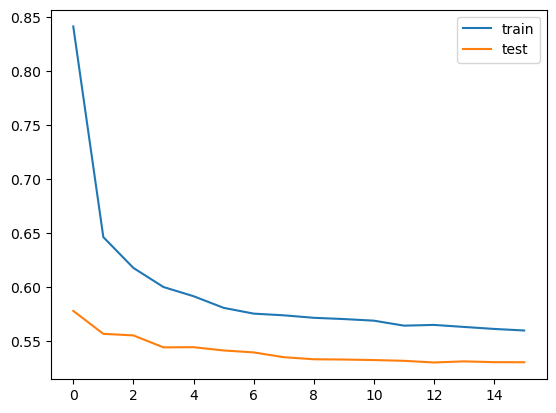

<Figure size 640x480 with 0 Axes>

In [25]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
pyplot.savefig('LSTM_combined_base_pool_aug.png')
model.save_weights('saved_models/LSTM_combined_base_pool_aug.h5', save_format = 'h5')

In [26]:
model_json = model.to_json()
with open('saved_models/LSTM_combined_base_pool_aug.json', 'w') as f:
    f.write(model_json)

In [27]:
from keras.models import model_from_json
with open('saved_models/LSTM_combined_base_pool_aug.json', 'r') as f:
    loaded_json = f.read()
    f.close()
    loaded_model = model_from_json(loaded_json)
loaded_model.load_weights('saved_models/LSTM_combined_base_pool_aug.h5')

In [28]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 450)]             0         
                                                                 
 embedding (Embedding)       (None, 450, 50)           868900    
                                                                 
 lstm (LSTM)                 (None, 450, 128)          91648     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                             

In [29]:
loaded_model.compile(optimizer=optimizer_obj, loss=mean_columnwise_root_mean_squared_error)
scores = loaded_model.evaluate(x_val_padded, y_val, verbose=0)
print("Validation loss: %.2f%%" % (scores*100))

Validation loss: 53.08%


In [30]:
test_scores = loaded_model.predict(x_val_padded)
print("Predicted results: ", test_scores[:10])
print("Actual results: ", y_val[:10])

13/13 [==============================] - 6s 224ms/step
Predicted results:  [[3.1216974 3.0336199 3.2291765 3.091684  2.966632  3.1292207]
 [3.3728833 3.2661345 3.416493  3.306389  3.2622604 3.4069102]
 [3.14      2.9725065 3.2260973 3.0501382 2.9093528 3.103533 ]
 [2.9468331 2.8562171 3.1116142 2.9706125 2.8381846 2.84458  ]
 [2.880649  2.7918122 2.9272351 2.8367214 2.8764484 3.0076349]
 [2.9688778 2.8377337 3.0592403 2.9092572 2.8828423 2.9188378]
 [2.9594307 2.8971906 3.0426795 2.9816213 2.901914  3.0347722]
 [3.3518188 3.2894793 3.5620766 3.4323993 3.299649  3.380713 ]
 [3.2100387 3.1095219 3.2983665 3.207966  3.2011678 3.1872156]
 [3.403983  3.2751002 3.4997544 3.385719  3.208535  3.3388634]]
Actual results:  [[3.  3.  3.  3.  2.5 3. ]
 [3.  3.  3.5 2.  2.  3. ]
 [3.5 2.5 2.5 3.  3.5 2.5]
 [3.5 3.  3.5 4.  3.5 3. ]
 [3.5 3.  2.5 3.  3.  2.5]
 [2.5 2.  2.  2.  2.  2. ]
 [2.5 2.5 3.  3.  2.  2. ]
 [2.5 2.5 3.  2.5 2.  2.5]
 [3.  4.  3.5 3.5 3.  3.5]
 [3.  3.  3.5 3.  2.5 3. ]]


In [32]:
results_df = pd.DataFrame(data = list(zip(test_scores, y_val)), columns = ['Pred_scores', 'Actual'])
results_df.to_csv("LSTM_combined_base_pool_aug.csv")

In [33]:
analysis_df = results_df
analysis_df['error'] = results_df['Pred_scores'] - results_df['Actual']
analysis_df.to_csv("LSTM_combined_base_pool_aug.csv")
analysis_df.to_pickle("LSTM_combined_base_pool_aug.pkl")

### Analysis starts here.

In [34]:
analysis_df = pd.read_pickle("LSTM_combined_base_pool_aug.pkl")

In [35]:
analysis_df.head()

Pred_scores  \
0  [3.1216974, 3.0336199, 3.2291765, 3.091684, 2....   
1  [3.3728833, 3.2661345, 3.416493, 3.306389, 3.2...   
2  [3.14, 2.9725065, 3.2260973, 3.0501382, 2.9093...   
3  [2.9468331, 2.8562171, 3.1116142, 2.9706125, 2...   
4  [2.880649, 2.7918122, 2.9272351, 2.8367214, 2....   

                           Actual  \
0  [3.0, 3.0, 3.0, 3.0, 2.5, 3.0]   
1  [3.0, 3.0, 3.5, 2.0, 2.0, 3.0]   
2  [3.5, 2.5, 2.5, 3.0, 3.5, 2.5]   
3  [3.5, 3.0, 3.5, 4.0, 3.5, 3.0]   
4  [3.5, 3.0, 2.5, 3.0, 3.0, 2.5]   

                                               error  
0  [0.12169742584228516, 0.03361988067626953, 0.2...  
1  [0.37288331985473633, 0.26613450050354004, -0....  
2  [-0.3599998950958252, 0.4725065231323242, 0.72...  
3  [-0.5531668663024902, -0.1437828540802002, -0....  
4  [-0.6193509101867676, -0.20818781852722168, 0....

In [36]:
pred_lst = analysis_df.Pred_scores
actual_lst = analysis_df.Actual
#cohesion 	syntax 	vocabulary 	phraseology 	grammar 	conventions

In [37]:
# flat is faster than item
cohesion_pred_lst = [x.flat[0] for x in pred_lst]
cohesion_act_lst = [x.flat[0] for x in actual_lst]

syntax_pred_lst = [x.flat[1] for x in pred_lst]
syntax_act_lst = [x.flat[1] for x in actual_lst]

vocabulary_pred_lst = [x.flat[2] for x in pred_lst]
vocabulary_act_lst = [x.flat[2] for x in actual_lst]

phraseology_pred_lst = [x.flat[3] for x in pred_lst]
phraseology_act_lst = [x.flat[3] for x in actual_lst]

grammar_pred_lst = [x.flat[4] for x in pred_lst]
grammar_act_lst = [x.flat[4] for x in actual_lst]

conventions_pred_lst = [x.flat[5] for x in pred_lst]
conventions_act_lst = [x.flat[5] for x in actual_lst]

In [43]:
iterations = x_val_padded.shape[0]
print(iterations)
# Should be equal to 196 for non-augmented.

392


In [44]:
nonzero_count = []
for num in range(iterations):
    nonzero_count.append(np.count_nonzero(x_val_padded[num]))

In [45]:
proof_df = analysis_df
proof_df['nonzero'] = nonzero_count

In [46]:
pred_scores = np.array((pred_lst))
act_scores = np.array((actual_lst))
print(pred_scores[:5])

[array([3.1216974, 3.0336199, 3.2291765, 3.091684 , 2.966632 , 3.1292207],
       dtype=float32)
 array([3.3728833, 3.2661345, 3.416493 , 3.306389 , 3.2622604, 3.4069102],
       dtype=float32)
 array([3.14     , 2.9725065, 3.2260973, 3.0501382, 2.9093528, 3.103533 ],
       dtype=float32)
 array([2.9468331, 2.8562171, 3.1116142, 2.9706125, 2.8381846, 2.84458  ],
       dtype=float32)
 array([2.880649 , 2.7918122, 2.9272351, 2.8367214, 2.8764484, 3.0076349],
       dtype=float32)                                                     ]


<AxesSubplot:>

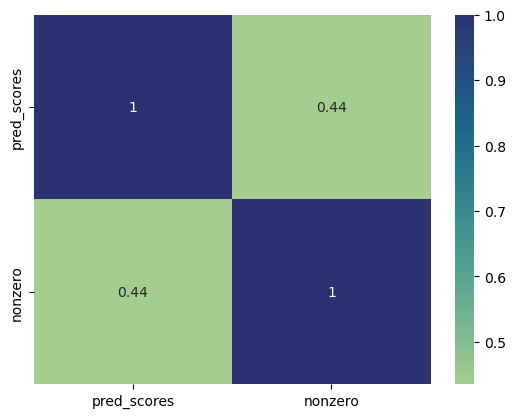

In [47]:
analysis_df['nonzero'] = nonzero_count

pred_scores_mean = [x.mean() for x in pred_scores]
pred_scores_mean[:5]

corr_df = pd.DataFrame({'pred_scores' : pred_scores_mean, 'nonzero' : nonzero_count})

import seaborn as sns
sns.heatmap(corr_df.corr(), annot = True, cmap = "crest")

### The base pooled LSTM model does observe a somewhat high correlation (0.41) between non-zero count and predicted scores.
### Augmented further strengthens that correlation.

#### Actual correlation:

<AxesSubplot:>

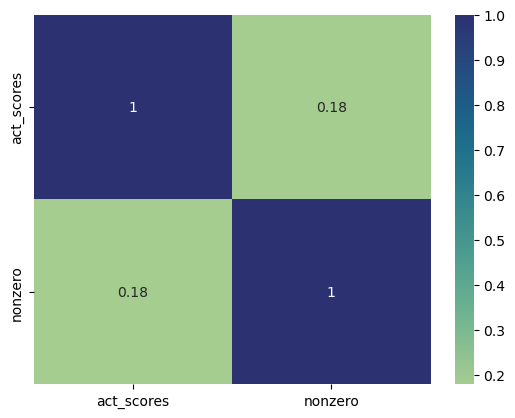

In [48]:
act_scores_mean = [x.mean() for x in act_scores]
act_corr_df = pd.DataFrame({'act_scores' : act_scores_mean, 'nonzero' : nonzero_count})
sns.heatmap(act_corr_df.corr(), annot = True, cmap = "crest")

#### This model maps the correlation a bit stronger than it really is.
### Also, the input data has been corrupted by augmentation because this correlation dropped from 0.31 to 0.18.

### Plotting the mean of the actual and mean of the predicted scores.

array([[<AxesSubplot:title={'center':'act_scores'}>]], dtype=object)

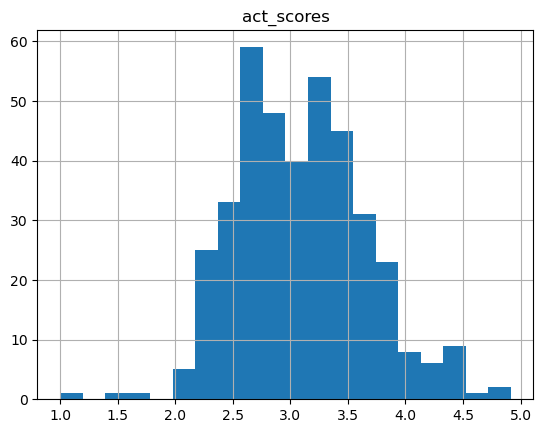

In [49]:
act_corr_df.hist(column = 'act_scores', bins = 20)

array([[<AxesSubplot:title={'center':'pred_scores'}>]], dtype=object)

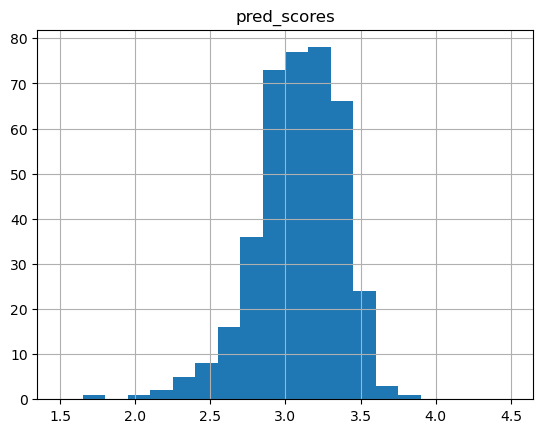

In [50]:
corr_df.hist(column = 'pred_scores', bins = 20, range = [1.5, 4.5])

### Our model's output seem to not be as evenly distributed. Augmentation makes this slightly healthier though.

In [51]:
pred_median_lst = [np.median(x) for x in pred_lst]
pred_med = np.median(pred_median_lst)

act_median_lst = [np.median(x) for x in actual_lst]
act_med = np.median(act_median_lst)

print("Pred median : ", pred_med)
print("Actual median : ", act_med)

Pred median :  3.1089468
Actual median :  3.0


In [52]:
pred_var_lst = [np.var(x) for x in pred_lst]
act_var_lst = [np.var(x) for x in actual_lst]

#print(pred_var_lst)

pred_var = np.mean(pred_var_lst)
act_var = np.mean(act_var_lst)

print("Pred mean variance : ", pred_var)
print("Actual mean variance : ", act_var)

Pred mean variance :  0.008753107
Actual mean variance :  0.11784297052154194


### Variance of the model's results is too low, as expected from looking at the graph.

### Does the model's predicted score roughly follow the actual scores?

In [53]:
corr_df_cohesion = pd.DataFrame({'pred_score' : cohesion_pred_lst, 'act_scores' : cohesion_act_lst})
corr_df_syntax = pd.DataFrame({'pred_score' : syntax_pred_lst, 'act_scores' : syntax_act_lst})
corr_df_vocabulary = pd.DataFrame({'pred_score' : vocabulary_pred_lst, 'act_scores' : vocabulary_act_lst})
corr_df_phraseology = pd.DataFrame({'pred_score' : phraseology_pred_lst, 'act_scores' : phraseology_act_lst})
corr_df_grammar = pd.DataFrame({'pred_score' : grammar_pred_lst, 'act_scores' : grammar_act_lst})
corr_df_conventions = pd.DataFrame({'pred_score' : conventions_pred_lst, 'act_scores' : conventions_act_lst})

Text(0.5, 1.0, 'Cohesion correlation')

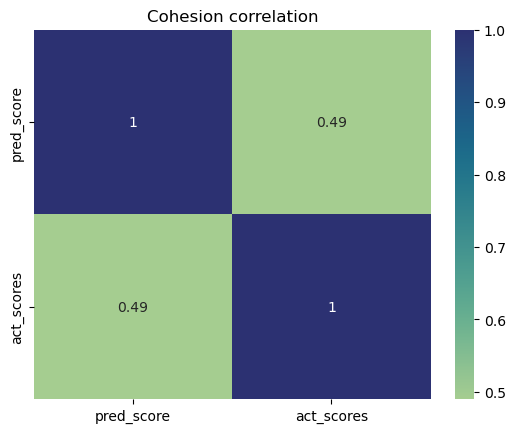

In [54]:
import seaborn as sns
sns.heatmap(corr_df_cohesion.corr(), annot = True, cmap = "crest").set_title("Cohesion correlation")

Text(0.5, 1.0, 'Syntax correlation')

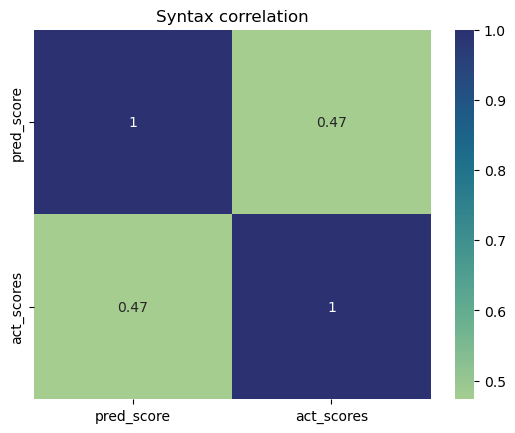

In [55]:
sns.heatmap(corr_df_syntax.corr(), annot = True, cmap = "crest").set_title("Syntax correlation")

Text(0.5, 1.0, 'Vocabulary correlation')

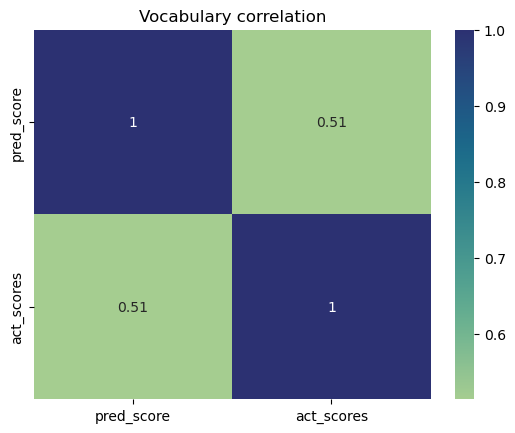

In [56]:
sns.heatmap(corr_df_vocabulary.corr(), annot = True, cmap = "crest").set_title("Vocabulary correlation")

Text(0.5, 1.0, 'Phraseology correlation')

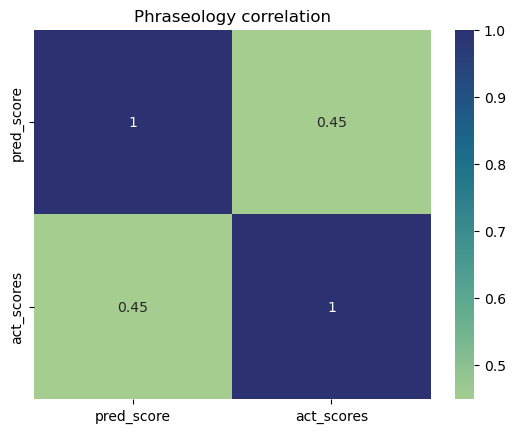

In [57]:
sns.heatmap(corr_df_phraseology.corr(), annot = True, cmap = "crest").set_title("Phraseology correlation")

Text(0.5, 1.0, 'Grammar correlation')

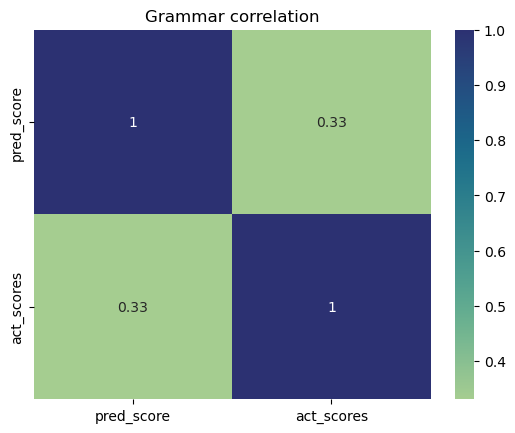

In [58]:
sns.heatmap(corr_df_grammar.corr(), annot = True, cmap = "crest").set_title("Grammar correlation")

Text(0.5, 1.0, 'Conventions correlation')

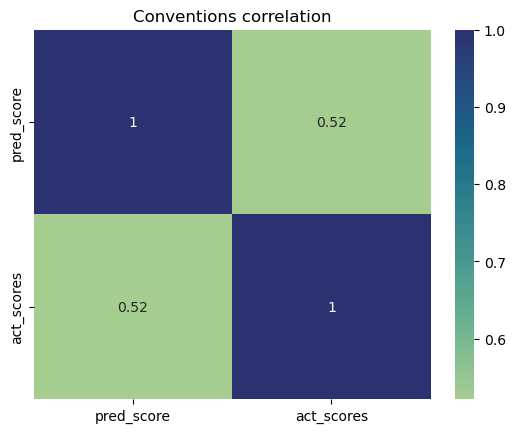

In [59]:
sns.heatmap(corr_df_conventions.corr(), annot = True, cmap = "crest").set_title("Conventions correlation")

### This model also seems to perform best with conventions and does not perform too well in grammar, phraseology, vocabulary and convention.

### The augmentation has made all the correlations stronger (as expected from the model fitting essentially the same data twice), but it still scores the same on the competition dataset. Further augmentation would likely promote overfitting.

In [ ]:
## This time around the correlation changed to 0.65.